In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [2]:
# Logistic Regression over Wisconsin Breast Cancer dataset

In [3]:
# import Wisconsin Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [4]:
# import the package for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [5]:
# create a Logistic Regression model
logreg = LogisticRegression()
# fit the Logistic Regression model to the training data
logreg.fit(X_train, y_train)

# note warning will be produced

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# score our logistic regression model against the training set and test set
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


#### QUESTION: How well did our model learn? How does this compare to kNN?
Q6: The training accuracy for the logistic regression is 95.3%. For our kNN classifier, the training accuracy diminishes as k gets larger. If we try to train the model with 0 < k < 40, we can see that with k >= 10, the training accuracy fluctuates within 92-95%. Therefore, I would say that the logistic regression trained better compared to kNN. 

In [7]:
# OBSERVATION: When training and test set accuracy are very close, this can be a sign of underfitting.
# Loosing our regularization and better fitting the training data may also improve test set
# accuracy.

In [8]:
# Improving Performace: Controlling the Regularization in Logistic Regression
# For logistic regression, regularization is controlled by a parameter C
# larger values of C == more fitting of the training data == LESS regularization
# larger values of C also stress trying to classify all training examples correctly
# smaller values of C == higher priority on weights close to zero == MORE regularization
# samller values of C also try to adjust to the "majority" of data points while tolerating some incorrect outliers
# Dafault value: C=1

## Fitting the training data more closely

The idea is that you can tune whether your model errs on the side of having a complex model that fits the training data very closely, or do err on the side of having a model that doesn't fit the training data quite as well but is more simple. A very complex model might be overly-customized to your training data and not actually do as well on your test set.

So fitting the training data more closely means you let the model get more complex - this would be less regularization.

More regularization means tuning your learning algorithm to penalize very complex models (those with larger weights) so it will prefer simpler models even if they don't fit the training data as closely.

In [9]:
# Try Logistic Regression with a C value of 100
logreg = LogisticRegression(C=100)
logreg.fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# Try Logistic Regression with a C value of 0.01
logreg = LogisticRegression(C=0.01)
logreg.fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### QUESTION: Did fitting the training data more closely also help performance on the test set?
Q7: By fitting the training data more closely, the model trained better and the performace for prediction also improved compared to the model when not fitting the training data as closely. 

In [29]:
# TODO: Experiment and try to find the best value for C that addresses underfitting,
# avoids overfitting and yields the best performance on the test set.

In [16]:
param = np.linspace(0.001, 200, 10000)

for i in param:
    logreg = LogisticRegression(C=i)
    logreg.fit(X_train, y_train)
    print(i, " Training set score: {:.3f}".format(logreg.score(X_train, y_train)), " Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.001  Training set score: 0.923  Test set score: 0.937
0.021001900190019  Training set score: 0.934  Test set score: 0.930
0.041003800380038  Training set score: 0.941  Test set score: 0.944
0.061005700570057  Training set score: 0.944  Test set score: 0.951
0.081007600760076  Training set score: 0.944  Test set score: 0.958
0.101009500950095  Training set score: 0.944  Test set score: 0.944
0.121011401140114  Training set score: 0.946  Test set score: 0.944
0.141013301330133  Training set score: 0.946  Test set score: 0.944
0.161015201520152  Training set score: 0.948  Test set score: 0.944
0.181017101710171  Training set score: 0.948  Test set score: 0.944
0.20101900190019  Training set score: 0.948  Test set score: 0.944
0.221020902090209  Training set score: 0.948  Test set score: 0.944
0.241022802280228  Training set score: 0.948  Test set score: 0.944
0.261024702470247  Training set score: 0.951  Test set score: 0.944
0.281026602660266  Training set score: 0.953  Test set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.1011045104510448  Training set score: 0.955  Test set score: 0.958
1.121106410641064  Training set score: 0.958  Test set score: 0.951
1.1411083108310829  Training set score: 0.958  Test set score: 0.958
1.1611102110211018  Training set score: 0.955  Test set score: 0.958
1.181112111211121  Training set score: 0.958  Test set score: 0.958
1.2011140114011398  Training set score: 0.958  Test set score: 0.958
1.221115911591159  Training set score: 0.958  Test set score: 0.958
1.2411178117811779  Training set score: 0.958  Test set score: 0.958
1.261119711971197  Training set score: 0.955  Test set score: 0.951
1.281121612161216  Training set score: 0.958  Test set score: 0.958
1.3011235123512348  Training set score: 0.958  Test set score: 0.951
1.321125412541254  Training set score: 0.958  Test set score: 0.958
1.3411273127312728  Training set score: 0.958  Test set score: 0.958
1.361129212921292  Training set score: 0.958  Test set score: 0.951
1.3811311131113109  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.60115201520152  Training set score: 0.958  Test set score: 0.958
1.6211539153915389  Training set score: 0.958  Test set score: 0.958
1.641155815581558  Training set score: 0.960  Test set score: 0.951
1.661157715771577  Training set score: 0.958  Test set score: 0.958
1.6811596159615958  Training set score: 0.958  Test set score: 0.958
1.701161516151615  Training set score: 0.958  Test set score: 0.958
1.7211634163416338  Training set score: 0.958  Test set score: 0.958
1.741165316531653  Training set score: 0.958  Test set score: 0.958
1.7611672167216719  Training set score: 0.958  Test set score: 0.958
1.781169116911691  Training set score: 0.958  Test set score: 0.958
1.80117101710171  Training set score: 0.958  Test set score: 0.958
1.8211729172917288  Training set score: 0.958  Test set score: 0.958
1.841174817481748  Training set score: 0.960  Test set score: 0.951
1.8611767176717668  Training set score: 0.958  Test set score: 0.958
1.881178617861786  Training set score: 0.958

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.021191919191919  Training set score: 0.958  Test set score: 0.958
2.041193819381938  Training set score: 0.958  Test set score: 0.958
2.061195719571957  Training set score: 0.958  Test set score: 0.958
2.081197619761976  Training set score: 0.958  Test set score: 0.958
2.101199519951995  Training set score: 0.958  Test set score: 0.958
2.1212014201420137  Training set score: 0.958  Test set score: 0.958
2.141203320332033  Training set score: 0.958  Test set score: 0.958
2.161205220522052  Training set score: 0.958  Test set score: 0.958
2.1812071207120707  Training set score: 0.958  Test set score: 0.958
2.20120902090209  Training set score: 0.958  Test set score: 0.958
2.221210921092109  Training set score: 0.958  Test set score: 0.958
2.241212821282128  Training set score: 0.958  Test set score: 0.958
2.2612147214721467  Training set score: 0.958  Test set score: 0.958
2.281216621662166  Training set score: 0.958  Test set score: 0.958
2.301218521852185  Training set score: 0.958  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.501237523752375  Training set score: 0.958  Test set score: 0.958
2.521239423942394  Training set score: 0.958  Test set score: 0.958
2.5412413241324128  Training set score: 0.958  Test set score: 0.958
2.561243224322432  Training set score: 0.958  Test set score: 0.958
2.581245124512451  Training set score: 0.958  Test set score: 0.958
2.6012470247024697  Training set score: 0.958  Test set score: 0.958
2.621248924892489  Training set score: 0.958  Test set score: 0.958
2.641250825082508  Training set score: 0.958  Test set score: 0.958
2.661252725272527  Training set score: 0.958  Test set score: 0.951
2.681254625462546  Training set score: 0.958  Test set score: 0.958
2.701256525652565  Training set score: 0.958  Test set score: 0.958
2.721258425842584  Training set score: 0.958  Test set score: 0.958
2.7412603260326027  Training set score: 0.958  Test set score: 0.951
2.761262226222622  Training set score: 0.958  Test set score: 0.958
2.781264126412641  Training set score: 0.958 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.901275527552755  Training set score: 0.960  Test set score: 0.958
2.921277427742774  Training set score: 0.960  Test set score: 0.958
2.941279327932793  Training set score: 0.958  Test set score: 0.958
2.961281228122812  Training set score: 0.960  Test set score: 0.958
2.981283128312831  Training set score: 0.960  Test set score: 0.958
3.00128502850285  Training set score: 0.960  Test set score: 0.958
3.0212869286928687  Training set score: 0.960  Test set score: 0.958
3.041288828882888  Training set score: 0.960  Test set score: 0.958
3.061290729072907  Training set score: 0.960  Test set score: 0.958
3.0812926292629257  Training set score: 0.960  Test set score: 0.958
3.101294529452945  Training set score: 0.958  Test set score: 0.951
3.121296429642964  Training set score: 0.960  Test set score: 0.958
3.141298329832983  Training set score: 0.960  Test set score: 0.958
3.1613002300230018  Training set score: 0.958  Test set score: 0.958
3.181302130213021  Training set score: 0.958  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.3013135313531348  Training set score: 0.960  Test set score: 0.958
3.321315431543154  Training set score: 0.960  Test set score: 0.965
3.341317331733173  Training set score: 0.958  Test set score: 0.958
3.3613192319231917  Training set score: 0.960  Test set score: 0.965
3.381321132113211  Training set score: 0.960  Test set score: 0.965
3.40132303230323  Training set score: 0.960  Test set score: 0.965
3.421324932493249  Training set score: 0.960  Test set score: 0.965
3.4413268326832678  Training set score: 0.960  Test set score: 0.965
3.461328732873287  Training set score: 0.960  Test set score: 0.958
3.481330633063306  Training set score: 0.958  Test set score: 0.958
3.5013325332533247  Training set score: 0.960  Test set score: 0.965
3.521334433443344  Training set score: 0.960  Test set score: 0.958
3.541336333633363  Training set score: 0.960  Test set score: 0.965
3.561338233823382  Training set score: 0.960  Test set score: 0.965
3.581340134013401  Training set score: 0.960 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.681349634963496  Training set score: 0.958  Test set score: 0.958
3.701351535153515  Training set score: 0.960  Test set score: 0.965
3.721353435343534  Training set score: 0.960  Test set score: 0.965
3.741355335533553  Training set score: 0.960  Test set score: 0.965
3.761357235723572  Training set score: 0.960  Test set score: 0.965
3.7813591359135907  Training set score: 0.962  Test set score: 0.965
3.80136103610361  Training set score: 0.960  Test set score: 0.965
3.821362936293629  Training set score: 0.962  Test set score: 0.965
3.8413648364836477  Training set score: 0.960  Test set score: 0.958
3.861366736673667  Training set score: 0.960  Test set score: 0.965
3.881368636863686  Training set score: 0.960  Test set score: 0.965
3.901370537053705  Training set score: 0.960  Test set score: 0.958
3.9213724372437238  Training set score: 0.962  Test set score: 0.965
3.941374337433743  Training set score: 0.958  Test set score: 0.958
3.961376237623762  Training set score: 0.960  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.061385738573858  Training set score: 0.962  Test set score: 0.965
4.081387638763877  Training set score: 0.962  Test set score: 0.965
4.101389538953895  Training set score: 0.962  Test set score: 0.965
4.121391439143914  Training set score: 0.960  Test set score: 0.958
4.141393339333933  Training set score: 0.960  Test set score: 0.965
4.161395239523952  Training set score: 0.960  Test set score: 0.958
4.1813971397139715  Training set score: 0.962  Test set score: 0.965
4.201399039903991  Training set score: 0.962  Test set score: 0.965
4.22140094009401  Training set score: 0.962  Test set score: 0.965
4.241402840284028  Training set score: 0.962  Test set score: 0.965
4.261404740474047  Training set score: 0.960  Test set score: 0.965
4.281406640664066  Training set score: 0.962  Test set score: 0.965
4.301408540854085  Training set score: 0.962  Test set score: 0.965
4.3214104410441045  Training set score: 0.960  Test set score: 0.958
4.341412341234124  Training set score: 0.962  T

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.521429442944294  Training set score: 0.962  Test set score: 0.965
4.541431343134313  Training set score: 0.962  Test set score: 0.965
4.561433243324332  Training set score: 0.962  Test set score: 0.965
4.581435143514351  Training set score: 0.960  Test set score: 0.958
4.601437043704371  Training set score: 0.960  Test set score: 0.958
4.62143894389439  Training set score: 0.962  Test set score: 0.965
4.641440844084408  Training set score: 0.962  Test set score: 0.965
4.661442744274427  Training set score: 0.962  Test set score: 0.965
4.681444644464446  Training set score: 0.962  Test set score: 0.965
4.701446544654465  Training set score: 0.962  Test set score: 0.965
4.7214484448444844  Training set score: 0.960  Test set score: 0.958
4.741450345034504  Training set score: 0.962  Test set score: 0.965
4.761452245224523  Training set score: 0.962  Test set score: 0.965
4.781454145414541  Training set score: 0.962  Test set score: 0.965
4.80145604560456  Training set score: 0.962  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.981473147314731  Training set score: 0.962  Test set score: 0.965
5.0014750475047505  Training set score: 0.962  Test set score: 0.965
5.02147694769477  Training set score: 0.962  Test set score: 0.965
5.041478847884789  Training set score: 0.962  Test set score: 0.965
5.061480748074807  Training set score: 0.962  Test set score: 0.965
5.081482648264826  Training set score: 0.962  Test set score: 0.965
5.101484548454845  Training set score: 0.962  Test set score: 0.965
5.121486448644864  Training set score: 0.962  Test set score: 0.965
5.1414883488348835  Training set score: 0.960  Test set score: 0.965
5.161490249024903  Training set score: 0.962  Test set score: 0.958
5.181492149214922  Training set score: 0.962  Test set score: 0.965
5.20149404940494  Training set score: 0.962  Test set score: 0.965
5.221495949594959  Training set score: 0.962  Test set score: 0.965
5.241497849784978  Training set score: 0.962  Test set score: 0.965
5.261499749974997  Training set score: 0.960  Te

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

5.441516851685169  Training set score: 0.962  Test set score: 0.965
5.461518751875188  Training set score: 0.962  Test set score: 0.965
5.481520652065206  Training set score: 0.962  Test set score: 0.965
5.501522552255225  Training set score: 0.962  Test set score: 0.965
5.521524452445244  Training set score: 0.962  Test set score: 0.965
5.541526352635263  Training set score: 0.962  Test set score: 0.965
5.5615282528252825  Training set score: 0.962  Test set score: 0.965
5.581530153015302  Training set score: 0.962  Test set score: 0.965
5.601532053205321  Training set score: 0.962  Test set score: 0.965
5.621533953395339  Training set score: 0.962  Test set score: 0.965
5.641535853585358  Training set score: 0.962  Test set score: 0.965
5.661537753775377  Training set score: 0.962  Test set score: 0.965
5.681539653965396  Training set score: 0.962  Test set score: 0.965
5.7015415541554155  Training set score: 0.962  Test set score: 0.965
5.721543454345435  Training set score: 0.962  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

5.901560556055605  Training set score: 0.962  Test set score: 0.965
5.921562456245624  Training set score: 0.962  Test set score: 0.965
5.941564356435643  Training set score: 0.962  Test set score: 0.965
5.961566256625662  Training set score: 0.962  Test set score: 0.965
5.9815681568156815  Training set score: 0.962  Test set score: 0.965
6.001570057005701  Training set score: 0.962  Test set score: 0.965
6.021571957195719  Training set score: 0.962  Test set score: 0.965
6.041573857385738  Training set score: 0.962  Test set score: 0.965
6.061575757575757  Training set score: 0.962  Test set score: 0.965
6.081577657765776  Training set score: 0.962  Test set score: 0.965
6.101579557955795  Training set score: 0.960  Test set score: 0.958
6.121581458145815  Training set score: 0.962  Test set score: 0.965
6.141583358335834  Training set score: 0.962  Test set score: 0.965
6.161585258525852  Training set score: 0.962  Test set score: 0.965
6.181587158715871  Training set score: 0.962  T

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

6.361604260426042  Training set score: 0.962  Test set score: 0.965
6.3816061606160615  Training set score: 0.962  Test set score: 0.965
6.401608060806081  Training set score: 0.962  Test set score: 0.965
6.4216099609961  Training set score: 0.962  Test set score: 0.965
6.441611861186118  Training set score: 0.962  Test set score: 0.965
6.461613761376137  Training set score: 0.962  Test set score: 0.965
6.481615661566156  Training set score: 0.962  Test set score: 0.965
6.501617561756175  Training set score: 0.962  Test set score: 0.965
6.5216194619461945  Training set score: 0.962  Test set score: 0.965
6.541621362136214  Training set score: 0.962  Test set score: 0.965
6.561623262326233  Training set score: 0.962  Test set score: 0.965
6.581625162516251  Training set score: 0.962  Test set score: 0.965
6.60162706270627  Training set score: 0.962  Test set score: 0.965
6.621628962896289  Training set score: 0.962  Test set score: 0.965
6.641630863086308  Training set score: 0.965  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

6.82164796479648  Training set score: 0.962  Test set score: 0.965
6.841649864986499  Training set score: 0.962  Test set score: 0.965
6.861651765176517  Training set score: 0.962  Test set score: 0.965
6.881653665366536  Training set score: 0.962  Test set score: 0.965
6.901655565556555  Training set score: 0.962  Test set score: 0.965
6.921657465746574  Training set score: 0.962  Test set score: 0.965
6.9416593659365935  Training set score: 0.962  Test set score: 0.965
6.961661266126613  Training set score: 0.962  Test set score: 0.965
6.981663166316632  Training set score: 0.962  Test set score: 0.965
7.00166506650665  Training set score: 0.962  Test set score: 0.965
7.021666966696669  Training set score: 0.962  Test set score: 0.965
7.041668866886688  Training set score: 0.962  Test set score: 0.965
7.061670767076707  Training set score: 0.962  Test set score: 0.965
7.0816726672667265  Training set score: 0.962  Test set score: 0.965
7.101674567456746  Training set score: 0.962  Te

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

7.281691669166916  Training set score: 0.962  Test set score: 0.965
7.301693569356935  Training set score: 0.962  Test set score: 0.965
7.321695469546954  Training set score: 0.962  Test set score: 0.965
7.341697369736973  Training set score: 0.962  Test set score: 0.965
7.3616992699269925  Training set score: 0.962  Test set score: 0.965
7.381701170117012  Training set score: 0.965  Test set score: 0.965
7.401703070307031  Training set score: 0.962  Test set score: 0.965
7.421704970497049  Training set score: 0.962  Test set score: 0.965
7.441706870687068  Training set score: 0.965  Test set score: 0.965
7.461708770877087  Training set score: 0.965  Test set score: 0.965
7.481710671067106  Training set score: 0.962  Test set score: 0.965
7.5017125712571255  Training set score: 0.965  Test set score: 0.965
7.521714471447145  Training set score: 0.965  Test set score: 0.965
7.541716371637164  Training set score: 0.965  Test set score: 0.965
7.561718271827182  Training set score: 0.965  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

7.681729672967296  Training set score: 0.965  Test set score: 0.965
7.701731573157315  Training set score: 0.965  Test set score: 0.965
7.721733473347334  Training set score: 0.962  Test set score: 0.965
7.741735373537353  Training set score: 0.965  Test set score: 0.965
7.761737273727372  Training set score: 0.965  Test set score: 0.965
7.781739173917392  Training set score: 0.967  Test set score: 0.965
7.801741074107411  Training set score: 0.965  Test set score: 0.965
7.821742974297429  Training set score: 0.965  Test set score: 0.965
7.841744874487448  Training set score: 0.965  Test set score: 0.965
7.861746774677467  Training set score: 0.965  Test set score: 0.965
7.881748674867486  Training set score: 0.962  Test set score: 0.965
7.901750575057505  Training set score: 0.967  Test set score: 0.965
7.921752475247525  Training set score: 0.965  Test set score: 0.965
7.941754375437544  Training set score: 0.967  Test set score: 0.965
7.961756275627562  Training set score: 0.965  Te

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

8.101769576957695  Training set score: 0.967  Test set score: 0.965
8.121771477147714  Training set score: 0.967  Test set score: 0.965
8.141773377337733  Training set score: 0.967  Test set score: 0.965
8.161775277527752  Training set score: 0.967  Test set score: 0.965
8.18177717771777  Training set score: 0.967  Test set score: 0.965
8.201779077907789  Training set score: 0.967  Test set score: 0.965
8.221780978097808  Training set score: 0.965  Test set score: 0.965
8.241782878287827  Training set score: 0.962  Test set score: 0.965
8.261784778477846  Training set score: 0.965  Test set score: 0.965
8.281786678667865  Training set score: 0.965  Test set score: 0.965
8.301788578857884  Training set score: 0.967  Test set score: 0.965
8.321790479047904  Training set score: 0.965  Test set score: 0.965
8.341792379237923  Training set score: 0.965  Test set score: 0.965
8.361794279427942  Training set score: 0.965  Test set score: 0.965
8.381796179617961  Training set score: 0.965  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

8.461803780378036  Training set score: 0.967  Test set score: 0.965
8.481805680568055  Training set score: 0.967  Test set score: 0.965
8.501807580758074  Training set score: 0.965  Test set score: 0.958
8.521809480948093  Training set score: 0.965  Test set score: 0.965
8.541811381138112  Training set score: 0.962  Test set score: 0.965
8.561813281328131  Training set score: 0.965  Test set score: 0.965
8.58181518151815  Training set score: 0.965  Test set score: 0.965
8.60181708170817  Training set score: 0.967  Test set score: 0.965
8.621818981898189  Training set score: 0.965  Test set score: 0.965
8.641820882088208  Training set score: 0.962  Test set score: 0.965
8.661822782278227  Training set score: 0.967  Test set score: 0.965
8.681824682468246  Training set score: 0.965  Test set score: 0.965
8.701826582658265  Training set score: 0.967  Test set score: 0.965
8.721828482848283  Training set score: 0.967  Test set score: 0.965
8.741830383038302  Training set score: 0.965  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

8.80183608360836  Training set score: 0.967  Test set score: 0.965
8.821837983798378  Training set score: 0.962  Test set score: 0.965
8.841839883988397  Training set score: 0.965  Test set score: 0.965
8.861841784178417  Training set score: 0.967  Test set score: 0.965
8.881843684368436  Training set score: 0.965  Test set score: 0.965
8.901845584558455  Training set score: 0.965  Test set score: 0.965
8.921847484748474  Training set score: 0.967  Test set score: 0.965
8.941849384938493  Training set score: 0.967  Test set score: 0.965
8.961851285128512  Training set score: 0.967  Test set score: 0.965
8.981853185318531  Training set score: 0.967  Test set score: 0.958
9.001855085508549  Training set score: 0.962  Test set score: 0.965
9.021856985698568  Training set score: 0.967  Test set score: 0.965
9.041858885888587  Training set score: 0.965  Test set score: 0.965
9.061860786078606  Training set score: 0.965  Test set score: 0.965
9.081862686268625  Training set score: 0.967  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

9.18187218721872  Training set score: 0.967  Test set score: 0.965
9.20187408740874  Training set score: 0.962  Test set score: 0.965
9.221875987598759  Training set score: 0.967  Test set score: 0.965
9.241877887788778  Training set score: 0.967  Test set score: 0.965
9.261879787978797  Training set score: 0.967  Test set score: 0.965
9.281881688168815  Training set score: 0.962  Test set score: 0.965
9.301883588358834  Training set score: 0.962  Test set score: 0.965
9.321885488548853  Training set score: 0.965  Test set score: 0.965
9.341887388738872  Training set score: 0.967  Test set score: 0.965
9.361889288928891  Training set score: 0.965  Test set score: 0.965
9.38189118911891  Training set score: 0.967  Test set score: 0.965
9.40189308930893  Training set score: 0.967  Test set score: 0.965
9.421894989498949  Training set score: 0.965  Test set score: 0.965
9.441896889688968  Training set score: 0.967  Test set score: 0.965
9.461898789878987  Training set score: 0.967  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

9.541906390639063  Training set score: 0.962  Test set score: 0.965
9.56190829082908  Training set score: 0.962  Test set score: 0.965
9.5819101910191  Training set score: 0.967  Test set score: 0.965
9.601912091209119  Training set score: 0.967  Test set score: 0.965
9.621913991399138  Training set score: 0.967  Test set score: 0.965
9.641915891589157  Training set score: 0.965  Test set score: 0.965
9.661917791779176  Training set score: 0.965  Test set score: 0.965
9.681919691969195  Training set score: 0.967  Test set score: 0.965
9.701921592159215  Training set score: 0.969  Test set score: 0.965
9.721923492349234  Training set score: 0.965  Test set score: 0.965
9.741925392539253  Training set score: 0.965  Test set score: 0.965
9.761927292729272  Training set score: 0.967  Test set score: 0.965
9.781929192919291  Training set score: 0.965  Test set score: 0.965
9.80193109310931  Training set score: 0.967  Test set score: 0.965
9.82193299329933  Training set score: 0.967  Test se

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

9.921942494249423  Training set score: 0.965  Test set score: 0.965
9.941944394439442  Training set score: 0.967  Test set score: 0.965
9.961946294629461  Training set score: 0.965  Test set score: 0.965
9.98194819481948  Training set score: 0.965  Test set score: 0.965
10.0019500950095  Training set score: 0.967  Test set score: 0.965
10.021951995199519  Training set score: 0.962  Test set score: 0.958
10.041953895389538  Training set score: 0.965  Test set score: 0.965
10.061955795579557  Training set score: 0.967  Test set score: 0.965
10.081957695769576  Training set score: 0.965  Test set score: 0.965
10.101959595959595  Training set score: 0.967  Test set score: 0.965
10.121961496149613  Training set score: 0.965  Test set score: 0.965
10.141963396339632  Training set score: 0.962  Test set score: 0.965
10.161965296529651  Training set score: 0.967  Test set score: 0.965
10.18196719671967  Training set score: 0.969  Test set score: 0.965
10.20196909690969  Training set score: 0.9

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

10.281976697669766  Training set score: 0.969  Test set score: 0.965
10.301978597859785  Training set score: 0.969  Test set score: 0.965
10.321980498049804  Training set score: 0.962  Test set score: 0.965
10.341982398239823  Training set score: 0.965  Test set score: 0.965
10.361984298429842  Training set score: 0.967  Test set score: 0.965
10.38198619861986  Training set score: 0.967  Test set score: 0.965
10.401988098809879  Training set score: 0.969  Test set score: 0.965
10.421989998999898  Training set score: 0.965  Test set score: 0.965
10.441991899189917  Training set score: 0.969  Test set score: 0.965
10.461993799379936  Training set score: 0.965  Test set score: 0.965
10.481995699569955  Training set score: 0.967  Test set score: 0.965
10.501997599759974  Training set score: 0.969  Test set score: 0.965
10.521999499949994  Training set score: 0.965  Test set score: 0.965
10.542001400140013  Training set score: 0.967  Test set score: 0.965
10.562003300330032  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

10.722018501850183  Training set score: 0.969  Test set score: 0.965
10.742020402040202  Training set score: 0.965  Test set score: 0.965
10.762022302230221  Training set score: 0.969  Test set score: 0.965
10.78202420242024  Training set score: 0.967  Test set score: 0.965
10.80202610261026  Training set score: 0.969  Test set score: 0.965
10.822028002800279  Training set score: 0.962  Test set score: 0.965
10.842029902990298  Training set score: 0.965  Test set score: 0.965
10.862031803180317  Training set score: 0.965  Test set score: 0.965
10.882033703370336  Training set score: 0.967  Test set score: 0.965
10.902035603560355  Training set score: 0.969  Test set score: 0.965
10.922037503750374  Training set score: 0.969  Test set score: 0.965
10.942039403940392  Training set score: 0.969  Test set score: 0.965
10.96204130413041  Training set score: 0.969  Test set score: 0.965
10.98204320432043  Training set score: 0.965  Test set score: 0.965
11.002045104510449  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

11.182062206220621  Training set score: 0.969  Test set score: 0.965
11.20206410641064  Training set score: 0.965  Test set score: 0.965
11.222066006600658  Training set score: 0.965  Test set score: 0.965
11.242067906790677  Training set score: 0.969  Test set score: 0.965
11.262069806980696  Training set score: 0.969  Test set score: 0.965
11.282071707170715  Training set score: 0.969  Test set score: 0.965
11.302073607360734  Training set score: 0.969  Test set score: 0.965
11.322075507550753  Training set score: 0.969  Test set score: 0.965
11.342077407740772  Training set score: 0.969  Test set score: 0.965
11.362079307930792  Training set score: 0.965  Test set score: 0.965
11.38208120812081  Training set score: 0.969  Test set score: 0.965
11.40208310831083  Training set score: 0.969  Test set score: 0.965
11.422085008500849  Training set score: 0.965  Test set score: 0.965
11.442086908690868  Training set score: 0.969  Test set score: 0.965
11.462088808880887  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

11.622104010401038  Training set score: 0.969  Test set score: 0.965
11.642105910591058  Training set score: 0.969  Test set score: 0.965
11.662107810781077  Training set score: 0.969  Test set score: 0.965
11.682109710971096  Training set score: 0.969  Test set score: 0.965
11.702111611161115  Training set score: 0.969  Test set score: 0.965
11.722113511351134  Training set score: 0.969  Test set score: 0.965
11.742115411541153  Training set score: 0.965  Test set score: 0.965
11.762117311731172  Training set score: 0.969  Test set score: 0.965
11.78211921192119  Training set score: 0.965  Test set score: 0.965
11.802121112111209  Training set score: 0.969  Test set score: 0.965
11.822123012301228  Training set score: 0.969  Test set score: 0.965
11.842124912491247  Training set score: 0.969  Test set score: 0.965
11.862126812681266  Training set score: 0.969  Test set score: 0.965
11.882128712871285  Training set score: 0.969  Test set score: 0.965
11.902130613061304  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

12.062145814581456  Training set score: 0.965  Test set score: 0.965
12.082147714771475  Training set score: 0.967  Test set score: 0.965
12.102149614961494  Training set score: 0.965  Test set score: 0.965
12.122151515151513  Training set score: 0.969  Test set score: 0.965
12.142153415341532  Training set score: 0.967  Test set score: 0.965
12.162155315531551  Training set score: 0.965  Test set score: 0.965
12.18215721572157  Training set score: 0.967  Test set score: 0.965
12.20215911591159  Training set score: 0.965  Test set score: 0.965
12.222161016101609  Training set score: 0.969  Test set score: 0.965
12.242162916291628  Training set score: 0.967  Test set score: 0.965
12.262164816481647  Training set score: 0.969  Test set score: 0.965
12.282166716671666  Training set score: 0.965  Test set score: 0.965
12.302168616861685  Training set score: 0.965  Test set score: 0.965
12.322170517051703  Training set score: 0.969  Test set score: 0.965
12.342172417241722  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

12.542191419141913  Training set score: 0.967  Test set score: 0.965
12.562193319331932  Training set score: 0.965  Test set score: 0.965
12.582195219521951  Training set score: 0.962  Test set score: 0.965
12.602197119711969  Training set score: 0.969  Test set score: 0.965
12.622199019901988  Training set score: 0.965  Test set score: 0.965
12.642200920092007  Training set score: 0.965  Test set score: 0.965
12.662202820282026  Training set score: 0.969  Test set score: 0.965
12.682204720472045  Training set score: 0.969  Test set score: 0.965
12.702206620662064  Training set score: 0.962  Test set score: 0.965
12.722208520852083  Training set score: 0.969  Test set score: 0.965
12.742210421042103  Training set score: 0.967  Test set score: 0.965
12.762212321232122  Training set score: 0.965  Test set score: 0.965
12.78221422142214  Training set score: 0.962  Test set score: 0.965
12.80221612161216  Training set score: 0.969  Test set score: 0.965
12.822218021802179  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

12.942229422942292  Training set score: 0.969  Test set score: 0.965
12.962231323132311  Training set score: 0.969  Test set score: 0.965
12.98223322332233  Training set score: 0.967  Test set score: 0.965
13.00223512351235  Training set score: 0.967  Test set score: 0.965
13.022237023702369  Training set score: 0.965  Test set score: 0.965
13.042238923892388  Training set score: 0.962  Test set score: 0.965
13.062240824082407  Training set score: 0.967  Test set score: 0.965
13.082242724272426  Training set score: 0.967  Test set score: 0.965
13.102244624462445  Training set score: 0.969  Test set score: 0.965
13.122246524652464  Training set score: 0.962  Test set score: 0.965
13.142248424842483  Training set score: 0.965  Test set score: 0.965
13.1622503250325  Training set score: 0.967  Test set score: 0.965
13.18225222522252  Training set score: 0.969  Test set score: 0.965
13.202254125412539  Training set score: 0.969  Test set score: 0.965
13.222256025602558  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

13.42227502750275  Training set score: 0.969  Test set score: 0.965
13.442276927692767  Training set score: 0.965  Test set score: 0.965
13.462278827882786  Training set score: 0.967  Test set score: 0.965
13.482280728072805  Training set score: 0.967  Test set score: 0.965
13.502282628262824  Training set score: 0.965  Test set score: 0.965
13.522284528452843  Training set score: 0.967  Test set score: 0.965
13.542286428642862  Training set score: 0.965  Test set score: 0.965
13.562288328832881  Training set score: 0.962  Test set score: 0.965
13.5822902290229  Training set score: 0.967  Test set score: 0.965
13.60229212921292  Training set score: 0.969  Test set score: 0.965
13.622294029402939  Training set score: 0.969  Test set score: 0.965
13.642295929592958  Training set score: 0.967  Test set score: 0.965
13.662297829782977  Training set score: 0.967  Test set score: 0.965
13.682299729972996  Training set score: 0.969  Test set score: 0.965
13.702301630163014  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

13.902320632063205  Training set score: 0.967  Test set score: 0.965
13.922322532253224  Training set score: 0.967  Test set score: 0.965
13.942324432443243  Training set score: 0.967  Test set score: 0.965
13.962326332633262  Training set score: 0.965  Test set score: 0.965
13.98232823282328  Training set score: 0.965  Test set score: 0.965
14.002330133013299  Training set score: 0.965  Test set score: 0.965
14.022332033203318  Training set score: 0.967  Test set score: 0.965
14.042333933393337  Training set score: 0.967  Test set score: 0.965
14.062335833583356  Training set score: 0.969  Test set score: 0.965
14.082337733773375  Training set score: 0.965  Test set score: 0.965
14.102339633963394  Training set score: 0.969  Test set score: 0.965
14.122341534153414  Training set score: 0.969  Test set score: 0.965
14.142343434343433  Training set score: 0.967  Test set score: 0.965
14.162345334533452  Training set score: 0.969  Test set score: 0.965
14.182347234723471  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

14.362364336433641  Training set score: 0.969  Test set score: 0.965
14.38236623662366  Training set score: 0.969  Test set score: 0.965
14.40236813681368  Training set score: 0.967  Test set score: 0.965
14.422370037003699  Training set score: 0.967  Test set score: 0.965
14.442371937193718  Training set score: 0.967  Test set score: 0.965
14.462373837383737  Training set score: 0.967  Test set score: 0.965
14.482375737573756  Training set score: 0.967  Test set score: 0.965
14.502377637763775  Training set score: 0.969  Test set score: 0.965
14.522379537953794  Training set score: 0.969  Test set score: 0.965
14.542381438143812  Training set score: 0.965  Test set score: 0.965
14.56238333833383  Training set score: 0.967  Test set score: 0.965
14.58238523852385  Training set score: 0.969  Test set score: 0.965
14.602387138713869  Training set score: 0.969  Test set score: 0.965
14.622389038903888  Training set score: 0.965  Test set score: 0.965
14.642390939093907  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

14.822408040804078  Training set score: 0.967  Test set score: 0.965
14.842409940994097  Training set score: 0.965  Test set score: 0.965
14.862411841184116  Training set score: 0.967  Test set score: 0.965
14.882413741374135  Training set score: 0.967  Test set score: 0.965
14.902415641564154  Training set score: 0.969  Test set score: 0.965
14.922417541754173  Training set score: 0.967  Test set score: 0.965
14.942419441944192  Training set score: 0.967  Test set score: 0.965
14.962421342134212  Training set score: 0.965  Test set score: 0.965
14.98242324232423  Training set score: 0.967  Test set score: 0.965
15.00242514251425  Training set score: 0.967  Test set score: 0.965
15.022427042704269  Training set score: 0.967  Test set score: 0.965
15.042428942894288  Training set score: 0.967  Test set score: 0.965
15.062430843084307  Training set score: 0.967  Test set score: 0.965
15.082432743274326  Training set score: 0.967  Test set score: 0.965
15.102434643464344  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

15.302453645364535  Training set score: 0.969  Test set score: 0.965
15.322455545554554  Training set score: 0.967  Test set score: 0.965
15.342457445744573  Training set score: 0.967  Test set score: 0.965
15.36245934593459  Training set score: 0.967  Test set score: 0.965
15.38246124612461  Training set score: 0.967  Test set score: 0.965
15.402463146314629  Training set score: 0.967  Test set score: 0.965
15.422465046504648  Training set score: 0.969  Test set score: 0.965
15.442466946694667  Training set score: 0.967  Test set score: 0.965
15.462468846884686  Training set score: 0.969  Test set score: 0.965
15.482470747074705  Training set score: 0.967  Test set score: 0.965
15.502472647264725  Training set score: 0.967  Test set score: 0.965
15.522474547454744  Training set score: 0.967  Test set score: 0.965
15.542476447644763  Training set score: 0.967  Test set score: 0.965
15.562478347834782  Training set score: 0.965  Test set score: 0.965
15.582480248024801  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

15.78249924992499  Training set score: 0.967  Test set score: 0.965
15.80250115011501  Training set score: 0.969  Test set score: 0.965
15.822503050305029  Training set score: 0.967  Test set score: 0.965
15.842504950495048  Training set score: 0.967  Test set score: 0.965
15.862506850685067  Training set score: 0.967  Test set score: 0.965
15.882508750875086  Training set score: 0.967  Test set score: 0.965
15.902510651065105  Training set score: 0.967  Test set score: 0.965
15.922512551255123  Training set score: 0.969  Test set score: 0.965
15.942514451445142  Training set score: 0.967  Test set score: 0.965
15.962516351635161  Training set score: 0.967  Test set score: 0.965
15.98251825182518  Training set score: 0.967  Test set score: 0.965
16.0025201520152  Training set score: 0.969  Test set score: 0.965
16.022522052205222  Training set score: 0.967  Test set score: 0.965
16.04252395239524  Training set score: 0.969  Test set score: 0.965
16.062525852585257  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

16.262544854485448  Training set score: 0.965  Test set score: 0.965
16.28254675467547  Training set score: 0.967  Test set score: 0.965
16.302548654865486  Training set score: 0.967  Test set score: 0.965
16.322550555055507  Training set score: 0.967  Test set score: 0.965
16.342552455245524  Training set score: 0.967  Test set score: 0.965
16.36255435543554  Training set score: 0.967  Test set score: 0.965
16.382556255625563  Training set score: 0.967  Test set score: 0.965
16.40255815581558  Training set score: 0.962  Test set score: 0.965
16.4225600560056  Training set score: 0.965  Test set score: 0.965
16.442561956195618  Training set score: 0.969  Test set score: 0.965
16.46256385638564  Training set score: 0.967  Test set score: 0.965
16.482565756575656  Training set score: 0.965  Test set score: 0.965
16.502567656765677  Training set score: 0.967  Test set score: 0.965
16.522569556955695  Training set score: 0.967  Test set score: 0.965
16.542571457145716  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

16.762592359235924  Training set score: 0.969  Test set score: 0.965
16.78259425942594  Training set score: 0.967  Test set score: 0.965
16.802596159615963  Training set score: 0.967  Test set score: 0.965
16.82259805980598  Training set score: 0.962  Test set score: 0.965
16.842599959996  Training set score: 0.967  Test set score: 0.965
16.862601860186018  Training set score: 0.967  Test set score: 0.965
16.88260376037604  Training set score: 0.967  Test set score: 0.965
16.902605660566056  Training set score: 0.969  Test set score: 0.965
16.922607560756074  Training set score: 0.969  Test set score: 0.965
16.942609460946095  Training set score: 0.967  Test set score: 0.965
16.962611361136112  Training set score: 0.967  Test set score: 0.965
16.982613261326133  Training set score: 0.967  Test set score: 0.965
17.00261516151615  Training set score: 0.969  Test set score: 0.965
17.02261706170617  Training set score: 0.967  Test set score: 0.965
17.04261896189619  Training set score: 0.9

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

17.24263796379638  Training set score: 0.969  Test set score: 0.965
17.262639863986397  Training set score: 0.967  Test set score: 0.965
17.282641764176418  Training set score: 0.967  Test set score: 0.965
17.302643664366435  Training set score: 0.965  Test set score: 0.965
17.322645564556456  Training set score: 0.969  Test set score: 0.965
17.342647464746474  Training set score: 0.969  Test set score: 0.965
17.362649364936495  Training set score: 0.965  Test set score: 0.965
17.382651265126512  Training set score: 0.967  Test set score: 0.965
17.402653165316533  Training set score: 0.967  Test set score: 0.965
17.42265506550655  Training set score: 0.967  Test set score: 0.965
17.442656965696568  Training set score: 0.969  Test set score: 0.965
17.46265886588659  Training set score: 0.967  Test set score: 0.965
17.482660766076606  Training set score: 0.965  Test set score: 0.965
17.502662666266627  Training set score: 0.969  Test set score: 0.965
17.522664566456644  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

17.702681668166818  Training set score: 0.967  Test set score: 0.965
17.722683568356835  Training set score: 0.969  Test set score: 0.965
17.742685468546853  Training set score: 0.967  Test set score: 0.965
17.762687368736874  Training set score: 0.967  Test set score: 0.965
17.78268926892689  Training set score: 0.967  Test set score: 0.965
17.802691169116912  Training set score: 0.969  Test set score: 0.965
17.82269306930693  Training set score: 0.967  Test set score: 0.965
17.84269496949695  Training set score: 0.967  Test set score: 0.965
17.862696869686967  Training set score: 0.967  Test set score: 0.965
17.88269876987699  Training set score: 0.967  Test set score: 0.965
17.902700670067006  Training set score: 0.967  Test set score: 0.965
17.922702570257027  Training set score: 0.969  Test set score: 0.965
17.942704470447044  Training set score: 0.962  Test set score: 0.965
17.962706370637065  Training set score: 0.969  Test set score: 0.965
17.982708270827082  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

18.142723472347235  Training set score: 0.967  Test set score: 0.965
18.162725372537253  Training set score: 0.967  Test set score: 0.965
18.182727272727274  Training set score: 0.965  Test set score: 0.965
18.20272917291729  Training set score: 0.969  Test set score: 0.965
18.22273107310731  Training set score: 0.967  Test set score: 0.965
18.24273297329733  Training set score: 0.965  Test set score: 0.965
18.26273487348735  Training set score: 0.967  Test set score: 0.965
18.282736773677367  Training set score: 0.969  Test set score: 0.965
18.302738673867385  Training set score: 0.965  Test set score: 0.965
18.322740574057406  Training set score: 0.969  Test set score: 0.965
18.342742474247423  Training set score: 0.967  Test set score: 0.965
18.362744374437444  Training set score: 0.969  Test set score: 0.965
18.38274627462746  Training set score: 0.969  Test set score: 0.965
18.402748174817482  Training set score: 0.967  Test set score: 0.965
18.4227500750075  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

18.582765276527653  Training set score: 0.967  Test set score: 0.965
18.60276717671767  Training set score: 0.969  Test set score: 0.965
18.62276907690769  Training set score: 0.969  Test set score: 0.965
18.642770977097708  Training set score: 0.969  Test set score: 0.965
18.66277287728773  Training set score: 0.969  Test set score: 0.965
18.682774777477746  Training set score: 0.967  Test set score: 0.965
18.702776677667767  Training set score: 0.967  Test set score: 0.965
18.722778577857785  Training set score: 0.967  Test set score: 0.958
18.742780478047806  Training set score: 0.967  Test set score: 0.965
18.762782378237823  Training set score: 0.967  Test set score: 0.965
18.782784278427844  Training set score: 0.965  Test set score: 0.965
18.80278617861786  Training set score: 0.969  Test set score: 0.965
18.82278807880788  Training set score: 0.967  Test set score: 0.965
18.8427899789979  Training set score: 0.969  Test set score: 0.965
18.862791879187917  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

18.922797579757976  Training set score: 0.967  Test set score: 0.965
18.942799479947993  Training set score: 0.969  Test set score: 0.965
18.962801380138014  Training set score: 0.967  Test set score: 0.965
18.98280328032803  Training set score: 0.969  Test set score: 0.965
19.002805180518052  Training set score: 0.967  Test set score: 0.965
19.02280708070807  Training set score: 0.965  Test set score: 0.965
19.04280898089809  Training set score: 0.965  Test set score: 0.965
19.062810881088108  Training set score: 0.967  Test set score: 0.965
19.08281278127813  Training set score: 0.969  Test set score: 0.965
19.102814681468146  Training set score: 0.969  Test set score: 0.965
19.122816581658164  Training set score: 0.969  Test set score: 0.965
19.142818481848185  Training set score: 0.965  Test set score: 0.965
19.162820382038202  Training set score: 0.967  Test set score: 0.965
19.182822282228223  Training set score: 0.967  Test set score: 0.965
19.20282418241824  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

19.302833683368338  Training set score: 0.969  Test set score: 0.965
19.322835583558355  Training set score: 0.967  Test set score: 0.965
19.342837483748376  Training set score: 0.969  Test set score: 0.965
19.362839383938393  Training set score: 0.967  Test set score: 0.965
19.38284128412841  Training set score: 0.969  Test set score: 0.965
19.40284318431843  Training set score: 0.969  Test set score: 0.965
19.42284508450845  Training set score: 0.967  Test set score: 0.965
19.44284698469847  Training set score: 0.965  Test set score: 0.965
19.462848884888487  Training set score: 0.967  Test set score: 0.965
19.482850785078508  Training set score: 0.967  Test set score: 0.965
19.502852685268525  Training set score: 0.967  Test set score: 0.965
19.522854585458546  Training set score: 0.965  Test set score: 0.965
19.542856485648564  Training set score: 0.965  Test set score: 0.965
19.562858385838584  Training set score: 0.965  Test set score: 0.965
19.582860286028602  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

19.722873587358734  Training set score: 0.969  Test set score: 0.965
19.742875487548755  Training set score: 0.967  Test set score: 0.965
19.762877387738772  Training set score: 0.969  Test set score: 0.965
19.782879287928793  Training set score: 0.969  Test set score: 0.965
19.80288118811881  Training set score: 0.967  Test set score: 0.965
19.82288308830883  Training set score: 0.967  Test set score: 0.965
19.84288498849885  Training set score: 0.967  Test set score: 0.965
19.86288688868887  Training set score: 0.967  Test set score: 0.965
19.882888788878887  Training set score: 0.967  Test set score: 0.965
19.902890689068908  Training set score: 0.967  Test set score: 0.965
19.922892589258925  Training set score: 0.967  Test set score: 0.965
19.942894489448943  Training set score: 0.969  Test set score: 0.965
19.962896389638964  Training set score: 0.969  Test set score: 0.965
19.98289828982898  Training set score: 0.969  Test set score: 0.965
20.002900190019  Training set score: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

20.08290779077908  Training set score: 0.969  Test set score: 0.965
20.102909690969096  Training set score: 0.967  Test set score: 0.965
20.122911591159117  Training set score: 0.967  Test set score: 0.965
20.142913491349134  Training set score: 0.967  Test set score: 0.965
20.162915391539155  Training set score: 0.965  Test set score: 0.965
20.182917291729172  Training set score: 0.969  Test set score: 0.965
20.202919191919193  Training set score: 0.969  Test set score: 0.965
20.22292109210921  Training set score: 0.969  Test set score: 0.965
20.242922992299228  Training set score: 0.967  Test set score: 0.965
20.26292489248925  Training set score: 0.967  Test set score: 0.965
20.282926792679266  Training set score: 0.967  Test set score: 0.965
20.302928692869287  Training set score: 0.967  Test set score: 0.965
20.322930593059304  Training set score: 0.969  Test set score: 0.965
20.342932493249325  Training set score: 0.967  Test set score: 0.965
20.362934393439343  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

20.46294389438944  Training set score: 0.967  Test set score: 0.965
20.482945794579457  Training set score: 0.969  Test set score: 0.965
20.502947694769475  Training set score: 0.969  Test set score: 0.965
20.522949594959496  Training set score: 0.969  Test set score: 0.965
20.542951495149513  Training set score: 0.969  Test set score: 0.965
20.562953395339534  Training set score: 0.969  Test set score: 0.965
20.58295529552955  Training set score: 0.969  Test set score: 0.965
20.602957195719572  Training set score: 0.969  Test set score: 0.965
20.62295909590959  Training set score: 0.967  Test set score: 0.965
20.64296099609961  Training set score: 0.965  Test set score: 0.965
20.662962896289628  Training set score: 0.969  Test set score: 0.965
20.68296479647965  Training set score: 0.969  Test set score: 0.965
20.702966696669666  Training set score: 0.969  Test set score: 0.965
20.722968596859687  Training set score: 0.967  Test set score: 0.965
20.742970497049704  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

20.82297809780978  Training set score: 0.965  Test set score: 0.965
20.842979997999798  Training set score: 0.969  Test set score: 0.965
20.86298189818982  Training set score: 0.969  Test set score: 0.965
20.882983798379836  Training set score: 0.969  Test set score: 0.965
20.902985698569857  Training set score: 0.969  Test set score: 0.965
20.922987598759875  Training set score: 0.969  Test set score: 0.965
20.942989498949895  Training set score: 0.969  Test set score: 0.965
20.962991399139913  Training set score: 0.967  Test set score: 0.965
20.982993299329934  Training set score: 0.969  Test set score: 0.965
21.00299519951995  Training set score: 0.967  Test set score: 0.965
21.022997099709972  Training set score: 0.969  Test set score: 0.965
21.04299899989999  Training set score: 0.969  Test set score: 0.965
21.063000900090007  Training set score: 0.967  Test set score: 0.965
21.083002800280028  Training set score: 0.969  Test set score: 0.965
21.103004700470045  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 Test set score: 0.965
21.18301230123012  Training set score: 0.969  Test set score: 0.965
21.203014201420142  Training set score: 0.969  Test set score: 0.965
21.22301610161016  Training set score: 0.969  Test set score: 0.965
21.24301800180018  Training set score: 0.969  Test set score: 0.965
21.263019901990198  Training set score: 0.969  Test set score: 0.965
21.28302180218022  Training set score: 0.969  Test set score: 0.965
21.303023702370236  Training set score: 0.969  Test set score: 0.965
21.323025602560254  Training set score: 0.969  Test set score: 0.965
21.343027502750274  Training set score: 0.962  Test set score: 0.958
21.363029402940292  Training set score: 0.969  Test set score: 0.965
21.383031303130313  Training set score: 0.967  Test set score: 0.965
21.40303320332033  Training set score: 0.969  Test set score: 0.965
21.42303510351035  Training set score: 0.969  Test set score: 0.965
21.44303700370037  Training set score: 0.969  Test set score: 0.965
21.46303890389039 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

21.583050305030504  Training set score: 0.969  Test set score: 0.965
21.60305220522052  Training set score: 0.967  Test set score: 0.965
21.62305410541054  Training set score: 0.969  Test set score: 0.965
21.64305600560056  Training set score: 0.967  Test set score: 0.965
21.663057905790577  Training set score: 0.969  Test set score: 0.965
21.683059805980598  Training set score: 0.967  Test set score: 0.965
21.703061706170615  Training set score: 0.969  Test set score: 0.965
21.723063606360636  Training set score: 0.967  Test set score: 0.965
21.743065506550654  Training set score: 0.969  Test set score: 0.965
21.763067406740674  Training set score: 0.967  Test set score: 0.965
21.78306930693069  Training set score: 0.969  Test set score: 0.965
21.803071207120713  Training set score: 0.969  Test set score: 0.965
21.82307310731073  Training set score: 0.969  Test set score: 0.965
21.84307500750075  Training set score: 0.969  Test set score: 0.965
21.86307690769077  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

22.02309210921092  Training set score: 0.965  Test set score: 0.965
22.04309400940094  Training set score: 0.969  Test set score: 0.965
22.06309590959096  Training set score: 0.967  Test set score: 0.965
22.083097809780977  Training set score: 0.969  Test set score: 0.965
22.103099709970998  Training set score: 0.969  Test set score: 0.965
22.123101610161015  Training set score: 0.969  Test set score: 0.965
22.143103510351036  Training set score: 0.967  Test set score: 0.965
22.163105410541053  Training set score: 0.965  Test set score: 0.965
22.18310731073107  Training set score: 0.967  Test set score: 0.965
22.20310921092109  Training set score: 0.969  Test set score: 0.965
22.22311111111111  Training set score: 0.967  Test set score: 0.965
22.24311301130113  Training set score: 0.969  Test set score: 0.965
22.263114911491147  Training set score: 0.969  Test set score: 0.965
22.283116811681168  Training set score: 0.969  Test set score: 0.965
22.303118711871186  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

22.46313391339134  Training set score: 0.969  Test set score: 0.965
22.483135813581356  Training set score: 0.969  Test set score: 0.965
22.503137713771377  Training set score: 0.969  Test set score: 0.965
22.523139613961394  Training set score: 0.969  Test set score: 0.965
22.543141514151415  Training set score: 0.967  Test set score: 0.965
22.563143414341432  Training set score: 0.969  Test set score: 0.965
22.583145314531453  Training set score: 0.967  Test set score: 0.965
22.60314721472147  Training set score: 0.969  Test set score: 0.965
22.62314911491149  Training set score: 0.969  Test set score: 0.965
22.64315101510151  Training set score: 0.969  Test set score: 0.965
22.66315291529153  Training set score: 0.969  Test set score: 0.965
22.683154815481547  Training set score: 0.969  Test set score: 0.965
22.703156715671565  Training set score: 0.969  Test set score: 0.965
22.723158615861585  Training set score: 0.969  Test set score: 0.965
22.743160516051603  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

22.923177617761777  Training set score: 0.969  Test set score: 0.965
22.943179517951794  Training set score: 0.969  Test set score: 0.965
22.963181418141815  Training set score: 0.969  Test set score: 0.965
22.983183318331832  Training set score: 0.969  Test set score: 0.965
23.00318521852185  Training set score: 0.969  Test set score: 0.965
23.02318711871187  Training set score: 0.969  Test set score: 0.965
23.043189018901888  Training set score: 0.969  Test set score: 0.965
23.06319091909191  Training set score: 0.969  Test set score: 0.965
23.083192819281926  Training set score: 0.969  Test set score: 0.965
23.103194719471947  Training set score: 0.969  Test set score: 0.965
23.123196619661964  Training set score: 0.969  Test set score: 0.965
23.143198519851985  Training set score: 0.969  Test set score: 0.965
23.163200420042003  Training set score: 0.969  Test set score: 0.965
23.183202320232024  Training set score: 0.969  Test set score: 0.965
23.20320422042204  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

23.263209920992097  Training set score: 0.969  Test set score: 0.965
23.283211821182118  Training set score: 0.969  Test set score: 0.965
23.303213721372135  Training set score: 0.969  Test set score: 0.965
23.323215621562156  Training set score: 0.969  Test set score: 0.965
23.343217521752173  Training set score: 0.969  Test set score: 0.965
23.363219421942194  Training set score: 0.969  Test set score: 0.965
23.38322132213221  Training set score: 0.969  Test set score: 0.965
23.403223222322232  Training set score: 0.969  Test set score: 0.965
23.42322512251225  Training set score: 0.969  Test set score: 0.965
23.44322702270227  Training set score: 0.969  Test set score: 0.965
23.463228922892288  Training set score: 0.969  Test set score: 0.965
23.48323082308231  Training set score: 0.969  Test set score: 0.965
23.503232723272326  Training set score: 0.969  Test set score: 0.965
23.523234623462347  Training set score: 0.969  Test set score: 0.965
23.543236523652364  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

23.62324412441244  Training set score: 0.969  Test set score: 0.965
23.64324602460246  Training set score: 0.969  Test set score: 0.965
23.66324792479248  Training set score: 0.967  Test set score: 0.965
23.683249824982497  Training set score: 0.969  Test set score: 0.965
23.703251725172517  Training set score: 0.969  Test set score: 0.965
23.723253625362535  Training set score: 0.969  Test set score: 0.965
23.743255525552556  Training set score: 0.969  Test set score: 0.965
23.763257425742573  Training set score: 0.967  Test set score: 0.965
23.783259325932594  Training set score: 0.967  Test set score: 0.965
23.80326122612261  Training set score: 0.969  Test set score: 0.965
23.82326312631263  Training set score: 0.962  Test set score: 0.958
23.84326502650265  Training set score: 0.969  Test set score: 0.965
23.863266926692667  Training set score: 0.969  Test set score: 0.965
23.883268826882688  Training set score: 0.972  Test set score: 0.965
23.903270727072705  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

23.943274527452743  Training set score: 0.969  Test set score: 0.965
23.963276427642764  Training set score: 0.967  Test set score: 0.965
23.98327832783278  Training set score: 0.969  Test set score: 0.965
24.003280228022803  Training set score: 0.969  Test set score: 0.965
24.02328212821282  Training set score: 0.967  Test set score: 0.965
24.04328402840284  Training set score: 0.969  Test set score: 0.965
24.063285928592858  Training set score: 0.967  Test set score: 0.965
24.083287828782876  Training set score: 0.969  Test set score: 0.965
24.103289728972896  Training set score: 0.969  Test set score: 0.965
24.123291629162914  Training set score: 0.969  Test set score: 0.965
24.143293529352935  Training set score: 0.967  Test set score: 0.965
24.163295429542952  Training set score: 0.969  Test set score: 0.965
24.183297329732973  Training set score: 0.967  Test set score: 0.965
24.20329922992299  Training set score: 0.969  Test set score: 0.965
24.22330113011301  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

24.24330303030303  Training set score: 0.969  Test set score: 0.965
24.26330493049305  Training set score: 0.969  Test set score: 0.965
24.283306830683067  Training set score: 0.969  Test set score: 0.965
24.303308730873088  Training set score: 0.969  Test set score: 0.965
24.323310631063105  Training set score: 0.967  Test set score: 0.965
24.343312531253126  Training set score: 0.969  Test set score: 0.965
24.363314431443143  Training set score: 0.967  Test set score: 0.965
24.38331633163316  Training set score: 0.969  Test set score: 0.965
24.40331823182318  Training set score: 0.969  Test set score: 0.965
24.4233201320132  Training set score: 0.969  Test set score: 0.965
24.44332203220322  Training set score: 0.969  Test set score: 0.965
24.463323932393237  Training set score: 0.969  Test set score: 0.965
24.483325832583258  Training set score: 0.969  Test set score: 0.965
24.503327732773275  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

24.523329632963296  Training set score: 0.969  Test set score: 0.965
24.543331533153314  Training set score: 0.969  Test set score: 0.965
24.563333433343335  Training set score: 0.969  Test set score: 0.965
24.583335333533352  Training set score: 0.962  Test set score: 0.965
24.603337233723373  Training set score: 0.969  Test set score: 0.965
24.62333913391339  Training set score: 0.969  Test set score: 0.965
24.643341034103408  Training set score: 0.969  Test set score: 0.965
24.66334293429343  Training set score: 0.972  Test set score: 0.965
24.683344834483446  Training set score: 0.969  Test set score: 0.965
24.703346734673467  Training set score: 0.969  Test set score: 0.965
24.723348634863484  Training set score: 0.969  Test set score: 0.965
24.743350535053505  Training set score: 0.969  Test set score: 0.965
24.763352435243522  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

24.783354335433543  Training set score: 0.967  Test set score: 0.965
24.80335623562356  Training set score: 0.969  Test set score: 0.965
24.82335813581358  Training set score: 0.969  Test set score: 0.965
24.8433600360036  Training set score: 0.969  Test set score: 0.965
24.86336193619362  Training set score: 0.969  Test set score: 0.965
24.883363836383637  Training set score: 0.969  Test set score: 0.965
24.903365736573658  Training set score: 0.969  Test set score: 0.965
24.923367636763675  Training set score: 0.969  Test set score: 0.965
24.943369536953693  Training set score: 0.967  Test set score: 0.965
24.963371437143714  Training set score: 0.969  Test set score: 0.965
24.98337333733373  Training set score: 0.969  Test set score: 0.965
25.003375237523752  Training set score: 0.969  Test set score: 0.965
25.02337713771377  Training set score: 0.969  Test set score: 0.965
25.04337903790379  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

25.063380938093808  Training set score: 0.969  Test set score: 0.965
25.08338283828383  Training set score: 0.969  Test set score: 0.965
25.103384738473846  Training set score: 0.969  Test set score: 0.965
25.123386638663867  Training set score: 0.969  Test set score: 0.965
25.143388538853884  Training set score: 0.969  Test set score: 0.965
25.163390439043905  Training set score: 0.969  Test set score: 0.965
25.183392339233922  Training set score: 0.969  Test set score: 0.965
25.20339423942394  Training set score: 0.969  Test set score: 0.965
25.22339613961396  Training set score: 0.969  Test set score: 0.965
25.243398039803978  Training set score: 0.969  Test set score: 0.965
25.263399939994  Training set score: 0.969  Test set score: 0.965
25.283401840184016  Training set score: 0.969  Test set score: 0.965
25.303403740374037  Training set score: 0.969  Test set score: 0.965
25.323405640564054  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

25.343407540754075  Training set score: 0.967  Test set score: 0.965
25.363409440944093  Training set score: 0.969  Test set score: 0.965
25.383411341134114  Training set score: 0.969  Test set score: 0.965
25.40341324132413  Training set score: 0.969  Test set score: 0.965
25.423415141514152  Training set score: 0.969  Test set score: 0.965
25.44341704170417  Training set score: 0.969  Test set score: 0.965
25.46341894189419  Training set score: 0.969  Test set score: 0.965
25.483420842084207  Training set score: 0.969  Test set score: 0.965
25.503422742274225  Training set score: 0.969  Test set score: 0.965
25.523424642464246  Training set score: 0.967  Test set score: 0.965
25.543426542654263  Training set score: 0.969  Test set score: 0.965
25.563428442844284  Training set score: 0.969  Test set score: 0.965
25.5834303430343  Training set score: 0.969  Test set score: 0.965
25.603432243224322  Training set score: 0.962  Test set score: 0.965
25.62343414341434  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

25.703441744174416  Training set score: 0.969  Test set score: 0.965
25.723443644364437  Training set score: 0.969  Test set score: 0.965
25.743445544554454  Training set score: 0.969  Test set score: 0.965
25.76344744474447  Training set score: 0.969  Test set score: 0.965
25.783449344934493  Training set score: 0.969  Test set score: 0.965
25.80345124512451  Training set score: 0.969  Test set score: 0.965
25.82345314531453  Training set score: 0.969  Test set score: 0.965
25.843455045504548  Training set score: 0.969  Test set score: 0.965
25.86345694569457  Training set score: 0.969  Test set score: 0.965
25.883458845884586  Training set score: 0.969  Test set score: 0.965
25.903460746074607  Training set score: 0.969  Test set score: 0.965
25.923462646264625  Training set score: 0.969  Test set score: 0.965
25.943464546454646  Training set score: 0.969  Test set score: 0.965
25.963466446644663  Training set score: 0.969  Test set score: 0.965
25.983468346834684  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

26.143483548354833  Training set score: 0.969  Test set score: 0.965
26.163485448544854  Training set score: 0.969  Test set score: 0.965
26.18348734873487  Training set score: 0.972  Test set score: 0.965
26.203489248924893  Training set score: 0.967  Test set score: 0.965
26.22349114911491  Training set score: 0.969  Test set score: 0.965
26.24349304930493  Training set score: 0.969  Test set score: 0.965
26.263494949494948  Training set score: 0.969  Test set score: 0.965
26.28349684968497  Training set score: 0.962  Test set score: 0.965
26.303498749874986  Training set score: 0.969  Test set score: 0.965
26.323500650065004  Training set score: 0.962  Test set score: 0.965
26.343502550255025  Training set score: 0.969  Test set score: 0.965
26.363504450445042  Training set score: 0.969  Test set score: 0.965
26.383506350635063  Training set score: 0.969  Test set score: 0.965
26.40350825082508  Training set score: 0.969  Test set score: 0.965
26.4235101510151  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

26.483515851585157  Training set score: 0.969  Test set score: 0.965
26.503517751775178  Training set score: 0.969  Test set score: 0.965
26.523519651965195  Training set score: 0.969  Test set score: 0.965
26.543521552155216  Training set score: 0.969  Test set score: 0.965
26.563523452345233  Training set score: 0.969  Test set score: 0.965
26.58352535253525  Training set score: 0.969  Test set score: 0.965
26.60352725272527  Training set score: 0.969  Test set score: 0.965
26.62352915291529  Training set score: 0.969  Test set score: 0.965
26.64353105310531  Training set score: 0.969  Test set score: 0.965
26.663532953295327  Training set score: 0.967  Test set score: 0.965
26.683534853485348  Training set score: 0.969  Test set score: 0.965
26.703536753675365  Training set score: 0.969  Test set score: 0.965
26.723538653865386  Training set score: 0.969  Test set score: 0.965
26.743540554055404  Training set score: 0.969  Test set score: 0.965
26.763542454245425  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

26.82354815481548  Training set score: 0.972  Test set score: 0.965
26.8435500550055  Training set score: 0.969  Test set score: 0.965
26.86355195519552  Training set score: 0.962  Test set score: 0.965
26.883553855385536  Training set score: 0.969  Test set score: 0.965
26.903555755575557  Training set score: 0.969  Test set score: 0.965
26.923557655765574  Training set score: 0.969  Test set score: 0.965
26.943559555955595  Training set score: 0.972  Test set score: 0.965
26.963561456145612  Training set score: 0.969  Test set score: 0.965
26.983563356335633  Training set score: 0.969  Test set score: 0.965
27.00356525652565  Training set score: 0.969  Test set score: 0.965
27.02356715671567  Training set score: 0.969  Test set score: 0.965
27.04356905690569  Training set score: 0.969  Test set score: 0.965
27.06357095709571  Training set score: 0.969  Test set score: 0.965
27.083572857285727  Training set score: 0.974  Test set score: 0.965
27.103574757475748  Training set score: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

27.163580458045804  Training set score: 0.969  Test set score: 0.965
27.18358235823582  Training set score: 0.962  Test set score: 0.965
27.203584258425842  Training set score: 0.969  Test set score: 0.965
27.22358615861586  Training set score: 0.962  Test set score: 0.965
27.24358805880588  Training set score: 0.969  Test set score: 0.965
27.263589958995897  Training set score: 0.969  Test set score: 0.965
27.28359185918592  Training set score: 0.969  Test set score: 0.965
27.303593759375936  Training set score: 0.969  Test set score: 0.965
27.323595659565957  Training set score: 0.969  Test set score: 0.965
27.343597559755974  Training set score: 0.969  Test set score: 0.965
27.363599459945995  Training set score: 0.967  Test set score: 0.965
27.383601360136012  Training set score: 0.962  Test set score: 0.965
27.40360326032603  Training set score: 0.969  Test set score: 0.965
27.42360516051605  Training set score: 0.969  Test set score: 0.965
27.443607060706068  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

27.523614661466144  Training set score: 0.969  Test set score: 0.965
27.543616561656165  Training set score: 0.972  Test set score: 0.965
27.563618461846183  Training set score: 0.969  Test set score: 0.965
27.583620362036203  Training set score: 0.969  Test set score: 0.965
27.60362226222622  Training set score: 0.969  Test set score: 0.965
27.62362416241624  Training set score: 0.969  Test set score: 0.965
27.64362606260626  Training set score: 0.969  Test set score: 0.965
27.66362796279628  Training set score: 0.969  Test set score: 0.965
27.683629862986297  Training set score: 0.969  Test set score: 0.965
27.703631763176315  Training set score: 0.969  Test set score: 0.965
27.723633663366336  Training set score: 0.974  Test set score: 0.965
27.743635563556353  Training set score: 0.969  Test set score: 0.965
27.763637463746374  Training set score: 0.969  Test set score: 0.965
27.78363936393639  Training set score: 0.969  Test set score: 0.965
27.803641264126412  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

27.84364506450645  Training set score: 0.969  Test set score: 0.965
27.863646964696468  Training set score: 0.972  Test set score: 0.965
27.88364886488649  Training set score: 0.969  Test set score: 0.965
27.903650765076506  Training set score: 0.969  Test set score: 0.965
27.923652665266527  Training set score: 0.969  Test set score: 0.965
27.943654565456544  Training set score: 0.969  Test set score: 0.965
27.96365646564656  Training set score: 0.969  Test set score: 0.965
27.983658365836583  Training set score: 0.969  Test set score: 0.965
28.0036602660266  Training set score: 0.962  Test set score: 0.965
28.02366216621662  Training set score: 0.969  Test set score: 0.965
28.043664066406638  Training set score: 0.969  Test set score: 0.965
28.06366596659666  Training set score: 0.969  Test set score: 0.965
28.083667866786676  Training set score: 0.969  Test set score: 0.965
28.103669766976697  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

28.123671667166715  Training set score: 0.962  Test set score: 0.965
28.143673567356736  Training set score: 0.969  Test set score: 0.965
28.163675467546753  Training set score: 0.969  Test set score: 0.965
28.183677367736774  Training set score: 0.974  Test set score: 0.965
28.20367926792679  Training set score: 0.974  Test set score: 0.965
28.223681168116812  Training set score: 0.974  Test set score: 0.965
28.24368306830683  Training set score: 0.969  Test set score: 0.965
28.263684968496847  Training set score: 0.967  Test set score: 0.965
28.283686868686868  Training set score: 0.969  Test set score: 0.965
28.303688768876885  Training set score: 0.969  Test set score: 0.965
28.323690669066906  Training set score: 0.974  Test set score: 0.965
28.343692569256923  Training set score: 0.967  Test set score: 0.965
28.363694469446944  Training set score: 0.969  Test set score: 0.965
28.38369636963696  Training set score: 0.969  Test set score: 0.965
28.403698269826982  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

28.423700170017  Training set score: 0.969  Test set score: 0.965
28.44370207020702  Training set score: 0.969  Test set score: 0.965
28.463703970397038  Training set score: 0.969  Test set score: 0.965
28.48370587058706  Training set score: 0.969  Test set score: 0.965
28.503707770777076  Training set score: 0.969  Test set score: 0.965
28.523709670967094  Training set score: 0.969  Test set score: 0.965
28.543711571157115  Training set score: 0.962  Test set score: 0.965
28.563713471347132  Training set score: 0.972  Test set score: 0.965
28.583715371537153  Training set score: 0.969  Test set score: 0.965
28.60371727172717  Training set score: 0.969  Test set score: 0.965
28.62371917191719  Training set score: 0.969  Test set score: 0.965
28.64372107210721  Training set score: 0.969  Test set score: 0.965
28.66372297229723  Training set score: 0.967  Test set score: 0.965
28.683724872487247  Training set score: 0.969  Test set score: 0.965
28.703726772677268  Training set score: 0.9

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

28.763732473247323  Training set score: 0.969  Test set score: 0.965
28.783734373437344  Training set score: 0.969  Test set score: 0.965
28.80373627362736  Training set score: 0.969  Test set score: 0.965
28.82373817381738  Training set score: 0.962  Test set score: 0.965
28.8437400740074  Training set score: 0.972  Test set score: 0.965
28.863741974197417  Training set score: 0.969  Test set score: 0.965
28.883743874387438  Training set score: 0.962  Test set score: 0.965
28.903745774577455  Training set score: 0.969  Test set score: 0.965
28.923747674767476  Training set score: 0.974  Test set score: 0.965
28.943749574957494  Training set score: 0.962  Test set score: 0.965
28.963751475147514  Training set score: 0.969  Test set score: 0.965
28.983753375337532  Training set score: 0.969  Test set score: 0.965
29.003755275527553  Training set score: 0.969  Test set score: 0.965
29.02375717571757  Training set score: 0.972  Test set score: 0.965
29.04375907590759  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Training set score: 0.969  Test set score: 0.965
29.183772377237723  Training set score: 0.969  Test set score: 0.965
29.20377427742774  Training set score: 0.969  Test set score: 0.965
29.22377617761776  Training set score: 0.969  Test set score: 0.965
29.24377807780778  Training set score: 0.969  Test set score: 0.965
29.2637799779978  Training set score: 0.969  Test set score: 0.965
29.283781878187817  Training set score: 0.974  Test set score: 0.965
29.303783778377838  Training set score: 0.969  Test set score: 0.965
29.323785678567855  Training set score: 0.967  Test set score: 0.965
29.343787578757873  Training set score: 0.969  Test set score: 0.965
29.363789478947893  Training set score: 0.969  Test set score: 0.965
29.38379137913791  Training set score: 0.962  Test set score: 0.965
29.40379327932793  Training set score: 0.967  Test set score: 0.965
29.42379517951795  Training set score: 0.969  Test set score: 0.965
29.44379707970797  Training set score: 0.969  Test set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

29.583810381038102  Training set score: 0.962  Test set score: 0.965
29.603812281228123  Training set score: 0.969  Test set score: 0.965
29.62381418141814  Training set score: 0.972  Test set score: 0.965
29.643816081608158  Training set score: 0.969  Test set score: 0.965
29.66381798179818  Training set score: 0.969  Test set score: 0.965
29.683819881988196  Training set score: 0.969  Test set score: 0.965
29.703821782178217  Training set score: 0.962  Test set score: 0.965
29.723823682368234  Training set score: 0.972  Test set score: 0.965
29.743825582558255  Training set score: 0.969  Test set score: 0.965
29.763827482748273  Training set score: 0.969  Test set score: 0.965
29.783829382938293  Training set score: 0.969  Test set score: 0.965
29.80383128312831  Training set score: 0.969  Test set score: 0.965
29.82383318331833  Training set score: 0.972  Test set score: 0.965
29.84383508350835  Training set score: 0.969  Test set score: 0.965
29.86383698369837  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

29.98384838483848  Training set score: 0.969  Test set score: 0.965
30.003850285028502  Training set score: 0.974  Test set score: 0.965
30.02385218521852  Training set score: 0.969  Test set score: 0.965
30.04385408540854  Training set score: 0.969  Test set score: 0.965
30.063855985598558  Training set score: 0.972  Test set score: 0.965
30.08385788578858  Training set score: 0.969  Test set score: 0.965
30.103859785978596  Training set score: 0.967  Test set score: 0.965
30.123861686168617  Training set score: 0.972  Test set score: 0.965
30.143863586358634  Training set score: 0.969  Test set score: 0.965
30.163865486548655  Training set score: 0.969  Test set score: 0.965
30.183867386738672  Training set score: 0.969  Test set score: 0.965
30.20386928692869  Training set score: 0.969  Test set score: 0.965
30.22387118711871  Training set score: 0.972  Test set score: 0.965
30.243873087308728  Training set score: 0.969  Test set score: 0.965
30.26387498749875  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

30.383886388638864  Training set score: 0.969  Test set score: 0.965
30.40388828882888  Training set score: 0.969  Test set score: 0.965
30.423890189018902  Training set score: 0.969  Test set score: 0.965
30.44389208920892  Training set score: 0.969  Test set score: 0.965
30.463893989398937  Training set score: 0.969  Test set score: 0.965
30.483895889588958  Training set score: 0.969  Test set score: 0.965
30.503897789778975  Training set score: 0.969  Test set score: 0.965
30.523899689968996  Training set score: 0.972  Test set score: 0.965
30.543901590159013  Training set score: 0.969  Test set score: 0.965
30.563903490349034  Training set score: 0.969  Test set score: 0.965
30.58390539053905  Training set score: 0.969  Test set score: 0.965
30.603907290729072  Training set score: 0.969  Test set score: 0.965
30.62390919091909  Training set score: 0.969  Test set score: 0.965
30.64391109110911  Training set score: 0.969  Test set score: 0.965
30.663912991299128  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

30.82392819281928  Training set score: 0.969  Test set score: 0.965
30.8439300930093  Training set score: 0.972  Test set score: 0.965
30.86393199319932  Training set score: 0.969  Test set score: 0.965
30.883933893389337  Training set score: 0.969  Test set score: 0.965
30.903935793579357  Training set score: 0.969  Test set score: 0.965
30.923937693769375  Training set score: 0.972  Test set score: 0.965
30.943939593959396  Training set score: 0.969  Test set score: 0.965
30.963941494149413  Training set score: 0.969  Test set score: 0.965
30.983943394339434  Training set score: 0.969  Test set score: 0.965
31.00394529452945  Training set score: 0.969  Test set score: 0.965
31.02394719471947  Training set score: 0.972  Test set score: 0.965
31.04394909490949  Training set score: 0.969  Test set score: 0.965
31.063950995099507  Training set score: 0.969  Test set score: 0.965
31.083952895289528  Training set score: 0.967  Test set score: 0.965
31.103954795479545  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

31.18396239623962  Training set score: 0.972  Test set score: 0.965
31.203964296429643  Training set score: 0.962  Test set score: 0.965
31.22396619661966  Training set score: 0.969  Test set score: 0.965
31.24396809680968  Training set score: 0.969  Test set score: 0.965
31.2639699969997  Training set score: 0.969  Test set score: 0.965
31.283971897189716  Training set score: 0.969  Test set score: 0.965
31.303973797379737  Training set score: 0.969  Test set score: 0.965
31.323975697569754  Training set score: 0.969  Test set score: 0.965
31.343977597759775  Training set score: 0.969  Test set score: 0.965
31.363979497949792  Training set score: 0.969  Test set score: 0.965
31.383981398139813  Training set score: 0.969  Test set score: 0.965
31.40398329832983  Training set score: 0.969  Test set score: 0.965
31.42398519851985  Training set score: 0.962  Test set score: 0.965
31.44398709870987  Training set score: 0.969  Test set score: 0.965
31.46398899889989  Training set score: 0.9

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

31.62400420042004  Training set score: 0.969  Test set score: 0.965
31.64400610061006  Training set score: 0.972  Test set score: 0.965
31.664008000800077  Training set score: 0.972  Test set score: 0.965
31.684009900990098  Training set score: 0.972  Test set score: 0.965
31.704011801180116  Training set score: 0.969  Test set score: 0.965
31.724013701370136  Training set score: 0.972  Test set score: 0.965
31.744015601560154  Training set score: 0.969  Test set score: 0.965
31.764017501750175  Training set score: 0.962  Test set score: 0.965
31.784019401940192  Training set score: 0.974  Test set score: 0.965
31.804021302130213  Training set score: 0.972  Test set score: 0.965
31.82402320232023  Training set score: 0.969  Test set score: 0.965
31.844025102510248  Training set score: 0.969  Test set score: 0.965
31.86402700270027  Training set score: 0.962  Test set score: 0.965
31.884028902890286  Training set score: 0.972  Test set score: 0.965
31.904030803080307  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

32.04404410441044  Training set score: 0.972  Test set score: 0.965
32.064046004600456  Training set score: 0.969  Test set score: 0.965
32.084047904790474  Training set score: 0.969  Test set score: 0.965
32.10404980498049  Training set score: 0.969  Test set score: 0.965
32.12405170517051  Training set score: 0.969  Test set score: 0.965
32.14405360536053  Training set score: 0.969  Test set score: 0.965
32.16405550555055  Training set score: 0.969  Test set score: 0.965
32.18405740574057  Training set score: 0.969  Test set score: 0.965
32.204059305930585  Training set score: 0.974  Test set score: 0.965
32.22406120612061  Training set score: 0.969  Test set score: 0.965
32.24406310631063  Training set score: 0.969  Test set score: 0.965
32.264065006500644  Training set score: 0.967  Test set score: 0.965
32.28406690669066  Training set score: 0.969  Test set score: 0.965
32.304068806880686  Training set score: 0.969  Test set score: 0.965
32.3240707070707  Training set score: 0.972

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

32.46408400840083  Training set score: 0.969  Test set score: 0.965
32.484085908590856  Training set score: 0.972  Test set score: 0.965
32.504087808780874  Training set score: 0.972  Test set score: 0.965
32.52408970897089  Training set score: 0.972  Test set score: 0.965
32.54409160916091  Training set score: 0.969  Test set score: 0.965
32.56409350935093  Training set score: 0.969  Test set score: 0.965
32.58409540954095  Training set score: 0.969  Test set score: 0.965
32.60409730973097  Training set score: 0.962  Test set score: 0.965
32.624099209920985  Training set score: 0.972  Test set score: 0.965
32.64410111011101  Training set score: 0.962  Test set score: 0.965
32.66410301030103  Training set score: 0.969  Test set score: 0.965
32.684104910491044  Training set score: 0.969  Test set score: 0.965
32.70410681068106  Training set score: 0.969  Test set score: 0.965
32.72410871087108  Training set score: 0.969  Test set score: 0.965
32.7441106110611  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

32.904125812581256  Training set score: 0.969  Test set score: 0.965
32.92412771277127  Training set score: 0.969  Test set score: 0.965
32.94412961296129  Training set score: 0.969  Test set score: 0.965
32.96413151315131  Training set score: 0.969  Test set score: 0.965
32.984133413341326  Training set score: 0.969  Test set score: 0.965
33.00413531353135  Training set score: 0.969  Test set score: 0.965
33.02413721372137  Training set score: 0.967  Test set score: 0.965
33.044139113911385  Training set score: 0.967  Test set score: 0.965
33.0641410141014  Training set score: 0.969  Test set score: 0.965
33.08414291429143  Training set score: 0.969  Test set score: 0.965
33.104144814481444  Training set score: 0.962  Test set score: 0.965
33.12414671467146  Training set score: 0.974  Test set score: 0.965
33.14414861486148  Training set score: 0.967  Test set score: 0.965
33.1641505150515  Training set score: 0.969  Test set score: 0.965
33.18415241524152  Training set score: 0.969  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

33.36416951695169  Training set score: 0.974  Test set score: 0.965
33.38417141714171  Training set score: 0.969  Test set score: 0.965
33.404173317331725  Training set score: 0.969  Test set score: 0.965
33.42417521752175  Training set score: 0.969  Test set score: 0.965
33.44417711771177  Training set score: 0.969  Test set score: 0.965
33.464179017901785  Training set score: 0.969  Test set score: 0.965
33.4841809180918  Training set score: 0.969  Test set score: 0.965
33.50418281828182  Training set score: 0.967  Test set score: 0.965
33.524184718471844  Training set score: 0.969  Test set score: 0.965
33.54418661866186  Training set score: 0.969  Test set score: 0.965
33.56418851885188  Training set score: 0.969  Test set score: 0.965
33.584190419041896  Training set score: 0.967  Test set score: 0.965
33.60419231923192  Training set score: 0.972  Test set score: 0.965
33.62419421942194  Training set score: 0.969  Test set score: 0.965
33.644196119611955  Training set score: 0.969

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

33.824213221322125  Training set score: 0.969  Test set score: 0.965
33.84421512151214  Training set score: 0.972  Test set score: 0.965
33.86421702170217  Training set score: 0.972  Test set score: 0.965
33.884218921892185  Training set score: 0.972  Test set score: 0.965
33.9042208220822  Training set score: 0.969  Test set score: 0.965
33.92422272227222  Training set score: 0.969  Test set score: 0.965
33.944224622462244  Training set score: 0.962  Test set score: 0.965
33.96422652265226  Training set score: 0.969  Test set score: 0.965
33.98422842284228  Training set score: 0.969  Test set score: 0.965
34.004230323032296  Training set score: 0.969  Test set score: 0.965
34.02423222322232  Training set score: 0.969  Test set score: 0.965
34.04423412341234  Training set score: 0.967  Test set score: 0.965
34.064236023602355  Training set score: 0.969  Test set score: 0.965
34.08423792379237  Training set score: 0.962  Test set score: 0.965
34.10423982398239  Training set score: 0.974

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

34.26425502550254  Training set score: 0.974  Test set score: 0.965
34.28425692569257  Training set score: 0.969  Test set score: 0.965
34.304258825882584  Training set score: 0.974  Test set score: 0.965
34.3242607260726  Training set score: 0.969  Test set score: 0.965
34.34426262626262  Training set score: 0.969  Test set score: 0.965
34.36426452645264  Training set score: 0.969  Test set score: 0.965
34.38426642664266  Training set score: 0.969  Test set score: 0.965
34.40426832683268  Training set score: 0.969  Test set score: 0.965
34.424270227022696  Training set score: 0.967  Test set score: 0.965
34.44427212721271  Training set score: 0.969  Test set score: 0.965
34.46427402740274  Training set score: 0.972  Test set score: 0.965
34.484275927592755  Training set score: 0.969  Test set score: 0.965
34.50427782778277  Training set score: 0.969  Test set score: 0.965
34.52427972797279  Training set score: 0.969  Test set score: 0.965
34.544281628162814  Training set score: 0.967 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

34.70429682968296  Training set score: 0.969  Test set score: 0.965
34.724298729872984  Training set score: 0.969  Test set score: 0.965
34.744300630063  Training set score: 0.972  Test set score: 0.965
34.76430253025302  Training set score: 0.969  Test set score: 0.965
34.784304430443036  Training set score: 0.972  Test set score: 0.965
34.80430633063306  Training set score: 0.969  Test set score: 0.965
34.82430823082308  Training set score: 0.969  Test set score: 0.965
34.844310131013096  Training set score: 0.969  Test set score: 0.965
34.86431203120311  Training set score: 0.969  Test set score: 0.965
34.88431393139313  Training set score: 0.969  Test set score: 0.965
34.904315831583155  Training set score: 0.969  Test set score: 0.965
34.92431773177317  Training set score: 0.969  Test set score: 0.965
34.94431963196319  Training set score: 0.974  Test set score: 0.965
34.96432153215321  Training set score: 0.969  Test set score: 0.965
34.98432343234323  Training set score: 0.969  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

35.144338633863384  Training set score: 0.969  Test set score: 0.965
35.1643405340534  Training set score: 0.974  Test set score: 0.965
35.18434243424342  Training set score: 0.969  Test set score: 0.965
35.204344334433436  Training set score: 0.967  Test set score: 0.965
35.224346234623454  Training set score: 0.969  Test set score: 0.965
35.24434813481348  Training set score: 0.969  Test set score: 0.965
35.264350035003496  Training set score: 0.969  Test set score: 0.965
35.28435193519351  Training set score: 0.972  Test set score: 0.965
35.30435383538353  Training set score: 0.972  Test set score: 0.965
35.324355735573555  Training set score: 0.972  Test set score: 0.965
35.34435763576357  Training set score: 0.974  Test set score: 0.965
35.36435953595359  Training set score: 0.969  Test set score: 0.965
35.38436143614361  Training set score: 0.969  Test set score: 0.965
35.40436333633363  Training set score: 0.977  Test set score: 0.965
35.42436523652365  Training set score: 0.969

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Training set score: 0.969  Test set score: 0.965
35.5843804380438  Training set score: 0.967  Test set score: 0.965
35.60438233823382  Training set score: 0.962  Test set score: 0.965
35.624384238423836  Training set score: 0.974  Test set score: 0.965
35.644386138613854  Training set score: 0.967  Test set score: 0.965
35.66438803880388  Training set score: 0.969  Test set score: 0.965
35.684389938993895  Training set score: 0.972  Test set score: 0.965
35.70439183918391  Training set score: 0.969  Test set score: 0.965
35.72439373937393  Training set score: 0.972  Test set score: 0.965
35.74439563956395  Training set score: 0.969  Test set score: 0.965
35.76439753975397  Training set score: 0.967  Test set score: 0.965
35.78439943994399  Training set score: 0.969  Test set score: 0.965
35.80440134013401  Training set score: 0.969  Test set score: 0.965
35.824403240324024  Training set score: 0.969  Test set score: 0.965
35.84440514051405  Training set score: 0.969  Test set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

35.96441654165416  Training set score: 0.969  Test set score: 0.965
35.98441844184418  Training set score: 0.969  Test set score: 0.965
36.004420342034194  Training set score: 0.967  Test set score: 0.965
36.02442224222422  Training set score: 0.969  Test set score: 0.965
36.044424142414236  Training set score: 0.969  Test set score: 0.965
36.064426042604254  Training set score: 0.972  Test set score: 0.965
36.08442794279427  Training set score: 0.969  Test set score: 0.965
36.104429842984295  Training set score: 0.967  Test set score: 0.965
36.12443174317431  Training set score: 0.969  Test set score: 0.965
36.14443364336433  Training set score: 0.972  Test set score: 0.965
36.16443554355435  Training set score: 0.977  Test set score: 0.965
36.18443744374437  Training set score: 0.977  Test set score: 0.965
36.20443934393439  Training set score: 0.962  Test set score: 0.965
36.22444124412441  Training set score: 0.977  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

36.244443144314424  Training set score: 0.962  Test set score: 0.965
36.26444504450444  Training set score: 0.969  Test set score: 0.965
36.284446944694466  Training set score: 0.969  Test set score: 0.965
36.30444884488448  Training set score: 0.972  Test set score: 0.965
36.3244507450745  Training set score: 0.977  Test set score: 0.965
36.34445264526452  Training set score: 0.972  Test set score: 0.965
36.36445454545454  Training set score: 0.969  Test set score: 0.965
36.38445644564456  Training set score: 0.967  Test set score: 0.965
36.40445834583458  Training set score: 0.969  Test set score: 0.965
36.424460246024594  Training set score: 0.972  Test set score: 0.965
36.44446214621462  Training set score: 0.969  Test set score: 0.965
36.464464046404636  Training set score: 0.972  Test set score: 0.965
36.48446594659465  Training set score: 0.969  Test set score: 0.965
36.50446784678467  Training set score: 0.969  Test set score: 0.965
36.524469746974695  Training set score: 0.969

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

36.58447544754475  Training set score: 0.969  Test set score: 0.965
36.604477347734765  Training set score: 0.972  Test set score: 0.965
36.62447924792479  Training set score: 0.972  Test set score: 0.965
36.64448114811481  Training set score: 0.962  Test set score: 0.965
36.664483048304824  Training set score: 0.967  Test set score: 0.965
36.68448494849484  Training set score: 0.972  Test set score: 0.965
36.704486848684866  Training set score: 0.974  Test set score: 0.965
36.72448874887488  Training set score: 0.972  Test set score: 0.965
36.7444906490649  Training set score: 0.969  Test set score: 0.965
36.76449254925492  Training set score: 0.969  Test set score: 0.965
36.78449444944494  Training set score: 0.969  Test set score: 0.965
36.80449634963496  Training set score: 0.969  Test set score: 0.965
36.82449824982498  Training set score: 0.969  Test set score: 0.965
36.844500150014994  Training set score: 0.967  Test set score: 0.965
36.86450205020501  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

36.96451155115511  Training set score: 0.972  Test set score: 0.965
36.98451345134513  Training set score: 0.967  Test set score: 0.965
37.00451535153515  Training set score: 0.972  Test set score: 0.965
37.024517251725165  Training set score: 0.969  Test set score: 0.965
37.04451915191519  Training set score: 0.967  Test set score: 0.965
37.064521052105206  Training set score: 0.969  Test set score: 0.965
37.084522952295224  Training set score: 0.969  Test set score: 0.965
37.10452485248524  Training set score: 0.969  Test set score: 0.965
37.12452675267526  Training set score: 0.972  Test set score: 0.965
37.14452865286528  Training set score: 0.969  Test set score: 0.965
37.1645305530553  Training set score: 0.969  Test set score: 0.965
37.18453245324532  Training set score: 0.969  Test set score: 0.965
37.204534353435335  Training set score: 0.969  Test set score: 0.965
37.22453625362536  Training set score: 0.962  Test set score: 0.965
37.24453815381538  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

37.384551455145505  Training set score: 0.969  Test set score: 0.965
37.40455335533553  Training set score: 0.969  Test set score: 0.965
37.42455525552555  Training set score: 0.967  Test set score: 0.965
37.444557155715565  Training set score: 0.969  Test set score: 0.965
37.46455905590558  Training set score: 0.972  Test set score: 0.965
37.484560956095606  Training set score: 0.969  Test set score: 0.965
37.504562856285624  Training set score: 0.967  Test set score: 0.965
37.52456475647564  Training set score: 0.972  Test set score: 0.965
37.54456665666566  Training set score: 0.969  Test set score: 0.965
37.56456855685568  Training set score: 0.969  Test set score: 0.965
37.5845704570457  Training set score: 0.972  Test set score: 0.965
37.60457235723572  Training set score: 0.977  Test set score: 0.965
37.624574257425735  Training set score: 0.969  Test set score: 0.965
37.64457615761575  Training set score: 0.969  Test set score: 0.965
37.66457805780578  Training set score: 0.962

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

37.804591359135905  Training set score: 0.972  Test set score: 0.965
37.82459325932593  Training set score: 0.969  Test set score: 0.965
37.84459515951595  Training set score: 0.972  Test set score: 0.965
37.864597059705964  Training set score: 0.969  Test set score: 0.965
37.88459895989598  Training set score: 0.972  Test set score: 0.965
37.904600860086006  Training set score: 0.962  Test set score: 0.965
37.924602760276024  Training set score: 0.969  Test set score: 0.965
37.94460466046604  Training set score: 0.972  Test set score: 0.965
37.96460656065606  Training set score: 0.962  Test set score: 0.965
37.984608460846076  Training set score: 0.972  Test set score: 0.965
38.0046103610361  Training set score: 0.969  Test set score: 0.965
38.02461226122612  Training set score: 0.969  Test set score: 0.965
38.044614161416135  Training set score: 0.969  Test set score: 0.965
38.06461606160615  Training set score: 0.969  Test set score: 0.965
38.08461796179618  Training set score: 0.96

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

38.20462936293629  Training set score: 0.969  Test set score: 0.965
38.224631263126305  Training set score: 0.969  Test set score: 0.965
38.24463316331632  Training set score: 0.972  Test set score: 0.965
38.26463506350635  Training set score: 0.969  Test set score: 0.965
38.284636963696364  Training set score: 0.972  Test set score: 0.965
38.30463886388638  Training set score: 0.974  Test set score: 0.965
38.3246407640764  Training set score: 0.977  Test set score: 0.965
38.34464266426642  Training set score: 0.969  Test set score: 0.965
38.36464456445644  Training set score: 0.969  Test set score: 0.965
38.38464646464646  Training set score: 0.974  Test set score: 0.965
38.404648364836476  Training set score: 0.969  Test set score: 0.965
38.4246502650265  Training set score: 0.969  Test set score: 0.965
38.44465216521652  Training set score: 0.972  Test set score: 0.965
38.464654065406535  Training set score: 0.969  Test set score: 0.965
38.48465596559655  Training set score: 0.962  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

38.50465786578657  Training set score: 0.969  Test set score: 0.965
38.524659765976594  Training set score: 0.972  Test set score: 0.965
38.54466166616661  Training set score: 0.967  Test set score: 0.965
38.56466356635663  Training set score: 0.967  Test set score: 0.965
38.584665466546646  Training set score: 0.967  Test set score: 0.965
38.60466736673667  Training set score: 0.969  Test set score: 0.965
38.62466926692669  Training set score: 0.967  Test set score: 0.965
38.644671167116705  Training set score: 0.969  Test set score: 0.965
38.66467306730672  Training set score: 0.969  Test set score: 0.965
38.68467496749675  Training set score: 0.967  Test set score: 0.965
38.704676867686764  Training set score: 0.969  Test set score: 0.965
38.72467876787678  Training set score: 0.967  Test set score: 0.965
38.7446806680668  Training set score: 0.967  Test set score: 0.965
38.764682568256816  Training set score: 0.969  Test set score: 0.965
38.78468446844684  Training set score: 0.972

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

38.84469016901689  Training set score: 0.974  Test set score: 0.965
38.86469206920692  Training set score: 0.972  Test set score: 0.965
38.884693969396935  Training set score: 0.972  Test set score: 0.965
38.90469586958695  Training set score: 0.969  Test set score: 0.965
38.92469776977697  Training set score: 0.969  Test set score: 0.965
38.944699669966994  Training set score: 0.969  Test set score: 0.965
38.96470157015701  Training set score: 0.962  Test set score: 0.965
38.98470347034703  Training set score: 0.969  Test set score: 0.965
39.004705370537046  Training set score: 0.969  Test set score: 0.965
39.02470727072707  Training set score: 0.972  Test set score: 0.965
39.04470917091709  Training set score: 0.972  Test set score: 0.965
39.064711071107105  Training set score: 0.969  Test set score: 0.965
39.08471297129712  Training set score: 0.972  Test set score: 0.965
39.10471487148714  Training set score: 0.969  Test set score: 0.965
39.124716771677164  Training set score: 0.96

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

39.22472627262726  Training set score: 0.972  Test set score: 0.965
39.244728172817275  Training set score: 0.972  Test set score: 0.965
39.26473007300729  Training set score: 0.969  Test set score: 0.965
39.28473197319732  Training set score: 0.972  Test set score: 0.965
39.304733873387335  Training set score: 0.969  Test set score: 0.965
39.32473577357735  Training set score: 0.972  Test set score: 0.965
39.34473767376737  Training set score: 0.969  Test set score: 0.965
39.36473957395739  Training set score: 0.967  Test set score: 0.965
39.38474147414741  Training set score: 0.967  Test set score: 0.965
39.40474337433743  Training set score: 0.972  Test set score: 0.965
39.424745274527446  Training set score: 0.974  Test set score: 0.965
39.44474717471746  Training set score: 0.974  Test set score: 0.965
39.46474907490749  Training set score: 0.974  Test set score: 0.965
39.484750975097505  Training set score: 0.969  Test set score: 0.965
39.50475287528752  Training set score: 0.969

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

39.64476617661766  Training set score: 0.972  Test set score: 0.965
39.664768076807675  Training set score: 0.969  Test set score: 0.965
39.68476997699769  Training set score: 0.969  Test set score: 0.965
39.70477187718771  Training set score: 0.969  Test set score: 0.965
39.724773777377735  Training set score: 0.967  Test set score: 0.965
39.74477567756775  Training set score: 0.969  Test set score: 0.965
39.76477757775777  Training set score: 0.972  Test set score: 0.965
39.78477947794779  Training set score: 0.962  Test set score: 0.958
39.80478137813781  Training set score: 0.969  Test set score: 0.965
39.82478327832783  Training set score: 0.969  Test set score: 0.965
39.844785178517846  Training set score: 0.967  Test set score: 0.965
39.86478707870786  Training set score: 0.969  Test set score: 0.965
39.88478897889788  Training set score: 0.967  Test set score: 0.965
39.904790879087905  Training set score: 0.967  Test set score: 0.965
39.92479277927792  Training set score: 0.967

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

40.04480418041803  Training set score: 0.969  Test set score: 0.965
40.06480608060806  Training set score: 0.969  Test set score: 0.965
40.084807980798075  Training set score: 0.969  Test set score: 0.965
40.10480988098809  Training set score: 0.972  Test set score: 0.965
40.12481178117811  Training set score: 0.972  Test set score: 0.965
40.14481368136813  Training set score: 0.969  Test set score: 0.965
40.16481558155815  Training set score: 0.972  Test set score: 0.965
40.18481748174817  Training set score: 0.967  Test set score: 0.965
40.20481938193819  Training set score: 0.969  Test set score: 0.965
40.224821282128204  Training set score: 0.969  Test set score: 0.965
40.24482318231823  Training set score: 0.967  Test set score: 0.965
40.264825082508246  Training set score: 0.967  Test set score: 0.965
40.28482698269826  Training set score: 0.972  Test set score: 0.965
40.30482888288828  Training set score: 0.972  Test set score: 0.965
40.324830783078305  Training set score: 0.969

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

40.46484408440843  Training set score: 0.967  Test set score: 0.965
40.48484598459845  Training set score: 0.972  Test set score: 0.965
40.504847884788475  Training set score: 0.962  Test set score: 0.965
40.52484978497849  Training set score: 0.969  Test set score: 0.965
40.54485168516851  Training set score: 0.969  Test set score: 0.965
40.56485358535853  Training set score: 0.967  Test set score: 0.965
40.58485548554855  Training set score: 0.972  Test set score: 0.965
40.60485738573857  Training set score: 0.969  Test set score: 0.965
40.624859285928586  Training set score: 0.977  Test set score: 0.965
40.644861186118604  Training set score: 0.967  Test set score: 0.965
40.66486308630863  Training set score: 0.969  Test set score: 0.965
40.684864986498646  Training set score: 0.969  Test set score: 0.965
40.70486688668866  Training set score: 0.969  Test set score: 0.965
40.72486878687868  Training set score: 0.979  Test set score: 0.965
40.7448706870687  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

40.864882088208816  Training set score: 0.969  Test set score: 0.965
40.88488398839883  Training set score: 0.969  Test set score: 0.965
40.90488588858885  Training set score: 0.969  Test set score: 0.965
40.924887788778875  Training set score: 0.969  Test set score: 0.965
40.94488968896889  Training set score: 0.962  Test set score: 0.965
40.96489158915891  Training set score: 0.967  Test set score: 0.965
40.98489348934893  Training set score: 0.977  Test set score: 0.965
41.004895389538945  Training set score: 0.969  Test set score: 0.965
41.02489728972897  Training set score: 0.969  Test set score: 0.965
41.044899189918986  Training set score: 0.972  Test set score: 0.965
41.064901090109004  Training set score: 0.969  Test set score: 0.965
41.08490299029902  Training set score: 0.969  Test set score: 0.965
41.104904890489045  Training set score: 0.969  Test set score: 0.965
41.12490679067906  Training set score: 0.969  Test set score: 0.965
41.14490869086908  Training set score: 0.9

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

41.18491249124912  Training set score: 0.972  Test set score: 0.965
41.20491439143914  Training set score: 0.972  Test set score: 0.965
41.22491629162916  Training set score: 0.969  Test set score: 0.965
41.244918191819174  Training set score: 0.967  Test set score: 0.965
41.26492009200919  Training set score: 0.977  Test set score: 0.965
41.284921992199216  Training set score: 0.972  Test set score: 0.965
41.30492389238923  Training set score: 0.972  Test set score: 0.965
41.32492579257925  Training set score: 0.972  Test set score: 0.965
41.34492769276927  Training set score: 0.967  Test set score: 0.965
41.36492959295929  Training set score: 0.967  Test set score: 0.965
41.38493149314931  Training set score: 0.972  Test set score: 0.965
41.40493339333933  Training set score: 0.969  Test set score: 0.965
41.424935293529344  Training set score: 0.969  Test set score: 0.965
41.44493719371937  Training set score: 0.969  Test set score: 0.965
41.464939093909386  Training set score: 0.967

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

41.52494479447944  Training set score: 0.969  Test set score: 0.965
41.54494669466946  Training set score: 0.969  Test set score: 0.965
41.56494859485948  Training set score: 0.972  Test set score: 0.965
41.5849504950495  Training set score: 0.967  Test set score: 0.965
41.604952395239515  Training set score: 0.972  Test set score: 0.965
41.62495429542954  Training set score: 0.969  Test set score: 0.965
41.64495619561956  Training set score: 0.974  Test set score: 0.965
41.664958095809574  Training set score: 0.967  Test set score: 0.965
41.68495999599959  Training set score: 0.972  Test set score: 0.965
41.704961896189616  Training set score: 0.974  Test set score: 0.965
41.72496379637963  Training set score: 0.967  Test set score: 0.965
41.74496569656965  Training set score: 0.972  Test set score: 0.965
41.76496759675967  Training set score: 0.962  Test set score: 0.958
41.78496949694969  Training set score: 0.967  Test set score: 0.965
41.80497139713971  Training set score: 0.969  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

41.86497709770976  Training set score: 0.972  Test set score: 0.965
41.884978997899786  Training set score: 0.972  Test set score: 0.965
41.9049808980898  Training set score: 0.969  Test set score: 0.965
41.92498279827982  Training set score: 0.969  Test set score: 0.965
41.94498469846984  Training set score: 0.969  Test set score: 0.965
41.96498659865986  Training set score: 0.974  Test set score: 0.965
41.98498849884988  Training set score: 0.974  Test set score: 0.965
42.0049903990399  Training set score: 0.969  Test set score: 0.965
42.024992299229915  Training set score: 0.972  Test set score: 0.965
42.04499419941994  Training set score: 0.972  Test set score: 0.965
42.06499609960996  Training set score: 0.969  Test set score: 0.965
42.084997999799974  Training set score: 0.967  Test set score: 0.965
42.10499989998999  Training set score: 0.969  Test set score: 0.965
42.12500180018001  Training set score: 0.969  Test set score: 0.965
42.14500370037003  Training set score: 0.974  T

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

42.18500750075007  Training set score: 0.969  Test set score: 0.965
42.205009400940085  Training set score: 0.969  Test set score: 0.965
42.22501130113011  Training set score: 0.972  Test set score: 0.965
42.24501320132013  Training set score: 0.969  Test set score: 0.965
42.265015101510144  Training set score: 0.969  Test set score: 0.965
42.28501700170016  Training set score: 0.967  Test set score: 0.965
42.305018901890186  Training set score: 0.972  Test set score: 0.965
42.3250208020802  Training set score: 0.969  Test set score: 0.965
42.34502270227022  Training set score: 0.972  Test set score: 0.965
42.36502460246024  Training set score: 0.972  Test set score: 0.965
42.385026502650256  Training set score: 0.969  Test set score: 0.965
42.40502840284028  Training set score: 0.972  Test set score: 0.965
42.4250303030303  Training set score: 0.967  Test set score: 0.965
42.445032203220315  Training set score: 0.967  Test set score: 0.965
42.46503410341033  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

42.52503980398039  Training set score: 0.967  Test set score: 0.965
42.54504170417041  Training set score: 0.969  Test set score: 0.965
42.56504360436043  Training set score: 0.972  Test set score: 0.965
42.58504550455045  Training set score: 0.979  Test set score: 0.965
42.60504740474047  Training set score: 0.969  Test set score: 0.965
42.625049304930485  Training set score: 0.974  Test set score: 0.965
42.6450512051205  Training set score: 0.969  Test set score: 0.965
42.66505310531053  Training set score: 0.972  Test set score: 0.965
42.685055005500544  Training set score: 0.969  Test set score: 0.965
42.70505690569056  Training set score: 0.972  Test set score: 0.965
42.72505880588058  Training set score: 0.977  Test set score: 0.965
42.7450607060706  Training set score: 0.969  Test set score: 0.965
42.76506260626062  Training set score: 0.972  Test set score: 0.965
42.78506450645064  Training set score: 0.967  Test set score: 0.965
42.805066406640655  Training set score: 0.977  T

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

42.88507400740073  Training set score: 0.977  Test set score: 0.965
42.90507590759075  Training set score: 0.972  Test set score: 0.965
42.925077807780774  Training set score: 0.967  Test set score: 0.965
42.94507970797079  Training set score: 0.969  Test set score: 0.965
42.96508160816081  Training set score: 0.967  Test set score: 0.965
42.985083508350826  Training set score: 0.977  Test set score: 0.965
43.00508540854085  Training set score: 0.969  Test set score: 0.965
43.02508730873087  Training set score: 0.972  Test set score: 0.965
43.045089208920885  Training set score: 0.972  Test set score: 0.965
43.0650911091109  Training set score: 0.972  Test set score: 0.965
43.08509300930093  Training set score: 0.974  Test set score: 0.965
43.105094909490944  Training set score: 0.969  Test set score: 0.965
43.12509680968096  Training set score: 0.972  Test set score: 0.965
43.14509870987098  Training set score: 0.974  Test set score: 0.965
43.165100610061  Training set score: 0.967  T

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

43.225106310631055  Training set score: 0.967  Test set score: 0.965
43.24510821082107  Training set score: 0.969  Test set score: 0.965
43.2651101110111  Training set score: 0.969  Test set score: 0.965
43.285112011201115  Training set score: 0.969  Test set score: 0.965
43.30511391139113  Training set score: 0.974  Test set score: 0.965
43.32511581158115  Training set score: 0.969  Test set score: 0.965
43.345117711771174  Training set score: 0.972  Test set score: 0.965
43.36511961196119  Training set score: 0.969  Test set score: 0.965
43.38512151215121  Training set score: 0.969  Test set score: 0.965
43.405123412341226  Training set score: 0.969  Test set score: 0.965
43.42512531253125  Training set score: 0.969  Test set score: 0.965
43.44512721272127  Training set score: 0.972  Test set score: 0.965
43.465129112911285  Training set score: 0.974  Test set score: 0.965
43.4851310131013  Training set score: 0.969  Test set score: 0.965
43.50513291329132  Training set score: 0.974 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 Test set score: 0.965
43.60514241424142  Training set score: 0.977  Test set score: 0.965
43.62514431443144  Training set score: 0.967  Test set score: 0.965
43.645146214621455  Training set score: 0.967  Test set score: 0.965
43.66514811481147  Training set score: 0.977  Test set score: 0.965
43.6851500150015  Training set score: 0.969  Test set score: 0.965
43.705151915191514  Training set score: 0.977  Test set score: 0.965
43.72515381538153  Training set score: 0.979  Test set score: 0.965
43.74515571557155  Training set score: 0.969  Test set score: 0.965
43.76515761576157  Training set score: 0.972  Test set score: 0.965
43.78515951595159  Training set score: 0.969  Test set score: 0.965
43.80516141614161  Training set score: 0.972  Test set score: 0.965
43.825163316331626  Training set score: 0.972  Test set score: 0.965
43.84516521652164  Training set score: 0.972  Test set score: 0.965
43.86516711671167  Training set score: 0.972  Test set score: 0.965
43.885169016901685  Tra

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

43.9051709170917  Training set score: 0.972  Test set score: 0.965
43.92517281728172  Training set score: 0.972  Test set score: 0.965
43.945174717471744  Training set score: 0.967  Test set score: 0.965
43.96517661766176  Training set score: 0.972  Test set score: 0.965
43.98517851785178  Training set score: 0.967  Test set score: 0.965
44.005180418041796  Training set score: 0.972  Test set score: 0.965
44.02518231823181  Training set score: 0.972  Test set score: 0.965
44.04518421842184  Training set score: 0.977  Test set score: 0.965
44.065186118611855  Training set score: 0.969  Test set score: 0.965
44.08518801880187  Training set score: 0.967  Test set score: 0.965
44.10518991899189  Training set score: 0.972  Test set score: 0.965
44.125191819181914  Training set score: 0.972  Test set score: 0.965
44.14519371937193  Training set score: 0.972  Test set score: 0.965
44.16519561956195  Training set score: 0.972  Test set score: 0.965
44.185197519751966  Training set score: 0.967

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

44.26520512051204  Training set score: 0.972  Test set score: 0.965
44.28520702070207  Training set score: 0.967  Test set score: 0.965
44.305208920892085  Training set score: 0.972  Test set score: 0.965
44.3252108210821  Training set score: 0.972  Test set score: 0.965
44.34521272127212  Training set score: 0.972  Test set score: 0.965
44.36521462146214  Training set score: 0.967  Test set score: 0.965
44.38521652165216  Training set score: 0.972  Test set score: 0.965
44.40521842184218  Training set score: 0.969  Test set score: 0.965
44.425220322032196  Training set score: 0.972  Test set score: 0.965
44.44522222222221  Training set score: 0.972  Test set score: 0.965
44.46522412241224  Training set score: 0.969  Test set score: 0.965
44.485226022602255  Training set score: 0.972  Test set score: 0.965
44.50522792279227  Training set score: 0.969  Test set score: 0.965
44.52522982298229  Training set score: 0.969  Test set score: 0.965
44.545231723172314  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

44.625239323932384  Training set score: 0.969  Test set score: 0.965
44.64524122412241  Training set score: 0.967  Test set score: 0.965
44.665243124312425  Training set score: 0.969  Test set score: 0.965
44.68524502450244  Training set score: 0.977  Test set score: 0.965
44.70524692469246  Training set score: 0.977  Test set score: 0.965
44.725248824882485  Training set score: 0.969  Test set score: 0.965
44.7452507250725  Training set score: 0.965  Test set score: 0.965
44.76525262526252  Training set score: 0.972  Test set score: 0.965
44.78525452545254  Training set score: 0.972  Test set score: 0.965
44.80525642564256  Training set score: 0.972  Test set score: 0.965
44.82525832583258  Training set score: 0.969  Test set score: 0.965
44.845260226022596  Training set score: 0.972  Test set score: 0.965
44.86526212621261  Training set score: 0.972  Test set score: 0.965
44.88526402640263  Training set score: 0.969  Test set score: 0.965
44.905265926592655  Training set score: 0.972

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

45.045279227922784  Training set score: 0.972  Test set score: 0.965
45.06528112811281  Training set score: 0.967  Test set score: 0.965
45.085283028302825  Training set score: 0.972  Test set score: 0.965
45.10528492849284  Training set score: 0.969  Test set score: 0.965
45.12528682868286  Training set score: 0.972  Test set score: 0.965
45.14528872887288  Training set score: 0.974  Test set score: 0.965
45.1652906290629  Training set score: 0.967  Test set score: 0.965
45.18529252925292  Training set score: 0.981  Test set score: 0.965
45.20529442944294  Training set score: 0.969  Test set score: 0.965
45.225296329632954  Training set score: 0.974  Test set score: 0.965
45.24529822982298  Training set score: 0.972  Test set score: 0.965
45.265300130012996  Training set score: 0.972  Test set score: 0.965
45.28530203020301  Training set score: 0.967  Test set score: 0.965
45.30530393039303  Training set score: 0.974  Test set score: 0.965
45.325305830583055  Training set score: 0.972

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

45.42531533153315  Training set score: 0.972  Test set score: 0.965
45.445317231723166  Training set score: 0.969  Test set score: 0.965
45.46531913191318  Training set score: 0.969  Test set score: 0.965
45.4853210321032  Training set score: 0.969  Test set score: 0.965
45.505322932293225  Training set score: 0.969  Test set score: 0.965
45.52532483248324  Training set score: 0.969  Test set score: 0.965
45.54532673267326  Training set score: 0.967  Test set score: 0.965
45.56532863286328  Training set score: 0.972  Test set score: 0.965
45.5853305330533  Training set score: 0.972  Test set score: 0.965
45.60533243324332  Training set score: 0.972  Test set score: 0.965
45.62533433343334  Training set score: 0.969  Test set score: 0.965
45.645336233623354  Training set score: 0.972  Test set score: 0.965
45.66533813381338  Training set score: 0.969  Test set score: 0.965
45.685340034003396  Training set score: 0.972  Test set score: 0.965
45.70534193419341  Training set score: 0.967  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

45.76534763476347  Training set score: 0.972  Test set score: 0.965
45.78534953495349  Training set score: 0.967  Test set score: 0.965
45.80535143514351  Training set score: 0.967  Test set score: 0.965
45.825353335333524  Training set score: 0.969  Test set score: 0.965
45.84535523552355  Training set score: 0.969  Test set score: 0.965
45.865357135713566  Training set score: 0.969  Test set score: 0.965
45.88535903590358  Training set score: 0.979  Test set score: 0.965
45.9053609360936  Training set score: 0.972  Test set score: 0.965
45.925362836283625  Training set score: 0.965  Test set score: 0.965
45.94536473647364  Training set score: 0.972  Test set score: 0.965
45.96536663666366  Training set score: 0.969  Test set score: 0.965
45.98536853685368  Training set score: 0.974  Test set score: 0.965
46.005370437043695  Training set score: 0.972  Test set score: 0.965
46.02537233723372  Training set score: 0.969  Test set score: 0.965
46.04537423742374  Training set score: 0.972 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

46.14538373837383  Training set score: 0.969  Test set score: 0.965
46.16538563856385  Training set score: 0.969  Test set score: 0.965
46.18538753875387  Training set score: 0.972  Test set score: 0.965
46.20538943894389  Training set score: 0.969  Test set score: 0.965
46.22539133913391  Training set score: 0.969  Test set score: 0.965
46.245393239323924  Training set score: 0.977  Test set score: 0.965
46.26539513951394  Training set score: 0.972  Test set score: 0.965
46.285397039703966  Training set score: 0.969  Test set score: 0.965
46.30539893989398  Training set score: 0.974  Test set score: 0.965
46.325400840084  Training set score: 0.969  Test set score: 0.965
46.34540274027402  Training set score: 0.969  Test set score: 0.965
46.36540464046404  Training set score: 0.972  Test set score: 0.965
46.38540654065406  Training set score: 0.969  Test set score: 0.965
46.40540844084408  Training set score: 0.969  Test set score: 0.965
46.425410341034095  Training set score: 0.967  T

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

46.485416041604154  Training set score: 0.969  Test set score: 0.965
46.50541794179417  Training set score: 0.972  Test set score: 0.965
46.52541984198419  Training set score: 0.977  Test set score: 0.965
46.54542174217421  Training set score: 0.972  Test set score: 0.965
46.56542364236423  Training set score: 0.972  Test set score: 0.965
46.58542554255425  Training set score: 0.979  Test set score: 0.965
46.605427442744265  Training set score: 0.972  Test set score: 0.965
46.62542934293429  Training set score: 0.972  Test set score: 0.965
46.64543124312431  Training set score: 0.969  Test set score: 0.965
46.665433143314324  Training set score: 0.972  Test set score: 0.965
46.68543504350434  Training set score: 0.969  Test set score: 0.965
46.705436943694366  Training set score: 0.969  Test set score: 0.965
46.72543884388438  Training set score: 0.972  Test set score: 0.965
46.7454407440744  Training set score: 0.967  Test set score: 0.965
46.76544264426442  Training set score: 0.972 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

46.82544834483448  Training set score: 0.967  Test set score: 0.965
46.845450245024495  Training set score: 0.967  Test set score: 0.965
46.86545214521451  Training set score: 0.969  Test set score: 0.965
46.885454045404536  Training set score: 0.967  Test set score: 0.965
46.905455945594554  Training set score: 0.972  Test set score: 0.965
46.92545784578457  Training set score: 0.969  Test set score: 0.965
46.94545974597459  Training set score: 0.967  Test set score: 0.965
46.96546164616461  Training set score: 0.969  Test set score: 0.965
46.98546354635463  Training set score: 0.972  Test set score: 0.965
47.00546544654465  Training set score: 0.972  Test set score: 0.965
47.025467346734665  Training set score: 0.969  Test set score: 0.965
47.04546924692469  Training set score: 0.969  Test set score: 0.965
47.06547114711471  Training set score: 0.972  Test set score: 0.965
47.085473047304724  Training set score: 0.974  Test set score: 0.965
47.10547494749474  Training set score: 0.96

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

47.24548824882488  Training set score: 0.972  Test set score: 0.965
47.265490149014894  Training set score: 0.969  Test set score: 0.965
47.28549204920491  Training set score: 0.969  Test set score: 0.965
47.305493949394936  Training set score: 0.969  Test set score: 0.965
47.325495849584954  Training set score: 0.972  Test set score: 0.965
47.34549774977497  Training set score: 0.972  Test set score: 0.965
47.36549964996499  Training set score: 0.967  Test set score: 0.965
47.385501550155006  Training set score: 0.967  Test set score: 0.965
47.40550345034503  Training set score: 0.972  Test set score: 0.965
47.42550535053505  Training set score: 0.972  Test set score: 0.965
47.445507250725065  Training set score: 0.972  Test set score: 0.965
47.46550915091508  Training set score: 0.969  Test set score: 0.965
47.48551105110511  Training set score: 0.967  Test set score: 0.965
47.505512951295124  Training set score: 0.972  Test set score: 0.965
47.52551485148514  Training set score: 0.9

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

47.66552815281528  Training set score: 0.972  Test set score: 0.965
47.685530053005294  Training set score: 0.969  Test set score: 0.965
47.70553195319531  Training set score: 0.967  Test set score: 0.965
47.72553385338533  Training set score: 0.972  Test set score: 0.965
47.74553575357535  Training set score: 0.972  Test set score: 0.965
47.76553765376537  Training set score: 0.972  Test set score: 0.965
47.78553955395539  Training set score: 0.967  Test set score: 0.965
47.805541454145406  Training set score: 0.969  Test set score: 0.965
47.82554335433543  Training set score: 0.972  Test set score: 0.965
47.84554525452545  Training set score: 0.972  Test set score: 0.965
47.865547154715465  Training set score: 0.969  Test set score: 0.965
47.88554905490548  Training set score: 0.977  Test set score: 0.965
47.9055509550955  Training set score: 0.967  Test set score: 0.965
47.925552855285524  Training set score: 0.969  Test set score: 0.965
47.94555475547554  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

48.08556805680568  Training set score: 0.969  Test set score: 0.965
48.105569956995694  Training set score: 0.969  Test set score: 0.965
48.12557185718571  Training set score: 0.967  Test set score: 0.965
48.14557375737573  Training set score: 0.967  Test set score: 0.965
48.165575657565746  Training set score: 0.969  Test set score: 0.965
48.18557755775577  Training set score: 0.972  Test set score: 0.965
48.20557945794579  Training set score: 0.967  Test set score: 0.965
48.225581358135805  Training set score: 0.967  Test set score: 0.965
48.24558325832582  Training set score: 0.969  Test set score: 0.965
48.26558515851585  Training set score: 0.967  Test set score: 0.965
48.285587058705865  Training set score: 0.972  Test set score: 0.965
48.30558895889588  Training set score: 0.972  Test set score: 0.965
48.3255908590859  Training set score: 0.972  Test set score: 0.965
48.345592759275924  Training set score: 0.972  Test set score: 0.965
48.36559465946594  Training set score: 0.967

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

48.525609860986094  Training set score: 0.979  Test set score: 0.965
48.54561176117611  Training set score: 0.969  Test set score: 0.965
48.56561366136613  Training set score: 0.969  Test set score: 0.965
48.585615561556146  Training set score: 0.972  Test set score: 0.965
48.60561746174617  Training set score: 0.967  Test set score: 0.965
48.62561936193619  Training set score: 0.969  Test set score: 0.965
48.645621262126205  Training set score: 0.972  Test set score: 0.965
48.66562316231622  Training set score: 0.972  Test set score: 0.965
48.68562506250625  Training set score: 0.972  Test set score: 0.965
48.705626962696265  Training set score: 0.969  Test set score: 0.965
48.72562886288628  Training set score: 0.972  Test set score: 0.965
48.7456307630763  Training set score: 0.972  Test set score: 0.965
48.76563266326632  Training set score: 0.972  Test set score: 0.965
48.78563456345634  Training set score: 0.972  Test set score: 0.965
48.80563646364636  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

48.86564216421642  Training set score: 0.969  Test set score: 0.965
48.885644064406435  Training set score: 0.969  Test set score: 0.965
48.90564596459645  Training set score: 0.967  Test set score: 0.965
48.92564786478647  Training set score: 0.969  Test set score: 0.965
48.945649764976494  Training set score: 0.979  Test set score: 0.965
48.96565166516651  Training set score: 0.972  Test set score: 0.965
48.98565356535653  Training set score: 0.977  Test set score: 0.965
49.005655465546546  Training set score: 0.972  Test set score: 0.965
49.02565736573656  Training set score: 0.972  Test set score: 0.965
49.04565926592659  Training set score: 0.969  Test set score: 0.965
49.065661166116605  Training set score: 0.974  Test set score: 0.965
49.08566306630662  Training set score: 0.972  Test set score: 0.965
49.10566496649664  Training set score: 0.972  Test set score: 0.965
49.125666866686664  Training set score: 0.972  Test set score: 0.965
49.14566876687668  Training set score: 0.96

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

49.20567446744674  Training set score: 0.969  Test set score: 0.965
49.22567636763676  Training set score: 0.974  Test set score: 0.958
49.245678267826776  Training set score: 0.969  Test set score: 0.965
49.26568016801679  Training set score: 0.972  Test set score: 0.965
49.28568206820681  Training set score: 0.969  Test set score: 0.965
49.305683968396835  Training set score: 0.969  Test set score: 0.965
49.32568586858685  Training set score: 0.969  Test set score: 0.965
49.34568776877687  Training set score: 0.967  Test set score: 0.965
49.36568966896689  Training set score: 0.969  Test set score: 0.965
49.38569156915691  Training set score: 0.969  Test set score: 0.965
49.40569346934693  Training set score: 0.967  Test set score: 0.965
49.425695369536946  Training set score: 0.969  Test set score: 0.965
49.44569726972696  Training set score: 0.974  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

49.46569916991699  Training set score: 0.969  Test set score: 0.965
49.485701070107005  Training set score: 0.967  Test set score: 0.965
49.50570297029702  Training set score: 0.972  Test set score: 0.965
49.52570487048704  Training set score: 0.972  Test set score: 0.965
49.54570677067706  Training set score: 0.969  Test set score: 0.965
49.56570867086708  Training set score: 0.972  Test set score: 0.965
49.5857105710571  Training set score: 0.969  Test set score: 0.965
49.60571247124712  Training set score: 0.972  Test set score: 0.965
49.625714371437134  Training set score: 0.972  Test set score: 0.965
49.64571627162716  Training set score: 0.969  Test set score: 0.965
49.665718171817176  Training set score: 0.972  Test set score: 0.965
49.68572007200719  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

49.70572197219721  Training set score: 0.979  Test set score: 0.965
49.725723872387235  Training set score: 0.967  Test set score: 0.965
49.74572577257725  Training set score: 0.972  Test set score: 0.965
49.76572767276727  Training set score: 0.967  Test set score: 0.965
49.78572957295729  Training set score: 0.969  Test set score: 0.965
49.80573147314731  Training set score: 0.972  Test set score: 0.965
49.82573337333733  Training set score: 0.967  Test set score: 0.965
49.845735273527346  Training set score: 0.969  Test set score: 0.965
49.86573717371736  Training set score: 0.974  Test set score: 0.965
49.88573907390738  Training set score: 0.969  Test set score: 0.965
49.905740974097405  Training set score: 0.974  Test set score: 0.965
49.92574287428742  Training set score: 0.979  Test set score: 0.965
49.94574477447744  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

49.96574667466746  Training set score: 0.967  Test set score: 0.965
49.98574857485748  Training set score: 0.967  Test set score: 0.965
50.0057504750475  Training set score: 0.979  Test set score: 0.965
50.025752375237516  Training set score: 0.969  Test set score: 0.965
50.045754275427534  Training set score: 0.972  Test set score: 0.965
50.06575617561756  Training set score: 0.972  Test set score: 0.965
50.085758075807576  Training set score: 0.972  Test set score: 0.965
50.10575997599759  Training set score: 0.969  Test set score: 0.965
50.12576187618761  Training set score: 0.977  Test set score: 0.965
50.14576377637763  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

50.16576567656765  Training set score: 0.972  Test set score: 0.965
50.18576757675767  Training set score: 0.972  Test set score: 0.965
50.20576947694769  Training set score: 0.972  Test set score: 0.965
50.225771377137704  Training set score: 0.967  Test set score: 0.965
50.24577327732773  Training set score: 0.972  Test set score: 0.965
50.265775177517746  Training set score: 0.972  Test set score: 0.965
50.28577707770776  Training set score: 0.972  Test set score: 0.965
50.30577897789778  Training set score: 0.979  Test set score: 0.965
50.325780878087805  Training set score: 0.972  Test set score: 0.965
50.34578277827782  Training set score: 0.967  Test set score: 0.965
50.36578467846784  Training set score: 0.977  Test set score: 0.965
50.38578657865786  Training set score: 0.972  Test set score: 0.965
50.405788478847875  Training set score: 0.969  Test set score: 0.965
50.4257903790379  Training set score: 0.969  Test set score: 0.965
50.445792279227916  Training set score: 0.972

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

50.505797979797975  Training set score: 0.972  Test set score: 0.965
50.52579987998799  Training set score: 0.967  Test set score: 0.965
50.54580178017801  Training set score: 0.969  Test set score: 0.965
50.56580368036803  Training set score: 0.972  Test set score: 0.965
50.58580558055805  Training set score: 0.972  Test set score: 0.965
50.60580748074807  Training set score: 0.972  Test set score: 0.965
50.62580938093809  Training set score: 0.974  Test set score: 0.965
50.645811281128104  Training set score: 0.972  Test set score: 0.965
50.66581318131812  Training set score: 0.972  Test set score: 0.965
50.685815081508146  Training set score: 0.969  Test set score: 0.965
50.70581698169816  Training set score: 0.969  Test set score: 0.965
50.72581888188818  Training set score: 0.972  Test set score: 0.965
50.7458207820782  Training set score: 0.977  Test set score: 0.965
50.76582268226822  Training set score: 0.969  Test set score: 0.965
50.78582458245824  Training set score: 0.974  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

50.8458302830283  Training set score: 0.969  Test set score: 0.965
50.865832183218316  Training set score: 0.969  Test set score: 0.965
50.885834083408334  Training set score: 0.969  Test set score: 0.965
50.90583598359835  Training set score: 0.979  Test set score: 0.965
50.925837883788375  Training set score: 0.972  Test set score: 0.965
50.94583978397839  Training set score: 0.972  Test set score: 0.965
50.96584168416841  Training set score: 0.969  Test set score: 0.965
50.98584358435843  Training set score: 0.972  Test set score: 0.965
51.005845484548445  Training set score: 0.969  Test set score: 0.965
51.02584738473847  Training set score: 0.969  Test set score: 0.965
51.04584928492849  Training set score: 0.972  Test set score: 0.965
51.065851185118504  Training set score: 0.972  Test set score: 0.965
51.08585308530852  Training set score: 0.969  Test set score: 0.965
51.105854985498546  Training set score: 0.969  Test set score: 0.965
51.12585688568856  Training set score: 0.97

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Training set score: 0.979  Test set score: 0.965
51.18586258625862  Training set score: 0.967  Test set score: 0.965
51.20586448644864  Training set score: 0.974  Test set score: 0.965
51.22586638663866  Training set score: 0.969  Test set score: 0.965
51.245868286828674  Training set score: 0.979  Test set score: 0.965
51.26587018701869  Training set score: 0.974  Test set score: 0.965
51.285872087208716  Training set score: 0.969  Test set score: 0.965
51.30587398739873  Training set score: 0.972  Test set score: 0.965
51.32587588758875  Training set score: 0.972  Test set score: 0.965
51.34587778777877  Training set score: 0.969  Test set score: 0.965
51.36587968796879  Training set score: 0.969  Test set score: 0.965
51.38588158815881  Training set score: 0.972  Test set score: 0.965
51.40588348834883  Training set score: 0.972  Test set score: 0.965
51.425885388538845  Training set score: 0.972  Test set score: 0.965
51.44588728872887  Training set score: 0.967  Test set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

51.50589298929892  Training set score: 0.969  Test set score: 0.965
51.52589488948894  Training set score: 0.972  Test set score: 0.965
51.54589678967896  Training set score: 0.972  Test set score: 0.965
51.56589868986898  Training set score: 0.972  Test set score: 0.965
51.585900590059  Training set score: 0.972  Test set score: 0.965
51.605902490249015  Training set score: 0.972  Test set score: 0.965
51.62590439043904  Training set score: 0.974  Test set score: 0.965
51.64590629062906  Training set score: 0.972  Test set score: 0.965
51.665908190819074  Training set score: 0.972  Test set score: 0.965
51.68591009100909  Training set score: 0.972  Test set score: 0.965
51.705911991199116  Training set score: 0.967  Test set score: 0.965
51.72591389138913  Training set score: 0.969  Test set score: 0.965
51.74591579157915  Training set score: 0.969  Test set score: 0.965
51.76591769176917  Training set score: 0.972  Test set score: 0.965
51.785919591959185  Training set score: 0.972  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

51.845925292529245  Training set score: 0.972  Test set score: 0.965
51.86592719271926  Training set score: 0.972  Test set score: 0.965
51.88592909290929  Training set score: 0.972  Test set score: 0.965
51.905930993099304  Training set score: 0.969  Test set score: 0.965
51.92593289328932  Training set score: 0.972  Test set score: 0.965
51.94593479347934  Training set score: 0.972  Test set score: 0.965
51.96593669366936  Training set score: 0.967  Test set score: 0.965
51.98593859385938  Training set score: 0.977  Test set score: 0.965
52.0059404940494  Training set score: 0.972  Test set score: 0.965
52.025942394239415  Training set score: 0.972  Test set score: 0.965
52.04594429442943  Training set score: 0.967  Test set score: 0.965
52.06594619461946  Training set score: 0.972  Test set score: 0.965
52.085948094809474  Training set score: 0.972  Test set score: 0.965
52.10594999499949  Training set score: 0.972  Test set score: 0.965
52.12595189518951  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

52.18595759575957  Training set score: 0.972  Test set score: 0.965
52.205959495949585  Training set score: 0.972  Test set score: 0.965
52.22596139613961  Training set score: 0.969  Test set score: 0.965
52.24596329632963  Training set score: 0.974  Test set score: 0.965
52.265965196519645  Training set score: 0.969  Test set score: 0.965
52.28596709670966  Training set score: 0.967  Test set score: 0.965
52.305968996899686  Training set score: 0.972  Test set score: 0.965
52.325970897089704  Training set score: 0.972  Test set score: 0.965
52.34597279727972  Training set score: 0.972  Test set score: 0.965
52.36597469746974  Training set score: 0.972  Test set score: 0.965
52.385976597659756  Training set score: 0.974  Test set score: 0.965
52.40597849784978  Training set score: 0.969  Test set score: 0.965
52.4259803980398  Training set score: 0.972  Test set score: 0.965
52.445982298229815  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

52.46598419841983  Training set score: 0.969  Test set score: 0.965
52.48598609860986  Training set score: 0.972  Test set score: 0.965
52.505987998799874  Training set score: 0.969  Test set score: 0.965
52.52598989898989  Training set score: 0.974  Test set score: 0.965
52.54599179917991  Training set score: 0.972  Test set score: 0.965
52.56599369936993  Training set score: 0.977  Test set score: 0.965
52.58599559955995  Training set score: 0.967  Test set score: 0.965
52.60599749974997  Training set score: 0.967  Test set score: 0.965
52.625999399939985  Training set score: 0.974  Test set score: 0.965
52.64600130013  Training set score: 0.967  Test set score: 0.965
52.66600320032003  Training set score: 0.967  Test set score: 0.965
52.686005100510044  Training set score: 0.972  Test set score: 0.965
52.70600700070006  Training set score: 0.974  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

52.72600890089008  Training set score: 0.969  Test set score: 0.965
52.746010801080104  Training set score: 0.972  Test set score: 0.965
52.76601270127012  Training set score: 0.967  Test set score: 0.965
52.78601460146014  Training set score: 0.969  Test set score: 0.965
52.806016501650156  Training set score: 0.972  Test set score: 0.965
52.82601840184018  Training set score: 0.969  Test set score: 0.965
52.8460203020302  Training set score: 0.969  Test set score: 0.965
52.866022202220215  Training set score: 0.972  Test set score: 0.965
52.88602410241023  Training set score: 0.979  Test set score: 0.965
52.90602600260025  Training set score: 0.974  Test set score: 0.965
52.926027902790274  Training set score: 0.972  Test set score: 0.965
52.94602980298029  Training set score: 0.967  Test set score: 0.965
52.96603170317031  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

52.986033603360326  Training set score: 0.967  Test set score: 0.965
53.00603550355035  Training set score: 0.969  Test set score: 0.965
53.02603740374037  Training set score: 0.974  Test set score: 0.965
53.046039303930385  Training set score: 0.969  Test set score: 0.965
53.0660412041204  Training set score: 0.967  Test set score: 0.965
53.08604310431043  Training set score: 0.969  Test set score: 0.965
53.106045004500444  Training set score: 0.967  Test set score: 0.965
53.12604690469046  Training set score: 0.979  Test set score: 0.965
53.14604880488048  Training set score: 0.972  Test set score: 0.965
53.1660507050705  Training set score: 0.972  Test set score: 0.965
53.18605260526052  Training set score: 0.974  Test set score: 0.965
53.20605450545054  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

53.226056405640556  Training set score: 0.974  Test set score: 0.965
53.24605830583057  Training set score: 0.967  Test set score: 0.965
53.2660602060206  Training set score: 0.974  Test set score: 0.965
53.286062106210615  Training set score: 0.979  Test set score: 0.965
53.30606400640063  Training set score: 0.967  Test set score: 0.965
53.32606590659065  Training set score: 0.972  Test set score: 0.965
53.346067806780674  Training set score: 0.967  Test set score: 0.965
53.36606970697069  Training set score: 0.967  Test set score: 0.965
53.38607160716071  Training set score: 0.974  Test set score: 0.965
53.406073507350726  Training set score: 0.967  Test set score: 0.965
53.42607540754074  Training set score: 0.969  Test set score: 0.965
53.44607730773077  Training set score: 0.972  Test set score: 0.965
53.466079207920785  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

53.4860811081108  Training set score: 0.972  Test set score: 0.965
53.50608300830082  Training set score: 0.972  Test set score: 0.965
53.526084908490844  Training set score: 0.969  Test set score: 0.965
53.54608680868086  Training set score: 0.962  Test set score: 0.965
53.56608870887088  Training set score: 0.969  Test set score: 0.965
53.586090609060896  Training set score: 0.972  Test set score: 0.965
53.60609250925092  Training set score: 0.977  Test set score: 0.965
53.62609440944094  Training set score: 0.979  Test set score: 0.965
53.646096309630956  Training set score: 0.969  Test set score: 0.965
53.66609820982097  Training set score: 0.972  Test set score: 0.965
53.686100110011  Training set score: 0.965  Test set score: 0.965
53.706102010201015  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

53.72610391039103  Training set score: 0.972  Test set score: 0.965
53.74610581058105  Training set score: 0.972  Test set score: 0.965
53.76610771077107  Training set score: 0.969  Test set score: 0.965
53.78610961096109  Training set score: 0.977  Test set score: 0.965
53.80611151115111  Training set score: 0.974  Test set score: 0.965
53.826113411341126  Training set score: 0.979  Test set score: 0.965
53.84611531153114  Training set score: 0.967  Test set score: 0.965
53.86611721172117  Training set score: 0.972  Test set score: 0.965
53.886119111911185  Training set score: 0.969  Test set score: 0.965
53.9061210121012  Training set score: 0.969  Test set score: 0.965
53.92612291229122  Training set score: 0.979  Test set score: 0.965
53.946124812481244  Training set score: 0.972  Test set score: 0.965
53.96612671267126  Training set score: 0.972  Test set score: 0.965
53.98612861286128  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

54.006130513051296  Training set score: 0.972  Test set score: 0.965
54.026132413241314  Training set score: 0.979  Test set score: 0.965
54.04613431343134  Training set score: 0.969  Test set score: 0.965
54.066136213621355  Training set score: 0.974  Test set score: 0.965
54.08613811381137  Training set score: 0.972  Test set score: 0.965
54.10614001400139  Training set score: 0.972  Test set score: 0.965
54.126141914191415  Training set score: 0.969  Test set score: 0.965
54.14614381438143  Training set score: 0.969  Test set score: 0.965
54.16614571457145  Training set score: 0.962  Test set score: 0.965
54.18614761476147  Training set score: 0.974  Test set score: 0.965
54.20614951495149  Training set score: 0.979  Test set score: 0.965
54.22615141514151  Training set score: 0.974  Test set score: 0.965
54.246153315331526  Training set score: 0.967  Test set score: 0.965
54.26615521552154  Training set score: 0.972  Test set score: 0.965
54.28615711571156  Training set score: 0.97

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

54.3261609160916  Training set score: 0.969  Test set score: 0.965
54.34616281628162  Training set score: 0.972  Test set score: 0.965
54.36616471647164  Training set score: 0.969  Test set score: 0.965
54.38616661666166  Training set score: 0.969  Test set score: 0.965
54.40616851685168  Training set score: 0.972  Test set score: 0.965
54.426170417041696  Training set score: 0.972  Test set score: 0.965
54.446172317231714  Training set score: 0.979  Test set score: 0.965
54.46617421742174  Training set score: 0.972  Test set score: 0.965
54.486176117611755  Training set score: 0.972  Test set score: 0.965
54.50617801780177  Training set score: 0.972  Test set score: 0.965
54.52617991799179  Training set score: 0.972  Test set score: 0.965
54.54618181818181  Training set score: 0.969  Test set score: 0.965
54.56618371837183  Training set score: 0.974  Test set score: 0.965
54.58618561856185  Training set score: 0.969  Test set score: 0.965
54.60618751875187  Training set score: 0.969  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

54.70619701970196  Training set score: 0.967  Test set score: 0.965
54.726198919891985  Training set score: 0.972  Test set score: 0.965
54.746200820082  Training set score: 0.972  Test set score: 0.965
54.76620272027202  Training set score: 0.962  Test set score: 0.965
54.78620462046204  Training set score: 0.969  Test set score: 0.965
54.806206520652054  Training set score: 0.979  Test set score: 0.965
54.82620842084208  Training set score: 0.972  Test set score: 0.965
54.846210321032096  Training set score: 0.972  Test set score: 0.965
54.86621222122211  Training set score: 0.972  Test set score: 0.965
54.88621412141213  Training set score: 0.974  Test set score: 0.965
54.906216021602155  Training set score: 0.972  Test set score: 0.965
54.92621792179217  Training set score: 0.972  Test set score: 0.965
54.94621982198219  Training set score: 0.977  Test set score: 0.965
54.96622172217221  Training set score: 0.972  Test set score: 0.965
54.98622362236223  Training set score: 0.972  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

55.086233123312326  Training set score: 0.967  Test set score: 0.965
55.10623502350234  Training set score: 0.974  Test set score: 0.965
55.12623692369236  Training set score: 0.969  Test set score: 0.965
55.14623882388238  Training set score: 0.972  Test set score: 0.965
55.1662407240724  Training set score: 0.967  Test set score: 0.965
55.18624262426242  Training set score: 0.969  Test set score: 0.965
55.20624452445244  Training set score: 0.967  Test set score: 0.965
55.226246424642454  Training set score: 0.967  Test set score: 0.965
55.24624832483248  Training set score: 0.977  Test set score: 0.965
55.266250225022496  Training set score: 0.967  Test set score: 0.965
55.28625212521251  Training set score: 0.972  Test set score: 0.965
55.30625402540253  Training set score: 0.969  Test set score: 0.965
55.326255925592555  Training set score: 0.962  Test set score: 0.965
55.34625782578257  Training set score: 0.972  Test set score: 0.965
55.36625972597259  Training set score: 0.972 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

55.4862711271127  Training set score: 0.972  Test set score: 0.965
55.506273027302726  Training set score: 0.972  Test set score: 0.965
55.52627492749274  Training set score: 0.972  Test set score: 0.965
55.54627682768276  Training set score: 0.974  Test set score: 0.965
55.56627872787278  Training set score: 0.974  Test set score: 0.965
55.5862806280628  Training set score: 0.969  Test set score: 0.965
55.60628252825282  Training set score: 0.969  Test set score: 0.965
55.62628442844284  Training set score: 0.974  Test set score: 0.965
55.646286328632854  Training set score: 0.972  Test set score: 0.965
55.66628822882287  Training set score: 0.969  Test set score: 0.965
55.686290129012896  Training set score: 0.972  Test set score: 0.965
55.70629202920291  Training set score: 0.972  Test set score: 0.965
55.72629392939293  Training set score: 0.967  Test set score: 0.965
55.74629582958295  Training set score: 0.967  Test set score: 0.965
55.76629772977297  Training set score: 0.969  T

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

55.9063110311031  Training set score: 0.972  Test set score: 0.965
55.92631293129312  Training set score: 0.972  Test set score: 0.965
55.94631483148314  Training set score: 0.967  Test set score: 0.965
55.96631673167316  Training set score: 0.972  Test set score: 0.965
55.98631863186318  Training set score: 0.972  Test set score: 0.965
56.006320532053195  Training set score: 0.979  Test set score: 0.965
56.02632243224322  Training set score: 0.977  Test set score: 0.965
56.04632433243324  Training set score: 0.972  Test set score: 0.965
56.066326232623254  Training set score: 0.967  Test set score: 0.965
56.08632813281327  Training set score: 0.967  Test set score: 0.965
56.106330033003296  Training set score: 0.972  Test set score: 0.965
56.12633193319331  Training set score: 0.972  Test set score: 0.965
56.14633383338333  Training set score: 0.967  Test set score: 0.965
56.16633573357335  Training set score: 0.967  Test set score: 0.965
56.18633763376337  Training set score: 0.974  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

56.26634523452344  Training set score: 0.972  Test set score: 0.965
56.286347134713466  Training set score: 0.977  Test set score: 0.958
56.306349034903484  Training set score: 0.969  Test set score: 0.965
56.3263509350935  Training set score: 0.969  Test set score: 0.965
56.34635283528352  Training set score: 0.979  Test set score: 0.965
56.36635473547354  Training set score: 0.974  Test set score: 0.965
56.38635663566356  Training set score: 0.974  Test set score: 0.965
56.40635853585358  Training set score: 0.974  Test set score: 0.965
56.426360436043595  Training set score: 0.962  Test set score: 0.965
56.44636233623362  Training set score: 0.972  Test set score: 0.965
56.46636423642364  Training set score: 0.972  Test set score: 0.965
56.486366136613654  Training set score: 0.969  Test set score: 0.965
56.50636803680367  Training set score: 0.972  Test set score: 0.965
56.52636993699369  Training set score: 0.967  Test set score: 0.965
56.54637183718371  Training set score: 0.974 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

56.58637563756375  Training set score: 0.972  Test set score: 0.965
56.606377537753765  Training set score: 0.974  Test set score: 0.965
56.62637943794379  Training set score: 0.972  Test set score: 0.965
56.64638133813381  Training set score: 0.969  Test set score: 0.965
56.666383238323824  Training set score: 0.974  Test set score: 0.965
56.68638513851384  Training set score: 0.972  Test set score: 0.965
56.706387038703866  Training set score: 0.972  Test set score: 0.965
56.726388938893884  Training set score: 0.972  Test set score: 0.965
56.7463908390839  Training set score: 0.972  Test set score: 0.965
56.76639273927392  Training set score: 0.969  Test set score: 0.965
56.786394639463936  Training set score: 0.967  Test set score: 0.965
56.80639653965396  Training set score: 0.972  Test set score: 0.965
56.82639843984398  Training set score: 0.972  Test set score: 0.965
56.846400340033995  Training set score: 0.969  Test set score: 0.965
56.86640224022401  Training set score: 0.97

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

56.92640794079407  Training set score: 0.972  Test set score: 0.965
56.94640984098409  Training set score: 0.972  Test set score: 0.965
56.96641174117411  Training set score: 0.972  Test set score: 0.965
56.98641364136413  Training set score: 0.972  Test set score: 0.965
57.00641554155415  Training set score: 0.972  Test set score: 0.965
57.026417441744165  Training set score: 0.967  Test set score: 0.965
57.04641934193418  Training set score: 0.977  Test set score: 0.965
57.06642124212421  Training set score: 0.972  Test set score: 0.965
57.086423142314224  Training set score: 0.972  Test set score: 0.965
57.10642504250424  Training set score: 0.967  Test set score: 0.965
57.12642694269426  Training set score: 0.974  Test set score: 0.965
57.14642884288428  Training set score: 0.972  Test set score: 0.965
57.1664307430743  Training set score: 0.972  Test set score: 0.965
57.18643264326432  Training set score: 0.974  Test set score: 0.965
57.206434543454336  Training set score: 0.969  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Training set score: 0.969  Test set score: 0.965
57.266440244024395  Training set score: 0.972  Test set score: 0.965
57.28644214421441  Training set score: 0.969  Test set score: 0.965
57.30644404440443  Training set score: 0.969  Test set score: 0.965
57.326445944594454  Training set score: 0.972  Test set score: 0.965
57.34644784478447  Training set score: 0.972  Test set score: 0.965
57.36644974497449  Training set score: 0.981  Test set score: 0.965
57.386451645164506  Training set score: 0.967  Test set score: 0.965
57.40645354535453  Training set score: 0.972  Test set score: 0.965
57.42645544554455  Training set score: 0.972  Test set score: 0.965
57.446457345734565  Training set score: 0.969  Test set score: 0.965
57.46645924592458  Training set score: 0.967  Test set score: 0.965
57.48646114611461  Training set score: 0.967  Test set score: 0.965
57.506463046304624  Training set score: 0.972  Test set score: 0.965
57.52646494649464  Training set score: 0.967  Test set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

57.60647254725472  Training set score: 0.967  Test set score: 0.965
57.626474447444735  Training set score: 0.969  Test set score: 0.965
57.64647634763475  Training set score: 0.974  Test set score: 0.965
57.66647824782478  Training set score: 0.981  Test set score: 0.965
57.686480148014795  Training set score: 0.967  Test set score: 0.965
57.70648204820481  Training set score: 0.967  Test set score: 0.965
57.72648394839483  Training set score: 0.962  Test set score: 0.965
57.746485848584854  Training set score: 0.974  Test set score: 0.965
57.76648774877487  Training set score: 0.974  Test set score: 0.965
57.78648964896489  Training set score: 0.969  Test set score: 0.965
57.806491549154906  Training set score: 0.972  Test set score: 0.965
57.82649344934493  Training set score: 0.981  Test set score: 0.965
57.84649534953495  Training set score: 0.972  Test set score: 0.965
57.866497249724965  Training set score: 0.967  Test set score: 0.965
57.88649914991498  Training set score: 0.96

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

57.94650485048504  Training set score: 0.979  Test set score: 0.965
57.96650675067506  Training set score: 0.969  Test set score: 0.965
57.986508650865076  Training set score: 0.972  Test set score: 0.965
58.0065105510551  Training set score: 0.972  Test set score: 0.965
58.02651245124512  Training set score: 0.972  Test set score: 0.965
58.046514351435135  Training set score: 0.972  Test set score: 0.965
58.06651625162515  Training set score: 0.972  Test set score: 0.965
58.08651815181518  Training set score: 0.972  Test set score: 0.965
58.106520052005195  Training set score: 0.969  Test set score: 0.965
58.12652195219521  Training set score: 0.967  Test set score: 0.965
58.14652385238523  Training set score: 0.977  Test set score: 0.965
58.16652575257525  Training set score: 0.972  Test set score: 0.965
58.18652765276527  Training set score: 0.972  Test set score: 0.965
58.20652955295529  Training set score: 0.979  Test set score: 0.965
58.226531453145306  Training set score: 0.967 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

58.286537153715365  Training set score: 0.972  Test set score: 0.965
58.30653905390538  Training set score: 0.969  Test set score: 0.965
58.3265409540954  Training set score: 0.967  Test set score: 0.965
58.346542854285424  Training set score: 0.972  Test set score: 0.965
58.36654475447544  Training set score: 0.974  Test set score: 0.965
58.38654665466546  Training set score: 0.967  Test set score: 0.965
58.406548554855476  Training set score: 0.969  Test set score: 0.965
58.42655045504549  Training set score: 0.977  Test set score: 0.965
58.44655235523552  Training set score: 0.974  Test set score: 0.965
58.466554255425535  Training set score: 0.972  Test set score: 0.965
58.48655615561555  Training set score: 0.972  Test set score: 0.965
58.50655805580557  Training set score: 0.974  Test set score: 0.965
58.526559955995594  Training set score: 0.969  Test set score: 0.965
58.54656185618561  Training set score: 0.969  Test set score: 0.965
58.56656375637563  Training set score: 0.967

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

58.72657895789578  Training set score: 0.969  Test set score: 0.965
58.7465808580858  Training set score: 0.979  Test set score: 0.965
58.76658275827582  Training set score: 0.967  Test set score: 0.965
58.78658465846584  Training set score: 0.969  Test set score: 0.965
58.80658655865586  Training set score: 0.979  Test set score: 0.965
58.826588458845876  Training set score: 0.969  Test set score: 0.965
58.84659035903589  Training set score: 0.974  Test set score: 0.965
58.86659225922592  Training set score: 0.965  Test set score: 0.965
58.886594159415935  Training set score: 0.967  Test set score: 0.965
58.90659605960595  Training set score: 0.967  Test set score: 0.965
58.92659795979597  Training set score: 0.967  Test set score: 0.965
58.946599859985994  Training set score: 0.972  Test set score: 0.965
58.96660176017601  Training set score: 0.972  Test set score: 0.965
58.98660366036603  Training set score: 0.972  Test set score: 0.965
59.006605560556046  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

59.08661316131612  Training set score: 0.967  Test set score: 0.965
59.10661506150614  Training set score: 0.972  Test set score: 0.965
59.126616961696165  Training set score: 0.969  Test set score: 0.965
59.14661886188618  Training set score: 0.972  Test set score: 0.965
59.1666207620762  Training set score: 0.977  Test set score: 0.965
59.18662266226622  Training set score: 0.967  Test set score: 0.965
59.20662456245624  Training set score: 0.972  Test set score: 0.965
59.22662646264626  Training set score: 0.979  Test set score: 0.965
59.246628362836276  Training set score: 0.972  Test set score: 0.965
59.26663026302629  Training set score: 0.969  Test set score: 0.965
59.28663216321631  Training set score: 0.972  Test set score: 0.965
59.306634063406335  Training set score: 0.967  Test set score: 0.965
59.32663596359635  Training set score: 0.969  Test set score: 0.965
59.34663786378637  Training set score: 0.972  Test set score: 0.965
59.36663976397639  Training set score: 0.974  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

59.426645464546446  Training set score: 0.972  Test set score: 0.965
59.446647364736464  Training set score: 0.972  Test set score: 0.965
59.46664926492649  Training set score: 0.974  Test set score: 0.965
59.486651165116506  Training set score: 0.974  Test set score: 0.965
59.50665306530652  Training set score: 0.972  Test set score: 0.965
59.52665496549654  Training set score: 0.967  Test set score: 0.965
59.54665686568656  Training set score: 0.967  Test set score: 0.965
59.56665876587658  Training set score: 0.969  Test set score: 0.965
59.5866606660666  Training set score: 0.967  Test set score: 0.965
59.60666256625662  Training set score: 0.974  Test set score: 0.965
59.626664466446634  Training set score: 0.969  Test set score: 0.965
59.64666636663666  Training set score: 0.967  Test set score: 0.965
59.666668266826676  Training set score: 0.967  Test set score: 0.965
59.68667016701669  Training set score: 0.979  Test set score: 0.965
59.70667206720671  Training set score: 0.969

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

59.76667776777677  Training set score: 0.972  Test set score: 0.965
59.78667966796679  Training set score: 0.972  Test set score: 0.965
59.806681568156804  Training set score: 0.972  Test set score: 0.965
59.82668346834683  Training set score: 0.972  Test set score: 0.965
59.846685368536846  Training set score: 0.972  Test set score: 0.965
59.866687268726864  Training set score: 0.967  Test set score: 0.965
59.88668916891688  Training set score: 0.967  Test set score: 0.965
59.906691069106905  Training set score: 0.972  Test set score: 0.965
59.92669296929692  Training set score: 0.974  Test set score: 0.965
59.94669486948694  Training set score: 0.972  Test set score: 0.965
59.96669676967696  Training set score: 0.974  Test set score: 0.965
59.98669866986698  Training set score: 0.972  Test set score: 0.965
60.006700570057  Training set score: 0.972  Test set score: 0.965
60.02670247024702  Training set score: 0.974  Test set score: 0.965
60.046704370437034  Training set score: 0.969 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

60.14671387138713  Training set score: 0.977  Test set score: 0.965
60.16671577157715  Training set score: 0.974  Test set score: 0.965
60.18671767176717  Training set score: 0.969  Test set score: 0.965
60.20671957195719  Training set score: 0.972  Test set score: 0.965
60.226721472147204  Training set score: 0.969  Test set score: 0.965
60.24672337233723  Training set score: 0.972  Test set score: 0.965
60.266725272527246  Training set score: 0.969  Test set score: 0.965
60.286727172717264  Training set score: 0.969  Test set score: 0.965
60.30672907290728  Training set score: 0.974  Test set score: 0.965
60.326730973097305  Training set score: 0.972  Test set score: 0.965
60.34673287328732  Training set score: 0.974  Test set score: 0.965
60.36673477347734  Training set score: 0.969  Test set score: 0.965
60.38673667366736  Training set score: 0.972  Test set score: 0.965
60.406738573857375  Training set score: 0.972  Test set score: 0.965
60.4267404740474  Training set score: 0.967

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

60.54675187518751  Training set score: 0.969  Test set score: 0.965
60.56675377537753  Training set score: 0.969  Test set score: 0.965
60.58675567556755  Training set score: 0.972  Test set score: 0.965
60.60675757575757  Training set score: 0.972  Test set score: 0.965
60.62675947594759  Training set score: 0.974  Test set score: 0.965
60.646761376137604  Training set score: 0.981  Test set score: 0.965
60.66676327632762  Training set score: 0.972  Test set score: 0.965
60.686765176517646  Training set score: 0.969  Test set score: 0.965
60.70676707670766  Training set score: 0.979  Test set score: 0.965
60.72676897689768  Training set score: 0.972  Test set score: 0.965
60.7467708770877  Training set score: 0.967  Test set score: 0.965
60.76677277727772  Training set score: 0.977  Test set score: 0.965
60.78677467746774  Training set score: 0.972  Test set score: 0.965
60.80677657765776  Training set score: 0.972  Test set score: 0.965
60.826778477847775  Training set score: 0.967  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

60.886784178417834  Training set score: 0.972  Test set score: 0.965
60.90678607860785  Training set score: 0.972  Test set score: 0.965
60.92678797879787  Training set score: 0.972  Test set score: 0.965
60.94678987898789  Training set score: 0.979  Test set score: 0.965
60.96679177917791  Training set score: 0.969  Test set score: 0.965
60.98679367936793  Training set score: 0.969  Test set score: 0.965
61.006795579557945  Training set score: 0.972  Test set score: 0.965
61.02679747974797  Training set score: 0.979  Test set score: 0.965
61.04679937993799  Training set score: 0.972  Test set score: 0.965
61.066801280128004  Training set score: 0.969  Test set score: 0.965
61.08680318031802  Training set score: 0.969  Test set score: 0.965
61.106805080508046  Training set score: 0.972  Test set score: 0.965
61.12680698069806  Training set score: 0.974  Test set score: 0.965
61.14680888088808  Training set score: 0.967  Test set score: 0.965
61.1668107810781  Training set score: 0.972 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

61.26682028202819  Training set score: 0.974  Test set score: 0.965
61.286822182218216  Training set score: 0.972  Test set score: 0.965
61.306824082408234  Training set score: 0.972  Test set score: 0.965
61.32682598259825  Training set score: 0.967  Test set score: 0.965
61.34682788278827  Training set score: 0.969  Test set score: 0.965
61.36682978297829  Training set score: 0.974  Test set score: 0.965
61.38683168316831  Training set score: 0.972  Test set score: 0.965
61.40683358335833  Training set score: 0.969  Test set score: 0.965
61.426835483548345  Training set score: 0.967  Test set score: 0.965
61.44683738373836  Training set score: 0.974  Test set score: 0.965
61.46683928392839  Training set score: 0.969  Test set score: 0.965
61.486841184118404  Training set score: 0.972  Test set score: 0.965
61.50684308430842  Training set score: 0.972  Test set score: 0.965
61.52684498449844  Training set score: 0.972  Test set score: 0.965
61.54684688468846  Training set score: 0.967

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

61.68686018601859  Training set score: 0.969  Test set score: 0.965
61.706862086208616  Training set score: 0.967  Test set score: 0.965
61.726863986398634  Training set score: 0.972  Test set score: 0.965
61.74686588658865  Training set score: 0.967  Test set score: 0.965
61.76686778677867  Training set score: 0.972  Test set score: 0.965
61.786869686968686  Training set score: 0.972  Test set score: 0.965
61.80687158715871  Training set score: 0.969  Test set score: 0.965
61.82687348734873  Training set score: 0.972  Test set score: 0.965
61.846875387538745  Training set score: 0.972  Test set score: 0.965
61.86687728772876  Training set score: 0.967  Test set score: 0.965
61.88687918791879  Training set score: 0.972  Test set score: 0.965
61.906881088108804  Training set score: 0.974  Test set score: 0.965
61.92688298829882  Training set score: 0.974  Test set score: 0.965
61.94688488848884  Training set score: 0.969  Test set score: 0.965
61.96688678867886  Training set score: 0.96

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

62.10690009000899  Training set score: 0.972  Test set score: 0.965
62.12690199019901  Training set score: 0.981  Test set score: 0.965
62.146903890389034  Training set score: 0.972  Test set score: 0.965
62.16690579057905  Training set score: 0.972  Test set score: 0.965
62.18690769076907  Training set score: 0.981  Test set score: 0.965
62.206909590959086  Training set score: 0.974  Test set score: 0.965
62.22691149114911  Training set score: 0.977  Test set score: 0.965
62.24691339133913  Training set score: 0.967  Test set score: 0.965
62.266915291529145  Training set score: 0.972  Test set score: 0.965
62.28691719171916  Training set score: 0.974  Test set score: 0.965
62.30691909190918  Training set score: 0.969  Test set score: 0.965
62.326920992099204  Training set score: 0.967  Test set score: 0.965
62.34692289228922  Training set score: 0.972  Test set score: 0.965
62.36692479247924  Training set score: 0.979  Test set score: 0.965
62.386926692669256  Training set score: 0.96

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

62.48693619361936  Training set score: 0.974  Test set score: 0.965
62.506938093809374  Training set score: 0.974  Test set score: 0.965
62.52693999399939  Training set score: 0.969  Test set score: 0.965
62.54694189418941  Training set score: 0.972  Test set score: 0.965
62.566943794379426  Training set score: 0.974  Test set score: 0.965
62.58694569456945  Training set score: 0.969  Test set score: 0.965
62.60694759475947  Training set score: 0.974  Test set score: 0.965
62.626949494949486  Training set score: 0.981  Test set score: 0.965
62.6469513951395  Training set score: 0.972  Test set score: 0.965
62.66695329532953  Training set score: 0.972  Test set score: 0.965
62.686955195519545  Training set score: 0.972  Test set score: 0.965
62.70695709570956  Training set score: 0.969  Test set score: 0.965
62.72695899589958  Training set score: 0.967  Test set score: 0.965
62.746960896089604  Training set score: 0.969  Test set score: 0.965
62.76696279627962  Training set score: 0.967

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Training set score: 0.967  Test set score: 0.965
62.82696849684968  Training set score: 0.979  Test set score: 0.965
62.8469703970397  Training set score: 0.979  Test set score: 0.965
62.866972297229715  Training set score: 0.981  Test set score: 0.965
62.88697419741973  Training set score: 0.972  Test set score: 0.965
62.90697609760975  Training set score: 0.967  Test set score: 0.965
62.926977997799774  Training set score: 0.972  Test set score: 0.965
62.94697989798979  Training set score: 0.979  Test set score: 0.965
62.96698179817981  Training set score: 0.974  Test set score: 0.965
62.986983698369826  Training set score: 0.969  Test set score: 0.965
63.00698559855985  Training set score: 0.969  Test set score: 0.965
63.02698749874987  Training set score: 0.972  Test set score: 0.965
63.046989398939886  Training set score: 0.972  Test set score: 0.965
63.0669912991299  Training set score: 0.972  Test set score: 0.965
63.08699319931993  Training set score: 0.967  Test set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

63.16700080008  Training set score: 0.967  Test set score: 0.965
63.18700270027002  Training set score: 0.972  Test set score: 0.965
63.20700460046004  Training set score: 0.967  Test set score: 0.965
63.227006500650056  Training set score: 0.967  Test set score: 0.965
63.24700840084007  Training set score: 0.967  Test set score: 0.965
63.2670103010301  Training set score: 0.967  Test set score: 0.965
63.287012201220115  Training set score: 0.974  Test set score: 0.965
63.30701410141013  Training set score: 0.974  Test set score: 0.965
63.32701600160015  Training set score: 0.969  Test set score: 0.965
63.347017901790174  Training set score: 0.967  Test set score: 0.965
63.36701980198019  Training set score: 0.972  Test set score: 0.965
63.38702170217021  Training set score: 0.972  Test set score: 0.965
63.407023602360226  Training set score: 0.974  Test set score: 0.965
63.427025502550244  Training set score: 0.981  Test set score: 0.965
63.44702740274027  Training set score: 0.981  T

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

63.56703880388038  Training set score: 0.981  Test set score: 0.965
63.5870407040704  Training set score: 0.972  Test set score: 0.965
63.60704260426042  Training set score: 0.974  Test set score: 0.965
63.62704450445044  Training set score: 0.967  Test set score: 0.965
63.647046404640456  Training set score: 0.974  Test set score: 0.965
63.66704830483047  Training set score: 0.974  Test set score: 0.965
63.68705020502049  Training set score: 0.972  Test set score: 0.965
63.707052105210515  Training set score: 0.967  Test set score: 0.965
63.72705400540053  Training set score: 0.972  Test set score: 0.965
63.74705590559055  Training set score: 0.974  Test set score: 0.965
63.76705780578057  Training set score: 0.974  Test set score: 0.965
63.78705970597059  Training set score: 0.981  Test set score: 0.965
63.80706160616061  Training set score: 0.974  Test set score: 0.965
63.827063506350626  Training set score: 0.969  Test set score: 0.965
63.84706540654064  Training set score: 0.974  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

63.96707680768076  Training set score: 0.979  Test set score: 0.965
63.98707870787078  Training set score: 0.972  Test set score: 0.965
64.0070806080608  Training set score: 0.967  Test set score: 0.965
64.02708250825083  Training set score: 0.972  Test set score: 0.965
64.04708440844084  Training set score: 0.972  Test set score: 0.965
64.06708630863086  Training set score: 0.981  Test set score: 0.965
64.08708820882089  Training set score: 0.967  Test set score: 0.965
64.1070901090109  Training set score: 0.972  Test set score: 0.965
64.12709200920092  Training set score: 0.969  Test set score: 0.965
64.14709390939093  Training set score: 0.974  Test set score: 0.965
64.16709580958096  Training set score: 0.972  Test set score: 0.965
64.18709770977098  Training set score: 0.969  Test set score: 0.965
64.20709960996099  Training set score: 0.967  Test set score: 0.965
64.22710151015102  Training set score: 0.972  Test set score: 0.965
64.24710341034103  Training set score: 0.974  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

64.28710721072108  Training set score: 0.981  Test set score: 0.965
64.30710911091109  Training set score: 0.972  Test set score: 0.965
64.32711101110111  Training set score: 0.967  Test set score: 0.965
64.34711291129113  Training set score: 0.972  Test set score: 0.965
64.36711481148114  Training set score: 0.979  Test set score: 0.965
64.38711671167117  Training set score: 0.967  Test set score: 0.965
64.40711861186118  Training set score: 0.969  Test set score: 0.965
64.4271205120512  Training set score: 0.972  Test set score: 0.965
64.44712241224123  Training set score: 0.967  Test set score: 0.965
64.46712431243124  Training set score: 0.969  Test set score: 0.965
64.48712621262126  Training set score: 0.969  Test set score: 0.965
64.50712811281127  Training set score: 0.972  Test set score: 0.965
64.5271300130013  Training set score: 0.967  Test set score: 0.965
64.54713191319132  Training set score: 0.972  Test set score: 0.965
64.56713381338133  Training set score: 0.969  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

64.68714521452145  Training set score: 0.972  Test set score: 0.965
64.70714711471147  Training set score: 0.972  Test set score: 0.965
64.72714901490149  Training set score: 0.977  Test set score: 0.965
64.74715091509151  Training set score: 0.967  Test set score: 0.965
64.76715281528153  Training set score: 0.967  Test set score: 0.965
64.78715471547154  Training set score: 0.969  Test set score: 0.965
64.80715661566157  Training set score: 0.972  Test set score: 0.965
64.82715851585158  Training set score: 0.981  Test set score: 0.965
64.8471604160416  Training set score: 0.967  Test set score: 0.965
64.86716231623163  Training set score: 0.969  Test set score: 0.965
64.88716421642164  Training set score: 0.969  Test set score: 0.965
64.90716611661166  Training set score: 0.972  Test set score: 0.965
64.92716801680167  Training set score: 0.972  Test set score: 0.965
64.9471699169917  Training set score: 0.974  Test set score: 0.965
64.96717181718172  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

65.10718511851185  Training set score: 0.967  Test set score: 0.965
65.12718701870187  Training set score: 0.972  Test set score: 0.965
65.14718891889189  Training set score: 0.972  Test set score: 0.965
65.16719081908191  Training set score: 0.969  Test set score: 0.965
65.18719271927192  Training set score: 0.969  Test set score: 0.965
65.20719461946194  Training set score: 0.974  Test set score: 0.965
65.22719651965197  Training set score: 0.972  Test set score: 0.965
65.24719841984198  Training set score: 0.967  Test set score: 0.965
65.267200320032  Training set score: 0.972  Test set score: 0.965
65.28720222022203  Training set score: 0.972  Test set score: 0.965
65.30720412041204  Training set score: 0.972  Test set score: 0.965
65.32720602060206  Training set score: 0.972  Test set score: 0.965
65.34720792079207  Training set score: 0.967  Test set score: 0.965
65.3672098209821  Training set score: 0.969  Test set score: 0.965
65.38721172117212  Training set score: 0.967  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

65.54722692269227  Training set score: 0.972  Test set score: 0.965
65.56722882288229  Training set score: 0.962  Test set score: 0.965
65.58723072307231  Training set score: 0.969  Test set score: 0.965
65.60723262326232  Training set score: 0.972  Test set score: 0.965
65.62723452345234  Training set score: 0.969  Test set score: 0.965
65.64723642364237  Training set score: 0.967  Test set score: 0.965
65.66723832383238  Training set score: 0.972  Test set score: 0.965
65.6872402240224  Training set score: 0.967  Test set score: 0.965
65.70724212421241  Training set score: 0.969  Test set score: 0.965
65.72724402440244  Training set score: 0.972  Test set score: 0.965
65.74724592459246  Training set score: 0.974  Test set score: 0.965
65.76724782478247  Training set score: 0.972  Test set score: 0.965
65.7872497249725  Training set score: 0.972  Test set score: 0.965
65.80725162516252  Training set score: 0.972  Test set score: 0.965
65.82725352535253  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

65.92726302630263  Training set score: 0.967  Test set score: 0.965
65.94726492649265  Training set score: 0.967  Test set score: 0.965
65.96726682668266  Training set score: 0.972  Test set score: 0.965
65.98726872687268  Training set score: 0.979  Test set score: 0.965
66.00727062706271  Training set score: 0.972  Test set score: 0.965
66.02727252725272  Training set score: 0.974  Test set score: 0.965
66.04727442744274  Training set score: 0.969  Test set score: 0.965
66.06727632763277  Training set score: 0.967  Test set score: 0.965
66.08727822782278  Training set score: 0.967  Test set score: 0.965
66.1072801280128  Training set score: 0.972  Test set score: 0.965
66.12728202820281  Training set score: 0.972  Test set score: 0.965
66.14728392839284  Training set score: 0.972  Test set score: 0.965
66.16728582858286  Training set score: 0.974  Test set score: 0.965
66.18728772877287  Training set score: 0.967  Test set score: 0.965
66.2072896289629  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

66.24729342934293  Training set score: 0.969  Test set score: 0.965
66.26729532953296  Training set score: 0.977  Test set score: 0.965
66.28729722972297  Training set score: 0.979  Test set score: 0.965
66.30729912991299  Training set score: 0.972  Test set score: 0.965
66.32730103010302  Training set score: 0.979  Test set score: 0.965
66.34730293029303  Training set score: 0.972  Test set score: 0.965
66.36730483048305  Training set score: 0.967  Test set score: 0.965
66.38730673067306  Training set score: 0.969  Test set score: 0.965
66.40730863086308  Training set score: 0.972  Test set score: 0.965
66.42731053105311  Training set score: 0.977  Test set score: 0.965
66.44731243124312  Training set score: 0.974  Test set score: 0.965
66.46731433143314  Training set score: 0.979  Test set score: 0.965
66.48731623162315  Training set score: 0.972  Test set score: 0.965
66.50731813181318  Training set score: 0.972  Test set score: 0.965
66.5273200320032  Training set score: 0.967  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

66.64733143314331  Training set score: 0.969  Test set score: 0.965
66.66733333333333  Training set score: 0.972  Test set score: 0.965
66.68733523352336  Training set score: 0.967  Test set score: 0.965
66.70733713371337  Training set score: 0.967  Test set score: 0.965
66.72733903390339  Training set score: 0.974  Test set score: 0.965
66.7473409340934  Training set score: 0.972  Test set score: 0.965
66.76734283428343  Training set score: 0.969  Test set score: 0.965
66.78734473447345  Training set score: 0.972  Test set score: 0.965
66.80734663466346  Training set score: 0.974  Test set score: 0.965
66.82734853485348  Training set score: 0.972  Test set score: 0.965
66.84735043504351  Training set score: 0.972  Test set score: 0.965
66.86735233523352  Training set score: 0.981  Test set score: 0.965
66.88735423542354  Training set score: 0.967  Test set score: 0.965
66.90735613561355  Training set score: 0.967  Test set score: 0.965
66.92735803580358  Training set score: 0.969  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

67.08737323732373  Training set score: 0.967  Test set score: 0.965
67.10737513751376  Training set score: 0.977  Test set score: 0.965
67.12737703770377  Training set score: 0.969  Test set score: 0.965
67.14737893789379  Training set score: 0.967  Test set score: 0.965
67.1673808380838  Training set score: 0.969  Test set score: 0.965
67.18738273827383  Training set score: 0.977  Test set score: 0.965
67.20738463846385  Training set score: 0.977  Test set score: 0.965
67.22738653865386  Training set score: 0.972  Test set score: 0.965
67.24738843884388  Training set score: 0.972  Test set score: 0.965
67.2673903390339  Training set score: 0.972  Test set score: 0.965
67.28739223922392  Training set score: 0.974  Test set score: 0.965
67.30739413941394  Training set score: 0.974  Test set score: 0.965
67.32739603960395  Training set score: 0.974  Test set score: 0.965
67.34739793979398  Training set score: 0.972  Test set score: 0.965
67.367399839984  Training set score: 0.969  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

67.50741314131413  Training set score: 0.977  Test set score: 0.965
67.52741504150416  Training set score: 0.972  Test set score: 0.965
67.54741694169417  Training set score: 0.967  Test set score: 0.965
67.56741884188419  Training set score: 0.972  Test set score: 0.965
67.5874207420742  Training set score: 0.972  Test set score: 0.965
67.60742264226423  Training set score: 0.974  Test set score: 0.965
67.62742454245425  Training set score: 0.969  Test set score: 0.965
67.64742644264426  Training set score: 0.967  Test set score: 0.965
67.66742834283428  Training set score: 0.974  Test set score: 0.965
67.6874302430243  Training set score: 0.974  Test set score: 0.965
67.70743214321432  Training set score: 0.972  Test set score: 0.965
67.72743404340434  Training set score: 0.967  Test set score: 0.965
67.74743594359435  Training set score: 0.972  Test set score: 0.965
67.76743784378438  Training set score: 0.969  Test set score: 0.965
67.7874397439744  Training set score: 0.979  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

67.8874492449245  Training set score: 0.974  Test set score: 0.965
67.9074511451145  Training set score: 0.972  Test set score: 0.965
67.92745304530453  Training set score: 0.972  Test set score: 0.965
67.94745494549454  Training set score: 0.974  Test set score: 0.965
67.96745684568457  Training set score: 0.981  Test set score: 0.965
67.98745874587459  Training set score: 0.981  Test set score: 0.965
68.0074606460646  Training set score: 0.969  Test set score: 0.965
68.02746254625463  Training set score: 0.974  Test set score: 0.965
68.04746444644465  Training set score: 0.974  Test set score: 0.965
68.06746634663466  Training set score: 0.972  Test set score: 0.965
68.08746824682468  Training set score: 0.967  Test set score: 0.965
68.1074701470147  Training set score: 0.967  Test set score: 0.965
68.12747204720472  Training set score: 0.972  Test set score: 0.965
68.14747394739474  Training set score: 0.972  Test set score: 0.965
68.16747584758475  Training set score: 0.981  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

68.3074891489149  Training set score: 0.972  Test set score: 0.965
68.3274910491049  Training set score: 0.972  Test set score: 0.965
68.34749294929493  Training set score: 0.974  Test set score: 0.965
68.36749484948494  Training set score: 0.972  Test set score: 0.965
68.38749674967497  Training set score: 0.977  Test set score: 0.965
68.40749864986499  Training set score: 0.972  Test set score: 0.965
68.427500550055  Training set score: 0.972  Test set score: 0.965
68.44750245024503  Training set score: 0.981  Test set score: 0.965
68.46750435043504  Training set score: 0.972  Test set score: 0.965
68.48750625062506  Training set score: 0.974  Test set score: 0.965
68.50750815081508  Training set score: 0.977  Test set score: 0.965
68.5275100510051  Training set score: 0.972  Test set score: 0.965
68.54751195119512  Training set score: 0.972  Test set score: 0.965
68.56751385138514  Training set score: 0.969  Test set score: 0.965
68.58751575157515  Training set score: 0.979  Test se

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

68.7475309530953  Training set score: 0.979  Test set score: 0.965
68.76753285328533  Training set score: 0.972  Test set score: 0.965
68.78753475347534  Training set score: 0.969  Test set score: 0.965
68.80753665366537  Training set score: 0.972  Test set score: 0.965
68.82753855385539  Training set score: 0.969  Test set score: 0.965
68.8475404540454  Training set score: 0.977  Test set score: 0.965
68.86754235423543  Training set score: 0.972  Test set score: 0.965
68.88754425442544  Training set score: 0.967  Test set score: 0.965
68.90754615461546  Training set score: 0.967  Test set score: 0.965
68.92754805480548  Training set score: 0.979  Test set score: 0.965
68.9475499549955  Training set score: 0.967  Test set score: 0.965
68.96755185518552  Training set score: 0.967  Test set score: 0.965
68.98755375537553  Training set score: 0.977  Test set score: 0.965
69.00755565556555  Training set score: 0.974  Test set score: 0.965
69.02755755575558  Training set score: 0.969  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

69.18757275727573  Training set score: 0.969  Test set score: 0.965
69.20757465746574  Training set score: 0.977  Test set score: 0.965
69.22757655765577  Training set score: 0.972  Test set score: 0.965
69.24757845784578  Training set score: 0.974  Test set score: 0.965
69.2675803580358  Training set score: 0.967  Test set score: 0.965
69.28758225822583  Training set score: 0.967  Test set score: 0.965
69.30758415841584  Training set score: 0.981  Test set score: 0.965
69.32758605860586  Training set score: 0.969  Test set score: 0.965
69.34758795879588  Training set score: 0.969  Test set score: 0.965
69.3675898589859  Training set score: 0.977  Test set score: 0.965
69.38759175917592  Training set score: 0.974  Test set score: 0.965
69.40759365936593  Training set score: 0.972  Test set score: 0.965
69.42759555955595  Training set score: 0.974  Test set score: 0.965
69.44759745974598  Training set score: 0.969  Test set score: 0.965
69.46759935993599  Training set score: 0.974  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

69.60761266126613  Training set score: 0.974  Test set score: 0.965
69.62761456145614  Training set score: 0.972  Test set score: 0.965
69.64761646164617  Training set score: 0.972  Test set score: 0.965
69.66761836183618  Training set score: 0.972  Test set score: 0.965
69.6876202620262  Training set score: 0.981  Test set score: 0.965
69.70762216221623  Training set score: 0.972  Test set score: 0.965
69.72762406240624  Training set score: 0.969  Test set score: 0.965
69.74762596259626  Training set score: 0.969  Test set score: 0.965
69.76762786278627  Training set score: 0.972  Test set score: 0.965
69.7876297629763  Training set score: 0.974  Test set score: 0.965
69.80763166316632  Training set score: 0.972  Test set score: 0.965
69.82763356335633  Training set score: 0.977  Test set score: 0.965
69.84763546354635  Training set score: 0.972  Test set score: 0.965
69.86763736373638  Training set score: 0.972  Test set score: 0.965
69.88763926392639  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

70.02765256525652  Training set score: 0.969  Test set score: 0.965
70.04765446544654  Training set score: 0.979  Test set score: 0.965
70.06765636563657  Training set score: 0.977  Test set score: 0.965
70.08765826582658  Training set score: 0.974  Test set score: 0.965
70.1076601660166  Training set score: 0.967  Test set score: 0.965
70.12766206620663  Training set score: 0.972  Test set score: 0.965
70.14766396639664  Training set score: 0.967  Test set score: 0.965
70.16766586658666  Training set score: 0.972  Test set score: 0.965
70.18766776677667  Training set score: 0.979  Test set score: 0.965
70.2076696669667  Training set score: 0.972  Test set score: 0.965
70.22767156715672  Training set score: 0.981  Test set score: 0.965
70.24767346734673  Training set score: 0.967  Test set score: 0.965
70.26767536753675  Training set score: 0.974  Test set score: 0.965
70.28767726772678  Training set score: 0.967  Test set score: 0.965
70.30767916791679  Training set score: 0.967  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

70.44769246924692  Training set score: 0.972  Test set score: 0.965
70.46769436943694  Training set score: 0.972  Test set score: 0.965
70.48769626962697  Training set score: 0.972  Test set score: 0.965
70.50769816981698  Training set score: 0.972  Test set score: 0.965
70.527700070007  Training set score: 0.977  Test set score: 0.965
70.54770197019702  Training set score: 0.967  Test set score: 0.965
70.56770387038704  Training set score: 0.972  Test set score: 0.965
70.58770577057706  Training set score: 0.972  Test set score: 0.965
70.60770767076707  Training set score: 0.967  Test set score: 0.965
70.6277095709571  Training set score: 0.972  Test set score: 0.965
70.64771147114712  Training set score: 0.981  Test set score: 0.965
70.66771337133713  Training set score: 0.967  Test set score: 0.965
70.68771527152715  Training set score: 0.969  Test set score: 0.965
70.70771717171716  Training set score: 0.972  Test set score: 0.965
70.72771907190719  Training set score: 0.972  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

70.88773427342734  Training set score: 0.972  Test set score: 0.965
70.90773617361737  Training set score: 0.979  Test set score: 0.965
70.92773807380738  Training set score: 0.972  Test set score: 0.965
70.9477399739974  Training set score: 0.969  Test set score: 0.965
70.96774187418741  Training set score: 0.972  Test set score: 0.965
70.98774377437744  Training set score: 0.972  Test set score: 0.965
71.00774567456746  Training set score: 0.969  Test set score: 0.965
71.02774757475747  Training set score: 0.972  Test set score: 0.965
71.0477494749475  Training set score: 0.972  Test set score: 0.965
71.06775137513752  Training set score: 0.977  Test set score: 0.965
71.08775327532753  Training set score: 0.972  Test set score: 0.965
71.10775517551755  Training set score: 0.967  Test set score: 0.965
71.12775707570756  Training set score: 0.967  Test set score: 0.965
71.14775897589759  Training set score: 0.974  Test set score: 0.965
71.16776087608761  Training set score: 0.981  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

71.28777227722772  Training set score: 0.969  Test set score: 0.965
71.30777417741774  Training set score: 0.967  Test set score: 0.965
71.32777607760777  Training set score: 0.974  Test set score: 0.965
71.34777797779778  Training set score: 0.969  Test set score: 0.965
71.3677798779878  Training set score: 0.972  Test set score: 0.965
71.38778177817781  Training set score: 0.972  Test set score: 0.965
71.40778367836784  Training set score: 0.974  Test set score: 0.965
71.42778557855786  Training set score: 0.981  Test set score: 0.965
71.44778747874787  Training set score: 0.974  Test set score: 0.965
71.4677893789379  Training set score: 0.974  Test set score: 0.965
71.4877912791279  Training set score: 0.979  Test set score: 0.965
71.50779317931793  Training set score: 0.977  Test set score: 0.965
71.52779507950795  Training set score: 0.967  Test set score: 0.965
71.54779697969796  Training set score: 0.977  Test set score: 0.965
71.56779887988799  Training set score: 0.981  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

71.6878102810281  Training set score: 0.974  Test set score: 0.965
71.70781218121812  Training set score: 0.972  Test set score: 0.965
71.72781408140814  Training set score: 0.972  Test set score: 0.965
71.74781598159815  Training set score: 0.967  Test set score: 0.965
71.76781788178818  Training set score: 0.979  Test set score: 0.965
71.7878197819782  Training set score: 0.972  Test set score: 0.965
71.80782168216821  Training set score: 0.967  Test set score: 0.965
71.82782358235823  Training set score: 0.972  Test set score: 0.965
71.84782548254826  Training set score: 0.977  Test set score: 0.965
71.86782738273827  Training set score: 0.972  Test set score: 0.965
71.8878292829283  Training set score: 0.972  Test set score: 0.965
71.9078311831183  Training set score: 0.972  Test set score: 0.965
71.92783308330833  Training set score: 0.974  Test set score: 0.965
71.94783498349835  Training set score: 0.977  Test set score: 0.965
71.96783688368836  Training set score: 0.981  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

72.1078501850185  Training set score: 0.977  Test set score: 0.965
72.12785208520852  Training set score: 0.977  Test set score: 0.965
72.14785398539854  Training set score: 0.974  Test set score: 0.965
72.16785588558855  Training set score: 0.969  Test set score: 0.965
72.18785778577858  Training set score: 0.967  Test set score: 0.965
72.2078596859686  Training set score: 0.972  Test set score: 0.965
72.22786158615861  Training set score: 0.972  Test set score: 0.965
72.24786348634863  Training set score: 0.972  Test set score: 0.965
72.26786538653865  Training set score: 0.972  Test set score: 0.965
72.28786728672867  Training set score: 0.972  Test set score: 0.965
72.3078691869187  Training set score: 0.967  Test set score: 0.965
72.3278710871087  Training set score: 0.969  Test set score: 0.965
72.34787298729873  Training set score: 0.972  Test set score: 0.965
72.36787488748875  Training set score: 0.972  Test set score: 0.965
72.38787678767876  Training set score: 0.981  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

72.52789008900889  Training set score: 0.981  Test set score: 0.965
72.54789198919892  Training set score: 0.972  Test set score: 0.965
72.56789388938894  Training set score: 0.977  Test set score: 0.965
72.58789578957895  Training set score: 0.979  Test set score: 0.965
72.60789768976898  Training set score: 0.977  Test set score: 0.965
72.627899589959  Training set score: 0.977  Test set score: 0.965
72.64790149014901  Training set score: 0.977  Test set score: 0.965
72.66790339033903  Training set score: 0.979  Test set score: 0.965
72.68790529052905  Training set score: 0.974  Test set score: 0.965
72.70790719071907  Training set score: 0.969  Test set score: 0.965
72.7279090909091  Training set score: 0.972  Test set score: 0.965
72.7479109910991  Training set score: 0.972  Test set score: 0.965
72.76791289128913  Training set score: 0.972  Test set score: 0.965
72.78791479147915  Training set score: 0.972  Test set score: 0.965
72.80791669166916  Training set score: 0.974  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

72.92792809280928  Training set score: 0.974  Test set score: 0.965
72.94792999299929  Training set score: 0.967  Test set score: 0.965
72.96793189318932  Training set score: 0.967  Test set score: 0.965
72.98793379337934  Training set score: 0.972  Test set score: 0.965
73.00793569356935  Training set score: 0.972  Test set score: 0.965
73.02793759375938  Training set score: 0.972  Test set score: 0.965
73.0479394939494  Training set score: 0.972  Test set score: 0.965
73.06794139413941  Training set score: 0.974  Test set score: 0.965
73.08794329432943  Training set score: 0.969  Test set score: 0.965
73.10794519451944  Training set score: 0.974  Test set score: 0.965
73.12794709470947  Training set score: 0.967  Test set score: 0.965
73.1479489948995  Training set score: 0.969  Test set score: 0.965
73.1679508950895  Training set score: 0.979  Test set score: 0.965
73.18795279527953  Training set score: 0.967  Test set score: 0.965
73.20795469546954  Training set score: 0.981  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

73.34796799679968  Training set score: 0.977  Test set score: 0.965
73.36796989698969  Training set score: 0.981  Test set score: 0.965
73.38797179717972  Training set score: 0.972  Test set score: 0.965
73.40797369736974  Training set score: 0.972  Test set score: 0.965
73.42797559755975  Training set score: 0.969  Test set score: 0.965
73.44797749774978  Training set score: 0.972  Test set score: 0.965
73.46797939793979  Training set score: 0.972  Test set score: 0.965
73.48798129812981  Training set score: 0.977  Test set score: 0.965
73.50798319831983  Training set score: 0.974  Test set score: 0.965
73.52798509850984  Training set score: 0.969  Test set score: 0.965
73.54798699869987  Training set score: 0.969  Test set score: 0.965
73.5679888988899  Training set score: 0.969  Test set score: 0.965
73.5879907990799  Training set score: 0.969  Test set score: 0.965
73.60799269926993  Training set score: 0.974  Test set score: 0.965
73.62799459945994  Training set score: 0.969  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

73.74800600060006  Training set score: 0.974  Test set score: 0.965
73.76800790079008  Training set score: 0.969  Test set score: 0.965
73.78800980098009  Training set score: 0.967  Test set score: 0.965
73.80801170117012  Training set score: 0.967  Test set score: 0.965
73.82801360136014  Training set score: 0.972  Test set score: 0.965
73.84801550155015  Training set score: 0.972  Test set score: 0.965
73.86801740174018  Training set score: 0.972  Test set score: 0.965
73.88801930193019  Training set score: 0.974  Test set score: 0.965
73.90802120212021  Training set score: 0.969  Test set score: 0.965
73.92802310231023  Training set score: 0.972  Test set score: 0.965
73.94802500250024  Training set score: 0.972  Test set score: 0.965
73.96802690269027  Training set score: 0.967  Test set score: 0.965
73.98802880288028  Training set score: 0.967  Test set score: 0.965
74.0080307030703  Training set score: 0.972  Test set score: 0.965
74.02803260326033  Training set score: 0.974  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

74.16804590459046  Training set score: 0.969  Test set score: 0.965
74.18804780478048  Training set score: 0.974  Test set score: 0.965
74.20804970497049  Training set score: 0.967  Test set score: 0.965
74.22805160516052  Training set score: 0.972  Test set score: 0.965
74.24805350535053  Training set score: 0.972  Test set score: 0.965
74.26805540554055  Training set score: 0.967  Test set score: 0.965
74.28805730573058  Training set score: 0.972  Test set score: 0.965
74.30805920592059  Training set score: 0.967  Test set score: 0.965
74.32806110611061  Training set score: 0.972  Test set score: 0.965
74.34806300630063  Training set score: 0.981  Test set score: 0.965
74.36806490649064  Training set score: 0.972  Test set score: 0.965
74.38806680668067  Training set score: 0.972  Test set score: 0.965
74.40806870687068  Training set score: 0.972  Test set score: 0.965
74.4280706070607  Training set score: 0.967  Test set score: 0.965
74.44807250725073  Training set score: 0.972  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

74.60808770877088  Training set score: 0.967  Test set score: 0.965
74.62808960896089  Training set score: 0.967  Test set score: 0.965
74.64809150915092  Training set score: 0.972  Test set score: 0.965
74.66809340934093  Training set score: 0.972  Test set score: 0.965
74.68809530953095  Training set score: 0.979  Test set score: 0.965
74.70809720972098  Training set score: 0.967  Test set score: 0.965
74.72809910991099  Training set score: 0.967  Test set score: 0.965
74.74810101010101  Training set score: 0.972  Test set score: 0.965
74.76810291029102  Training set score: 0.972  Test set score: 0.965
74.78810481048104  Training set score: 0.974  Test set score: 0.965
74.80810671067107  Training set score: 0.974  Test set score: 0.965
74.82810861086108  Training set score: 0.972  Test set score: 0.965
74.8481105110511  Training set score: 0.969  Test set score: 0.965
74.86811241124113  Training set score: 0.977  Test set score: 0.965
74.88811431143114  Training set score: 0.972  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

75.02812761276127  Training set score: 0.974  Test set score: 0.965
75.04812951295129  Training set score: 0.967  Test set score: 0.965
75.06813141314132  Training set score: 0.967  Test set score: 0.965
75.08813331333133  Training set score: 0.972  Test set score: 0.965
75.10813521352135  Training set score: 0.972  Test set score: 0.965
75.12813711371138  Training set score: 0.972  Test set score: 0.965
75.14813901390139  Training set score: 0.981  Test set score: 0.965
75.16814091409141  Training set score: 0.972  Test set score: 0.965
75.18814281428142  Training set score: 0.981  Test set score: 0.965
75.20814471447144  Training set score: 0.969  Test set score: 0.965
75.22814661466147  Training set score: 0.972  Test set score: 0.965
75.24814851485148  Training set score: 0.974  Test set score: 0.965
75.2681504150415  Training set score: 0.967  Test set score: 0.965
75.28815231523151  Training set score: 0.972  Test set score: 0.965
75.30815421542154  Training set score: 0.981  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

75.42816561656166  Training set score: 0.969  Test set score: 0.965
75.44816751675167  Training set score: 0.969  Test set score: 0.965
75.46816941694169  Training set score: 0.967  Test set score: 0.965
75.48817131713172  Training set score: 0.972  Test set score: 0.965
75.50817321732173  Training set score: 0.972  Test set score: 0.965
75.52817511751175  Training set score: 0.972  Test set score: 0.965
75.54817701770178  Training set score: 0.967  Test set score: 0.965
75.56817891789179  Training set score: 0.972  Test set score: 0.965
75.58818081808181  Training set score: 0.972  Test set score: 0.965
75.60818271827182  Training set score: 0.977  Test set score: 0.965
75.62818461846184  Training set score: 0.967  Test set score: 0.965
75.64818651865187  Training set score: 0.972  Test set score: 0.965
75.66818841884188  Training set score: 0.977  Test set score: 0.965
75.6881903190319  Training set score: 0.972  Test set score: 0.965
75.70819221922191  Training set score: 0.972  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

75.86820742074207  Training set score: 0.967  Test set score: 0.965
75.88820932093209  Training set score: 0.972  Test set score: 0.965
75.90821122112212  Training set score: 0.974  Test set score: 0.965
75.92821312131213  Training set score: 0.972  Test set score: 0.965
75.94821502150215  Training set score: 0.974  Test set score: 0.965
75.96821692169216  Training set score: 0.969  Test set score: 0.965
75.98821882188219  Training set score: 0.969  Test set score: 0.965
76.00822072207221  Training set score: 0.977  Test set score: 0.965
76.02822262226222  Training set score: 0.967  Test set score: 0.965
76.04822452245224  Training set score: 0.972  Test set score: 0.965
76.06822642264227  Training set score: 0.969  Test set score: 0.965
76.08822832283228  Training set score: 0.977  Test set score: 0.965
76.1082302230223  Training set score: 0.967  Test set score: 0.965
76.12823212321231  Training set score: 0.972  Test set score: 0.965
76.14823402340234  Training set score: 0.967  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

76.30824922492249  Training set score: 0.969  Test set score: 0.965
76.32825112511252  Training set score: 0.979  Test set score: 0.965
76.34825302530253  Training set score: 0.974  Test set score: 0.965
76.36825492549255  Training set score: 0.974  Test set score: 0.965
76.38825682568256  Training set score: 0.969  Test set score: 0.965
76.40825872587259  Training set score: 0.972  Test set score: 0.965
76.42826062606261  Training set score: 0.972  Test set score: 0.965
76.44826252625262  Training set score: 0.974  Test set score: 0.965
76.46826442644264  Training set score: 0.969  Test set score: 0.965
76.48826632663265  Training set score: 0.969  Test set score: 0.965
76.50826822682268  Training set score: 0.981  Test set score: 0.965
76.5282701270127  Training set score: 0.969  Test set score: 0.965
76.54827202720271  Training set score: 0.967  Test set score: 0.965
76.56827392739274  Training set score: 0.972  Test set score: 0.965
76.58827582758276  Training set score: 0.981  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

76.72828912891289  Training set score: 0.972  Test set score: 0.965
76.7482910291029  Training set score: 0.967  Test set score: 0.965
76.76829292929293  Training set score: 0.977  Test set score: 0.965
76.78829482948295  Training set score: 0.967  Test set score: 0.965
76.80829672967296  Training set score: 0.972  Test set score: 0.965
76.82829862986299  Training set score: 0.969  Test set score: 0.965
76.84830053005301  Training set score: 0.967  Test set score: 0.965
76.86830243024302  Training set score: 0.972  Test set score: 0.965
76.88830433043304  Training set score: 0.972  Test set score: 0.965
76.90830623062305  Training set score: 0.967  Test set score: 0.965
76.92830813081308  Training set score: 0.972  Test set score: 0.965
76.9483100310031  Training set score: 0.967  Test set score: 0.965
76.96831193119311  Training set score: 0.967  Test set score: 0.965
76.98831383138314  Training set score: 0.969  Test set score: 0.965
77.00831573157315  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

77.1683309330933  Training set score: 0.967  Test set score: 0.965
77.18833283328333  Training set score: 0.972  Test set score: 0.965
77.20833473347335  Training set score: 0.967  Test set score: 0.965
77.22833663366336  Training set score: 0.972  Test set score: 0.965
77.24833853385339  Training set score: 0.967  Test set score: 0.965
77.2683404340434  Training set score: 0.981  Test set score: 0.965
77.28834233423342  Training set score: 0.972  Test set score: 0.965
77.30834423442344  Training set score: 0.974  Test set score: 0.965
77.32834613461345  Training set score: 0.969  Test set score: 0.965
77.34834803480348  Training set score: 0.967  Test set score: 0.965
77.3683499349935  Training set score: 0.974  Test set score: 0.965
77.38835183518351  Training set score: 0.969  Test set score: 0.965
77.40835373537354  Training set score: 0.967  Test set score: 0.965
77.42835563556355  Training set score: 0.981  Test set score: 0.965
77.44835753575357  Training set score: 0.972  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

77.5883708370837  Training set score: 0.972  Test set score: 0.965
77.60837273727373  Training set score: 0.974  Test set score: 0.965
77.62837463746375  Training set score: 0.974  Test set score: 0.965
77.64837653765376  Training set score: 0.969  Test set score: 0.965
77.66837843784378  Training set score: 0.972  Test set score: 0.965
77.6883803380338  Training set score: 0.972  Test set score: 0.965
77.70838223822382  Training set score: 0.972  Test set score: 0.965
77.72838413841384  Training set score: 0.974  Test set score: 0.965
77.74838603860385  Training set score: 0.967  Test set score: 0.965
77.76838793879388  Training set score: 0.969  Test set score: 0.965
77.78838983898389  Training set score: 0.972  Test set score: 0.965
77.80839173917391  Training set score: 0.974  Test set score: 0.965
77.82839363936394  Training set score: 0.974  Test set score: 0.965
77.84839553955395  Training set score: 0.972  Test set score: 0.965
77.86839743974397  Training set score: 0.969  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

78.44845254525453  Training set score: 0.979  Test set score: 0.965
78.46845444544454  Training set score: 0.972  Test set score: 0.965
78.48845634563456  Training set score: 0.974  Test set score: 0.965
78.50845824582458  Training set score: 0.967  Test set score: 0.965
78.5284601460146  Training set score: 0.981  Test set score: 0.965
78.54846204620462  Training set score: 0.972  Test set score: 0.965
78.56846394639464  Training set score: 0.972  Test set score: 0.965
78.58846584658465  Training set score: 0.967  Test set score: 0.965
78.60846774677468  Training set score: 0.981  Test set score: 0.965
78.62846964696469  Training set score: 0.967  Test set score: 0.965
78.64847154715471  Training set score: 0.974  Test set score: 0.965
78.66847344734474  Training set score: 0.974  Test set score: 0.965
78.68847534753475  Training set score: 0.969  Test set score: 0.965
78.70847724772477  Training set score: 0.967  Test set score: 0.965
78.72847914791478  Training set score: 0.967  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

78.88849434943494  Training set score: 0.972  Test set score: 0.965
78.90849624962496  Training set score: 0.981  Test set score: 0.965
78.92849814981498  Training set score: 0.979  Test set score: 0.965
78.948500050005  Training set score: 0.967  Test set score: 0.965
78.96850195019502  Training set score: 0.967  Test set score: 0.965
78.98850385038503  Training set score: 0.967  Test set score: 0.965
79.00850575057505  Training set score: 0.979  Test set score: 0.965
79.02850765076508  Training set score: 0.977  Test set score: 0.965
79.04850955095509  Training set score: 0.972  Test set score: 0.965
79.06851145114511  Training set score: 0.972  Test set score: 0.965
79.08851335133514  Training set score: 0.974  Test set score: 0.965
79.10851525152515  Training set score: 0.981  Test set score: 0.965
79.12851715171517  Training set score: 0.972  Test set score: 0.965
79.14851905190518  Training set score: 0.981  Test set score: 0.965
79.16852095209521  Training set score: 0.977  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

79.28853235323533  Training set score: 0.972  Test set score: 0.965
79.30853425342534  Training set score: 0.967  Test set score: 0.965
79.32853615361536  Training set score: 0.972  Test set score: 0.965
79.34853805380538  Training set score: 0.972  Test set score: 0.965
79.3685399539954  Training set score: 0.972  Test set score: 0.965
79.38854185418542  Training set score: 0.969  Test set score: 0.965
79.40854375437543  Training set score: 0.972  Test set score: 0.965
79.42854565456545  Training set score: 0.979  Test set score: 0.965
79.44854755475548  Training set score: 0.974  Test set score: 0.965
79.46854945494549  Training set score: 0.967  Test set score: 0.965
79.48855135513551  Training set score: 0.972  Test set score: 0.965
79.50855325532552  Training set score: 0.969  Test set score: 0.965
79.52855515551555  Training set score: 0.972  Test set score: 0.965
79.54855705570557  Training set score: 0.967  Test set score: 0.965
79.56855895589558  Training set score: 0.977  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

79.72857415741574  Training set score: 0.974  Test set score: 0.965
79.74857605760576  Training set score: 0.967  Test set score: 0.965
79.76857795779577  Training set score: 0.972  Test set score: 0.965
79.7885798579858  Training set score: 0.981  Test set score: 0.965
79.80858175817582  Training set score: 0.967  Test set score: 0.965
79.82858365836583  Training set score: 0.972  Test set score: 0.965
79.84858555855585  Training set score: 0.981  Test set score: 0.965
79.86858745874588  Training set score: 0.974  Test set score: 0.965
79.88858935893589  Training set score: 0.972  Test set score: 0.965
79.90859125912591  Training set score: 0.972  Test set score: 0.965
79.92859315931592  Training set score: 0.972  Test set score: 0.965
79.94859505950595  Training set score: 0.974  Test set score: 0.965
79.96859695969597  Training set score: 0.972  Test set score: 0.965
79.98859885988598  Training set score: 0.981  Test set score: 0.965
80.008600760076  Training set score: 0.972  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

80.14861406140614  Training set score: 0.967  Test set score: 0.965
80.16861596159616  Training set score: 0.967  Test set score: 0.965
80.18861786178617  Training set score: 0.972  Test set score: 0.965
80.2086197619762  Training set score: 0.969  Test set score: 0.965
80.22862166216622  Training set score: 0.969  Test set score: 0.965
80.24862356235623  Training set score: 0.974  Test set score: 0.965
80.26862546254625  Training set score: 0.972  Test set score: 0.965
80.28862736273626  Training set score: 0.972  Test set score: 0.965
80.30862926292629  Training set score: 0.967  Test set score: 0.965
80.32863116311631  Training set score: 0.967  Test set score: 0.965
80.34863306330632  Training set score: 0.972  Test set score: 0.965
80.36863496349635  Training set score: 0.977  Test set score: 0.965
80.38863686368637  Training set score: 0.969  Test set score: 0.965
80.40863876387638  Training set score: 0.974  Test set score: 0.965
80.4286406640664  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

80.58865586558656  Training set score: 0.979  Test set score: 0.965
80.60865776577657  Training set score: 0.972  Test set score: 0.965
80.6286596659666  Training set score: 0.969  Test set score: 0.965
80.64866156615662  Training set score: 0.972  Test set score: 0.965
80.66866346634663  Training set score: 0.972  Test set score: 0.965
80.68866536653665  Training set score: 0.967  Test set score: 0.965
80.70866726672666  Training set score: 0.967  Test set score: 0.965
80.72866916691669  Training set score: 0.972  Test set score: 0.965
80.74867106710671  Training set score: 0.967  Test set score: 0.965
80.76867296729672  Training set score: 0.972  Test set score: 0.965
80.78867486748675  Training set score: 0.967  Test set score: 0.965
80.80867676767677  Training set score: 0.981  Test set score: 0.965
80.82867866786678  Training set score: 0.967  Test set score: 0.965
80.8486805680568  Training set score: 0.972  Test set score: 0.965
80.86868246824682  Training set score: 0.967  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

81.048699569957  Training set score: 0.972  Test set score: 0.965
81.06870147014702  Training set score: 0.977  Test set score: 0.965
81.08870337033703  Training set score: 0.967  Test set score: 0.965
81.10870527052705  Training set score: 0.974  Test set score: 0.965
81.12870717071706  Training set score: 0.974  Test set score: 0.965
81.14870907090709  Training set score: 0.967  Test set score: 0.965
81.16871097109711  Training set score: 0.972  Test set score: 0.965
81.18871287128712  Training set score: 0.972  Test set score: 0.965
81.20871477147715  Training set score: 0.972  Test set score: 0.965
81.22871667166716  Training set score: 0.972  Test set score: 0.965
81.24871857185718  Training set score: 0.972  Test set score: 0.965
81.2687204720472  Training set score: 0.967  Test set score: 0.965
81.28872237223722  Training set score: 0.974  Test set score: 0.965
81.30872427242724  Training set score: 0.974  Test set score: 0.965
81.32872617261727  Training set score: 0.972  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

81.4887413741374  Training set score: 0.972  Test set score: 0.965
81.50874327432743  Training set score: 0.981  Test set score: 0.965
81.52874517451745  Training set score: 0.969  Test set score: 0.965
81.54874707470746  Training set score: 0.972  Test set score: 0.965
81.56874897489749  Training set score: 0.977  Test set score: 0.965
81.58875087508751  Training set score: 0.981  Test set score: 0.965
81.60875277527752  Training set score: 0.977  Test set score: 0.965
81.62875467546755  Training set score: 0.967  Test set score: 0.965
81.64875657565756  Training set score: 0.972  Test set score: 0.965
81.66875847584758  Training set score: 0.972  Test set score: 0.965
81.6887603760376  Training set score: 0.972  Test set score: 0.965
81.70876227622762  Training set score: 0.972  Test set score: 0.965
81.72876417641764  Training set score: 0.977  Test set score: 0.965
81.74876607660765  Training set score: 0.969  Test set score: 0.965
81.76876797679768  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

81.92878317831783  Training set score: 0.969  Test set score: 0.965
81.94878507850785  Training set score: 0.972  Test set score: 0.965
81.96878697869786  Training set score: 0.967  Test set score: 0.965
81.98878887888789  Training set score: 0.967  Test set score: 0.965
82.0087907790779  Training set score: 0.972  Test set score: 0.965
82.02879267926792  Training set score: 0.967  Test set score: 0.965
82.04879457945795  Training set score: 0.981  Test set score: 0.965
82.06879647964796  Training set score: 0.972  Test set score: 0.965
82.08879837983798  Training set score: 0.974  Test set score: 0.965
82.108800280028  Training set score: 0.967  Test set score: 0.965
82.12880218021802  Training set score: 0.967  Test set score: 0.965
82.14880408040804  Training set score: 0.972  Test set score: 0.965
82.16880598059805  Training set score: 0.972  Test set score: 0.965
82.18880788078808  Training set score: 0.967  Test set score: 0.965
82.2088097809781  Training set score: 0.972  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

82.38882688268826  Training set score: 0.967  Test set score: 0.965
82.40882878287829  Training set score: 0.974  Test set score: 0.965
82.4288306830683  Training set score: 0.972  Test set score: 0.965
82.44883258325832  Training set score: 0.972  Test set score: 0.965
82.46883448344835  Training set score: 0.974  Test set score: 0.965
82.48883638363836  Training set score: 0.974  Test set score: 0.965
82.50883828382838  Training set score: 0.972  Test set score: 0.965
82.52884018401839  Training set score: 0.972  Test set score: 0.965
82.54884208420842  Training set score: 0.977  Test set score: 0.965
82.56884398439844  Training set score: 0.972  Test set score: 0.965
82.58884588458845  Training set score: 0.972  Test set score: 0.965
82.60884778477848  Training set score: 0.972  Test set score: 0.965
82.6288496849685  Training set score: 0.967  Test set score: 0.965
82.64885158515851  Training set score: 0.972  Test set score: 0.965
82.66885348534854  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

82.82886868686869  Training set score: 0.972  Test set score: 0.965
82.8488705870587  Training set score: 0.967  Test set score: 0.965
82.86887248724872  Training set score: 0.969  Test set score: 0.965
82.88887438743875  Training set score: 0.969  Test set score: 0.965
82.90887628762876  Training set score: 0.967  Test set score: 0.965
82.92887818781878  Training set score: 0.969  Test set score: 0.965
82.94888008800879  Training set score: 0.969  Test set score: 0.965
82.96888198819882  Training set score: 0.977  Test set score: 0.965
82.98888388838884  Training set score: 0.972  Test set score: 0.965
83.00888578857885  Training set score: 0.974  Test set score: 0.965
83.02888768876888  Training set score: 0.967  Test set score: 0.965
83.04888958895889  Training set score: 0.967  Test set score: 0.965
83.06889148914891  Training set score: 0.967  Test set score: 0.965
83.08889338933893  Training set score: 0.967  Test set score: 0.965
83.10889528952895  Training set score: 0.974  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

83.2689104910491  Training set score: 0.972  Test set score: 0.965
83.28891239123912  Training set score: 0.972  Test set score: 0.965
83.30891429142915  Training set score: 0.969  Test set score: 0.965
83.32891619161916  Training set score: 0.972  Test set score: 0.965
83.34891809180918  Training set score: 0.972  Test set score: 0.965
83.36891999199919  Training set score: 0.977  Test set score: 0.965
83.38892189218922  Training set score: 0.969  Test set score: 0.965
83.40892379237924  Training set score: 0.977  Test set score: 0.965
83.42892569256925  Training set score: 0.972  Test set score: 0.965
83.44892759275928  Training set score: 0.972  Test set score: 0.965
83.46892949294929  Training set score: 0.981  Test set score: 0.965
83.48893139313931  Training set score: 0.972  Test set score: 0.965
83.50893329332933  Training set score: 0.972  Test set score: 0.965
83.52893519351935  Training set score: 0.972  Test set score: 0.965
83.54893709370937  Training set score: 0.979  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

83.70895229522952  Training set score: 0.977  Test set score: 0.965
83.72895419541953  Training set score: 0.967  Test set score: 0.965
83.74895609560956  Training set score: 0.972  Test set score: 0.965
83.76895799579958  Training set score: 0.972  Test set score: 0.965
83.78895989598959  Training set score: 0.969  Test set score: 0.965
83.80896179617962  Training set score: 0.967  Test set score: 0.965
83.82896369636964  Training set score: 0.974  Test set score: 0.965
83.84896559655965  Training set score: 0.967  Test set score: 0.965
83.86896749674968  Training set score: 0.967  Test set score: 0.965
83.88896939693969  Training set score: 0.972  Test set score: 0.965
83.90897129712971  Training set score: 0.972  Test set score: 0.965
83.92897319731973  Training set score: 0.974  Test set score: 0.965
83.94897509750975  Training set score: 0.967  Test set score: 0.965
83.96897699769977  Training set score: 0.972  Test set score: 0.965
83.98897889788978  Training set score: 0.969  Te

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

84.14899409940993  Training set score: 0.974  Test set score: 0.965
84.16899599959996  Training set score: 0.969  Test set score: 0.965
84.18899789978998  Training set score: 0.967  Test set score: 0.965
84.20899979997999  Training set score: 0.972  Test set score: 0.965
84.22900170017002  Training set score: 0.972  Test set score: 0.965
84.24900360036003  Training set score: 0.972  Test set score: 0.965
84.26900550055005  Training set score: 0.972  Test set score: 0.965
84.28900740074008  Training set score: 0.967  Test set score: 0.965
84.30900930093009  Training set score: 0.969  Test set score: 0.965
84.32901120112011  Training set score: 0.967  Test set score: 0.965
84.34901310131013  Training set score: 0.974  Test set score: 0.965
84.36901500150014  Training set score: 0.972  Test set score: 0.965
84.38901690169017  Training set score: 0.974  Test set score: 0.965
84.40901880188018  Training set score: 0.967  Test set score: 0.965
84.4290207020702  Training set score: 0.977  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

84.60903780378038  Training set score: 0.967  Test set score: 0.965
84.62903970397039  Training set score: 0.972  Test set score: 0.965
84.64904160416042  Training set score: 0.981  Test set score: 0.965
84.66904350435043  Training set score: 0.977  Test set score: 0.965
84.68904540454045  Training set score: 0.974  Test set score: 0.965
84.70904730473048  Training set score: 0.967  Test set score: 0.965
84.72904920492049  Training set score: 0.972  Test set score: 0.965
84.74905110511051  Training set score: 0.972  Test set score: 0.965
84.76905300530052  Training set score: 0.969  Test set score: 0.965
84.78905490549054  Training set score: 0.967  Test set score: 0.965
84.80905680568057  Training set score: 0.972  Test set score: 0.965
84.82905870587058  Training set score: 0.977  Test set score: 0.965
84.8490606060606  Training set score: 0.972  Test set score: 0.965
84.86906250625063  Training set score: 0.972  Test set score: 0.965
84.88906440644064  Training set score: 0.977  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

85.02907770777077  Training set score: 0.981  Test set score: 0.965
85.04907960796079  Training set score: 0.972  Test set score: 0.965
85.06908150815082  Training set score: 0.969  Test set score: 0.965
85.08908340834083  Training set score: 0.967  Test set score: 0.965
85.10908530853085  Training set score: 0.972  Test set score: 0.965
85.12908720872088  Training set score: 0.967  Test set score: 0.965
85.14908910891089  Training set score: 0.972  Test set score: 0.965
85.16909100910091  Training set score: 0.969  Test set score: 0.965
85.18909290929092  Training set score: 0.977  Test set score: 0.965
85.20909480948094  Training set score: 0.967  Test set score: 0.965
85.22909670967097  Training set score: 0.967  Test set score: 0.965
85.24909860986098  Training set score: 0.977  Test set score: 0.965
85.269100510051  Training set score: 0.979  Test set score: 0.965
85.28910241024101  Training set score: 0.972  Test set score: 0.965
85.30910431043104  Training set score: 0.967  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

85.46911951195119  Training set score: 0.972  Test set score: 0.965
85.48912141214122  Training set score: 0.972  Test set score: 0.965
85.50912331233123  Training set score: 0.972  Test set score: 0.965
85.52912521252125  Training set score: 0.977  Test set score: 0.965
85.54912711271126  Training set score: 0.979  Test set score: 0.965
85.56912901290129  Training set score: 0.972  Test set score: 0.965
85.58913091309131  Training set score: 0.972  Test set score: 0.965
85.60913281328132  Training set score: 0.974  Test set score: 0.965
85.62913471347134  Training set score: 0.972  Test set score: 0.965
85.64913661366137  Training set score: 0.974  Test set score: 0.965
85.66913851385138  Training set score: 0.972  Test set score: 0.965
85.6891404140414  Training set score: 0.967  Test set score: 0.965
85.70914231423141  Training set score: 0.967  Test set score: 0.965
85.72914421442144  Training set score: 0.974  Test set score: 0.965
85.74914611461146  Training set score: 0.972  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

85.90916131613162  Training set score: 0.972  Test set score: 0.965
85.92916321632163  Training set score: 0.974  Test set score: 0.965
85.94916511651165  Training set score: 0.969  Test set score: 0.965
85.96916701670166  Training set score: 0.974  Test set score: 0.965
85.98916891689169  Training set score: 0.972  Test set score: 0.965
86.00917081708171  Training set score: 0.972  Test set score: 0.965
86.02917271727172  Training set score: 0.972  Test set score: 0.965
86.04917461746174  Training set score: 0.967  Test set score: 0.965
86.06917651765177  Training set score: 0.974  Test set score: 0.965
86.08917841784178  Training set score: 0.967  Test set score: 0.965
86.1091803180318  Training set score: 0.974  Test set score: 0.965
86.12918221822181  Training set score: 0.967  Test set score: 0.965
86.14918411841184  Training set score: 0.979  Test set score: 0.965
86.16918601860186  Training set score: 0.972  Test set score: 0.965
86.18918791879187  Training set score: 0.972  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

86.34920312031203  Training set score: 0.972  Test set score: 0.965
86.36920502050205  Training set score: 0.972  Test set score: 0.965
86.38920692069206  Training set score: 0.972  Test set score: 0.965
86.40920882088209  Training set score: 0.969  Test set score: 0.965
86.42921072107211  Training set score: 0.972  Test set score: 0.965
86.44921262126212  Training set score: 0.972  Test set score: 0.965
86.46921452145214  Training set score: 0.967  Test set score: 0.965
86.48921642164215  Training set score: 0.972  Test set score: 0.965
86.50921832183218  Training set score: 0.967  Test set score: 0.965
86.5292202220222  Training set score: 0.977  Test set score: 0.965
86.54922212221221  Training set score: 0.974  Test set score: 0.965
86.56922402240224  Training set score: 0.974  Test set score: 0.965
86.58922592259226  Training set score: 0.969  Test set score: 0.965
86.60922782278227  Training set score: 0.979  Test set score: 0.965
86.6292297229723  Training set score: 0.967  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

86.78924492449245  Training set score: 0.981  Test set score: 0.965
86.80924682468246  Training set score: 0.969  Test set score: 0.965
86.82924872487249  Training set score: 0.972  Test set score: 0.965
86.84925062506251  Training set score: 0.967  Test set score: 0.965
86.86925252525252  Training set score: 0.977  Test set score: 0.965
86.88925442544254  Training set score: 0.974  Test set score: 0.965
86.90925632563255  Training set score: 0.967  Test set score: 0.965
86.92925822582258  Training set score: 0.974  Test set score: 0.965
86.9492601260126  Training set score: 0.981  Test set score: 0.965
86.96926202620261  Training set score: 0.972  Test set score: 0.965
86.98926392639264  Training set score: 0.967  Test set score: 0.965
87.00926582658265  Training set score: 0.977  Test set score: 0.965
87.02926772677267  Training set score: 0.967  Test set score: 0.965
87.0492696269627  Training set score: 0.972  Test set score: 0.965
87.06927152715271  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

87.22928672867286  Training set score: 0.972  Test set score: 0.965
87.24928862886289  Training set score: 0.981  Test set score: 0.965
87.2692905290529  Training set score: 0.974  Test set score: 0.965
87.28929242924292  Training set score: 0.972  Test set score: 0.965
87.30929432943294  Training set score: 0.972  Test set score: 0.965
87.32929622962295  Training set score: 0.974  Test set score: 0.965
87.34929812981298  Training set score: 0.972  Test set score: 0.965
87.369300030003  Training set score: 0.972  Test set score: 0.965
87.38930193019301  Training set score: 0.962  Test set score: 0.965
87.40930383038304  Training set score: 0.979  Test set score: 0.965
87.42930573057305  Training set score: 0.981  Test set score: 0.965
87.44930763076307  Training set score: 0.967  Test set score: 0.965
87.4693095309531  Training set score: 0.972  Test set score: 0.965
87.48931143114311  Training set score: 0.972  Test set score: 0.965
87.50931333133313  Training set score: 0.974  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

87.64932663266326  Training set score: 0.979  Test set score: 0.965
87.66932853285329  Training set score: 0.974  Test set score: 0.965
87.6893304330433  Training set score: 0.981  Test set score: 0.972
87.70933233323332  Training set score: 0.972  Test set score: 0.965
87.72933423342334  Training set score: 0.967  Test set score: 0.965
87.74933613361335  Training set score: 0.972  Test set score: 0.965
87.76933803380338  Training set score: 0.981  Test set score: 0.965
87.78933993399339  Training set score: 0.979  Test set score: 0.965
87.80934183418341  Training set score: 0.967  Test set score: 0.965
87.82934373437344  Training set score: 0.967  Test set score: 0.965
87.84934563456345  Training set score: 0.969  Test set score: 0.965
87.86934753475347  Training set score: 0.974  Test set score: 0.965
87.8893494349435  Training set score: 0.972  Test set score: 0.965
87.90935133513351  Training set score: 0.974  Test set score: 0.965
87.92935323532353  Training set score: 0.967  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

88.02936273627363  Training set score: 0.981  Test set score: 0.965
88.04936463646364  Training set score: 0.974  Test set score: 0.965
88.06936653665366  Training set score: 0.969  Test set score: 0.965
88.08936843684369  Training set score: 0.972  Test set score: 0.965
88.1093703370337  Training set score: 0.967  Test set score: 0.965
88.12937223722372  Training set score: 0.977  Test set score: 0.965
88.14937413741374  Training set score: 0.967  Test set score: 0.965
88.16937603760375  Training set score: 0.974  Test set score: 0.965
88.18937793779378  Training set score: 0.972  Test set score: 0.965
88.20937983798379  Training set score: 0.967  Test set score: 0.965
88.22938173817381  Training set score: 0.972  Test set score: 0.965
88.24938363836384  Training set score: 0.972  Test set score: 0.965
88.26938553855385  Training set score: 0.972  Test set score: 0.965
88.28938743874387  Training set score: 0.969  Test set score: 0.965
88.30938933893388  Training set score: 0.979  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

88.34939313931393  Training set score: 0.981  Test set score: 0.965
88.36939503950394  Training set score: 0.979  Test set score: 0.965
88.38939693969397  Training set score: 0.967  Test set score: 0.965
88.40939883988399  Training set score: 0.972  Test set score: 0.965
88.429400740074  Training set score: 0.974  Test set score: 0.965
88.44940264026403  Training set score: 0.967  Test set score: 0.965
88.46940454045404  Training set score: 0.972  Test set score: 0.965
88.48940644064406  Training set score: 0.974  Test set score: 0.965
88.50940834083409  Training set score: 0.972  Test set score: 0.965
88.5294102410241  Training set score: 0.974  Test set score: 0.965
88.54941214121412  Training set score: 0.972  Test set score: 0.965
88.56941404140414  Training set score: 0.972  Test set score: 0.965
88.58941594159415  Training set score: 0.967  Test set score: 0.965
88.60941784178418  Training set score: 0.969  Test set score: 0.965
88.62941974197419  Training set score: 0.967  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

88.66942354235424  Training set score: 0.967  Test set score: 0.965
88.68942544254425  Training set score: 0.967  Test set score: 0.965
88.70942734273427  Training set score: 0.974  Test set score: 0.965
88.72942924292428  Training set score: 0.967  Test set score: 0.965
88.74943114311431  Training set score: 0.972  Test set score: 0.965
88.76943304330433  Training set score: 0.972  Test set score: 0.965
88.78943494349434  Training set score: 0.972  Test set score: 0.965
88.80943684368437  Training set score: 0.974  Test set score: 0.965
88.82943874387439  Training set score: 0.979  Test set score: 0.965
88.8494406440644  Training set score: 0.967  Test set score: 0.965
88.86944254425443  Training set score: 0.974  Test set score: 0.965
88.88944444444444  Training set score: 0.967  Test set score: 0.965
88.90944634463446  Training set score: 0.972  Test set score: 0.965
88.92944824482448  Training set score: 0.967  Test set score: 0.965
88.9494501450145  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

89.08946344634464  Training set score: 0.972  Test set score: 0.965
89.10946534653465  Training set score: 0.972  Test set score: 0.965
89.12946724672467  Training set score: 0.969  Test set score: 0.965
89.14946914691468  Training set score: 0.972  Test set score: 0.965
89.16947104710471  Training set score: 0.981  Test set score: 0.965
89.18947294729473  Training set score: 0.972  Test set score: 0.965
89.20947484748474  Training set score: 0.972  Test set score: 0.965
89.22947674767477  Training set score: 0.967  Test set score: 0.965
89.24947864786478  Training set score: 0.974  Test set score: 0.965
89.2694805480548  Training set score: 0.965  Test set score: 0.965
89.28948244824483  Training set score: 0.969  Test set score: 0.965
89.30948434843484  Training set score: 0.969  Test set score: 0.965
89.32948624862486  Training set score: 0.981  Test set score: 0.965
89.34948814881488  Training set score: 0.972  Test set score: 0.965
89.3694900490049  Training set score: 0.981  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

89.46949954995499  Training set score: 0.972  Test set score: 0.965
89.48950145014501  Training set score: 0.972  Test set score: 0.965
89.50950335033502  Training set score: 0.972  Test set score: 0.965
89.52950525052505  Training set score: 0.974  Test set score: 0.965
89.54950715071507  Training set score: 0.972  Test set score: 0.965
89.56950905090508  Training set score: 0.972  Test set score: 0.965
89.58951095109511  Training set score: 0.972  Test set score: 0.965
89.60951285128513  Training set score: 0.972  Test set score: 0.965
89.62951475147514  Training set score: 0.974  Test set score: 0.965
89.64951665166517  Training set score: 0.972  Test set score: 0.965
89.66951855185518  Training set score: 0.967  Test set score: 0.965
89.6895204520452  Training set score: 0.977  Test set score: 0.965
89.70952235223523  Training set score: 0.974  Test set score: 0.965
89.72952425242524  Training set score: 0.979  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

89.74952615261526  Training set score: 0.977  Test set score: 0.965
89.76952805280527  Training set score: 0.974  Test set score: 0.965
89.7895299529953  Training set score: 0.969  Test set score: 0.965
89.80953185318532  Training set score: 0.974  Test set score: 0.965
89.82953375337533  Training set score: 0.977  Test set score: 0.965
89.84953565356535  Training set score: 0.974  Test set score: 0.965
89.86953755375538  Training set score: 0.972  Test set score: 0.965
89.88953945394539  Training set score: 0.979  Test set score: 0.965
89.90954135413541  Training set score: 0.969  Test set score: 0.965
89.92954325432542  Training set score: 0.972  Test set score: 0.965
89.94954515451545  Training set score: 0.972  Test set score: 0.965
89.96954705470547  Training set score: 0.977  Test set score: 0.965
89.98954895489548  Training set score: 0.967  Test set score: 0.965
90.00955085508551  Training set score: 0.979  Test set score: 0.965
90.02955275527552  Training set score: 0.969  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

90.06955655565557  Training set score: 0.972  Test set score: 0.965
90.08955845584558  Training set score: 0.972  Test set score: 0.965
90.1095603560356  Training set score: 0.969  Test set score: 0.965
90.12956225622563  Training set score: 0.977  Test set score: 0.965
90.14956415641564  Training set score: 0.972  Test set score: 0.965
90.16956605660566  Training set score: 0.967  Test set score: 0.965
90.18956795679567  Training set score: 0.967  Test set score: 0.965
90.2095698569857  Training set score: 0.967  Test set score: 0.965
90.22957175717572  Training set score: 0.972  Test set score: 0.965
90.24957365736573  Training set score: 0.967  Test set score: 0.965
90.26957555755575  Training set score: 0.974  Test set score: 0.965
90.28957745774576  Training set score: 0.972  Test set score: 0.965
90.30957935793579  Training set score: 0.977  Test set score: 0.965
90.32958125812581  Training set score: 0.967  Test set score: 0.965
90.34958315831582  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

90.48959645964597  Training set score: 0.972  Test set score: 0.965
90.50959835983598  Training set score: 0.974  Test set score: 0.965
90.529600260026  Training set score: 0.972  Test set score: 0.965
90.54960216021601  Training set score: 0.979  Test set score: 0.965
90.56960406040604  Training set score: 0.974  Test set score: 0.965
90.58960596059606  Training set score: 0.972  Test set score: 0.965
90.60960786078607  Training set score: 0.977  Test set score: 0.965
90.6296097609761  Training set score: 0.974  Test set score: 0.965
90.64961166116612  Training set score: 0.974  Test set score: 0.965
90.66961356135613  Training set score: 0.969  Test set score: 0.965
90.68961546154615  Training set score: 0.967  Test set score: 0.965
90.70961736173616  Training set score: 0.974  Test set score: 0.965
90.72961926192619  Training set score: 0.972  Test set score: 0.965
90.74962116211621  Training set score: 0.977  Test set score: 0.965
90.76962306230622  Training set score: 0.974  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

90.82962876287628  Training set score: 0.972  Test set score: 0.965
90.8496306630663  Training set score: 0.967  Test set score: 0.965
90.86963256325632  Training set score: 0.972  Test set score: 0.965
90.88963446344634  Training set score: 0.967  Test set score: 0.965
90.90963636363637  Training set score: 0.977  Test set score: 0.965
90.92963826382638  Training set score: 0.969  Test set score: 0.965
90.9496401640164  Training set score: 0.972  Test set score: 0.965
90.96964206420641  Training set score: 0.977  Test set score: 0.965
90.98964396439644  Training set score: 0.972  Test set score: 0.965
91.00964586458646  Training set score: 0.967  Test set score: 0.965
91.02964776477647  Training set score: 0.972  Test set score: 0.965
91.0496496649665  Training set score: 0.967  Test set score: 0.965
91.0696515651565  Training set score: 0.972  Test set score: 0.965
91.08965346534653  Training set score: 0.967  Test set score: 0.965
91.10965536553655  Training set score: 0.967  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

91.16966106610661  Training set score: 0.979  Test set score: 0.965
91.18966296629662  Training set score: 0.979  Test set score: 0.965
91.20966486648665  Training set score: 0.967  Test set score: 0.965
91.22966676667666  Training set score: 0.967  Test set score: 0.965
91.24966866686668  Training set score: 0.972  Test set score: 0.965
91.2696705670567  Training set score: 0.972  Test set score: 0.965
91.28967246724672  Training set score: 0.967  Test set score: 0.965
91.30967436743674  Training set score: 0.972  Test set score: 0.965
91.32967626762677  Training set score: 0.977  Test set score: 0.965
91.34967816781678  Training set score: 0.972  Test set score: 0.965
91.3696800680068  Training set score: 0.967  Test set score: 0.965
91.38968196819681  Training set score: 0.969  Test set score: 0.965
91.40968386838684  Training set score: 0.967  Test set score: 0.965
91.42968576857686  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

91.44968766876687  Training set score: 0.969  Test set score: 0.965
91.4696895689569  Training set score: 0.967  Test set score: 0.965
91.4896914691469  Training set score: 0.969  Test set score: 0.965
91.50969336933693  Training set score: 0.967  Test set score: 0.965
91.52969526952695  Training set score: 0.974  Test set score: 0.965
91.54969716971696  Training set score: 0.977  Test set score: 0.965
91.56969906990699  Training set score: 0.972  Test set score: 0.965
91.58970097009701  Training set score: 0.972  Test set score: 0.965
91.60970287028702  Training set score: 0.974  Test set score: 0.965
91.62970477047705  Training set score: 0.972  Test set score: 0.965
91.64970667066706  Training set score: 0.981  Test set score: 0.965
91.66970857085708  Training set score: 0.974  Test set score: 0.965
91.6897104710471  Training set score: 0.974  Test set score: 0.965
91.70971237123712  Training set score: 0.974  Test set score: 0.965
91.72971427142714  Training set score: 0.972

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Test set score: 0.965
91.74971617161715  Training set score: 0.974  Test set score: 0.965
91.76971807180718  Training set score: 0.981  Test set score: 0.965
91.7897199719972  Training set score: 0.969  Test set score: 0.965
91.80972187218721  Training set score: 0.974  Test set score: 0.965
91.82972377237724  Training set score: 0.969  Test set score: 0.965
91.84972567256726  Training set score: 0.981  Test set score: 0.965
91.86972757275727  Training set score: 0.972  Test set score: 0.965
91.8897294729473  Training set score: 0.967  Test set score: 0.965
91.9097313731373  Training set score: 0.972  Test set score: 0.965
91.92973327332733  Training set score: 0.979  Test set score: 0.965
91.94973517351735  Training set score: 0.979  Test set score: 0.965
91.96973707370736  Training set score: 0.967  Test set score: 0.965
91.98973897389739  Training set score: 0.981  Test set score: 0.965
92.0097408740874  Training set score: 0.979  Test set score: 0.965
92.02974277427742  Training 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Training set score: 0.967  Test set score: 0.965
92.12975227522752  Training set score: 0.972  Test set score: 0.965
92.14975417541754  Training set score: 0.974  Test set score: 0.965
92.16975607560755  Training set score: 0.972  Test set score: 0.965
92.18975797579758  Training set score: 0.981  Test set score: 0.965
92.2097598759876  Training set score: 0.977  Test set score: 0.965
92.22976177617761  Training set score: 0.974  Test set score: 0.965
92.24976367636764  Training set score: 0.972  Test set score: 0.965
92.26976557655765  Training set score: 0.974  Test set score: 0.965
92.28976747674767  Training set score: 0.974  Test set score: 0.965
92.3097693769377  Training set score: 0.967  Test set score: 0.965
92.3297712771277  Training set score: 0.972  Test set score: 0.965
92.34977317731773  Training set score: 0.972  Test set score: 0.965
92.36977507750775  Training set score: 0.967  Test set score: 0.965
92.38977697769776  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

92.52979027902789  Training set score: 0.972  Test set score: 0.965
92.54979217921792  Training set score: 0.967  Test set score: 0.965
92.56979407940794  Training set score: 0.979  Test set score: 0.965
92.58979597959795  Training set score: 0.967  Test set score: 0.965
92.60979787978798  Training set score: 0.967  Test set score: 0.965
92.629799779978  Training set score: 0.972  Test set score: 0.965
92.64980168016801  Training set score: 0.969  Test set score: 0.965
92.66980358035804  Training set score: 0.967  Test set score: 0.965
92.68980548054805  Training set score: 0.967  Test set score: 0.965
92.70980738073807  Training set score: 0.969  Test set score: 0.965
92.7298092809281  Training set score: 0.972  Test set score: 0.965
92.7498111811181  Training set score: 0.972  Test set score: 0.965
92.76981308130813  Training set score: 0.969  Test set score: 0.965
92.78981498149814  Training set score: 0.969  Test set score: 0.965
92.80981688168816  Training set score: 0.972  Test s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

92.8498206820682  Training set score: 0.972  Test set score: 0.965
92.86982258225822  Training set score: 0.967  Test set score: 0.965
92.88982448244825  Training set score: 0.969  Test set score: 0.965
92.90982638263826  Training set score: 0.972  Test set score: 0.965
92.92982828282828  Training set score: 0.967  Test set score: 0.965
92.94983018301829  Training set score: 0.972  Test set score: 0.965
92.96983208320832  Training set score: 0.967  Test set score: 0.965
92.98983398339834  Training set score: 0.974  Test set score: 0.965
93.00983588358835  Training set score: 0.979  Test set score: 0.965
93.02983778377838  Training set score: 0.972  Test set score: 0.965
93.04983968396839  Training set score: 0.967  Test set score: 0.965
93.06984158415841  Training set score: 0.967  Test set score: 0.965
93.08984348434844  Training set score: 0.972  Test set score: 0.965
93.10984538453845  Training set score: 0.967  Test set score: 0.965
93.12984728472847  Training set score: 0.967  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

93.18985298529853  Training set score: 0.972  Test set score: 0.965
93.20985488548854  Training set score: 0.974  Test set score: 0.965
93.22985678567856  Training set score: 0.972  Test set score: 0.965
93.24985868586859  Training set score: 0.972  Test set score: 0.965
93.2698605860586  Training set score: 0.972  Test set score: 0.965
93.28986248624862  Training set score: 0.972  Test set score: 0.965
93.30986438643863  Training set score: 0.967  Test set score: 0.965
93.32986628662866  Training set score: 0.972  Test set score: 0.965
93.34986818681868  Training set score: 0.972  Test set score: 0.965
93.36987008700869  Training set score: 0.969  Test set score: 0.965
93.38987198719872  Training set score: 0.972  Test set score: 0.965
93.40987388738874  Training set score: 0.974  Test set score: 0.965
93.42987578757875  Training set score: 0.974  Test set score: 0.965
93.44987768776878  Training set score: 0.972  Test set score: 0.965
93.46987958795879  Training set score: 0.967  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

93.52988528852885  Training set score: 0.972  Test set score: 0.965
93.54988718871887  Training set score: 0.967  Test set score: 0.965
93.56988908890888  Training set score: 0.974  Test set score: 0.965
93.5898909890989  Training set score: 0.974  Test set score: 0.965
93.60989288928893  Training set score: 0.977  Test set score: 0.965
93.62989478947894  Training set score: 0.981  Test set score: 0.965
93.64989668966896  Training set score: 0.967  Test set score: 0.965
93.66989858985899  Training set score: 0.974  Test set score: 0.965
93.689900490049  Training set score: 0.967  Test set score: 0.965
93.70990239023902  Training set score: 0.972  Test set score: 0.965
93.72990429042903  Training set score: 0.967  Test set score: 0.965
93.74990619061906  Training set score: 0.974  Test set score: 0.965
93.76990809080908  Training set score: 0.967  Test set score: 0.965
93.78990999099909  Training set score: 0.972  Test set score: 0.965
93.80991189118912  Training set score: 0.972  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

93.86991759175918  Training set score: 0.972  Test set score: 0.965
93.88991949194919  Training set score: 0.967  Test set score: 0.965
93.90992139213921  Training set score: 0.972  Test set score: 0.965
93.92992329232924  Training set score: 0.967  Test set score: 0.965
93.94992519251925  Training set score: 0.972  Test set score: 0.965
93.96992709270927  Training set score: 0.979  Test set score: 0.965
93.98992899289928  Training set score: 0.979  Test set score: 0.965
94.0099308930893  Training set score: 0.981  Test set score: 0.965
94.02993279327933  Training set score: 0.974  Test set score: 0.965
94.04993469346934  Training set score: 0.974  Test set score: 0.965
94.06993659365936  Training set score: 0.974  Test set score: 0.965
94.08993849384939  Training set score: 0.972  Test set score: 0.965
94.1099403940394  Training set score: 0.974  Test set score: 0.965
94.12994229422942  Training set score: 0.972  Test set score: 0.965
94.14994419441943  Training set score: 0.967  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

94.18994799479948  Training set score: 0.977  Test set score: 0.965
94.20994989498949  Training set score: 0.967  Test set score: 0.965
94.22995179517952  Training set score: 0.967  Test set score: 0.965
94.24995369536953  Training set score: 0.974  Test set score: 0.965
94.26995559555955  Training set score: 0.972  Test set score: 0.965
94.28995749574958  Training set score: 0.979  Test set score: 0.965
94.30995939593959  Training set score: 0.972  Test set score: 0.965
94.32996129612961  Training set score: 0.977  Test set score: 0.965
94.34996319631964  Training set score: 0.981  Test set score: 0.972
94.36996509650965  Training set score: 0.974  Test set score: 0.965
94.38996699669967  Training set score: 0.974  Test set score: 0.965
94.40996889688968  Training set score: 0.969  Test set score: 0.965
94.4299707970797  Training set score: 0.969  Test set score: 0.965
94.44997269726973  Training set score: 0.979  Test set score: 0.972
94.46997459745974  Training set score: 0.972  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

94.50997839783977  Training set score: 0.972  Test set score: 0.965
94.5299802980298  Training set score: 0.972  Test set score: 0.965
94.54998219821982  Training set score: 0.974  Test set score: 0.965
94.56998409840983  Training set score: 0.972  Test set score: 0.965
94.58998599859986  Training set score: 0.967  Test set score: 0.965
94.60998789878988  Training set score: 0.972  Test set score: 0.965
94.62998979897989  Training set score: 0.972  Test set score: 0.965
94.64999169916992  Training set score: 0.972  Test set score: 0.965
94.66999359935993  Training set score: 0.974  Test set score: 0.965
94.68999549954995  Training set score: 0.972  Test set score: 0.965
94.70999739973998  Training set score: 0.969  Test set score: 0.965
94.72999929992999  Training set score: 0.967  Test set score: 0.965
94.75000120012001  Training set score: 0.967  Test set score: 0.965
94.77000310031002  Training set score: 0.972  Test set score: 0.965
94.79000500050005  Training set score: 0.977  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

94.8500107010701  Training set score: 0.972  Test set score: 0.965
94.87001260126013  Training set score: 0.967  Test set score: 0.965
94.89001450145014  Training set score: 0.969  Test set score: 0.965
94.91001640164016  Training set score: 0.974  Test set score: 0.965
94.93001830183017  Training set score: 0.967  Test set score: 0.965
94.9500202020202  Training set score: 0.981  Test set score: 0.965
94.97002210221022  Training set score: 0.972  Test set score: 0.965
94.99002400240023  Training set score: 0.972  Test set score: 0.965
95.01002590259026  Training set score: 0.981  Test set score: 0.972
95.03002780278027  Training set score: 0.972  Test set score: 0.965
95.05002970297029  Training set score: 0.972  Test set score: 0.965
95.07003160316032  Training set score: 0.972  Test set score: 0.965
95.09003350335033  Training set score: 0.979  Test set score: 0.972
95.11003540354035  Training set score: 0.972  Test set score: 0.965
95.13003730373038  Training set score: 0.974  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

95.19004300430042  Training set score: 0.972  Test set score: 0.965
95.21004490449045  Training set score: 0.972  Test set score: 0.965
95.23004680468047  Training set score: 0.974  Test set score: 0.965
95.25004870487048  Training set score: 0.972  Test set score: 0.965
95.2700506050605  Training set score: 0.967  Test set score: 0.965
95.29005250525051  Training set score: 0.972  Test set score: 0.965
95.31005440544054  Training set score: 0.981  Test set score: 0.965
95.33005630563056  Training set score: 0.974  Test set score: 0.965
95.35005820582057  Training set score: 0.969  Test set score: 0.965
95.3700601060106  Training set score: 0.967  Test set score: 0.965
95.39006200620062  Training set score: 0.967  Test set score: 0.965
95.41006390639063  Training set score: 0.981  Test set score: 0.965
95.43006580658066  Training set score: 0.972  Test set score: 0.965
95.45006770677067  Training set score: 0.969  Test set score: 0.965
95.47006960696069  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

95.55007720772076  Training set score: 0.969  Test set score: 0.965
95.57007910791079  Training set score: 0.972  Test set score: 0.965
95.59008100810081  Training set score: 0.972  Test set score: 0.965
95.61008290829082  Training set score: 0.967  Test set score: 0.965
95.63008480848085  Training set score: 0.969  Test set score: 0.965
95.65008670867087  Training set score: 0.972  Test set score: 0.965
95.67008860886088  Training set score: 0.972  Test set score: 0.965
95.6900905090509  Training set score: 0.972  Test set score: 0.965
95.71009240924091  Training set score: 0.972  Test set score: 0.965
95.73009430943094  Training set score: 0.969  Test set score: 0.965
95.75009620962096  Training set score: 0.972  Test set score: 0.965
95.77009810981097  Training set score: 0.972  Test set score: 0.965
95.790100010001  Training set score: 0.979  Test set score: 0.965
95.81010191019101  Training set score: 0.972  Test set score: 0.965
95.83010381038103  Training set score: 0.972  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

95.87010761076107  Training set score: 0.967  Test set score: 0.965
95.89010951095109  Training set score: 0.972  Test set score: 0.965
95.91011141114112  Training set score: 0.967  Test set score: 0.965
95.93011331133113  Training set score: 0.969  Test set score: 0.965
95.95011521152115  Training set score: 0.972  Test set score: 0.965
95.97011711171116  Training set score: 0.972  Test set score: 0.965
95.99011901190119  Training set score: 0.972  Test set score: 0.965
96.01012091209121  Training set score: 0.972  Test set score: 0.965
96.03012281228122  Training set score: 0.969  Test set score: 0.965
96.05012471247124  Training set score: 0.972  Test set score: 0.965
96.07012661266126  Training set score: 0.981  Test set score: 0.965
96.09012851285128  Training set score: 0.967  Test set score: 0.965
96.1101304130413  Training set score: 0.969  Test set score: 0.965
96.13013231323131  Training set score: 0.967  Test set score: 0.965
96.15013421342134  Training set score: 0.972  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

96.27014561456146  Training set score: 0.972  Test set score: 0.965
96.29014751475147  Training set score: 0.974  Test set score: 0.965
96.31014941494149  Training set score: 0.972  Test set score: 0.965
96.3301513151315  Training set score: 0.979  Test set score: 0.965
96.35015321532153  Training set score: 0.974  Test set score: 0.965
96.37015511551155  Training set score: 0.969  Test set score: 0.965
96.39015701570156  Training set score: 0.967  Test set score: 0.965
96.41015891589159  Training set score: 0.969  Test set score: 0.965
96.43016081608161  Training set score: 0.967  Test set score: 0.965
96.45016271627162  Training set score: 0.969  Test set score: 0.965
96.47016461646164  Training set score: 0.967  Test set score: 0.965
96.49016651665166  Training set score: 0.977  Test set score: 0.965
96.51016841684168  Training set score: 0.972  Test set score: 0.965
96.5301703170317  Training set score: 0.974  Test set score: 0.965
96.55017221722171  Training set score: 0.974  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

96.71018741874187  Training set score: 0.972  Test set score: 0.965
96.73018931893189  Training set score: 0.972  Test set score: 0.965
96.7501912191219  Training set score: 0.974  Test set score: 0.965
96.77019311931193  Training set score: 0.977  Test set score: 0.965
96.79019501950195  Training set score: 0.972  Test set score: 0.965
96.81019691969196  Training set score: 0.979  Test set score: 0.965
96.83019881988199  Training set score: 0.969  Test set score: 0.965
96.85020072007201  Training set score: 0.969  Test set score: 0.965
96.87020262026202  Training set score: 0.972  Test set score: 0.965
96.89020452045204  Training set score: 0.972  Test set score: 0.965
96.91020642064206  Training set score: 0.974  Test set score: 0.965
96.93020832083208  Training set score: 0.981  Test set score: 0.965
96.9502102210221  Training set score: 0.972  Test set score: 0.965
96.97021212121211  Training set score: 0.981  Test set score: 0.965
96.99021402140214  Training set score: 0.981  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

97.13022732273227  Training set score: 0.972  Test set score: 0.965
97.15022922292229  Training set score: 0.972  Test set score: 0.965
97.1702311231123  Training set score: 0.974  Test set score: 0.965
97.19023302330233  Training set score: 0.972  Test set score: 0.965
97.21023492349235  Training set score: 0.972  Test set score: 0.965
97.23023682368236  Training set score: 0.972  Test set score: 0.965
97.25023872387239  Training set score: 0.972  Test set score: 0.965
97.2702406240624  Training set score: 0.967  Test set score: 0.965
97.29024252425242  Training set score: 0.977  Test set score: 0.965
97.31024442444244  Training set score: 0.967  Test set score: 0.965
97.33024632463245  Training set score: 0.974  Test set score: 0.965
97.35024822482248  Training set score: 0.974  Test set score: 0.965
97.3702501250125  Training set score: 0.977  Test set score: 0.965
97.39025202520251  Training set score: 0.979  Test set score: 0.965
97.41025392539254  Training set score: 0.972  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

97.53026532653264  Training set score: 0.967  Test set score: 0.965
97.55026722672267  Training set score: 0.967  Test set score: 0.965
97.57026912691269  Training set score: 0.972  Test set score: 0.965
97.5902710271027  Training set score: 0.967  Test set score: 0.965
97.61027292729273  Training set score: 0.967  Test set score: 0.965
97.63027482748275  Training set score: 0.972  Test set score: 0.965
97.65027672767276  Training set score: 0.972  Test set score: 0.965
97.67027862786279  Training set score: 0.972  Test set score: 0.965
97.6902805280528  Training set score: 0.967  Test set score: 0.965
97.71028242824282  Training set score: 0.972  Test set score: 0.965
97.73028432843284  Training set score: 0.972  Test set score: 0.965
97.75028622862285  Training set score: 0.969  Test set score: 0.965
97.77028812881288  Training set score: 0.972  Test set score: 0.965
97.79029002900289  Training set score: 0.972  Test set score: 0.965
97.81029192919291  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

97.97030713071307  Training set score: 0.967  Test set score: 0.965
97.99030903090309  Training set score: 0.972  Test set score: 0.965
98.0103109310931  Training set score: 0.974  Test set score: 0.965
98.03031283128313  Training set score: 0.972  Test set score: 0.965
98.05031473147314  Training set score: 0.972  Test set score: 0.965
98.07031663166316  Training set score: 0.972  Test set score: 0.965
98.09031853185319  Training set score: 0.969  Test set score: 0.965
98.1103204320432  Training set score: 0.967  Test set score: 0.965
98.13032233223322  Training set score: 0.972  Test set score: 0.965
98.15032423242324  Training set score: 0.967  Test set score: 0.965
98.17032613261325  Training set score: 0.972  Test set score: 0.965
98.19032803280328  Training set score: 0.977  Test set score: 0.965
98.21032993299329  Training set score: 0.972  Test set score: 0.965
98.23033183318331  Training set score: 0.977  Test set score: 0.965
98.25033373337334  Training set score: 0.972  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

98.37034513451344  Training set score: 0.972  Test set score: 0.965
98.39034703470347  Training set score: 0.969  Test set score: 0.965
98.41034893489349  Training set score: 0.974  Test set score: 0.965
98.4303508350835  Training set score: 0.972  Test set score: 0.965
98.45035273527353  Training set score: 0.974  Test set score: 0.965
98.47035463546354  Training set score: 0.967  Test set score: 0.965
98.49035653565356  Training set score: 0.969  Test set score: 0.965
98.51035843584359  Training set score: 0.972  Test set score: 0.965
98.5303603360336  Training set score: 0.974  Test set score: 0.965
98.55036223622362  Training set score: 0.967  Test set score: 0.965
98.57036413641363  Training set score: 0.974  Test set score: 0.965
98.59036603660365  Training set score: 0.972  Test set score: 0.965
98.61036793679368  Training set score: 0.972  Test set score: 0.965
98.63036983698369  Training set score: 0.972  Test set score: 0.965
98.65037173717371  Training set score: 0.969  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

98.81038693869387  Training set score: 0.967  Test set score: 0.965
98.83038883888388  Training set score: 0.974  Test set score: 0.965
98.8503907390739  Training set score: 0.972  Test set score: 0.965
98.87039263926393  Training set score: 0.967  Test set score: 0.965
98.89039453945394  Training set score: 0.972  Test set score: 0.965
98.91039643964396  Training set score: 0.969  Test set score: 0.965
98.93039833983399  Training set score: 0.969  Test set score: 0.965
98.950400240024  Training set score: 0.972  Test set score: 0.965
98.97040214021402  Training set score: 0.967  Test set score: 0.965
98.99040404040403  Training set score: 0.967  Test set score: 0.965
99.01040594059405  Training set score: 0.972  Test set score: 0.965
99.03040784078408  Training set score: 0.967  Test set score: 0.965
99.05040974097409  Training set score: 0.967  Test set score: 0.965
99.07041164116411  Training set score: 0.972  Test set score: 0.965
99.09041354135412  Training set score: 0.967  Test 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

99.2704306430643  Training set score: 0.981  Test set score: 0.965
99.29043254325433  Training set score: 0.972  Test set score: 0.965
99.31043444344434  Training set score: 0.972  Test set score: 0.965
99.33043634363436  Training set score: 0.967  Test set score: 0.965
99.35043824382439  Training set score: 0.967  Test set score: 0.965
99.3704401440144  Training set score: 0.977  Test set score: 0.965
99.39044204420442  Training set score: 0.967  Test set score: 0.965
99.41044394439443  Training set score: 0.969  Test set score: 0.965
99.43044584458445  Training set score: 0.977  Test set score: 0.965
99.45044774477448  Training set score: 0.967  Test set score: 0.965
99.47044964496449  Training set score: 0.974  Test set score: 0.965
99.49045154515451  Training set score: 0.977  Test set score: 0.965
99.51045344534452  Training set score: 0.974  Test set score: 0.965
99.53045534553455  Training set score: 0.969  Test set score: 0.965
99.55045724572457  Training set score: 0.977  Test

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

99.71047244724473  Training set score: 0.969  Test set score: 0.965
99.73047434743474  Training set score: 0.972  Test set score: 0.965
99.75047624762476  Training set score: 0.974  Test set score: 0.965
99.77047814781477  Training set score: 0.972  Test set score: 0.965
99.7904800480048  Training set score: 0.979  Test set score: 0.965
99.81048194819482  Training set score: 0.967  Test set score: 0.965
99.83048384838483  Training set score: 0.967  Test set score: 0.965
99.85048574857485  Training set score: 0.967  Test set score: 0.965
99.87048764876488  Training set score: 0.972  Test set score: 0.965
99.89048954895489  Training set score: 0.972  Test set score: 0.965
99.91049144914491  Training set score: 0.972  Test set score: 0.965
99.93049334933492  Training set score: 0.972  Test set score: 0.965
99.95049524952495  Training set score: 0.972  Test set score: 0.965
99.97049714971497  Training set score: 0.972  Test set score: 0.965
99.99049904990498  Training set score: 0.972  Tes

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

100.15051425142514  Training set score: 0.974  Test set score: 0.965
100.17051615161516  Training set score: 0.974  Test set score: 0.965
100.19051805180517  Training set score: 0.969  Test set score: 0.965
100.2105199519952  Training set score: 0.969  Test set score: 0.965
100.23052185218522  Training set score: 0.972  Test set score: 0.965
100.25052375237523  Training set score: 0.979  Test set score: 0.965
100.27052565256525  Training set score: 0.972  Test set score: 0.965
100.29052755275526  Training set score: 0.967  Test set score: 0.965
100.31052945294529  Training set score: 0.972  Test set score: 0.965
100.33053135313531  Training set score: 0.979  Test set score: 0.965
100.35053325332532  Training set score: 0.967  Test set score: 0.965
100.37053515351535  Training set score: 0.972  Test set score: 0.965
100.39053705370537  Training set score: 0.967  Test set score: 0.965
100.41053895389538  Training set score: 0.972  Test set score: 0.965
100.43054085408541  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

100.59055605560556  Training set score: 0.969  Test set score: 0.965
100.61055795579557  Training set score: 0.972  Test set score: 0.965
100.6305598559856  Training set score: 0.972  Test set score: 0.965
100.65056175617562  Training set score: 0.981  Test set score: 0.965
100.67056365636563  Training set score: 0.981  Test set score: 0.972
100.69056555655565  Training set score: 0.967  Test set score: 0.965
100.71056745674566  Training set score: 0.974  Test set score: 0.965
100.73056935693569  Training set score: 0.972  Test set score: 0.965
100.75057125712571  Training set score: 0.972  Test set score: 0.965
100.77057315731572  Training set score: 0.981  Test set score: 0.965
100.79057505750575  Training set score: 0.967  Test set score: 0.965
100.81057695769576  Training set score: 0.967  Test set score: 0.965
100.83057885788578  Training set score: 0.981  Test set score: 0.965
100.85058075807581  Training set score: 0.972  Test set score: 0.965
100.87058265826582  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

101.03059785978597  Training set score: 0.972  Test set score: 0.965
101.050599759976  Training set score: 0.972  Test set score: 0.965
101.070601660166  Training set score: 0.974  Test set score: 0.965
101.09060356035603  Training set score: 0.977  Test set score: 0.965
101.11060546054605  Training set score: 0.972  Test set score: 0.965
101.13060736073606  Training set score: 0.969  Test set score: 0.965
101.15060926092609  Training set score: 0.972  Test set score: 0.965
101.17061116111611  Training set score: 0.967  Test set score: 0.965
101.19061306130612  Training set score: 0.967  Test set score: 0.965
101.21061496149615  Training set score: 0.972  Test set score: 0.965
101.23061686168616  Training set score: 0.967  Test set score: 0.965
101.25061876187618  Training set score: 0.972  Test set score: 0.965
101.27062066206621  Training set score: 0.972  Test set score: 0.965
101.29062256225622  Training set score: 0.972  Test set score: 0.965
101.31062446244624  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

101.4706396639664  Training set score: 0.967  Test set score: 0.965
101.4906415641564  Training set score: 0.974  Test set score: 0.965
101.51064346434643  Training set score: 0.972  Test set score: 0.965
101.53064536453645  Training set score: 0.972  Test set score: 0.965
101.55064726472646  Training set score: 0.972  Test set score: 0.965
101.57064916491649  Training set score: 0.974  Test set score: 0.965
101.5906510651065  Training set score: 0.967  Test set score: 0.965
101.61065296529652  Training set score: 0.969  Test set score: 0.965
101.63065486548655  Training set score: 0.967  Test set score: 0.965
101.65065676567656  Training set score: 0.972  Test set score: 0.965
101.67065866586658  Training set score: 0.967  Test set score: 0.965
101.69066056605661  Training set score: 0.972  Test set score: 0.965
101.71066246624662  Training set score: 0.972  Test set score: 0.965
101.73066436643664  Training set score: 0.972  Test set score: 0.965
101.75066626662665  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

101.9106814681468  Training set score: 0.974  Test set score: 0.965
101.93068336833683  Training set score: 0.967  Test set score: 0.965
101.95068526852685  Training set score: 0.967  Test set score: 0.965
101.97068716871686  Training set score: 0.981  Test set score: 0.965
101.99068906890689  Training set score: 0.974  Test set score: 0.965
102.0106909690969  Training set score: 0.974  Test set score: 0.965
102.03069286928692  Training set score: 0.979  Test set score: 0.965
102.05069476947695  Training set score: 0.981  Test set score: 0.965
102.07069666966696  Training set score: 0.972  Test set score: 0.965
102.09069856985698  Training set score: 0.972  Test set score: 0.965
102.11070047004701  Training set score: 0.974  Test set score: 0.965
102.13070237023702  Training set score: 0.974  Test set score: 0.965
102.15070427042704  Training set score: 0.972  Test set score: 0.965
102.17070617061705  Training set score: 0.974  Test set score: 0.965
102.19070807080708  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

102.3307213721372  Training set score: 0.967  Test set score: 0.965
102.35072327232723  Training set score: 0.972  Test set score: 0.965
102.37072517251725  Training set score: 0.967  Test set score: 0.965
102.39072707270726  Training set score: 0.974  Test set score: 0.965
102.41072897289729  Training set score: 0.969  Test set score: 0.965
102.4307308730873  Training set score: 0.974  Test set score: 0.965
102.45073277327732  Training set score: 0.972  Test set score: 0.965
102.47073467346735  Training set score: 0.977  Test set score: 0.965
102.49073657365736  Training set score: 0.974  Test set score: 0.965
102.51073847384738  Training set score: 0.972  Test set score: 0.965
102.53074037403739  Training set score: 0.972  Test set score: 0.965
102.55074227422742  Training set score: 0.977  Test set score: 0.965
102.57074417441744  Training set score: 0.972  Test set score: 0.965
102.59074607460745  Training set score: 0.972  Test set score: 0.965
102.61074797479748  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

102.77076317631763  Training set score: 0.974  Test set score: 0.965
102.79076507650764  Training set score: 0.974  Test set score: 0.965
102.81076697669766  Training set score: 0.967  Test set score: 0.965
102.83076887688769  Training set score: 0.977  Test set score: 0.965
102.8507707770777  Training set score: 0.967  Test set score: 0.965
102.87077267726772  Training set score: 0.981  Test set score: 0.965
102.89077457745775  Training set score: 0.977  Test set score: 0.965
102.91077647764776  Training set score: 0.967  Test set score: 0.965
102.93077837783778  Training set score: 0.972  Test set score: 0.965
102.95078027802779  Training set score: 0.974  Test set score: 0.965
102.97078217821782  Training set score: 0.969  Test set score: 0.965
102.99078407840784  Training set score: 0.972  Test set score: 0.965
103.01078597859785  Training set score: 0.967  Test set score: 0.965
103.03078787878788  Training set score: 0.972  Test set score: 0.965
103.05078977897789  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

103.21080498049804  Training set score: 0.972  Test set score: 0.965
103.23080688068806  Training set score: 0.972  Test set score: 0.965
103.25080878087809  Training set score: 0.969  Test set score: 0.965
103.2708106810681  Training set score: 0.979  Test set score: 0.965
103.29081258125812  Training set score: 0.972  Test set score: 0.965
103.31081448144813  Training set score: 0.981  Test set score: 0.965
103.33081638163816  Training set score: 0.977  Test set score: 0.965
103.35081828182818  Training set score: 0.972  Test set score: 0.965
103.37082018201819  Training set score: 0.972  Test set score: 0.965
103.39082208220822  Training set score: 0.969  Test set score: 0.965
103.41082398239824  Training set score: 0.974  Test set score: 0.965
103.43082588258825  Training set score: 0.972  Test set score: 0.965
103.45082778277828  Training set score: 0.974  Test set score: 0.965
103.47082968296829  Training set score: 0.979  Test set score: 0.965
103.49083158315831  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

103.63084488448844  Training set score: 0.977  Test set score: 0.965
103.65084678467846  Training set score: 0.979  Test set score: 0.965
103.67084868486849  Training set score: 0.972  Test set score: 0.965
103.6908505850585  Training set score: 0.972  Test set score: 0.965
103.71085248524852  Training set score: 0.972  Test set score: 0.965
103.73085438543853  Training set score: 0.972  Test set score: 0.965
103.75085628562856  Training set score: 0.972  Test set score: 0.965
103.77085818581858  Training set score: 0.977  Test set score: 0.965
103.79086008600859  Training set score: 0.967  Test set score: 0.965
103.81086198619862  Training set score: 0.979  Test set score: 0.965
103.83086388638863  Training set score: 0.974  Test set score: 0.965
103.85086578657865  Training set score: 0.974  Test set score: 0.965
103.87086768676868  Training set score: 0.969  Test set score: 0.965
103.89086958695869  Training set score: 0.974  Test set score: 0.965
103.91087148714871  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

104.05088478847884  Training set score: 0.979  Test set score: 0.965
104.07088668866886  Training set score: 0.972  Test set score: 0.965
104.09088858885887  Training set score: 0.977  Test set score: 0.965
104.1108904890489  Training set score: 0.967  Test set score: 0.965
104.13089238923892  Training set score: 0.972  Test set score: 0.965
104.15089428942893  Training set score: 0.967  Test set score: 0.965
104.17089618961896  Training set score: 0.972  Test set score: 0.965
104.19089808980898  Training set score: 0.967  Test set score: 0.965
104.21089998999899  Training set score: 0.967  Test set score: 0.965
104.23090189018902  Training set score: 0.972  Test set score: 0.965
104.25090379037903  Training set score: 0.967  Test set score: 0.965
104.27090569056905  Training set score: 0.967  Test set score: 0.965
104.29090759075908  Training set score: 0.967  Test set score: 0.965
104.31090949094909  Training set score: 0.979  Test set score: 0.965
104.33091139113911  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

104.49092659265926  Training set score: 0.977  Test set score: 0.965
104.51092849284927  Training set score: 0.972  Test set score: 0.965
104.5309303930393  Training set score: 0.979  Test set score: 0.972
104.55093229322932  Training set score: 0.967  Test set score: 0.965
104.57093419341933  Training set score: 0.969  Test set score: 0.965
104.59093609360936  Training set score: 0.981  Test set score: 0.965
104.61093799379938  Training set score: 0.962  Test set score: 0.958
104.63093989398939  Training set score: 0.979  Test set score: 0.965
104.65094179417942  Training set score: 0.972  Test set score: 0.965
104.67094369436943  Training set score: 0.972  Test set score: 0.965
104.69094559455945  Training set score: 0.972  Test set score: 0.965
104.71094749474948  Training set score: 0.967  Test set score: 0.965
104.73094939493949  Training set score: 0.972  Test set score: 0.965
104.75095129512951  Training set score: 0.967  Test set score: 0.965
104.77095319531952  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

104.89096459645964  Training set score: 0.967  Test set score: 0.965
104.91096649664966  Training set score: 0.979  Test set score: 0.965
104.93096839683967  Training set score: 0.972  Test set score: 0.965
104.9509702970297  Training set score: 0.972  Test set score: 0.965
104.97097219721972  Training set score: 0.972  Test set score: 0.965
104.99097409740973  Training set score: 0.981  Test set score: 0.972
105.01097599759976  Training set score: 0.972  Test set score: 0.965
105.03097789778977  Training set score: 0.972  Test set score: 0.965
105.05097979797979  Training set score: 0.972  Test set score: 0.965
105.07098169816982  Training set score: 0.979  Test set score: 0.965
105.09098359835983  Training set score: 0.972  Test set score: 0.965
105.11098549854985  Training set score: 0.979  Test set score: 0.965
105.13098739873988  Training set score: 0.974  Test set score: 0.965
105.15098929892989  Training set score: 0.979  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

105.17099119911991  Training set score: 0.977  Test set score: 0.965
105.19099309930992  Training set score: 0.972  Test set score: 0.965
105.21099499949995  Training set score: 0.972  Test set score: 0.965
105.23099689968997  Training set score: 0.979  Test set score: 0.965
105.25099879987998  Training set score: 0.967  Test set score: 0.965
105.27100070007  Training set score: 0.967  Test set score: 0.965
105.29100260026001  Training set score: 0.972  Test set score: 0.965
105.31100450045004  Training set score: 0.967  Test set score: 0.965
105.33100640064006  Training set score: 0.979  Test set score: 0.965
105.35100830083007  Training set score: 0.967  Test set score: 0.965
105.3710102010201  Training set score: 0.972  Test set score: 0.965
105.39101210121012  Training set score: 0.981  Test set score: 0.965
105.41101400140013  Training set score: 0.967  Test set score: 0.965
105.43101590159016  Training set score: 0.972  Test set score: 0.965
105.45101780178017  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

105.49102160216022  Training set score: 0.972  Test set score: 0.965
105.51102350235023  Training set score: 0.967  Test set score: 0.965
105.53102540254025  Training set score: 0.972  Test set score: 0.965
105.55102730273026  Training set score: 0.972  Test set score: 0.965
105.57102920292029  Training set score: 0.967  Test set score: 0.965
105.59103110311031  Training set score: 0.981  Test set score: 0.965
105.61103300330032  Training set score: 0.967  Test set score: 0.965
105.63103490349035  Training set score: 0.967  Test set score: 0.965
105.65103680368037  Training set score: 0.967  Test set score: 0.965
105.67103870387038  Training set score: 0.981  Test set score: 0.965
105.6910406040604  Training set score: 0.972  Test set score: 0.965
105.71104250425041  Training set score: 0.969  Test set score: 0.965
105.73104440444044  Training set score: 0.979  Test set score: 0.965
105.75104630463046  Training set score: 0.972  Test set score: 0.965
105.77104820482047  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

105.85105580558056  Training set score: 0.979  Test set score: 0.965
105.87105770577057  Training set score: 0.972  Test set score: 0.965
105.89105960596059  Training set score: 0.972  Test set score: 0.965
105.91106150615062  Training set score: 0.972  Test set score: 0.965
105.93106340634063  Training set score: 0.972  Test set score: 0.965
105.95106530653065  Training set score: 0.967  Test set score: 0.965
105.97106720672066  Training set score: 0.981  Test set score: 0.965
105.99106910691069  Training set score: 0.967  Test set score: 0.965
106.01107100710071  Training set score: 0.972  Test set score: 0.965
106.03107290729072  Training set score: 0.977  Test set score: 0.965
106.05107480748075  Training set score: 0.972  Test set score: 0.965
106.07107670767076  Training set score: 0.969  Test set score: 0.965
106.09107860786078  Training set score: 0.974  Test set score: 0.965
106.1110805080508  Training set score: 0.967  Test set score: 0.965
106.13108240824081  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

106.29109760976097  Training set score: 0.969  Test set score: 0.965
106.31109950995099  Training set score: 0.981  Test set score: 0.965
106.331101410141  Training set score: 0.969  Test set score: 0.965
106.35110331033103  Training set score: 0.969  Test set score: 0.965
106.37110521052105  Training set score: 0.979  Test set score: 0.972
106.39110711071106  Training set score: 0.979  Test set score: 0.972
106.41110901090109  Training set score: 0.979  Test set score: 0.965
106.43111091109111  Training set score: 0.972  Test set score: 0.965
106.45111281128112  Training set score: 0.972  Test set score: 0.965
106.47111471147115  Training set score: 0.981  Test set score: 0.965
106.49111661166116  Training set score: 0.972  Test set score: 0.965
106.51111851185118  Training set score: 0.981  Test set score: 0.965
106.5311204120412  Training set score: 0.972  Test set score: 0.965
106.55112231223121  Training set score: 0.972  Test set score: 0.965
106.57112421242124  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

106.69113561356136  Training set score: 0.967  Test set score: 0.965
106.71113751375137  Training set score: 0.972  Test set score: 0.965
106.73113941394139  Training set score: 0.967  Test set score: 0.965
106.7511413141314  Training set score: 0.972  Test set score: 0.965
106.77114321432143  Training set score: 0.972  Test set score: 0.965
106.79114511451145  Training set score: 0.972  Test set score: 0.965
106.81114701470146  Training set score: 0.972  Test set score: 0.965
106.83114891489149  Training set score: 0.967  Test set score: 0.965
106.8511508150815  Training set score: 0.981  Test set score: 0.972
106.87115271527152  Training set score: 0.969  Test set score: 0.965
106.89115461546155  Training set score: 0.972  Test set score: 0.965
106.91115651565156  Training set score: 0.972  Test set score: 0.965
106.93115841584158  Training set score: 0.977  Test set score: 0.965
106.9511603160316  Training set score: 0.969  Test set score: 0.965
106.97116221622161  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

107.03116791679167  Training set score: 0.969  Test set score: 0.965
107.0511698169817  Training set score: 0.967  Test set score: 0.965
107.07117171717171  Training set score: 0.967  Test set score: 0.965
107.09117361736173  Training set score: 0.972  Test set score: 0.965
107.11117551755176  Training set score: 0.972  Test set score: 0.965
107.13117741774177  Training set score: 0.979  Test set score: 0.972
107.15117931793179  Training set score: 0.967  Test set score: 0.965
107.1711812181218  Training set score: 0.972  Test set score: 0.965
107.19118311831183  Training set score: 0.972  Test set score: 0.965
107.21118501850185  Training set score: 0.972  Test set score: 0.965
107.23118691869186  Training set score: 0.969  Test set score: 0.965
107.25118881888189  Training set score: 0.967  Test set score: 0.965
107.2711907190719  Training set score: 0.967  Test set score: 0.965
107.29119261926192  Training set score: 0.967  Test set score: 0.965
107.31119451945194  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

107.39120212021201  Training set score: 0.981  Test set score: 0.965
107.41120402040204  Training set score: 0.969  Test set score: 0.965
107.43120592059205  Training set score: 0.972  Test set score: 0.965
107.45120782078207  Training set score: 0.979  Test set score: 0.972
107.4712097209721  Training set score: 0.977  Test set score: 0.965
107.49121162116211  Training set score: 0.972  Test set score: 0.965
107.51121352135213  Training set score: 0.969  Test set score: 0.965
107.53121542154214  Training set score: 0.972  Test set score: 0.965
107.55121732173217  Training set score: 0.972  Test set score: 0.965
107.57121922192219  Training set score: 0.967  Test set score: 0.965
107.5912211221122  Training set score: 0.979  Test set score: 0.965
107.61122302230223  Training set score: 0.972  Test set score: 0.965
107.63122492249225  Training set score: 0.972  Test set score: 0.965
107.65122682268226  Training set score: 0.967  Test set score: 0.965
107.67122872287229  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

107.83124392439244  Training set score: 0.972  Test set score: 0.965
107.85124582458245  Training set score: 0.967  Test set score: 0.965
107.87124772477247  Training set score: 0.972  Test set score: 0.965
107.8912496249625  Training set score: 0.972  Test set score: 0.965
107.91125152515251  Training set score: 0.979  Test set score: 0.972
107.93125342534253  Training set score: 0.969  Test set score: 0.965
107.95125532553254  Training set score: 0.967  Test set score: 0.965
107.97125722572257  Training set score: 0.979  Test set score: 0.965
107.99125912591259  Training set score: 0.972  Test set score: 0.965
108.0112610261026  Training set score: 0.979  Test set score: 0.965
108.03126292629263  Training set score: 0.974  Test set score: 0.965
108.05126482648264  Training set score: 0.967  Test set score: 0.965
108.07126672667266  Training set score: 0.972  Test set score: 0.965
108.09126862686269  Training set score: 0.969  Test set score: 0.965
108.1112705270527  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

108.25128382838284  Training set score: 0.972  Test set score: 0.965
108.27128572857285  Training set score: 0.979  Test set score: 0.965
108.29128762876287  Training set score: 0.974  Test set score: 0.965
108.31128952895288  Training set score: 0.969  Test set score: 0.965
108.33129142914291  Training set score: 0.969  Test set score: 0.965
108.35129332933293  Training set score: 0.972  Test set score: 0.965
108.37129522952294  Training set score: 0.981  Test set score: 0.965
108.39129712971297  Training set score: 0.967  Test set score: 0.965
108.41129902990299  Training set score: 0.972  Test set score: 0.965
108.431300930093  Training set score: 0.981  Test set score: 0.972
108.45130283028303  Training set score: 0.972  Test set score: 0.965
108.47130473047304  Training set score: 0.981  Test set score: 0.972
108.49130663066306  Training set score: 0.979  Test set score: 0.965
108.51130853085309  Training set score: 0.979  Test set score: 0.965
108.5313104310431  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

108.67132373237324  Training set score: 0.972  Test set score: 0.965
108.69132563256325  Training set score: 0.972  Test set score: 0.965
108.71132753275327  Training set score: 0.974  Test set score: 0.965
108.73132943294328  Training set score: 0.977  Test set score: 0.965
108.75133133313331  Training set score: 0.969  Test set score: 0.965
108.77133323332333  Training set score: 0.967  Test set score: 0.965
108.79133513351334  Training set score: 0.967  Test set score: 0.965
108.81133703370337  Training set score: 0.972  Test set score: 0.965
108.83133893389338  Training set score: 0.967  Test set score: 0.965
108.8513408340834  Training set score: 0.972  Test set score: 0.965
108.87134273427343  Training set score: 0.972  Test set score: 0.965
108.89134463446344  Training set score: 0.967  Test set score: 0.965
108.91134653465346  Training set score: 0.972  Test set score: 0.965
108.93134843484349  Training set score: 0.967  Test set score: 0.965
108.9513503350335  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

109.07136173617361  Training set score: 0.967  Test set score: 0.965
109.09136363636362  Training set score: 0.979  Test set score: 0.965
109.11136553655365  Training set score: 0.972  Test set score: 0.965
109.13136743674367  Training set score: 0.969  Test set score: 0.965
109.15136933693368  Training set score: 0.972  Test set score: 0.965
109.17137123712371  Training set score: 0.967  Test set score: 0.965
109.19137313731373  Training set score: 0.979  Test set score: 0.972
109.21137503750374  Training set score: 0.979  Test set score: 0.965
109.23137693769377  Training set score: 0.972  Test set score: 0.965
109.25137883788378  Training set score: 0.967  Test set score: 0.965
109.2713807380738  Training set score: 0.979  Test set score: 0.965
109.29138263826383  Training set score: 0.969  Test set score: 0.965
109.31138453845384  Training set score: 0.967  Test set score: 0.965
109.33138643864386  Training set score: 0.972  Test set score: 0.965
109.35138833883387  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

109.47139973997399  Training set score: 0.974  Test set score: 0.965
109.49140164016401  Training set score: 0.981  Test set score: 0.965
109.51140354035402  Training set score: 0.981  Test set score: 0.972
109.53140544054405  Training set score: 0.972  Test set score: 0.965
109.55140734073407  Training set score: 0.967  Test set score: 0.965
109.57140924092408  Training set score: 0.977  Test set score: 0.965
109.59141114111411  Training set score: 0.972  Test set score: 0.965
109.61141304130412  Training set score: 0.979  Test set score: 0.965
109.63141494149414  Training set score: 0.972  Test set score: 0.965
109.65141684168417  Training set score: 0.979  Test set score: 0.965
109.67141874187418  Training set score: 0.969  Test set score: 0.965
109.6914206420642  Training set score: 0.981  Test set score: 0.965
109.71142254225423  Training set score: 0.967  Test set score: 0.965
109.73142444244424  Training set score: 0.972  Test set score: 0.965
109.75142634263426  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

109.87143774377438  Training set score: 0.972  Test set score: 0.965
109.89143964396439  Training set score: 0.979  Test set score: 0.965
109.91144154415441  Training set score: 0.967  Test set score: 0.965
109.93144344434442  Training set score: 0.972  Test set score: 0.965
109.95144534453445  Training set score: 0.972  Test set score: 0.965
109.97144724472447  Training set score: 0.972  Test set score: 0.965
109.99144914491448  Training set score: 0.979  Test set score: 0.965
110.01145104510451  Training set score: 0.967  Test set score: 0.965
110.03145294529452  Training set score: 0.981  Test set score: 0.972
110.05145484548454  Training set score: 0.969  Test set score: 0.965
110.07145674567457  Training set score: 0.977  Test set score: 0.965
110.09145864586458  Training set score: 0.969  Test set score: 0.965
110.1114605460546  Training set score: 0.967  Test set score: 0.965
110.13146244624463  Training set score: 0.967  Test set score: 0.965
110.15146434643464  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

110.27147574757475  Training set score: 0.972  Test set score: 0.965
110.29147764776476  Training set score: 0.972  Test set score: 0.965
110.31147954795479  Training set score: 0.969  Test set score: 0.965
110.33148144814481  Training set score: 0.979  Test set score: 0.965
110.35148334833482  Training set score: 0.977  Test set score: 0.965
110.37148524852485  Training set score: 0.972  Test set score: 0.965
110.39148714871487  Training set score: 0.967  Test set score: 0.965
110.41148904890488  Training set score: 0.972  Test set score: 0.965
110.43149094909491  Training set score: 0.972  Test set score: 0.965
110.45149284928492  Training set score: 0.972  Test set score: 0.965
110.47149474947494  Training set score: 0.969  Test set score: 0.965
110.49149664966497  Training set score: 0.972  Test set score: 0.965
110.51149854985498  Training set score: 0.969  Test set score: 0.965
110.531500450045  Training set score: 0.967  Test set score: 0.965
110.55150235023501  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

110.71151755175516  Training set score: 0.974  Test set score: 0.965
110.73151945194519  Training set score: 0.972  Test set score: 0.965
110.75152135213521  Training set score: 0.974  Test set score: 0.965
110.77152325232522  Training set score: 0.974  Test set score: 0.965
110.79152515251525  Training set score: 0.977  Test set score: 0.965
110.81152705270526  Training set score: 0.981  Test set score: 0.965
110.83152895289528  Training set score: 0.981  Test set score: 0.965
110.85153085308531  Training set score: 0.967  Test set score: 0.965
110.87153275327532  Training set score: 0.972  Test set score: 0.965
110.89153465346534  Training set score: 0.972  Test set score: 0.965
110.91153655365537  Training set score: 0.972  Test set score: 0.965
110.93153845384538  Training set score: 0.979  Test set score: 0.965
110.9515403540354  Training set score: 0.979  Test set score: 0.965
110.97154225422541  Training set score: 0.972  Test set score: 0.965
110.99154415441544  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

111.0715517551755  Training set score: 0.972  Test set score: 0.965
111.09155365536553  Training set score: 0.967  Test set score: 0.965
111.11155555555555  Training set score: 0.967  Test set score: 0.965
111.13155745574556  Training set score: 0.972  Test set score: 0.965
111.15155935593559  Training set score: 0.972  Test set score: 0.965
111.17156125612561  Training set score: 0.967  Test set score: 0.965
111.19156315631562  Training set score: 0.977  Test set score: 0.965
111.21156505650565  Training set score: 0.979  Test set score: 0.965
111.23156695669566  Training set score: 0.969  Test set score: 0.965
111.25156885688568  Training set score: 0.972  Test set score: 0.965
111.27157075707571  Training set score: 0.977  Test set score: 0.965
111.29157265726572  Training set score: 0.974  Test set score: 0.965
111.31157455745574  Training set score: 0.972  Test set score: 0.965
111.33157645764575  Training set score: 0.972  Test set score: 0.965
111.35157835783578  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

111.43158595859586  Training set score: 0.967  Test set score: 0.965
111.45158785878587  Training set score: 0.979  Test set score: 0.965
111.4715897589759  Training set score: 0.972  Test set score: 0.965
111.4915916591659  Training set score: 0.972  Test set score: 0.965
111.51159355935593  Training set score: 0.977  Test set score: 0.965
111.53159545954595  Training set score: 0.972  Test set score: 0.965
111.55159735973596  Training set score: 0.979  Test set score: 0.972
111.57159925992599  Training set score: 0.967  Test set score: 0.965
111.591601160116  Training set score: 0.967  Test set score: 0.965
111.61160306030602  Training set score: 0.979  Test set score: 0.965
111.63160496049605  Training set score: 0.972  Test set score: 0.965
111.65160686068606  Training set score: 0.972  Test set score: 0.965
111.67160876087608  Training set score: 0.972  Test set score: 0.965
111.69161066106611  Training set score: 0.969  Test set score: 0.965
111.71161256125612  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

111.7916201620162  Training set score: 0.972  Test set score: 0.965
111.81162206220621  Training set score: 0.979  Test set score: 0.972
111.83162396239624  Training set score: 0.972  Test set score: 0.965
111.85162586258625  Training set score: 0.967  Test set score: 0.965
111.87162776277627  Training set score: 0.972  Test set score: 0.965
111.8916296629663  Training set score: 0.974  Test set score: 0.965
111.9116315631563  Training set score: 0.972  Test set score: 0.965
111.93163346334633  Training set score: 0.974  Test set score: 0.965
111.95163536353635  Training set score: 0.979  Test set score: 0.965
111.97163726372636  Training set score: 0.967  Test set score: 0.965
111.99163916391639  Training set score: 0.981  Test set score: 0.965
112.0116410641064  Training set score: 0.972  Test set score: 0.965
112.03164296429642  Training set score: 0.972  Test set score: 0.965
112.05164486448645  Training set score: 0.979  Test set score: 0.965
112.07164676467646  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

112.1116505650565  Training set score: 0.977  Test set score: 0.965
112.13165246524652  Training set score: 0.972  Test set score: 0.965
112.15165436543654  Training set score: 0.969  Test set score: 0.965
112.17165626562655  Training set score: 0.972  Test set score: 0.965
112.19165816581658  Training set score: 0.972  Test set score: 0.965
112.2116600660066  Training set score: 0.972  Test set score: 0.965
112.23166196619661  Training set score: 0.972  Test set score: 0.965
112.25166386638664  Training set score: 0.979  Test set score: 0.965
112.27166576657665  Training set score: 0.972  Test set score: 0.965
112.29166766676667  Training set score: 0.972  Test set score: 0.965
112.3116695669567  Training set score: 0.972  Test set score: 0.965
112.3316714671467  Training set score: 0.972  Test set score: 0.965
112.35167336733673  Training set score: 0.972  Test set score: 0.965
112.37167526752675  Training set score: 0.967  Test set score: 0.965
112.39167716771676  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

112.4316809680968  Training set score: 0.981  Test set score: 0.965
112.45168286828682  Training set score: 0.967  Test set score: 0.965
112.47168476847685  Training set score: 0.979  Test set score: 0.972
112.49168666866686  Training set score: 0.972  Test set score: 0.965
112.51168856885688  Training set score: 0.967  Test set score: 0.965
112.5316904690469  Training set score: 0.967  Test set score: 0.965
112.55169236923692  Training set score: 0.977  Test set score: 0.965
112.57169426942694  Training set score: 0.967  Test set score: 0.965
112.59169616961695  Training set score: 0.979  Test set score: 0.965
112.61169806980698  Training set score: 0.972  Test set score: 0.965
112.631699969997  Training set score: 0.972  Test set score: 0.965
112.65170187018701  Training set score: 0.967  Test set score: 0.965
112.67170377037704  Training set score: 0.981  Test set score: 0.972
112.69170567056705  Training set score: 0.972  Test set score: 0.965
112.71170757075707  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

112.7317094709471  Training set score: 0.967  Test set score: 0.965
112.7517113711371  Training set score: 0.967  Test set score: 0.965
112.77171327132713  Training set score: 0.972  Test set score: 0.965
112.79171517151714  Training set score: 0.979  Test set score: 0.965
112.81171707170716  Training set score: 0.979  Test set score: 0.965
112.83171897189719  Training set score: 0.972  Test set score: 0.965
112.8517208720872  Training set score: 0.977  Test set score: 0.965
112.87172277227722  Training set score: 0.979  Test set score: 0.965
112.89172467246725  Training set score: 0.977  Test set score: 0.965
112.91172657265726  Training set score: 0.981  Test set score: 0.965
112.93172847284728  Training set score: 0.972  Test set score: 0.965
112.9517303730373  Training set score: 0.967  Test set score: 0.965
112.97173227322732  Training set score: 0.979  Test set score: 0.965
112.99173417341734  Training set score: 0.981  Test set score: 0.972
113.01173607360735  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

113.07174177417741  Training set score: 0.972  Test set score: 0.965
113.09174367436744  Training set score: 0.972  Test set score: 0.965
113.11174557455745  Training set score: 0.981  Test set score: 0.965
113.13174747474747  Training set score: 0.967  Test set score: 0.965
113.1517493749375  Training set score: 0.972  Test set score: 0.965
113.1717512751275  Training set score: 0.979  Test set score: 0.965
113.19175317531753  Training set score: 0.979  Test set score: 0.965
113.21175507550754  Training set score: 0.979  Test set score: 0.965
113.23175697569756  Training set score: 0.972  Test set score: 0.965
113.25175887588759  Training set score: 0.972  Test set score: 0.965
113.2717607760776  Training set score: 0.972  Test set score: 0.965
113.29176267626762  Training set score: 0.977  Test set score: 0.965
113.31176457645763  Training set score: 0.974  Test set score: 0.965
113.33176647664766  Training set score: 0.979  Test set score: 0.965
113.35176837683768  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

113.41177407740774  Training set score: 0.977  Test set score: 0.965
113.43177597759775  Training set score: 0.972  Test set score: 0.965
113.45177787778778  Training set score: 0.979  Test set score: 0.965
113.47177977797779  Training set score: 0.979  Test set score: 0.965
113.49178167816781  Training set score: 0.972  Test set score: 0.965
113.51178357835784  Training set score: 0.977  Test set score: 0.965
113.53178547854785  Training set score: 0.974  Test set score: 0.965
113.55178737873787  Training set score: 0.972  Test set score: 0.965
113.57178927892788  Training set score: 0.962  Test set score: 0.958
113.5917911791179  Training set score: 0.979  Test set score: 0.965
113.61179307930793  Training set score: 0.981  Test set score: 0.965
113.63179497949794  Training set score: 0.977  Test set score: 0.965
113.65179687968796  Training set score: 0.967  Test set score: 0.965
113.67179877987799  Training set score: 0.972  Test set score: 0.965
113.691800680068  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

113.81181208120812  Training set score: 0.972  Test set score: 0.965
113.83181398139813  Training set score: 0.979  Test set score: 0.965
113.85181588158815  Training set score: 0.972  Test set score: 0.965
113.87181778177818  Training set score: 0.979  Test set score: 0.965
113.89181968196819  Training set score: 0.979  Test set score: 0.965
113.91182158215821  Training set score: 0.972  Test set score: 0.965
113.93182348234824  Training set score: 0.972  Test set score: 0.965
113.95182538253825  Training set score: 0.981  Test set score: 0.965
113.97182728272827  Training set score: 0.974  Test set score: 0.965
113.99182918291828  Training set score: 0.981  Test set score: 0.965
114.0118310831083  Training set score: 0.969  Test set score: 0.965
114.03183298329833  Training set score: 0.967  Test set score: 0.965
114.05183488348834  Training set score: 0.981  Test set score: 0.965
114.07183678367836  Training set score: 0.981  Test set score: 0.972
114.09183868386837  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

114.19184818481848  Training set score: 0.972  Test set score: 0.965
114.21185008500849  Training set score: 0.967  Test set score: 0.965
114.23185198519852  Training set score: 0.972  Test set score: 0.965
114.25185388538853  Training set score: 0.972  Test set score: 0.965
114.27185578557855  Training set score: 0.972  Test set score: 0.965
114.29185768576858  Training set score: 0.972  Test set score: 0.965
114.31185958595859  Training set score: 0.969  Test set score: 0.965
114.33186148614861  Training set score: 0.981  Test set score: 0.965
114.35186338633862  Training set score: 0.972  Test set score: 0.965
114.37186528652865  Training set score: 0.972  Test set score: 0.965
114.39186718671867  Training set score: 0.972  Test set score: 0.965
114.41186908690868  Training set score: 0.972  Test set score: 0.965
114.4318709870987  Training set score: 0.972  Test set score: 0.965
114.45187288728873  Training set score: 0.972  Test set score: 0.965
114.47187478747874  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

114.59188618861886  Training set score: 0.972  Test set score: 0.965
114.61188808880887  Training set score: 0.977  Test set score: 0.965
114.63188998899889  Training set score: 0.967  Test set score: 0.965
114.65189188918892  Training set score: 0.981  Test set score: 0.965
114.67189378937893  Training set score: 0.969  Test set score: 0.965
114.69189568956895  Training set score: 0.972  Test set score: 0.965
114.71189758975898  Training set score: 0.972  Test set score: 0.965
114.73189948994899  Training set score: 0.967  Test set score: 0.965
114.75190139013901  Training set score: 0.967  Test set score: 0.965
114.77190329032902  Training set score: 0.967  Test set score: 0.965
114.79190519051905  Training set score: 0.972  Test set score: 0.965
114.81190709070907  Training set score: 0.981  Test set score: 0.965
114.83190899089908  Training set score: 0.981  Test set score: 0.972
114.8519108910891  Training set score: 0.972  Test set score: 0.965
114.87191279127912  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 Training set score: 0.981  Test set score: 0.965
115.01192609260926  Training set score: 0.967  Test set score: 0.965
115.03192799279927  Training set score: 0.967  Test set score: 0.965
115.05192989298929  Training set score: 0.969  Test set score: 0.965
115.07193179317932  Training set score: 0.972  Test set score: 0.965
115.09193369336933  Training set score: 0.969  Test set score: 0.965
115.11193559355935  Training set score: 0.981  Test set score: 0.965
115.13193749374938  Training set score: 0.979  Test set score: 0.965
115.15193939393939  Training set score: 0.974  Test set score: 0.965
115.17194129412941  Training set score: 0.972  Test set score: 0.965
115.19194319431942  Training set score: 0.972  Test set score: 0.965
115.21194509450945  Training set score: 0.967  Test set score: 0.965
115.23194699469947  Training set score: 0.974  Test set score: 0.965
115.25194889488948  Training set score: 0.974  Test set score: 0.965
115.2719507950795  Training set score: 0.972  Test se

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

115.35195839583957  Training set score: 0.967  Test set score: 0.965
115.3719602960296  Training set score: 0.979  Test set score: 0.965
115.39196219621962  Training set score: 0.979  Test set score: 0.965
115.41196409640963  Training set score: 0.981  Test set score: 0.965
115.43196599659966  Training set score: 0.967  Test set score: 0.965
115.45196789678967  Training set score: 0.969  Test set score: 0.965
115.47196979697969  Training set score: 0.972  Test set score: 0.965
115.49197169716972  Training set score: 0.977  Test set score: 0.965
115.51197359735973  Training set score: 0.981  Test set score: 0.965
115.53197549754975  Training set score: 0.972  Test set score: 0.965
115.55197739773976  Training set score: 0.981  Test set score: 0.965
115.57197929792979  Training set score: 0.981  Test set score: 0.965
115.59198119811981  Training set score: 0.979  Test set score: 0.965
115.61198309830982  Training set score: 0.979  Test set score: 0.965
115.63198499849985  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

115.73199449944994  Training set score: 0.972  Test set score: 0.965
115.75199639963996  Training set score: 0.977  Test set score: 0.965
115.77199829982997  Training set score: 0.977  Test set score: 0.965
115.79200020002  Training set score: 0.979  Test set score: 0.965
115.81200210021001  Training set score: 0.967  Test set score: 0.965
115.83200400040003  Training set score: 0.967  Test set score: 0.965
115.85200590059006  Training set score: 0.984  Test set score: 0.972
115.87200780078007  Training set score: 0.972  Test set score: 0.965
115.89200970097009  Training set score: 0.972  Test set score: 0.965
115.91201160116012  Training set score: 0.972  Test set score: 0.965
115.93201350135013  Training set score: 0.972  Test set score: 0.965
115.95201540154015  Training set score: 0.981  Test set score: 0.972
115.97201730173016  Training set score: 0.981  Test set score: 0.965
115.99201920192019  Training set score: 0.979  Test set score: 0.965
116.01202110211021  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

116.07202680268026  Training set score: 0.967  Test set score: 0.965
116.09202870287028  Training set score: 0.972  Test set score: 0.965
116.1120306030603  Training set score: 0.981  Test set score: 0.972
116.13203250325031  Training set score: 0.972  Test set score: 0.965
116.15203440344034  Training set score: 0.979  Test set score: 0.965
116.17203630363036  Training set score: 0.972  Test set score: 0.965
116.19203820382037  Training set score: 0.972  Test set score: 0.965
116.2120401040104  Training set score: 0.979  Test set score: 0.965
116.23204200420041  Training set score: 0.972  Test set score: 0.965
116.25204390439043  Training set score: 0.972  Test set score: 0.965
116.27204580458046  Training set score: 0.979  Test set score: 0.965
116.29204770477047  Training set score: 0.977  Test set score: 0.965
116.31204960496049  Training set score: 0.981  Test set score: 0.972
116.3320515051505  Training set score: 0.972  Test set score: 0.965
116.35205340534053  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

116.41205910591059  Training set score: 0.969  Test set score: 0.965
116.43206100610061  Training set score: 0.972  Test set score: 0.965
116.45206290629062  Training set score: 0.967  Test set score: 0.965
116.47206480648065  Training set score: 0.969  Test set score: 0.965
116.49206670667066  Training set score: 0.972  Test set score: 0.965
116.51206860686068  Training set score: 0.979  Test set score: 0.965
116.5320705070507  Training set score: 0.974  Test set score: 0.965
116.55207240724071  Training set score: 0.967  Test set score: 0.965
116.57207430743074  Training set score: 0.979  Test set score: 0.965
116.59207620762075  Training set score: 0.967  Test set score: 0.965
116.61207810781077  Training set score: 0.981  Test set score: 0.965
116.6320800080008  Training set score: 0.974  Test set score: 0.965
116.65208190819081  Training set score: 0.969  Test set score: 0.965
116.67208380838083  Training set score: 0.972  Test set score: 0.965
116.69208570857086  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

116.7520914091409  Training set score: 0.979  Test set score: 0.965
116.77209330933093  Training set score: 0.967  Test set score: 0.965
116.79209520952095  Training set score: 0.977  Test set score: 0.965
116.81209710971096  Training set score: 0.979  Test set score: 0.965
116.83209900990099  Training set score: 0.972  Test set score: 0.965
116.852100910091  Training set score: 0.967  Test set score: 0.965
116.87210281028102  Training set score: 0.969  Test set score: 0.965
116.89210471047105  Training set score: 0.972  Test set score: 0.965
116.91210661066106  Training set score: 0.967  Test set score: 0.965
116.93210851085108  Training set score: 0.969  Test set score: 0.965
116.9521104110411  Training set score: 0.974  Test set score: 0.965
116.97211231123111  Training set score: 0.972  Test set score: 0.965
116.99211421142114  Training set score: 0.977  Test set score: 0.965
117.01211611161115  Training set score: 0.981  Test set score: 0.965
117.03211801180117  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

117.15212941294129  Training set score: 0.974  Test set score: 0.965
117.1721313131313  Training set score: 0.972  Test set score: 0.965
117.19213321332133  Training set score: 0.967  Test set score: 0.965
117.21213511351135  Training set score: 0.969  Test set score: 0.965
117.23213701370136  Training set score: 0.977  Test set score: 0.965
117.25213891389139  Training set score: 0.972  Test set score: 0.965
117.2721408140814  Training set score: 0.972  Test set score: 0.965
117.29214271427142  Training set score: 0.967  Test set score: 0.965
117.31214461446145  Training set score: 0.972  Test set score: 0.965
117.33214651465146  Training set score: 0.969  Test set score: 0.965
117.35214841484148  Training set score: 0.967  Test set score: 0.965
117.37215031503149  Training set score: 0.972  Test set score: 0.965
117.39215221522151  Training set score: 0.969  Test set score: 0.965
117.41215411541154  Training set score: 0.974  Test set score: 0.965
117.43215601560155  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

117.53216551655164  Training set score: 0.969  Test set score: 0.965
117.55216741674167  Training set score: 0.977  Test set score: 0.965
117.57216931693169  Training set score: 0.972  Test set score: 0.965
117.5921712171217  Training set score: 0.979  Test set score: 0.965
117.61217311731173  Training set score: 0.981  Test set score: 0.972
117.63217501750175  Training set score: 0.977  Test set score: 0.965
117.65217691769176  Training set score: 0.972  Test set score: 0.965
117.67217881788179  Training set score: 0.981  Test set score: 0.972
117.6921807180718  Training set score: 0.979  Test set score: 0.965
117.71218261826182  Training set score: 0.979  Test set score: 0.965
117.73218451845185  Training set score: 0.979  Test set score: 0.965
117.75218641864186  Training set score: 0.967  Test set score: 0.965
117.77218831883188  Training set score: 0.977  Test set score: 0.965
117.79219021902189  Training set score: 0.972  Test set score: 0.965
117.81219211921191  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

117.91220162016201  Training set score: 0.972  Test set score: 0.965
117.93220352035203  Training set score: 0.977  Test set score: 0.965
117.95220542054204  Training set score: 0.981  Test set score: 0.965
117.97220732073207  Training set score: 0.972  Test set score: 0.965
117.99220922092209  Training set score: 0.981  Test set score: 0.965
118.0122111211121  Training set score: 0.977  Test set score: 0.965
118.03221302130213  Training set score: 0.974  Test set score: 0.965
118.05221492149214  Training set score: 0.977  Test set score: 0.965
118.07221682168216  Training set score: 0.981  Test set score: 0.972
118.09221872187219  Training set score: 0.972  Test set score: 0.965
118.1122206220622  Training set score: 0.977  Test set score: 0.965
118.13222252225222  Training set score: 0.981  Test set score: 0.965
118.15222442244225  Training set score: 0.979  Test set score: 0.965
118.17222632263226  Training set score: 0.967  Test set score: 0.965
118.19222822282228  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

118.29223772377237  Training set score: 0.972  Test set score: 0.965
118.31223962396238  Training set score: 0.979  Test set score: 0.965
118.33224152415241  Training set score: 0.969  Test set score: 0.965
118.35224342434243  Training set score: 0.967  Test set score: 0.965
118.37224532453244  Training set score: 0.981  Test set score: 0.972
118.39224722472247  Training set score: 0.969  Test set score: 0.965
118.41224912491249  Training set score: 0.967  Test set score: 0.965
118.4322510251025  Training set score: 0.967  Test set score: 0.965
118.45225292529253  Training set score: 0.972  Test set score: 0.965
118.47225482548254  Training set score: 0.972  Test set score: 0.965
118.49225672567256  Training set score: 0.972  Test set score: 0.965
118.51225862586259  Training set score: 0.974  Test set score: 0.965
118.5322605260526  Training set score: 0.972  Test set score: 0.965
118.55226242624262  Training set score: 0.967  Test set score: 0.965
118.57226432643263  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

118.59226622662266  Training set score: 0.974  Test set score: 0.965
118.61226812681268  Training set score: 0.967  Test set score: 0.965
118.63227002700269  Training set score: 0.972  Test set score: 0.965
118.65227192719271  Training set score: 0.979  Test set score: 0.965
118.67227382738274  Training set score: 0.972  Test set score: 0.965
118.69227572757275  Training set score: 0.974  Test set score: 0.965
118.71227762776277  Training set score: 0.967  Test set score: 0.965
118.73227952795278  Training set score: 0.979  Test set score: 0.965
118.75228142814281  Training set score: 0.979  Test set score: 0.965
118.77228332833283  Training set score: 0.981  Test set score: 0.965
118.79228522852284  Training set score: 0.974  Test set score: 0.965
118.81228712871287  Training set score: 0.977  Test set score: 0.965
118.83228902890288  Training set score: 0.981  Test set score: 0.972
118.8522909290929  Training set score: 0.972  Test set score: 0.965
118.87229282928293  Training set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

118.89229472947294  Training set score: 0.981  Test set score: 0.965
118.91229662966296  Training set score: 0.972  Test set score: 0.965
118.93229852985299  Training set score: 0.972  Test set score: 0.965
118.952300430043  Training set score: 0.972  Test set score: 0.965
118.97230233023302  Training set score: 0.977  Test set score: 0.965
118.99230423042303  Training set score: 0.979  Test set score: 0.965
119.01230613061306  Training set score: 0.972  Test set score: 0.965
119.03230803080308  Training set score: 0.972  Test set score: 0.965
119.05230993099309  Training set score: 0.967  Test set score: 0.965
119.07231183118311  Training set score: 0.967  Test set score: 0.965
119.09231373137312  Training set score: 0.981  Test set score: 0.972
119.11231563156315  Training set score: 0.969  Test set score: 0.965
119.13231753175317  Training set score: 0.969  Test set score: 0.965
119.15231943194318  Training set score: 0.972  Test set score: 0.965
119.17232133213321  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

119.23232703270327  Training set score: 0.967  Test set score: 0.965
119.25232893289328  Training set score: 0.981  Test set score: 0.965
119.2723308330833  Training set score: 0.979  Test set score: 0.965
119.29233273327333  Training set score: 0.972  Test set score: 0.965
119.31233463346334  Training set score: 0.979  Test set score: 0.965
119.33233653365336  Training set score: 0.981  Test set score: 0.965
119.35233843384337  Training set score: 0.981  Test set score: 0.965
119.3723403340334  Training set score: 0.972  Test set score: 0.965
119.39234223422342  Training set score: 0.967  Test set score: 0.965
119.41234413441343  Training set score: 0.967  Test set score: 0.965
119.43234603460346  Training set score: 0.972  Test set score: 0.965
119.45234793479348  Training set score: 0.972  Test set score: 0.965
119.47234983498349  Training set score: 0.967  Test set score: 0.965
119.49235173517351  Training set score: 0.981  Test set score: 0.965
119.51235363536352  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

119.65236693669367  Training set score: 0.977  Test set score: 0.965
119.67236883688368  Training set score: 0.981  Test set score: 0.965
119.6923707370737  Training set score: 0.967  Test set score: 0.965
119.71237263726373  Training set score: 0.972  Test set score: 0.965
119.73237453745374  Training set score: 0.967  Test set score: 0.965
119.75237643764376  Training set score: 0.969  Test set score: 0.965
119.77237833783377  Training set score: 0.969  Test set score: 0.965
119.7923802380238  Training set score: 0.967  Test set score: 0.965
119.81238213821382  Training set score: 0.972  Test set score: 0.965
119.83238403840383  Training set score: 0.967  Test set score: 0.965
119.85238593859386  Training set score: 0.972  Test set score: 0.965
119.87238783878387  Training set score: 0.972  Test set score: 0.965
119.89238973897389  Training set score: 0.979  Test set score: 0.965
119.91239163916391  Training set score: 0.981  Test set score: 0.965
119.93239353935392  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

120.03240304030402  Training set score: 0.972  Test set score: 0.965
120.05240494049404  Training set score: 0.972  Test set score: 0.965
120.07240684068407  Training set score: 0.967  Test set score: 0.965
120.09240874087408  Training set score: 0.972  Test set score: 0.965
120.1124106410641  Training set score: 0.972  Test set score: 0.965
120.13241254125411  Training set score: 0.972  Test set score: 0.965
120.15241444144414  Training set score: 0.972  Test set score: 0.965
120.17241634163416  Training set score: 0.979  Test set score: 0.965
120.19241824182417  Training set score: 0.972  Test set score: 0.965
120.2124201420142  Training set score: 0.967  Test set score: 0.965
120.23242204220422  Training set score: 0.972  Test set score: 0.965
120.25242394239423  Training set score: 0.979  Test set score: 0.965
120.27242584258425  Training set score: 0.972  Test set score: 0.965
120.29242774277427  Training set score: 0.977  Test set score: 0.965
120.31242964296429  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

120.41243914391438  Training set score: 0.972  Test set score: 0.965
120.43244104410441  Training set score: 0.981  Test set score: 0.965
120.45244294429442  Training set score: 0.972  Test set score: 0.965
120.47244484448444  Training set score: 0.972  Test set score: 0.965
120.49244674467447  Training set score: 0.972  Test set score: 0.965
120.51244864486448  Training set score: 0.967  Test set score: 0.965
120.5324505450545  Training set score: 0.967  Test set score: 0.965
120.55245244524451  Training set score: 0.967  Test set score: 0.965
120.57245434543454  Training set score: 0.979  Test set score: 0.965
120.59245624562456  Training set score: 0.977  Test set score: 0.965
120.61245814581457  Training set score: 0.972  Test set score: 0.965
120.6324600460046  Training set score: 0.972  Test set score: 0.965
120.65246194619462  Training set score: 0.972  Test set score: 0.965
120.67246384638463  Training set score: 0.972  Test set score: 0.965
120.69246574657465  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

120.83247904790478  Training set score: 0.974  Test set score: 0.965
120.85248094809481  Training set score: 0.972  Test set score: 0.965
120.87248284828482  Training set score: 0.972  Test set score: 0.965
120.89248474847484  Training set score: 0.967  Test set score: 0.965
120.91248664866487  Training set score: 0.972  Test set score: 0.965
120.93248854885488  Training set score: 0.972  Test set score: 0.965
120.9524904490449  Training set score: 0.979  Test set score: 0.972
120.97249234923491  Training set score: 0.974  Test set score: 0.965
120.99249424942494  Training set score: 0.979  Test set score: 0.965
121.01249614961496  Training set score: 0.979  Test set score: 0.965
121.03249804980497  Training set score: 0.977  Test set score: 0.965
121.052499949995  Training set score: 0.972  Test set score: 0.965
121.072501850185  Training set score: 0.979  Test set score: 0.965
121.09250375037503  Training set score: 0.974  Test set score: 0.965
121.11250565056505  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Test set score: 0.965
121.25251895189518  Training set score: 0.977  Test set score: 0.965
121.27252085208521  Training set score: 0.972  Test set score: 0.965
121.29252275227522  Training set score: 0.969  Test set score: 0.965
121.31252465246524  Training set score: 0.972  Test set score: 0.965
121.33252655265525  Training set score: 0.979  Test set score: 0.965
121.35252845284528  Training set score: 0.967  Test set score: 0.965
121.3725303530353  Training set score: 0.967  Test set score: 0.965
121.39253225322531  Training set score: 0.977  Test set score: 0.965
121.41253415341534  Training set score: 0.979  Test set score: 0.965
121.43253605360536  Training set score: 0.972  Test set score: 0.965
121.45253795379537  Training set score: 0.969  Test set score: 0.965
121.4725398539854  Training set score: 0.967  Test set score: 0.965
121.4925417541754  Training set score: 0.979  Test set score: 0.965
121.51254365436543  Training set score: 0.967  Test set score: 0.965
121.532545554

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

121.5925512551255  Training set score: 0.969  Test set score: 0.965
121.61255315531552  Training set score: 0.972  Test set score: 0.965
121.63255505550555  Training set score: 0.967  Test set score: 0.965
121.65255695569556  Training set score: 0.979  Test set score: 0.965
121.67255885588558  Training set score: 0.969  Test set score: 0.965
121.69256075607561  Training set score: 0.981  Test set score: 0.965
121.71256265626562  Training set score: 0.981  Test set score: 0.972
121.73256455645564  Training set score: 0.972  Test set score: 0.965
121.75256645664565  Training set score: 0.972  Test set score: 0.965
121.77256835683568  Training set score: 0.967  Test set score: 0.965
121.7925702570257  Training set score: 0.977  Test set score: 0.965
121.81257215721571  Training set score: 0.979  Test set score: 0.965
121.83257405740574  Training set score: 0.969  Test set score: 0.965
121.85257595759575  Training set score: 0.969  Test set score: 0.965
121.87257785778577  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

121.97258735873586  Training set score: 0.969  Test set score: 0.965
121.99258925892589  Training set score: 0.977  Test set score: 0.965
122.0125911591159  Training set score: 0.974  Test set score: 0.965
122.03259305930592  Training set score: 0.967  Test set score: 0.965
122.05259495949595  Training set score: 0.979  Test set score: 0.965
122.07259685968596  Training set score: 0.969  Test set score: 0.965
122.09259875987598  Training set score: 0.972  Test set score: 0.965
122.112600660066  Training set score: 0.972  Test set score: 0.965
122.13260256025602  Training set score: 0.967  Test set score: 0.965
122.15260446044604  Training set score: 0.972  Test set score: 0.965
122.17260636063605  Training set score: 0.972  Test set score: 0.965
122.19260826082608  Training set score: 0.981  Test set score: 0.965
122.2126101610161  Training set score: 0.981  Test set score: 0.965
122.23261206120611  Training set score: 0.972  Test set score: 0.965
122.25261396139614  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

122.37262536253624  Training set score: 0.972  Test set score: 0.965
122.39262726272626  Training set score: 0.972  Test set score: 0.965
122.41262916291629  Training set score: 0.979  Test set score: 0.965
122.4326310631063  Training set score: 0.972  Test set score: 0.965
122.45263296329632  Training set score: 0.981  Test set score: 0.965
122.47263486348635  Training set score: 0.972  Test set score: 0.965
122.49263676367636  Training set score: 0.981  Test set score: 0.965
122.51263866386638  Training set score: 0.972  Test set score: 0.965
122.5326405640564  Training set score: 0.979  Test set score: 0.972
122.55264246424642  Training set score: 0.972  Test set score: 0.965
122.57264436443644  Training set score: 0.979  Test set score: 0.965
122.59264626462645  Training set score: 0.977  Test set score: 0.965
122.61264816481648  Training set score: 0.981  Test set score: 0.972
122.63265006500649  Training set score: 0.967  Test set score: 0.965
122.65265196519651  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

122.7326595659566  Training set score: 0.969  Test set score: 0.965
122.7526614661466  Training set score: 0.977  Test set score: 0.965
122.77266336633663  Training set score: 0.981  Test set score: 0.965
122.79266526652664  Training set score: 0.972  Test set score: 0.965
122.81266716671666  Training set score: 0.981  Test set score: 0.972
122.83266906690669  Training set score: 0.972  Test set score: 0.965
122.8526709670967  Training set score: 0.967  Test set score: 0.965
122.87267286728672  Training set score: 0.972  Test set score: 0.965
122.89267476747673  Training set score: 0.974  Test set score: 0.965
122.91267666766676  Training set score: 0.972  Test set score: 0.965
122.93267856785678  Training set score: 0.972  Test set score: 0.965
122.9526804680468  Training set score: 0.972  Test set score: 0.965
122.97268236823682  Training set score: 0.981  Test set score: 0.965
122.99268426842684  Training set score: 0.969  Test set score: 0.965
123.01268616861685  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

123.152699469947  Training set score: 0.974  Test set score: 0.965
123.172701370137  Training set score: 0.972  Test set score: 0.965
123.19270327032703  Training set score: 0.981  Test set score: 0.965
123.21270517051704  Training set score: 0.981  Test set score: 0.965
123.23270707070706  Training set score: 0.969  Test set score: 0.965
123.25270897089709  Training set score: 0.972  Test set score: 0.965
123.2727108710871  Training set score: 0.981  Test set score: 0.965
123.29271277127712  Training set score: 0.967  Test set score: 0.965
123.31271467146713  Training set score: 0.967  Test set score: 0.965
123.33271657165716  Training set score: 0.967  Test set score: 0.965
123.35271847184718  Training set score: 0.969  Test set score: 0.965
123.3727203720372  Training set score: 0.969  Test set score: 0.965
123.39272227222722  Training set score: 0.972  Test set score: 0.965
123.41272417241724  Training set score: 0.972  Test set score: 0.965
123.43272607260725  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

123.55273747374737  Training set score: 0.969  Test set score: 0.965
123.57273937393738  Training set score: 0.979  Test set score: 0.965
123.5927412741274  Training set score: 0.967  Test set score: 0.965
123.61274317431743  Training set score: 0.977  Test set score: 0.965
123.63274507450744  Training set score: 0.972  Test set score: 0.965
123.65274697469746  Training set score: 0.972  Test set score: 0.965
123.67274887488749  Training set score: 0.979  Test set score: 0.965
123.6927507750775  Training set score: 0.977  Test set score: 0.965
123.71275267526752  Training set score: 0.967  Test set score: 0.965
123.73275457545753  Training set score: 0.972  Test set score: 0.965
123.75275647564756  Training set score: 0.967  Test set score: 0.965
123.77275837583758  Training set score: 0.979  Test set score: 0.965
123.7927602760276  Training set score: 0.972  Test set score: 0.965
123.81276217621762  Training set score: 0.974  Test set score: 0.965
123.83276407640763  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

123.89276977697769  Training set score: 0.967  Test set score: 0.965
123.91277167716771  Training set score: 0.972  Test set score: 0.965
123.93277357735774  Training set score: 0.967  Test set score: 0.965
123.95277547754775  Training set score: 0.972  Test set score: 0.965
123.97277737773777  Training set score: 0.979  Test set score: 0.965
123.99277927792778  Training set score: 0.974  Test set score: 0.965
124.0127811781178  Training set score: 0.977  Test set score: 0.965
124.03278307830783  Training set score: 0.981  Test set score: 0.965
124.05278497849784  Training set score: 0.981  Test set score: 0.965
124.07278687868786  Training set score: 0.977  Test set score: 0.965
124.09278877887787  Training set score: 0.977  Test set score: 0.965
124.1127906790679  Training set score: 0.967  Test set score: 0.965
124.13279257925792  Training set score: 0.967  Test set score: 0.965
124.15279447944793  Training set score: 0.972  Test set score: 0.965
124.17279637963796  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Test set score: 0.965
124.23280208020802  Training set score: 0.972  Test set score: 0.965
124.25280398039803  Training set score: 0.972  Test set score: 0.965
124.27280588058805  Training set score: 0.981  Test set score: 0.965
124.29280778077808  Training set score: 0.979  Test set score: 0.965
124.31280968096809  Training set score: 0.967  Test set score: 0.965
124.33281158115811  Training set score: 0.967  Test set score: 0.965
124.35281348134812  Training set score: 0.972  Test set score: 0.965
124.37281538153815  Training set score: 0.979  Test set score: 0.965
124.39281728172817  Training set score: 0.977  Test set score: 0.965
124.41281918191818  Training set score: 0.974  Test set score: 0.965
124.4328210821082  Training set score: 0.967  Test set score: 0.965
124.45282298229823  Training set score: 0.981  Test set score: 0.972
124.47282488248824  Training set score: 0.979  Test set score: 0.965
124.49282678267826  Training set score: 0.981  Test set score: 0.965
124.5128286

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

124.59283628362836  Training set score: 0.972  Test set score: 0.965
124.61283818381837  Training set score: 0.977  Test set score: 0.965
124.6328400840084  Training set score: 0.972  Test set score: 0.965
124.65284198419842  Training set score: 0.967  Test set score: 0.965
124.67284388438843  Training set score: 0.979  Test set score: 0.965
124.69284578457845  Training set score: 0.972  Test set score: 0.965
124.71284768476848  Training set score: 0.969  Test set score: 0.965
124.73284958495849  Training set score: 0.979  Test set score: 0.965
124.75285148514851  Training set score: 0.972  Test set score: 0.965
124.77285338533852  Training set score: 0.972  Test set score: 0.965
124.79285528552855  Training set score: 0.979  Test set score: 0.965
124.81285718571857  Training set score: 0.974  Test set score: 0.965
124.83285908590858  Training set score: 0.977  Test set score: 0.965
124.8528609860986  Training set score: 0.967  Test set score: 0.965
124.87286288628862  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 Training set score: 0.979  Test set score: 0.965
125.01287618761876  Training set score: 0.972  Test set score: 0.965
125.03287808780877  Training set score: 0.977  Test set score: 0.965
125.0528799879988  Training set score: 0.967  Test set score: 0.965
125.07288188818882  Training set score: 0.977  Test set score: 0.965
125.09288378837883  Training set score: 0.967  Test set score: 0.965
125.11288568856885  Training set score: 0.972  Test set score: 0.965
125.13288758875886  Training set score: 0.967  Test set score: 0.965
125.15288948894889  Training set score: 0.969  Test set score: 0.965
125.17289138913891  Training set score: 0.972  Test set score: 0.965
125.19289328932892  Training set score: 0.979  Test set score: 0.965
125.21289518951895  Training set score: 0.981  Test set score: 0.965
125.23289708970897  Training set score: 0.977  Test set score: 0.965
125.25289898989898  Training set score: 0.967  Test set score: 0.965
125.272900890089  Training set score: 0.972  Test set 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

125.33290659065906  Training set score: 0.981  Test set score: 0.965
125.35290849084907  Training set score: 0.979  Test set score: 0.965
125.3729103910391  Training set score: 0.972  Test set score: 0.965
125.39291229122911  Training set score: 0.974  Test set score: 0.965
125.41291419141913  Training set score: 0.979  Test set score: 0.965
125.43291609160916  Training set score: 0.972  Test set score: 0.965
125.45291799179917  Training set score: 0.977  Test set score: 0.965
125.47291989198919  Training set score: 0.967  Test set score: 0.965
125.49292179217922  Training set score: 0.972  Test set score: 0.965
125.51292369236923  Training set score: 0.977  Test set score: 0.965
125.53292559255925  Training set score: 0.972  Test set score: 0.965
125.55292749274926  Training set score: 0.981  Test set score: 0.972
125.57292939293929  Training set score: 0.977  Test set score: 0.965
125.59293129312931  Training set score: 0.979  Test set score: 0.972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

125.61293319331932  Training set score: 0.981  Test set score: 0.965
125.63293509350935  Training set score: 0.969  Test set score: 0.965
125.65293699369937  Training set score: 0.967  Test set score: 0.965
125.67293889388938  Training set score: 0.972  Test set score: 0.965
125.6929407940794  Training set score: 0.979  Test set score: 0.965
125.71294269426942  Training set score: 0.972  Test set score: 0.965
125.73294459445944  Training set score: 0.972  Test set score: 0.965
125.75294649464946  Training set score: 0.981  Test set score: 0.965
125.77294839483947  Training set score: 0.967  Test set score: 0.965
125.7929502950295  Training set score: 0.967  Test set score: 0.965
125.81295219521951  Training set score: 0.979  Test set score: 0.965
125.83295409540953  Training set score: 0.967  Test set score: 0.965
125.85295599559956  Training set score: 0.981  Test set score: 0.965
125.87295789578957  Training set score: 0.972  Test set score: 0.965
125.89295979597959  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

125.95296549654965  Training set score: 0.972  Test set score: 0.965
125.97296739673966  Training set score: 0.967  Test set score: 0.965
125.99296929692969  Training set score: 0.969  Test set score: 0.965
126.01297119711971  Training set score: 0.967  Test set score: 0.965
126.03297309730972  Training set score: 0.979  Test set score: 0.965
126.05297499749975  Training set score: 0.967  Test set score: 0.965
126.07297689768976  Training set score: 0.972  Test set score: 0.965
126.09297879787978  Training set score: 0.981  Test set score: 0.965
126.1129806980698  Training set score: 0.972  Test set score: 0.965
126.13298259825982  Training set score: 0.967  Test set score: 0.965
126.15298449844984  Training set score: 0.974  Test set score: 0.965
126.17298639863986  Training set score: 0.967  Test set score: 0.965
126.19298829882987  Training set score: 0.967  Test set score: 0.965
126.2129901990199  Training set score: 0.972  Test set score: 0.965
126.23299209920991  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

126.35300350035003  Training set score: 0.979  Test set score: 0.972
126.37300540054005  Training set score: 0.972  Test set score: 0.965
126.39300730073006  Training set score: 0.974  Test set score: 0.965
126.41300920092009  Training set score: 0.972  Test set score: 0.965
126.43301110111011  Training set score: 0.972  Test set score: 0.965
126.45301300130012  Training set score: 0.972  Test set score: 0.965
126.47301490149015  Training set score: 0.977  Test set score: 0.965
126.49301680168016  Training set score: 0.972  Test set score: 0.965
126.51301870187018  Training set score: 0.981  Test set score: 0.965
126.5330206020602  Training set score: 0.972  Test set score: 0.965
126.55302250225022  Training set score: 0.972  Test set score: 0.965
126.57302440244024  Training set score: 0.969  Test set score: 0.965
126.59302630263025  Training set score: 0.974  Test set score: 0.965
126.61302820282027  Training set score: 0.979  Test set score: 0.965
126.6330301030103  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

126.7530415041504  Training set score: 0.979  Test set score: 0.965
126.77304340434043  Training set score: 0.972  Test set score: 0.965
126.79304530453045  Training set score: 0.967  Test set score: 0.965
126.81304720472046  Training set score: 0.969  Test set score: 0.965
126.83304910491049  Training set score: 0.972  Test set score: 0.965
126.8530510051005  Training set score: 0.972  Test set score: 0.965
126.87305290529052  Training set score: 0.972  Test set score: 0.965
126.89305480548055  Training set score: 0.972  Test set score: 0.965
126.91305670567056  Training set score: 0.972  Test set score: 0.965
126.93305860586058  Training set score: 0.974  Test set score: 0.965
126.9530605060506  Training set score: 0.967  Test set score: 0.965
126.97306240624062  Training set score: 0.972  Test set score: 0.965
126.99306430643064  Training set score: 0.967  Test set score: 0.965
127.01306620662065  Training set score: 0.977  Test set score: 0.965
127.03306810681067  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

127.15307950795079  Training set score: 0.979  Test set score: 0.965
127.1730814081408  Training set score: 0.969  Test set score: 0.965
127.19308330833083  Training set score: 0.972  Test set score: 0.965
127.21308520852085  Training set score: 0.972  Test set score: 0.965
127.23308710871086  Training set score: 0.967  Test set score: 0.965
127.25308900890089  Training set score: 0.967  Test set score: 0.965
127.2730909090909  Training set score: 0.967  Test set score: 0.965
127.29309280928092  Training set score: 0.962  Test set score: 0.965
127.31309470947095  Training set score: 0.972  Test set score: 0.965
127.33309660966096  Training set score: 0.977  Test set score: 0.965
127.35309850985098  Training set score: 0.977  Test set score: 0.965
127.37310041004099  Training set score: 0.967  Test set score: 0.965
127.39310231023101  Training set score: 0.969  Test set score: 0.965
127.41310421042104  Training set score: 0.974  Test set score: 0.965
127.43310611061105  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

127.4731099109911  Training set score: 0.974  Test set score: 0.965
127.49311181118111  Training set score: 0.969  Test set score: 0.965
127.51311371137113  Training set score: 0.972  Test set score: 0.965
127.53311561156114  Training set score: 0.979  Test set score: 0.972
127.55311751175117  Training set score: 0.967  Test set score: 0.965
127.57311941194119  Training set score: 0.969  Test set score: 0.965
127.5931213121312  Training set score: 0.972  Test set score: 0.965
127.61312321232123  Training set score: 0.967  Test set score: 0.965
127.63312511251124  Training set score: 0.967  Test set score: 0.965
127.65312701270126  Training set score: 0.972  Test set score: 0.965
127.67312891289129  Training set score: 0.969  Test set score: 0.965
127.6931308130813  Training set score: 0.977  Test set score: 0.965
127.71313271327132  Training set score: 0.981  Test set score: 0.965
127.73313461346135  Training set score: 0.977  Test set score: 0.965
127.75313651365136  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

127.81314221422141  Training set score: 0.981  Test set score: 0.972
127.83314411441144  Training set score: 0.972  Test set score: 0.965
127.85314601460145  Training set score: 0.981  Test set score: 0.972
127.87314791479147  Training set score: 0.981  Test set score: 0.965
127.89314981498148  Training set score: 0.967  Test set score: 0.965
127.91315171517151  Training set score: 0.967  Test set score: 0.965
127.93315361536153  Training set score: 0.967  Test set score: 0.965
127.95315551555154  Training set score: 0.972  Test set score: 0.965
127.97315741574157  Training set score: 0.972  Test set score: 0.965
127.99315931593159  Training set score: 0.972  Test set score: 0.965
128.0131612161216  Training set score: 0.967  Test set score: 0.965
128.0331631163116  Training set score: 0.979  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

128.05316501650165  Training set score: 0.967  Test set score: 0.965
128.07316691669166  Training set score: 0.967  Test set score: 0.965
128.09316881688167  Training set score: 0.967  Test set score: 0.965
128.1131707170717  Training set score: 0.979  Test set score: 0.965
128.13317261726172  Training set score: 0.979  Test set score: 0.972
128.15317451745173  Training set score: 0.972  Test set score: 0.965
128.17317641764177  Training set score: 0.972  Test set score: 0.965
128.19317831783178  Training set score: 0.967  Test set score: 0.965
128.2131802180218  Training set score: 0.972  Test set score: 0.965
128.2331821182118  Training set score: 0.977  Test set score: 0.965
128.25318401840184  Training set score: 0.979  Test set score: 0.965
128.27318591859185  Training set score: 0.972  Test set score: 0.965
128.29318781878186  Training set score: 0.972  Test set score: 0.965
128.3131897189719  Training set score: 0.979  Test set score: 0.965
128.3331916191619  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

128.35319351935192  Training set score: 0.967  Test set score: 0.965
128.37319541954196  Training set score: 0.979  Test set score: 0.965
128.39319731973197  Training set score: 0.969  Test set score: 0.965
128.41319921992198  Training set score: 0.972  Test set score: 0.965
128.43320112011202  Training set score: 0.972  Test set score: 0.965
128.45320302030203  Training set score: 0.972  Test set score: 0.965
128.47320492049204  Training set score: 0.969  Test set score: 0.965
128.49320682068205  Training set score: 0.967  Test set score: 0.965
128.5132087208721  Training set score: 0.967  Test set score: 0.965
128.5332106210621  Training set score: 0.977  Test set score: 0.965
128.5532125212521  Training set score: 0.977  Test set score: 0.965
128.57321442144215  Training set score: 0.979  Test set score: 0.965
128.59321632163216  Training set score: 0.977  Test set score: 0.965
128.61321822182217  Training set score: 0.972  Test set score: 0.965
128.6332201220122  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

128.67322392239222  Training set score: 0.974  Test set score: 0.965
128.69322582258226  Training set score: 0.977  Test set score: 0.965
128.71322772277227  Training set score: 0.972  Test set score: 0.965
128.73322962296228  Training set score: 0.972  Test set score: 0.965
128.7532315231523  Training set score: 0.981  Test set score: 0.972
128.77323342334233  Training set score: 0.972  Test set score: 0.965
128.79323532353234  Training set score: 0.972  Test set score: 0.965
128.81323722372235  Training set score: 0.979  Test set score: 0.965
128.8332391239124  Training set score: 0.967  Test set score: 0.965
128.8532410241024  Training set score: 0.967  Test set score: 0.965
128.8732429242924  Training set score: 0.972  Test set score: 0.965
128.89324482448245  Training set score: 0.967  Test set score: 0.965
128.91324672467246  Training set score: 0.967  Test set score: 0.965
128.93324862486247  Training set score: 0.977  Test set score: 0.965
128.9532505250525  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

129.03325812581258  Training set score: 0.979  Test set score: 0.965
129.0532600260026  Training set score: 0.972  Test set score: 0.965
129.0732619261926  Training set score: 0.977  Test set score: 0.965
129.09326382638264  Training set score: 0.967  Test set score: 0.965
129.11326572657265  Training set score: 0.969  Test set score: 0.965
129.13326762676266  Training set score: 0.967  Test set score: 0.965
129.1532695269527  Training set score: 0.967  Test set score: 0.965
129.1732714271427  Training set score: 0.967  Test set score: 0.965
129.19327332733272  Training set score: 0.972  Test set score: 0.965
129.21327522752276  Training set score: 0.972  Test set score: 0.965
129.23327712771277  Training set score: 0.972  Test set score: 0.965
129.25327902790278  Training set score: 0.979  Test set score: 0.965
129.2732809280928  Training set score: 0.974  Test set score: 0.965
129.29328282828283  Training set score: 0.972  Test set score: 0.965
129.31328472847284  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

129.43329612961296  Training set score: 0.977  Test set score: 0.965
129.45329802980297  Training set score: 0.972  Test set score: 0.965
129.473299929993  Training set score: 0.972  Test set score: 0.965
129.49330183018301  Training set score: 0.981  Test set score: 0.965
129.51330373037302  Training set score: 0.972  Test set score: 0.965
129.53330563056306  Training set score: 0.972  Test set score: 0.965
129.55330753075307  Training set score: 0.967  Test set score: 0.965
129.57330943094308  Training set score: 0.979  Test set score: 0.965
129.5933113311331  Training set score: 0.972  Test set score: 0.965
129.61331323132313  Training set score: 0.972  Test set score: 0.965
129.63331513151314  Training set score: 0.979  Test set score: 0.965
129.65331703170315  Training set score: 0.972  Test set score: 0.965
129.6733189318932  Training set score: 0.967  Test set score: 0.965
129.6933208320832  Training set score: 0.979  Test set score: 0.965
129.7133227322732  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

129.83333413341333  Training set score: 0.972  Test set score: 0.965
129.85333603360334  Training set score: 0.972  Test set score: 0.965
129.87333793379338  Training set score: 0.979  Test set score: 0.965
129.8933398339834  Training set score: 0.979  Test set score: 0.965
129.9133417341734  Training set score: 0.977  Test set score: 0.965
129.93334363436344  Training set score: 0.972  Test set score: 0.965
129.95334553455345  Training set score: 0.967  Test set score: 0.965
129.97334743474346  Training set score: 0.979  Test set score: 0.965
129.9933493349335  Training set score: 0.967  Test set score: 0.965
130.0133512351235  Training set score: 0.977  Test set score: 0.965
130.03335313531352  Training set score: 0.969  Test set score: 0.965
130.05335503550356  Training set score: 0.972  Test set score: 0.965
130.07335693569357  Training set score: 0.969  Test set score: 0.965
130.09335883588358  Training set score: 0.972  Test set score: 0.965
130.1133607360736  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

130.2333721372137  Training set score: 0.981  Test set score: 0.965
130.25337403740374  Training set score: 0.967  Test set score: 0.965
130.27337593759376  Training set score: 0.974  Test set score: 0.965
130.29337783778377  Training set score: 0.967  Test set score: 0.965
130.3133797379738  Training set score: 0.969  Test set score: 0.965
130.33338163816381  Training set score: 0.981  Test set score: 0.972
130.35338353835382  Training set score: 0.967  Test set score: 0.965
130.37338543854383  Training set score: 0.974  Test set score: 0.965
130.39338733873387  Training set score: 0.972  Test set score: 0.965
130.41338923892388  Training set score: 0.977  Test set score: 0.965
130.4333911391139  Training set score: 0.967  Test set score: 0.965
130.45339303930393  Training set score: 0.972  Test set score: 0.965
130.47339493949394  Training set score: 0.979  Test set score: 0.965
130.49339683968395  Training set score: 0.972  Test set score: 0.965
130.513398739874  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

130.59340634063406  Training set score: 0.972  Test set score: 0.965
130.61340824082407  Training set score: 0.972  Test set score: 0.965
130.63341014101408  Training set score: 0.972  Test set score: 0.965
130.65341204120412  Training set score: 0.972  Test set score: 0.965
130.67341394139413  Training set score: 0.977  Test set score: 0.965
130.69341584158414  Training set score: 0.979  Test set score: 0.965
130.71341774177418  Training set score: 0.967  Test set score: 0.965
130.7334196419642  Training set score: 0.979  Test set score: 0.972
130.7534215421542  Training set score: 0.974  Test set score: 0.965
130.77342344234424  Training set score: 0.981  Test set score: 0.965
130.79342534253425  Training set score: 0.974  Test set score: 0.965
130.81342724272426  Training set score: 0.972  Test set score: 0.965
130.8334291429143  Training set score: 0.969  Test set score: 0.965
130.8534310431043  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

130.87343294329432  Training set score: 0.981  Test set score: 0.972
130.89343484348433  Training set score: 0.979  Test set score: 0.965
130.91343674367437  Training set score: 0.972  Test set score: 0.965
130.93343864386438  Training set score: 0.972  Test set score: 0.965
130.9534405440544  Training set score: 0.972  Test set score: 0.965
130.97344244424443  Training set score: 0.981  Test set score: 0.965
130.99344434443444  Training set score: 0.967  Test set score: 0.965
131.01344624462445  Training set score: 0.977  Test set score: 0.965
131.03344814481449  Training set score: 0.977  Test set score: 0.965
131.0534500450045  Training set score: 0.972  Test set score: 0.965
131.0734519451945  Training set score: 0.979  Test set score: 0.965
131.09345384538454  Training set score: 0.979  Test set score: 0.972
131.11345574557456  Training set score: 0.981  Test set score: 0.965
131.13345764576457  Training set score: 0.979  Test set score: 0.972
131.15345954595458  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

131.19346334633462  Training set score: 0.974  Test set score: 0.965
131.21346524652463  Training set score: 0.967  Test set score: 0.965
131.23346714671467  Training set score: 0.977  Test set score: 0.965
131.25346904690468  Training set score: 0.979  Test set score: 0.965
131.2734709470947  Training set score: 0.979  Test set score: 0.965
131.29347284728473  Training set score: 0.967  Test set score: 0.965
131.31347474747474  Training set score: 0.974  Test set score: 0.965
131.33347664766475  Training set score: 0.977  Test set score: 0.965
131.3534785478548  Training set score: 0.967  Test set score: 0.965
131.3734804480448  Training set score: 0.977  Test set score: 0.965
131.3934823482348  Training set score: 0.972  Test set score: 0.965
131.41348424842482  Training set score: 0.974  Test set score: 0.965
131.43348614861486  Training set score: 0.979  Test set score: 0.965
131.45348804880487  Training set score: 0.969  Test set score: 0.965
131.47348994899488  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

131.61350325032504  Training set score: 0.972  Test set score: 0.965
131.63350515051505  Training set score: 0.981  Test set score: 0.965
131.65350705070506  Training set score: 0.972  Test set score: 0.965
131.67350895089507  Training set score: 0.979  Test set score: 0.965
131.6935108510851  Training set score: 0.974  Test set score: 0.965
131.71351275127512  Training set score: 0.967  Test set score: 0.965
131.73351465146513  Training set score: 0.977  Test set score: 0.965
131.75351655165517  Training set score: 0.967  Test set score: 0.965
131.77351845184518  Training set score: 0.972  Test set score: 0.965
131.7935203520352  Training set score: 0.977  Test set score: 0.965
131.81352225222523  Training set score: 0.979  Test set score: 0.965
131.83352415241524  Training set score: 0.969  Test set score: 0.965
131.85352605260525  Training set score: 0.972  Test set score: 0.965
131.87352795279529  Training set score: 0.972  Test set score: 0.965
131.8935298529853  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

131.97353745374537  Training set score: 0.977  Test set score: 0.965
131.99353935393538  Training set score: 0.967  Test set score: 0.965
132.0135412541254  Training set score: 0.981  Test set score: 0.972
132.03354315431542  Training set score: 0.977  Test set score: 0.965
132.05354505450543  Training set score: 0.967  Test set score: 0.965
132.07354695469547  Training set score: 0.979  Test set score: 0.965
132.09354885488548  Training set score: 0.979  Test set score: 0.965
132.1135507550755  Training set score: 0.977  Test set score: 0.965
132.13355265526553  Training set score: 0.969  Test set score: 0.965
132.15355455545554  Training set score: 0.979  Test set score: 0.965
132.17355645564555  Training set score: 0.972  Test set score: 0.965
132.19355835583556  Training set score: 0.972  Test set score: 0.965
132.2135602560256  Training set score: 0.972  Test set score: 0.965
132.2335621562156  Training set score: 0.981  Test set score: 0.972
132.25356405640562  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

132.29356785678567  Training set score: 0.977  Test set score: 0.965
132.31356975697568  Training set score: 0.972  Test set score: 0.965
132.33357165716572  Training set score: 0.967  Test set score: 0.965
132.35357355735573  Training set score: 0.972  Test set score: 0.965
132.37357545754574  Training set score: 0.979  Test set score: 0.965
132.39357735773578  Training set score: 0.972  Test set score: 0.965
132.4135792579258  Training set score: 0.969  Test set score: 0.965
132.4335811581158  Training set score: 0.979  Test set score: 0.965
132.4535830583058  Training set score: 0.972  Test set score: 0.965
132.47358495849585  Training set score: 0.972  Test set score: 0.965
132.49358685868586  Training set score: 0.977  Test set score: 0.965
132.51358875887587  Training set score: 0.972  Test set score: 0.965
132.5335906590659  Training set score: 0.981  Test set score: 0.972
132.55359255925592  Training set score: 0.967  Test set score: 0.965
132.57359445944593  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

132.633600160016  Training set score: 0.967  Test set score: 0.965
132.65360206020603  Training set score: 0.972  Test set score: 0.965
132.67360396039604  Training set score: 0.972  Test set score: 0.965
132.69360586058605  Training set score: 0.977  Test set score: 0.965
132.71360776077606  Training set score: 0.972  Test set score: 0.965
132.7336096609661  Training set score: 0.972  Test set score: 0.965
132.7536115611561  Training set score: 0.979  Test set score: 0.972
132.77361346134612  Training set score: 0.967  Test set score: 0.965
132.79361536153615  Training set score: 0.972  Test set score: 0.965
132.81361726172616  Training set score: 0.972  Test set score: 0.965
132.83361916191618  Training set score: 0.972  Test set score: 0.965
132.8536210621062  Training set score: 0.967  Test set score: 0.965
132.87362296229622  Training set score: 0.972  Test set score: 0.965
132.89362486248623  Training set score: 0.979  Test set score: 0.965
132.91362676267627  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

132.99363436343634  Training set score: 0.972  Test set score: 0.965
133.01363626362635  Training set score: 0.979  Test set score: 0.965
133.03363816381636  Training set score: 0.979  Test set score: 0.965
133.0536400640064  Training set score: 0.969  Test set score: 0.965
133.0736419641964  Training set score: 0.972  Test set score: 0.965
133.09364386438642  Training set score: 0.967  Test set score: 0.965
133.11364576457646  Training set score: 0.979  Test set score: 0.965
133.13364766476647  Training set score: 0.979  Test set score: 0.972
133.15364956495648  Training set score: 0.979  Test set score: 0.965
133.17365146514652  Training set score: 0.977  Test set score: 0.965
133.19365336533653  Training set score: 0.967  Test set score: 0.965
133.21365526552654  Training set score: 0.981  Test set score: 0.965
133.23365716571655  Training set score: 0.979  Test set score: 0.965
133.2536590659066  Training set score: 0.981  Test set score: 0.965
133.2736609660966  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

133.33366666666666  Training set score: 0.972  Test set score: 0.965
133.35366856685667  Training set score: 0.965  Test set score: 0.965
133.3736704670467  Training set score: 0.972  Test set score: 0.965
133.39367236723672  Training set score: 0.979  Test set score: 0.965
133.41367426742673  Training set score: 0.972  Test set score: 0.965
133.43367616761677  Training set score: 0.972  Test set score: 0.965
133.45367806780678  Training set score: 0.972  Test set score: 0.965
133.4736799679968  Training set score: 0.981  Test set score: 0.965
133.4936818681868  Training set score: 0.972  Test set score: 0.965
133.51368376837684  Training set score: 0.967  Test set score: 0.965
133.53368566856685  Training set score: 0.972  Test set score: 0.965
133.55368756875686  Training set score: 0.969  Test set score: 0.965
133.5736894689469  Training set score: 0.972  Test set score: 0.965
133.5936913691369  Training set score: 0.972  Test set score: 0.965
133.61369326932692  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

133.73370467046703  Training set score: 0.979  Test set score: 0.965
133.75370657065704  Training set score: 0.972  Test set score: 0.965
133.77370847084708  Training set score: 0.972  Test set score: 0.965
133.7937103710371  Training set score: 0.979  Test set score: 0.965
133.8137122712271  Training set score: 0.977  Test set score: 0.965
133.83371417141714  Training set score: 0.977  Test set score: 0.965
133.85371607160715  Training set score: 0.974  Test set score: 0.965
133.87371797179716  Training set score: 0.981  Test set score: 0.972
133.8937198719872  Training set score: 0.977  Test set score: 0.965
133.9137217721772  Training set score: 0.981  Test set score: 0.972
133.93372367236722  Training set score: 0.972  Test set score: 0.965
133.95372557255726  Training set score: 0.972  Test set score: 0.965
133.97372747274727  Training set score: 0.967  Test set score: 0.965
133.99372937293728  Training set score: 0.977  Test set score: 0.965
134.0137312731273  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

134.05373507350734  Training set score: 0.967  Test set score: 0.965
134.07373697369735  Training set score: 0.979  Test set score: 0.965
134.0937388738874  Training set score: 0.981  Test set score: 0.972
134.1137407740774  Training set score: 0.979  Test set score: 0.965
134.1337426742674  Training set score: 0.981  Test set score: 0.972
134.15374457445745  Training set score: 0.977  Test set score: 0.965
134.17374647464746  Training set score: 0.974  Test set score: 0.965
134.19374837483747  Training set score: 0.979  Test set score: 0.965
134.2137502750275  Training set score: 0.972  Test set score: 0.965
134.23375217521752  Training set score: 0.979  Test set score: 0.965
134.25375407540753  Training set score: 0.967  Test set score: 0.965
134.27375597559754  Training set score: 0.979  Test set score: 0.965
134.29375787578758  Training set score: 0.972  Test set score: 0.965
134.3137597759776  Training set score: 0.981  Test set score: 0.972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

134.3337616761676  Training set score: 0.967  Test set score: 0.965
134.35376357635764  Training set score: 0.981  Test set score: 0.972
134.37376547654765  Training set score: 0.972  Test set score: 0.965
134.39376737673766  Training set score: 0.974  Test set score: 0.965
134.4137692769277  Training set score: 0.977  Test set score: 0.965
134.4337711771177  Training set score: 0.981  Test set score: 0.965
134.45377307730772  Training set score: 0.974  Test set score: 0.965
134.47377497749775  Training set score: 0.977  Test set score: 0.965
134.49377687768776  Training set score: 0.972  Test set score: 0.965
134.51377877787777  Training set score: 0.972  Test set score: 0.965
134.53378067806779  Training set score: 0.967  Test set score: 0.965
134.55378257825782  Training set score: 0.981  Test set score: 0.972
134.57378447844783  Training set score: 0.967  Test set score: 0.965
134.59378637863784  Training set score: 0.969  Test set score: 0.965
134.61378827882788  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

134.67379397939794  Training set score: 0.977  Test set score: 0.965
134.69379587958795  Training set score: 0.977  Test set score: 0.965
134.71379777977796  Training set score: 0.967  Test set score: 0.965
134.733799679968  Training set score: 0.962  Test set score: 0.965
134.753801580158  Training set score: 0.979  Test set score: 0.965
134.77380348034802  Training set score: 0.967  Test set score: 0.965
134.79380538053806  Training set score: 0.967  Test set score: 0.965
134.81380728072807  Training set score: 0.972  Test set score: 0.965
134.83380918091808  Training set score: 0.977  Test set score: 0.965
134.8538110811081  Training set score: 0.979  Test set score: 0.965
134.87381298129813  Training set score: 0.977  Test set score: 0.965
134.89381488148814  Training set score: 0.972  Test set score: 0.965
134.91381678167815  Training set score: 0.967  Test set score: 0.965
134.9338186818682  Training set score: 0.967  Test set score: 0.965
134.9538205820582  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

135.01382628262826  Training set score: 0.972  Test set score: 0.965
135.03382818281827  Training set score: 0.969  Test set score: 0.965
135.0538300830083  Training set score: 0.979  Test set score: 0.965
135.07383198319832  Training set score: 0.979  Test set score: 0.965
135.09383388338833  Training set score: 0.972  Test set score: 0.965
135.11383578357834  Training set score: 0.967  Test set score: 0.965
135.13383768376838  Training set score: 0.967  Test set score: 0.965
135.1538395839584  Training set score: 0.977  Test set score: 0.965
135.1738414841484  Training set score: 0.977  Test set score: 0.965
135.19384338433844  Training set score: 0.981  Test set score: 0.965
135.21384528452845  Training set score: 0.981  Test set score: 0.972
135.23384718471846  Training set score: 0.977  Test set score: 0.965
135.2538490849085  Training set score: 0.967  Test set score: 0.965
135.2738509850985  Training set score: 0.972  Test set score: 0.965
135.29385288528852  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

135.35385858585857  Training set score: 0.965  Test set score: 0.965
135.37386048604859  Training set score: 0.981  Test set score: 0.965
135.39386238623862  Training set score: 0.979  Test set score: 0.965
135.41386428642863  Training set score: 0.977  Test set score: 0.965
135.43386618661864  Training set score: 0.972  Test set score: 0.965
135.45386808680868  Training set score: 0.972  Test set score: 0.965
135.4738699869987  Training set score: 0.972  Test set score: 0.965
135.4938718871887  Training set score: 0.979  Test set score: 0.965
135.51387378737874  Training set score: 0.972  Test set score: 0.965
135.53387568756875  Training set score: 0.972  Test set score: 0.965
135.55387758775876  Training set score: 0.979  Test set score: 0.965
135.5738794879488  Training set score: 0.967  Test set score: 0.965
135.5938813881388  Training set score: 0.977  Test set score: 0.965
135.61388328832882  Training set score: 0.972  Test set score: 0.965
135.63388518851883  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

135.75389658965895  Training set score: 0.967  Test set score: 0.965
135.773898489849  Training set score: 0.972  Test set score: 0.965
135.793900390039  Training set score: 0.977  Test set score: 0.965
135.813902290229  Training set score: 0.979  Test set score: 0.965
135.83390419041905  Training set score: 0.967  Test set score: 0.965
135.85390609060906  Training set score: 0.967  Test set score: 0.965
135.87390799079907  Training set score: 0.972  Test set score: 0.965
135.89390989098908  Training set score: 0.972  Test set score: 0.965
135.91391179117912  Training set score: 0.981  Test set score: 0.972
135.93391369136913  Training set score: 0.972  Test set score: 0.965
135.95391559155914  Training set score: 0.967  Test set score: 0.965
135.97391749174918  Training set score: 0.967  Test set score: 0.965
135.9939193919392  Training set score: 0.972  Test set score: 0.965
136.0139212921292  Training set score: 0.979  Test set score: 0.965
136.03392319231924  Training set score: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

136.15393459345933  Training set score: 0.972  Test set score: 0.965
136.17393649364936  Training set score: 0.977  Test set score: 0.965
136.19393839383937  Training set score: 0.979  Test set score: 0.965
136.21394029402938  Training set score: 0.981  Test set score: 0.965
136.23394219421942  Training set score: 0.981  Test set score: 0.965
136.25394409440943  Training set score: 0.972  Test set score: 0.965
136.27394599459944  Training set score: 0.977  Test set score: 0.965
136.29394789478948  Training set score: 0.981  Test set score: 0.972
136.3139497949795  Training set score: 0.972  Test set score: 0.965
136.3339516951695  Training set score: 0.972  Test set score: 0.965
136.35395359535954  Training set score: 0.977  Test set score: 0.965
136.37395549554955  Training set score: 0.972  Test set score: 0.965
136.39395739573956  Training set score: 0.967  Test set score: 0.965
136.41395929592957  Training set score: 0.967  Test set score: 0.965
136.4339611961196  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

136.55397259725973  Training set score: 0.977  Test set score: 0.965
136.57397449744974  Training set score: 0.974  Test set score: 0.965
136.59397639763975  Training set score: 0.967  Test set score: 0.965
136.6139782978298  Training set score: 0.969  Test set score: 0.965
136.6339801980198  Training set score: 0.967  Test set score: 0.965
136.6539820982098  Training set score: 0.967  Test set score: 0.965
136.67398399839982  Training set score: 0.977  Test set score: 0.965
136.69398589858986  Training set score: 0.972  Test set score: 0.965
136.71398779877987  Training set score: 0.974  Test set score: 0.965
136.73398969896988  Training set score: 0.972  Test set score: 0.965
136.75399159915992  Training set score: 0.967  Test set score: 0.965
136.77399349934993  Training set score: 0.972  Test set score: 0.965
136.79399539953994  Training set score: 0.979  Test set score: 0.965
136.81399729972998  Training set score: 0.967  Test set score: 0.965
136.83399919992  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

136.93400870087007  Training set score: 0.972  Test set score: 0.965
136.9540106010601  Training set score: 0.967  Test set score: 0.965
136.97401250125012  Training set score: 0.969  Test set score: 0.965
136.99401440144013  Training set score: 0.977  Test set score: 0.965
137.01401630163016  Training set score: 0.981  Test set score: 0.972
137.03401820182017  Training set score: 0.972  Test set score: 0.965
137.05402010201018  Training set score: 0.979  Test set score: 0.965
137.07402200220022  Training set score: 0.979  Test set score: 0.965
137.09402390239023  Training set score: 0.981  Test set score: 0.965
137.11402580258024  Training set score: 0.972  Test set score: 0.965
137.13402770277028  Training set score: 0.967  Test set score: 0.965
137.1540296029603  Training set score: 0.967  Test set score: 0.965
137.1740315031503  Training set score: 0.972  Test set score: 0.965
137.1940334033403  Training set score: 0.967  Test set score: 0.965
137.21403530353035  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

137.33404670467047  Training set score: 0.969  Test set score: 0.965
137.35404860486048  Training set score: 0.977  Test set score: 0.965
137.3740505050505  Training set score: 0.967  Test set score: 0.965
137.39405240524053  Training set score: 0.977  Test set score: 0.965
137.41405430543054  Training set score: 0.967  Test set score: 0.965
137.43405620562055  Training set score: 0.981  Test set score: 0.972
137.45405810581056  Training set score: 0.967  Test set score: 0.965
137.4740600060006  Training set score: 0.981  Test set score: 0.965
137.4940619061906  Training set score: 0.972  Test set score: 0.965
137.51406380638062  Training set score: 0.981  Test set score: 0.965
137.53406570657066  Training set score: 0.979  Test set score: 0.965
137.55406760676067  Training set score: 0.972  Test set score: 0.965
137.57406950695068  Training set score: 0.979  Test set score: 0.965
137.59407140714072  Training set score: 0.979  Test set score: 0.965
137.61407330733073  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

137.7140828082808  Training set score: 0.972  Test set score: 0.965
137.73408470847085  Training set score: 0.981  Test set score: 0.965
137.75408660866086  Training set score: 0.977  Test set score: 0.965
137.77408850885087  Training set score: 0.967  Test set score: 0.965
137.7940904090409  Training set score: 0.972  Test set score: 0.965
137.81409230923092  Training set score: 0.972  Test set score: 0.965
137.83409420942093  Training set score: 0.972  Test set score: 0.965
137.85409610961096  Training set score: 0.972  Test set score: 0.965
137.87409800980097  Training set score: 0.972  Test set score: 0.965
137.89409990999098  Training set score: 0.972  Test set score: 0.965
137.91410181018102  Training set score: 0.974  Test set score: 0.965
137.93410371037103  Training set score: 0.967  Test set score: 0.965
137.95410561056104  Training set score: 0.979  Test set score: 0.965
137.97410751075105  Training set score: 0.967  Test set score: 0.965
137.9941094109411  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

138.1141208120812  Training set score: 0.972  Test set score: 0.965
138.13412271227122  Training set score: 0.972  Test set score: 0.965
138.15412461246123  Training set score: 0.979  Test set score: 0.965
138.17412651265127  Training set score: 0.977  Test set score: 0.965
138.19412841284128  Training set score: 0.969  Test set score: 0.965
138.2141303130313  Training set score: 0.972  Test set score: 0.965
138.2341322132213  Training set score: 0.967  Test set score: 0.965
138.25413411341134  Training set score: 0.967  Test set score: 0.965
138.27413601360135  Training set score: 0.972  Test set score: 0.965
138.29413791379136  Training set score: 0.974  Test set score: 0.965
138.3141398139814  Training set score: 0.972  Test set score: 0.965
138.3341417141714  Training set score: 0.969  Test set score: 0.965
138.35414361436142  Training set score: 0.972  Test set score: 0.965
138.37414551455146  Training set score: 0.972  Test set score: 0.965
138.39414741474147  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

138.5341607160716  Training set score: 0.977  Test set score: 0.965
138.5541626162616  Training set score: 0.972  Test set score: 0.965
138.57416451645165  Training set score: 0.974  Test set score: 0.965
138.59416641664166  Training set score: 0.977  Test set score: 0.965
138.61416831683167  Training set score: 0.969  Test set score: 0.965
138.6341702170217  Training set score: 0.972  Test set score: 0.965
138.65417211721171  Training set score: 0.979  Test set score: 0.965
138.67417401740173  Training set score: 0.969  Test set score: 0.965
138.69417591759176  Training set score: 0.972  Test set score: 0.965
138.71417781778177  Training set score: 0.972  Test set score: 0.965
138.73417971797178  Training set score: 0.972  Test set score: 0.965
138.7541816181618  Training set score: 0.974  Test set score: 0.965
138.77418351835183  Training set score: 0.969  Test set score: 0.965
138.79418541854184  Training set score: 0.977  Test set score: 0.965
138.81418731873185  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

138.93419871987197  Training set score: 0.981  Test set score: 0.965
138.954200620062  Training set score: 0.972  Test set score: 0.965
138.97420252025202  Training set score: 0.981  Test set score: 0.972
138.99420442044203  Training set score: 0.981  Test set score: 0.972
139.01420632063204  Training set score: 0.977  Test set score: 0.965
139.03420822082208  Training set score: 0.972  Test set score: 0.965
139.0542101210121  Training set score: 0.967  Test set score: 0.965
139.0742120212021  Training set score: 0.977  Test set score: 0.965
139.09421392139214  Training set score: 0.969  Test set score: 0.965
139.11421582158215  Training set score: 0.969  Test set score: 0.965
139.13421772177216  Training set score: 0.984  Test set score: 0.972
139.1542196219622  Training set score: 0.972  Test set score: 0.965
139.1742215221522  Training set score: 0.977  Test set score: 0.965
139.19422342234222  Training set score: 0.969  Test set score: 0.965
139.21422532253226  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

139.29423292329233  Training set score: 0.972  Test set score: 0.965
139.31423482348234  Training set score: 0.967  Test set score: 0.965
139.33423672367235  Training set score: 0.972  Test set score: 0.965
139.3542386238624  Training set score: 0.972  Test set score: 0.965
139.3742405240524  Training set score: 0.972  Test set score: 0.965
139.3942424242424  Training set score: 0.972  Test set score: 0.965
139.41424432443245  Training set score: 0.969  Test set score: 0.965
139.43424622462246  Training set score: 0.979  Test set score: 0.965
139.45424812481247  Training set score: 0.972  Test set score: 0.965
139.4742500250025  Training set score: 0.979  Test set score: 0.972
139.49425192519251  Training set score: 0.979  Test set score: 0.965
139.51425382538253  Training set score: 0.972  Test set score: 0.965
139.53425572557254  Training set score: 0.969  Test set score: 0.965
139.55425762576257  Training set score: 0.981  Test set score: 0.972
139.57425952595258  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

139.65426712671265  Training set score: 0.979  Test set score: 0.965
139.6742690269027  Training set score: 0.969  Test set score: 0.965
139.6942709270927  Training set score: 0.967  Test set score: 0.965
139.7142728272827  Training set score: 0.972  Test set score: 0.965
139.73427472747275  Training set score: 0.967  Test set score: 0.965
139.75427662766276  Training set score: 0.977  Test set score: 0.965
139.77427852785277  Training set score: 0.967  Test set score: 0.965
139.79428042804278  Training set score: 0.981  Test set score: 0.972
139.81428232823282  Training set score: 0.967  Test set score: 0.965
139.83428422842283  Training set score: 0.972  Test set score: 0.965
139.85428612861284  Training set score: 0.967  Test set score: 0.965
139.87428802880288  Training set score: 0.979  Test set score: 0.965
139.8942899289929  Training set score: 0.967  Test set score: 0.965
139.9142918291829  Training set score: 0.981  Test set score: 0.972
139.93429372937294  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

140.014301330133  Training set score: 0.972  Test set score: 0.965
140.03430323032302  Training set score: 0.967  Test set score: 0.965
140.05430513051303  Training set score: 0.969  Test set score: 0.965
140.07430703070307  Training set score: 0.962  Test set score: 0.965
140.09430893089308  Training set score: 0.979  Test set score: 0.965
140.1143108310831  Training set score: 0.972  Test set score: 0.965
140.13431273127313  Training set score: 0.979  Test set score: 0.965
140.15431463146314  Training set score: 0.969  Test set score: 0.965
140.17431653165315  Training set score: 0.972  Test set score: 0.965
140.1943184318432  Training set score: 0.979  Test set score: 0.972
140.2143203320332  Training set score: 0.972  Test set score: 0.965
140.2343222322232  Training set score: 0.979  Test set score: 0.965
140.25432413241325  Training set score: 0.969  Test set score: 0.965
140.27432603260326  Training set score: 0.972  Test set score: 0.965
140.29432793279327  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

140.35433363336332  Training set score: 0.979  Test set score: 0.965
140.37433553355334  Training set score: 0.974  Test set score: 0.965
140.39433743374337  Training set score: 0.981  Test set score: 0.972
140.41433933393338  Training set score: 0.972  Test set score: 0.965
140.4343412341234  Training set score: 0.967  Test set score: 0.965
140.45434313431343  Training set score: 0.967  Test set score: 0.965
140.47434503450344  Training set score: 0.977  Test set score: 0.965
140.49434693469345  Training set score: 0.977  Test set score: 0.965
140.5143488348835  Training set score: 0.979  Test set score: 0.965
140.5343507350735  Training set score: 0.972  Test set score: 0.965
140.5543526352635  Training set score: 0.969  Test set score: 0.965
140.57435453545355  Training set score: 0.972  Test set score: 0.965
140.59435643564356  Training set score: 0.972  Test set score: 0.965
140.61435833583357  Training set score: 0.972  Test set score: 0.965
140.63436023602358  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

140.67436403640363  Training set score: 0.972  Test set score: 0.965
140.69436593659364  Training set score: 0.974  Test set score: 0.965
140.71436783678368  Training set score: 0.981  Test set score: 0.965
140.7343697369737  Training set score: 0.972  Test set score: 0.965
140.7543716371637  Training set score: 0.972  Test set score: 0.965
140.77437353735374  Training set score: 0.967  Test set score: 0.965
140.79437543754375  Training set score: 0.967  Test set score: 0.965
140.81437733773376  Training set score: 0.981  Test set score: 0.965
140.8343792379238  Training set score: 0.972  Test set score: 0.965
140.8543811381138  Training set score: 0.972  Test set score: 0.965
140.87438303830382  Training set score: 0.977  Test set score: 0.965
140.89438493849383  Training set score: 0.981  Test set score: 0.965
140.91438683868387  Training set score: 0.972  Test set score: 0.965
140.93438873887388  Training set score: 0.984  Test set score: 0.972
140.9543906390639  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

140.97439253925393  Training set score: 0.967  Test set score: 0.965
140.99439443944394  Training set score: 0.972  Test set score: 0.965
141.01439633963395  Training set score: 0.979  Test set score: 0.965
141.034398239824  Training set score: 0.972  Test set score: 0.965
141.054400140014  Training set score: 0.967  Test set score: 0.965
141.074402040204  Training set score: 0.979  Test set score: 0.965
141.09440394039405  Training set score: 0.969  Test set score: 0.965
141.11440584058406  Training set score: 0.972  Test set score: 0.965
141.13440774077407  Training set score: 0.981  Test set score: 0.972
141.15440964096408  Training set score: 0.979  Test set score: 0.965
141.17441154115411  Training set score: 0.977  Test set score: 0.965
141.19441344134412  Training set score: 0.977  Test set score: 0.965
141.21441534153413  Training set score: 0.979  Test set score: 0.965
141.23441724172417  Training set score: 0.977  Test set score: 0.965
141.25441914191418  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

141.2744210421042  Training set score: 0.972  Test set score: 0.965
141.29442294229423  Training set score: 0.977  Test set score: 0.965
141.31442484248424  Training set score: 0.969  Test set score: 0.965
141.33442674267425  Training set score: 0.981  Test set score: 0.965
141.3544286428643  Training set score: 0.981  Test set score: 0.965
141.3744305430543  Training set score: 0.977  Test set score: 0.965
141.3944324432443  Training set score: 0.972  Test set score: 0.965
141.41443434343432  Training set score: 0.984  Test set score: 0.972
141.43443624362436  Training set score: 0.967  Test set score: 0.965
141.45443814381437  Training set score: 0.972  Test set score: 0.965
141.47444004400438  Training set score: 0.979  Test set score: 0.965
141.49444194419442  Training set score: 0.977  Test set score: 0.965
141.51444384438443  Training set score: 0.981  Test set score: 0.972
141.53444574457444  Training set score: 0.979  Test set score: 0.972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

141.55444764476448  Training set score: 0.984  Test set score: 0.972
141.5744495449545  Training set score: 0.974  Test set score: 0.965
141.5944514451445  Training set score: 0.972  Test set score: 0.965
141.61445334533454  Training set score: 0.967  Test set score: 0.965
141.63445524552455  Training set score: 0.979  Test set score: 0.965
141.65445714571456  Training set score: 0.967  Test set score: 0.965
141.67445904590457  Training set score: 0.977  Test set score: 0.965
141.6944609460946  Training set score: 0.977  Test set score: 0.965
141.71446284628462  Training set score: 0.974  Test set score: 0.965
141.73446474647463  Training set score: 0.969  Test set score: 0.965
141.75446664666467  Training set score: 0.977  Test set score: 0.965
141.77446854685468  Training set score: 0.967  Test set score: 0.965
141.7944704470447  Training set score: 0.972  Test set score: 0.965
141.81447234723473  Training set score: 0.979  Test set score: 0.965
141.83447424742474  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

141.87447804780479  Training set score: 0.972  Test set score: 0.965
141.8944799479948  Training set score: 0.972  Test set score: 0.965
141.9144818481848  Training set score: 0.972  Test set score: 0.965
141.93448374837482  Training set score: 0.972  Test set score: 0.965
141.95448564856486  Training set score: 0.979  Test set score: 0.965
141.97448754875487  Training set score: 0.962  Test set score: 0.965
141.99448944894488  Training set score: 0.981  Test set score: 0.972
142.01449134913491  Training set score: 0.972  Test set score: 0.965
142.03449324932492  Training set score: 0.981  Test set score: 0.965
142.05449514951493  Training set score: 0.967  Test set score: 0.965
142.07449704970497  Training set score: 0.972  Test set score: 0.965
142.09449894989498  Training set score: 0.967  Test set score: 0.965
142.114500850085  Training set score: 0.977  Test set score: 0.965
142.13450275027503  Training set score: 0.967  Test set score: 0.965
142.15450465046504  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

142.19450845084506  Training set score: 0.979  Test set score: 0.965
142.2145103510351  Training set score: 0.972  Test set score: 0.965
142.2345122512251  Training set score: 0.979  Test set score: 0.965
142.25451415141512  Training set score: 0.972  Test set score: 0.965
142.27451605160516  Training set score: 0.979  Test set score: 0.965
142.29451795179517  Training set score: 0.974  Test set score: 0.965
142.31451985198518  Training set score: 0.972  Test set score: 0.965
142.33452175217522  Training set score: 0.972  Test set score: 0.965
142.35452365236523  Training set score: 0.972  Test set score: 0.965
142.37452555255524  Training set score: 0.974  Test set score: 0.965
142.39452745274528  Training set score: 0.967  Test set score: 0.965
142.4145293529353  Training set score: 0.967  Test set score: 0.965
142.4345312531253  Training set score: 0.972  Test set score: 0.965
142.4545331533153  Training set score: 0.967  Test set score: 0.965
142.47453505350535  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

142.51453885388537  Training set score: 0.979  Test set score: 0.965
142.5345407540754  Training set score: 0.979  Test set score: 0.965
142.55454265426542  Training set score: 0.974  Test set score: 0.965
142.57454455445543  Training set score: 0.972  Test set score: 0.965
142.59454645464547  Training set score: 0.974  Test set score: 0.965
142.61454835483548  Training set score: 0.972  Test set score: 0.965
142.6345502550255  Training set score: 0.981  Test set score: 0.972
142.65455215521553  Training set score: 0.977  Test set score: 0.965
142.67455405540554  Training set score: 0.967  Test set score: 0.965
142.69455595559555  Training set score: 0.972  Test set score: 0.965
142.71455785578556  Training set score: 0.981  Test set score: 0.965
142.7345597559756  Training set score: 0.967  Test set score: 0.965
142.7545616561656  Training set score: 0.979  Test set score: 0.972
142.77456355635562  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

142.79456545654566  Training set score: 0.967  Test set score: 0.965
142.81456735673567  Training set score: 0.972  Test set score: 0.965
142.83456925692568  Training set score: 0.977  Test set score: 0.965
142.8545711571157  Training set score: 0.967  Test set score: 0.965
142.87457305730572  Training set score: 0.967  Test set score: 0.965
142.89457495749573  Training set score: 0.977  Test set score: 0.965
142.91457685768577  Training set score: 0.967  Test set score: 0.965
142.93457875787578  Training set score: 0.969  Test set score: 0.965
142.9545806580658  Training set score: 0.972  Test set score: 0.965
142.9745825582558  Training set score: 0.972  Test set score: 0.965
142.99458445844584  Training set score: 0.969  Test set score: 0.965
143.01458635863585  Training set score: 0.969  Test set score: 0.965
143.03458825882586  Training set score: 0.967  Test set score: 0.965
143.0545901590159  Training set score: 0.972  Test set score: 0.965
143.0745920592059  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

143.21460536053604  Training set score: 0.967  Test set score: 0.965
143.23460726072605  Training set score: 0.981  Test set score: 0.965
143.2546091609161  Training set score: 0.979  Test set score: 0.965
143.2746110611061  Training set score: 0.981  Test set score: 0.972
143.2946129612961  Training set score: 0.974  Test set score: 0.965
143.31461486148615  Training set score: 0.972  Test set score: 0.965
143.33461676167616  Training set score: 0.977  Test set score: 0.965
143.35461866186617  Training set score: 0.972  Test set score: 0.965
143.3746205620562  Training set score: 0.972  Test set score: 0.965
143.39462246224622  Training set score: 0.979  Test set score: 0.965
143.41462436243623  Training set score: 0.967  Test set score: 0.965
143.43462626262627  Training set score: 0.979  Test set score: 0.965
143.45462816281628  Training set score: 0.972  Test set score: 0.965
143.4746300630063  Training set score: 0.977  Test set score: 0.965
143.4946319631963  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

143.63464526452645  Training set score: 0.977  Test set score: 0.965
143.65464716471647  Training set score: 0.969  Test set score: 0.965
143.67464906490648  Training set score: 0.981  Test set score: 0.972
143.6946509650965  Training set score: 0.972  Test set score: 0.965
143.71465286528652  Training set score: 0.979  Test set score: 0.965
143.73465476547653  Training set score: 0.974  Test set score: 0.965
143.75465666566654  Training set score: 0.969  Test set score: 0.965
143.77465856585658  Training set score: 0.974  Test set score: 0.965
143.7946604660466  Training set score: 0.984  Test set score: 0.972
143.8146623662366  Training set score: 0.972  Test set score: 0.965
143.83466426642664  Training set score: 0.977  Test set score: 0.965
143.85466616661665  Training set score: 0.977  Test set score: 0.965
143.87466806680666  Training set score: 0.972  Test set score: 0.965
143.8946699669967  Training set score: 0.972  Test set score: 0.965
143.9146718671867  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

143.97467756775677  Training set score: 0.977  Test set score: 0.965
143.99467946794678  Training set score: 0.974  Test set score: 0.965
144.0146813681368  Training set score: 0.972  Test set score: 0.965
144.03468326832683  Training set score: 0.972  Test set score: 0.965
144.05468516851684  Training set score: 0.967  Test set score: 0.965
144.07468706870685  Training set score: 0.981  Test set score: 0.972
144.0946889688969  Training set score: 0.974  Test set score: 0.965
144.1146908690869  Training set score: 0.967  Test set score: 0.965
144.1346927692769  Training set score: 0.969  Test set score: 0.965
144.15469466946695  Training set score: 0.972  Test set score: 0.965
144.17469656965696  Training set score: 0.969  Test set score: 0.965
144.19469846984697  Training set score: 0.979  Test set score: 0.965
144.214700370037  Training set score: 0.967  Test set score: 0.965
144.23470227022702  Training set score: 0.967  Test set score: 0.965
144.25470417041703  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

144.27470607060704  Training set score: 0.972  Test set score: 0.965
144.29470797079708  Training set score: 0.969  Test set score: 0.965
144.3147098709871  Training set score: 0.967  Test set score: 0.965
144.3347117711771  Training set score: 0.979  Test set score: 0.965
144.35471367136714  Training set score: 0.977  Test set score: 0.965
144.37471557155715  Training set score: 0.977  Test set score: 0.965
144.39471747174716  Training set score: 0.977  Test set score: 0.965
144.4147193719372  Training set score: 0.979  Test set score: 0.965
144.4347212721272  Training set score: 0.972  Test set score: 0.965
144.45472317231722  Training set score: 0.967  Test set score: 0.965
144.47472507250725  Training set score: 0.969  Test set score: 0.965
144.49472697269726  Training set score: 0.972  Test set score: 0.965
144.51472887288728  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

144.53473077307729  Training set score: 0.979  Test set score: 0.965
144.55473267326732  Training set score: 0.969  Test set score: 0.965
144.57473457345733  Training set score: 0.967  Test set score: 0.965
144.59473647364734  Training set score: 0.979  Test set score: 0.972
144.61473837383738  Training set score: 0.972  Test set score: 0.965
144.6347402740274  Training set score: 0.972  Test set score: 0.965
144.6547421742174  Training set score: 0.977  Test set score: 0.965
144.67474407440744  Training set score: 0.967  Test set score: 0.965
144.69474597459745  Training set score: 0.972  Test set score: 0.965
144.71474787478746  Training set score: 0.967  Test set score: 0.965
144.7347497749775  Training set score: 0.967  Test set score: 0.965
144.7547516751675  Training set score: 0.969  Test set score: 0.965
144.77475357535752  Training set score: 0.979  Test set score: 0.965
144.79475547554753  Training set score: 0.979  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

144.81475737573757  Training set score: 0.981  Test set score: 0.972
144.83475927592758  Training set score: 0.977  Test set score: 0.965
144.8547611761176  Training set score: 0.981  Test set score: 0.965
144.87476307630763  Training set score: 0.974  Test set score: 0.965
144.89476497649764  Training set score: 0.979  Test set score: 0.972
144.91476687668765  Training set score: 0.974  Test set score: 0.965
144.9347687768777  Training set score: 0.979  Test set score: 0.965
144.9547706770677  Training set score: 0.977  Test set score: 0.965
144.9747725772577  Training set score: 0.972  Test set score: 0.965
144.99477447744775  Training set score: 0.977  Test set score: 0.965
145.01477637763776  Training set score: 0.972  Test set score: 0.965
145.03477827782777  Training set score: 0.974  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

145.05478017801778  Training set score: 0.977  Test set score: 0.965
145.07478207820782  Training set score: 0.972  Test set score: 0.965
145.09478397839783  Training set score: 0.967  Test set score: 0.965
145.11478587858784  Training set score: 0.969  Test set score: 0.965
145.13478777877788  Training set score: 0.977  Test set score: 0.965
145.1547896789679  Training set score: 0.969  Test set score: 0.965
145.1747915791579  Training set score: 0.981  Test set score: 0.972
145.19479347934794  Training set score: 0.979  Test set score: 0.965
145.21479537953795  Training set score: 0.979  Test set score: 0.965
145.23479727972796  Training set score: 0.972  Test set score: 0.965
145.254799179918  Training set score: 0.967  Test set score: 0.965
145.274801080108  Training set score: 0.967  Test set score: 0.965
145.29480298029802  Training set score: 0.972  Test set score: 0.965
145.31480488048803  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

145.33480678067806  Training set score: 0.979  Test set score: 0.965
145.35480868086808  Training set score: 0.969  Test set score: 0.965
145.37481058105809  Training set score: 0.972  Test set score: 0.965
145.39481248124812  Training set score: 0.977  Test set score: 0.965
145.41481438143813  Training set score: 0.967  Test set score: 0.965
145.43481628162814  Training set score: 0.972  Test set score: 0.965
145.45481818181818  Training set score: 0.967  Test set score: 0.965
145.4748200820082  Training set score: 0.967  Test set score: 0.965
145.4948219821982  Training set score: 0.967  Test set score: 0.965
145.51482388238824  Training set score: 0.967  Test set score: 0.965
145.53482578257825  Training set score: 0.979  Test set score: 0.965
145.55482768276826  Training set score: 0.967  Test set score: 0.965
145.5748295829583  Training set score: 0.969  Test set score: 0.965
145.5948314831483  Training set score: 0.979  Test set score: 0.965
145.61483338333832  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

145.65483718371837  Training set score: 0.972  Test set score: 0.965
145.67483908390838  Training set score: 0.979  Test set score: 0.972
145.6948409840984  Training set score: 0.967  Test set score: 0.965
145.71484288428843  Training set score: 0.979  Test set score: 0.965
145.73484478447844  Training set score: 0.967  Test set score: 0.965
145.75484668466845  Training set score: 0.977  Test set score: 0.965
145.7748485848585  Training set score: 0.972  Test set score: 0.965
145.7948504850485  Training set score: 0.972  Test set score: 0.965
145.8148523852385  Training set score: 0.981  Test set score: 0.972
145.83485428542855  Training set score: 0.977  Test set score: 0.965
145.85485618561856  Training set score: 0.977  Test set score: 0.965
145.87485808580857  Training set score: 0.972  Test set score: 0.965
145.89485998599858  Training set score: 0.979  Test set score: 0.965
145.91486188618862  Training set score: 0.972  Test set score: 0.965
145.93486378637863  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

146.0148713871387  Training set score: 0.979  Test set score: 0.972
146.03487328732874  Training set score: 0.974  Test set score: 0.965
146.05487518751875  Training set score: 0.967  Test set score: 0.965
146.07487708770876  Training set score: 0.972  Test set score: 0.965
146.0948789878988  Training set score: 0.977  Test set score: 0.965
146.1148808880888  Training set score: 0.967  Test set score: 0.965
146.13488278827882  Training set score: 0.972  Test set score: 0.965
146.15488468846883  Training set score: 0.972  Test set score: 0.965
146.17488658865886  Training set score: 0.977  Test set score: 0.965
146.19488848884887  Training set score: 0.969  Test set score: 0.965
146.21489038903889  Training set score: 0.977  Test set score: 0.965
146.23489228922892  Training set score: 0.974  Test set score: 0.965
146.25489418941893  Training set score: 0.979  Test set score: 0.965
146.27489608960894  Training set score: 0.972  Test set score: 0.965
146.29489798979898  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

146.41490939093907  Training set score: 0.972  Test set score: 0.965
146.4349112911291  Training set score: 0.977  Test set score: 0.965
146.45491319131912  Training set score: 0.979  Test set score: 0.965
146.47491509150913  Training set score: 0.972  Test set score: 0.965
146.49491699169917  Training set score: 0.967  Test set score: 0.965
146.51491889188918  Training set score: 0.979  Test set score: 0.965
146.5349207920792  Training set score: 0.972  Test set score: 0.965
146.55492269226923  Training set score: 0.967  Test set score: 0.965
146.57492459245924  Training set score: 0.972  Test set score: 0.965
146.59492649264925  Training set score: 0.967  Test set score: 0.965
146.6149283928393  Training set score: 0.972  Test set score: 0.965
146.6349302930293  Training set score: 0.969  Test set score: 0.965
146.6549321932193  Training set score: 0.967  Test set score: 0.965
146.67493409340932  Training set score: 0.974  Test set score: 0.965
146.69493599359936  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

146.8349492949295  Training set score: 0.969  Test set score: 0.965
146.8549511951195  Training set score: 0.967  Test set score: 0.965
146.87495309530954  Training set score: 0.981  Test set score: 0.965
146.89495499549955  Training set score: 0.967  Test set score: 0.965
146.91495689568956  Training set score: 0.967  Test set score: 0.965
146.93495879587957  Training set score: 0.969  Test set score: 0.965
146.9549606960696  Training set score: 0.969  Test set score: 0.965
146.97496259625962  Training set score: 0.977  Test set score: 0.965
146.99496449644963  Training set score: 0.979  Test set score: 0.965
147.01496639663966  Training set score: 0.979  Test set score: 0.965
147.03496829682967  Training set score: 0.974  Test set score: 0.965
147.05497019701968  Training set score: 0.979  Test set score: 0.965
147.07497209720972  Training set score: 0.981  Test set score: 0.972
147.09497399739973  Training set score: 0.967  Test set score: 0.965
147.11497589758974  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

147.25498919891987  Training set score: 0.969  Test set score: 0.965
147.2749910991099  Training set score: 0.967  Test set score: 0.965
147.29499299929992  Training set score: 0.972  Test set score: 0.965
147.31499489948993  Training set score: 0.969  Test set score: 0.965
147.33499679967997  Training set score: 0.977  Test set score: 0.965
147.35499869986998  Training set score: 0.979  Test set score: 0.965
147.37500060006  Training set score: 0.967  Test set score: 0.965
147.39500250025003  Training set score: 0.984  Test set score: 0.972
147.41500440044004  Training set score: 0.979  Test set score: 0.965
147.43500630063005  Training set score: 0.967  Test set score: 0.965
147.45500820082006  Training set score: 0.984  Test set score: 0.972
147.4750101010101  Training set score: 0.974  Test set score: 0.965
147.4950120012001  Training set score: 0.974  Test set score: 0.965
147.51501390139012  Training set score: 0.972  Test set score: 0.965
147.53501580158016  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

147.6750291029103  Training set score: 0.979  Test set score: 0.972
147.6950310031003  Training set score: 0.979  Test set score: 0.965
147.7150329032903  Training set score: 0.972  Test set score: 0.965
147.73503480348035  Training set score: 0.969  Test set score: 0.965
147.75503670367036  Training set score: 0.967  Test set score: 0.965
147.77503860386037  Training set score: 0.977  Test set score: 0.965
147.7950405040504  Training set score: 0.972  Test set score: 0.965
147.81504240424042  Training set score: 0.977  Test set score: 0.965
147.83504430443043  Training set score: 0.972  Test set score: 0.965
147.85504620462046  Training set score: 0.972  Test set score: 0.965
147.87504810481047  Training set score: 0.979  Test set score: 0.965
147.89505000500048  Training set score: 0.967  Test set score: 0.965
147.91505190519052  Training set score: 0.972  Test set score: 0.965
147.93505380538053  Training set score: 0.981  Test set score: 0.972
147.95505570557054  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

148.09506900690067  Training set score: 0.974  Test set score: 0.965
148.1150709070907  Training set score: 0.977  Test set score: 0.965
148.13507280728072  Training set score: 0.969  Test set score: 0.965
148.15507470747073  Training set score: 0.977  Test set score: 0.965
148.17507660766077  Training set score: 0.979  Test set score: 0.965
148.19507850785078  Training set score: 0.969  Test set score: 0.965
148.2150804080408  Training set score: 0.967  Test set score: 0.965
148.2350823082308  Training set score: 0.972  Test set score: 0.965
148.25508420842084  Training set score: 0.977  Test set score: 0.965
148.27508610861085  Training set score: 0.979  Test set score: 0.965
148.29508800880086  Training set score: 0.977  Test set score: 0.965
148.3150899089909  Training set score: 0.967  Test set score: 0.965
148.3350918091809  Training set score: 0.972  Test set score: 0.965
148.35509370937092  Training set score: 0.972  Test set score: 0.965
148.37509560956096  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

148.5151089108911  Training set score: 0.972  Test set score: 0.965
148.5351108110811  Training set score: 0.969  Test set score: 0.965
148.5551127112711  Training set score: 0.969  Test set score: 0.965
148.57511461146115  Training set score: 0.972  Test set score: 0.965
148.59511651165116  Training set score: 0.979  Test set score: 0.965
148.61511841184117  Training set score: 0.962  Test set score: 0.965
148.6351203120312  Training set score: 0.972  Test set score: 0.965
148.65512221222122  Training set score: 0.972  Test set score: 0.965
148.67512411241123  Training set score: 0.967  Test set score: 0.965
148.69512601260126  Training set score: 0.981  Test set score: 0.965
148.71512791279127  Training set score: 0.972  Test set score: 0.965
148.73512981298128  Training set score: 0.981  Test set score: 0.965
148.7551317131713  Training set score: 0.974  Test set score: 0.965
148.77513361336133  Training set score: 0.967  Test set score: 0.965
148.79513551355134  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

148.8751431143114  Training set score: 0.979  Test set score: 0.972
148.89514501450145  Training set score: 0.979  Test set score: 0.965
148.91514691469146  Training set score: 0.969  Test set score: 0.965
148.93514881488147  Training set score: 0.967  Test set score: 0.965
148.9551507150715  Training set score: 0.972  Test set score: 0.965
148.97515261526152  Training set score: 0.972  Test set score: 0.965
148.99515451545153  Training set score: 0.979  Test set score: 0.965
149.01515641564154  Training set score: 0.967  Test set score: 0.965
149.03515831583158  Training set score: 0.967  Test set score: 0.965
149.0551602160216  Training set score: 0.974  Test set score: 0.965
149.0751621162116  Training set score: 0.967  Test set score: 0.965
149.09516401640164  Training set score: 0.977  Test set score: 0.965
149.11516591659165  Training set score: 0.967  Test set score: 0.965
149.13516781678166  Training set score: 0.967  Test set score: 0.965
149.1551697169717  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

149.21517541754176  Training set score: 0.979  Test set score: 0.965
149.23517731773177  Training set score: 0.974  Test set score: 0.965
149.25517921792178  Training set score: 0.967  Test set score: 0.965
149.2751811181118  Training set score: 0.974  Test set score: 0.965
149.29518301830183  Training set score: 0.967  Test set score: 0.965
149.31518491849184  Training set score: 0.967  Test set score: 0.965
149.33518681868185  Training set score: 0.981  Test set score: 0.972
149.3551887188719  Training set score: 0.977  Test set score: 0.965
149.3751906190619  Training set score: 0.979  Test set score: 0.965
149.3951925192519  Training set score: 0.972  Test set score: 0.965
149.41519441944195  Training set score: 0.967  Test set score: 0.965
149.43519631963196  Training set score: 0.972  Test set score: 0.965
149.45519821982197  Training set score: 0.972  Test set score: 0.965
149.475200120012  Training set score: 0.972  Test set score: 0.965
149.49520202020202  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

149.53520582058204  Training set score: 0.977  Test set score: 0.965
149.55520772077207  Training set score: 0.969  Test set score: 0.965
149.57520962096208  Training set score: 0.969  Test set score: 0.965
149.5952115211521  Training set score: 0.967  Test set score: 0.965
149.61521342134213  Training set score: 0.979  Test set score: 0.965
149.63521532153214  Training set score: 0.972  Test set score: 0.965
149.65521722172215  Training set score: 0.967  Test set score: 0.965
149.6752191219122  Training set score: 0.979  Test set score: 0.965
149.6952210221022  Training set score: 0.969  Test set score: 0.965
149.7152229222922  Training set score: 0.969  Test set score: 0.965
149.73522482248225  Training set score: 0.981  Test set score: 0.972
149.75522672267226  Training set score: 0.972  Test set score: 0.965
149.77522862286227  Training set score: 0.977  Test set score: 0.965
149.79523052305228  Training set score: 0.979  Test set score: 0.965
149.81523242324232  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

149.8952400240024  Training set score: 0.972  Test set score: 0.965
149.9152419241924  Training set score: 0.979  Test set score: 0.965
149.93524382438244  Training set score: 0.969  Test set score: 0.965
149.95524572457245  Training set score: 0.977  Test set score: 0.965
149.97524762476246  Training set score: 0.979  Test set score: 0.965
149.9952495249525  Training set score: 0.967  Test set score: 0.965
150.0152514251425  Training set score: 0.972  Test set score: 0.965
150.03525332533252  Training set score: 0.967  Test set score: 0.965
150.05525522552253  Training set score: 0.967  Test set score: 0.965
150.07525712571257  Training set score: 0.969  Test set score: 0.965
150.09525902590258  Training set score: 0.981  Test set score: 0.965
150.1152609260926  Training set score: 0.967  Test set score: 0.965
150.13526282628263  Training set score: 0.977  Test set score: 0.965
150.15526472647264  Training set score: 0.972  Test set score: 0.965
150.17526662666265  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

150.2152704270427  Training set score: 0.967  Test set score: 0.965
150.2352723272327  Training set score: 0.979  Test set score: 0.965
150.25527422742275  Training set score: 0.979  Test set score: 0.972
150.27527612761276  Training set score: 0.969  Test set score: 0.965
150.29527802780277  Training set score: 0.969  Test set score: 0.965
150.31527992799278  Training set score: 0.974  Test set score: 0.965
150.33528182818281  Training set score: 0.967  Test set score: 0.965
150.35528372837283  Training set score: 0.972  Test set score: 0.965
150.37528562856284  Training set score: 0.972  Test set score: 0.965
150.39528752875287  Training set score: 0.969  Test set score: 0.965
150.41528942894288  Training set score: 0.974  Test set score: 0.965
150.4352913291329  Training set score: 0.969  Test set score: 0.965
150.45529322932293  Training set score: 0.979  Test set score: 0.965
150.47529512951294  Training set score: 0.981  Test set score: 0.972
150.49529702970295  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

150.535300830083  Training set score: 0.969  Test set score: 0.965
150.555302730273  Training set score: 0.979  Test set score: 0.965
150.57530463046302  Training set score: 0.969  Test set score: 0.965
150.59530653065306  Training set score: 0.977  Test set score: 0.965
150.61530843084307  Training set score: 0.977  Test set score: 0.965
150.63531033103308  Training set score: 0.967  Test set score: 0.965
150.65531223122312  Training set score: 0.967  Test set score: 0.965
150.67531413141313  Training set score: 0.967  Test set score: 0.965
150.69531603160314  Training set score: 0.967  Test set score: 0.965
150.71531793179318  Training set score: 0.972  Test set score: 0.965
150.7353198319832  Training set score: 0.979  Test set score: 0.965
150.7553217321732  Training set score: 0.977  Test set score: 0.965
150.77532363236324  Training set score: 0.972  Test set score: 0.965
150.79532553255325  Training set score: 0.981  Test set score: 0.965
150.81532743274326  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

150.91533693369337  Training set score: 0.972  Test set score: 0.965
150.93533883388338  Training set score: 0.972  Test set score: 0.965
150.9553407340734  Training set score: 0.967  Test set score: 0.965
150.97534263426343  Training set score: 0.972  Test set score: 0.965
150.99534453445344  Training set score: 0.969  Test set score: 0.965
151.01534643464345  Training set score: 0.972  Test set score: 0.965
151.0353483348335  Training set score: 0.967  Test set score: 0.965
151.0553502350235  Training set score: 0.981  Test set score: 0.972
151.0753521352135  Training set score: 0.967  Test set score: 0.965
151.09535403540355  Training set score: 0.977  Test set score: 0.965
151.11535593559356  Training set score: 0.977  Test set score: 0.965
151.13535783578357  Training set score: 0.967  Test set score: 0.965
151.15535973597358  Training set score: 0.967  Test set score: 0.965
151.17536163616361  Training set score: 0.972  Test set score: 0.965
151.19536353635363  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

151.31537493749374  Training set score: 0.967  Test set score: 0.965
151.33537683768375  Training set score: 0.969  Test set score: 0.965
151.3553787378738  Training set score: 0.967  Test set score: 0.965
151.3753806380638  Training set score: 0.977  Test set score: 0.965
151.3953825382538  Training set score: 0.977  Test set score: 0.965
151.41538443844382  Training set score: 0.972  Test set score: 0.965
151.43538633863386  Training set score: 0.979  Test set score: 0.965
151.45538823882387  Training set score: 0.967  Test set score: 0.965
151.47539013901388  Training set score: 0.974  Test set score: 0.965
151.49539203920392  Training set score: 0.967  Test set score: 0.965
151.51539393939393  Training set score: 0.967  Test set score: 0.965
151.53539583958394  Training set score: 0.977  Test set score: 0.965
151.55539773977398  Training set score: 0.967  Test set score: 0.965
151.575399639964  Training set score: 0.972  Test set score: 0.965
151.595401540154  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

151.73541484148413  Training set score: 0.967  Test set score: 0.965
151.75541674167417  Training set score: 0.981  Test set score: 0.965
151.77541864186418  Training set score: 0.967  Test set score: 0.965
151.7954205420542  Training set score: 0.969  Test set score: 0.965
151.81542244224423  Training set score: 0.981  Test set score: 0.972
151.83542434243424  Training set score: 0.967  Test set score: 0.965
151.85542624262425  Training set score: 0.979  Test set score: 0.965
151.8754281428143  Training set score: 0.979  Test set score: 0.965
151.8954300430043  Training set score: 0.969  Test set score: 0.965
151.9154319431943  Training set score: 0.969  Test set score: 0.965
151.93543384338432  Training set score: 0.977  Test set score: 0.965
151.95543574357436  Training set score: 0.972  Test set score: 0.965
151.97543764376437  Training set score: 0.981  Test set score: 0.972
151.99543954395438  Training set score: 0.972  Test set score: 0.965
152.01544144414441  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

152.1154509450945  Training set score: 0.977  Test set score: 0.965
152.13545284528453  Training set score: 0.967  Test set score: 0.965
152.15545474547454  Training set score: 0.972  Test set score: 0.965
152.17545664566455  Training set score: 0.979  Test set score: 0.965
152.19545854585456  Training set score: 0.977  Test set score: 0.965
152.2154604460446  Training set score: 0.967  Test set score: 0.965
152.2354623462346  Training set score: 0.972  Test set score: 0.965
152.25546424642462  Training set score: 0.981  Test set score: 0.965
152.27546614661466  Training set score: 0.969  Test set score: 0.965
152.29546804680467  Training set score: 0.974  Test set score: 0.965
152.31546994699468  Training set score: 0.981  Test set score: 0.972
152.33547184718472  Training set score: 0.969  Test set score: 0.965
152.35547374737473  Training set score: 0.967  Test set score: 0.965
152.37547564756474  Training set score: 0.967  Test set score: 0.965
152.39547754775478  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

152.51548894889487  Training set score: 0.969  Test set score: 0.965
152.5354908490849  Training set score: 0.979  Test set score: 0.972
152.55549274927492  Training set score: 0.967  Test set score: 0.965
152.57549464946493  Training set score: 0.984  Test set score: 0.972
152.59549654965497  Training set score: 0.967  Test set score: 0.965
152.61549844984498  Training set score: 0.969  Test set score: 0.965
152.635500350035  Training set score: 0.967  Test set score: 0.965
152.65550225022503  Training set score: 0.984  Test set score: 0.972
152.67550415041504  Training set score: 0.977  Test set score: 0.965
152.69550605060505  Training set score: 0.972  Test set score: 0.965
152.71550795079506  Training set score: 0.981  Test set score: 0.965
152.7355098509851  Training set score: 0.972  Test set score: 0.965
152.7555117511751  Training set score: 0.974  Test set score: 0.965
152.77551365136512  Training set score: 0.972  Test set score: 0.965
152.79551555155516  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

152.91552695269527  Training set score: 0.979  Test set score: 0.965
152.93552885288528  Training set score: 0.972  Test set score: 0.965
152.9555307530753  Training set score: 0.967  Test set score: 0.965
152.9755326532653  Training set score: 0.972  Test set score: 0.965
152.99553455345534  Training set score: 0.967  Test set score: 0.965
153.01553645364535  Training set score: 0.967  Test set score: 0.965
153.03553835383536  Training set score: 0.967  Test set score: 0.965
153.0555402540254  Training set score: 0.972  Test set score: 0.965
153.0755421542154  Training set score: 0.979  Test set score: 0.965
153.09554405440542  Training set score: 0.977  Test set score: 0.965
153.11554595459546  Training set score: 0.977  Test set score: 0.965
153.13554785478547  Training set score: 0.969  Test set score: 0.965
153.15554975497548  Training set score: 0.981  Test set score: 0.965
153.17555165516552  Training set score: 0.967  Test set score: 0.965
153.19555355535553  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

153.33556685668566  Training set score: 0.977  Test set score: 0.965
153.35556875687567  Training set score: 0.967  Test set score: 0.965
153.3755706570657  Training set score: 0.981  Test set score: 0.965
153.39557255725572  Training set score: 0.967  Test set score: 0.965
153.41557445744573  Training set score: 0.972  Test set score: 0.965
153.43557635763577  Training set score: 0.972  Test set score: 0.965
153.45557825782578  Training set score: 0.972  Test set score: 0.965
153.4755801580158  Training set score: 0.967  Test set score: 0.965
153.4955820582058  Training set score: 0.972  Test set score: 0.965
153.51558395839584  Training set score: 0.972  Test set score: 0.965
153.53558585858585  Training set score: 0.972  Test set score: 0.965
153.55558775877586  Training set score: 0.969  Test set score: 0.965
153.5755896589659  Training set score: 0.974  Test set score: 0.965
153.5955915591559  Training set score: 0.977  Test set score: 0.965
153.61559345934592  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

153.73560486048603  Training set score: 0.977  Test set score: 0.965
153.75560676067605  Training set score: 0.967  Test set score: 0.965
153.77560866086608  Training set score: 0.969  Test set score: 0.965
153.7956105610561  Training set score: 0.972  Test set score: 0.965
153.8156124612461  Training set score: 0.972  Test set score: 0.965
153.83561436143614  Training set score: 0.977  Test set score: 0.965
153.85561626162615  Training set score: 0.972  Test set score: 0.965
153.87561816181616  Training set score: 0.972  Test set score: 0.965
153.8956200620062  Training set score: 0.967  Test set score: 0.965
153.9156219621962  Training set score: 0.967  Test set score: 0.965
153.93562386238622  Training set score: 0.974  Test set score: 0.965
153.95562576257626  Training set score: 0.969  Test set score: 0.965
153.97562766276627  Training set score: 0.972  Test set score: 0.965
153.99562956295628  Training set score: 0.972  Test set score: 0.965
154.0156314631463  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

154.05563526352634  Training set score: 0.972  Test set score: 0.965
154.07563716371635  Training set score: 0.981  Test set score: 0.965
154.0956390639064  Training set score: 0.979  Test set score: 0.965
154.1156409640964  Training set score: 0.972  Test set score: 0.965
154.1356428642864  Training set score: 0.977  Test set score: 0.965
154.15564476447645  Training set score: 0.979  Test set score: 0.965
154.17564666466646  Training set score: 0.979  Test set score: 0.972
154.19564856485647  Training set score: 0.967  Test set score: 0.965
154.2156504650465  Training set score: 0.969  Test set score: 0.965
154.23565236523652  Training set score: 0.972  Test set score: 0.965
154.25565426542653  Training set score: 0.969  Test set score: 0.965
154.27565616561654  Training set score: 0.972  Test set score: 0.965
154.29565806580658  Training set score: 0.972  Test set score: 0.965
154.3156599659966  Training set score: 0.972  Test set score: 0.965
154.3356618661866  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

154.4156694669467  Training set score: 0.967  Test set score: 0.965
154.4356713671367  Training set score: 0.977  Test set score: 0.965
154.45567326732672  Training set score: 0.981  Test set score: 0.972
154.47567516751675  Training set score: 0.972  Test set score: 0.965
154.49567706770677  Training set score: 0.981  Test set score: 0.972
154.51567896789678  Training set score: 0.979  Test set score: 0.965
154.53568086808679  Training set score: 0.969  Test set score: 0.965
154.55568276827682  Training set score: 0.969  Test set score: 0.965
154.57568466846683  Training set score: 0.972  Test set score: 0.965
154.59568656865684  Training set score: 0.972  Test set score: 0.965
154.61568846884688  Training set score: 0.977  Test set score: 0.965
154.6356903690369  Training set score: 0.972  Test set score: 0.965
154.6556922692269  Training set score: 0.981  Test set score: 0.972
154.67569416941694  Training set score: 0.981  Test set score: 0.965
154.69569606960695  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

154.71569796979696  Training set score: 0.967  Test set score: 0.965
154.735699869987  Training set score: 0.972  Test set score: 0.965
154.755701770177  Training set score: 0.974  Test set score: 0.965
154.77570367036702  Training set score: 0.977  Test set score: 0.965
154.79570557055703  Training set score: 0.969  Test set score: 0.965
154.81570747074707  Training set score: 0.967  Test set score: 0.965
154.83570937093708  Training set score: 0.981  Test set score: 0.965
154.8557112711271  Training set score: 0.972  Test set score: 0.965
154.87571317131713  Training set score: 0.967  Test set score: 0.965
154.89571507150714  Training set score: 0.967  Test set score: 0.965
154.91571697169715  Training set score: 0.977  Test set score: 0.965
154.9357188718872  Training set score: 0.967  Test set score: 0.965
154.9557207720772  Training set score: 0.981  Test set score: 0.972
154.9757226722672  Training set score: 0.972  Test set score: 0.965
154.99572457245725  Training set score: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

155.11573597359734  Training set score: 0.969  Test set score: 0.965
155.13573787378738  Training set score: 0.977  Test set score: 0.965
155.1557397739774  Training set score: 0.977  Test set score: 0.965
155.1757416741674  Training set score: 0.972  Test set score: 0.965
155.19574357435744  Training set score: 0.972  Test set score: 0.965
155.21574547454745  Training set score: 0.967  Test set score: 0.965
155.23574737473746  Training set score: 0.979  Test set score: 0.972
155.2557492749275  Training set score: 0.979  Test set score: 0.965
155.2757511751175  Training set score: 0.977  Test set score: 0.965
155.29575307530752  Training set score: 0.977  Test set score: 0.965
155.31575497549753  Training set score: 0.972  Test set score: 0.965
155.33575687568757  Training set score: 0.972  Test set score: 0.965
155.35575877587758  Training set score: 0.981  Test set score: 0.965
155.37576067606759  Training set score: 0.981  Test set score: 0.972
155.39576257625762  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

155.4957720772077  Training set score: 0.981  Test set score: 0.965
155.51577397739774  Training set score: 0.979  Test set score: 0.965
155.53577587758775  Training set score: 0.977  Test set score: 0.965
155.55577777777776  Training set score: 0.979  Test set score: 0.965
155.57577967796777  Training set score: 0.972  Test set score: 0.965
155.5957815781578  Training set score: 0.972  Test set score: 0.965
155.61578347834782  Training set score: 0.984  Test set score: 0.972
155.63578537853783  Training set score: 0.967  Test set score: 0.965
155.65578727872787  Training set score: 0.981  Test set score: 0.972
155.67578917891788  Training set score: 0.977  Test set score: 0.965
155.6957910791079  Training set score: 0.972  Test set score: 0.965
155.71579297929793  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

155.73579487948794  Training set score: 0.967  Test set score: 0.965
155.75579677967795  Training set score: 0.972  Test set score: 0.965
155.775798679868  Training set score: 0.979  Test set score: 0.965
155.795800580058  Training set score: 0.977  Test set score: 0.965
155.815802480248  Training set score: 0.974  Test set score: 0.965
155.83580438043802  Training set score: 0.972  Test set score: 0.965
155.85580628062806  Training set score: 0.972  Test set score: 0.965
155.87580818081807  Training set score: 0.977  Test set score: 0.965
155.89581008100808  Training set score: 0.977  Test set score: 0.965
155.91581198119812  Training set score: 0.974  Test set score: 0.965
155.93581388138813  Training set score: 0.967  Test set score: 0.965
155.95581578157814  Training set score: 0.977  Test set score: 0.965
155.97581768176818  Training set score: 0.967  Test set score: 0.965
155.9958195819582  Training set score: 0.972  Test set score: 0.965
156.0158214821482  Training set score: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


156.07582718271826  Training set score: 0.979  Test set score: 0.965
156.0958290829083  Training set score: 0.969  Test set score: 0.965
156.1158309830983  Training set score: 0.967  Test set score: 0.965
156.13583288328832  Training set score: 0.969  Test set score: 0.965
156.15583478347833  Training set score: 0.967  Test set score: 0.965
156.17583668366836  Training set score: 0.969  Test set score: 0.965
156.19583858385838  Training set score: 0.967  Test set score: 0.965
156.21584048404839  Training set score: 0.972  Test set score: 0.965
156.23584238423842  Training set score: 0.972  Test set score: 0.965
156.25584428442843  Training set score: 0.981  Test set score: 0.972
156.27584618461844  Training set score: 0.972  Test set score: 0.965
156.29584808480848  Training set score: 0.977  Test set score: 0.965
156.3158499849985  Training set score: 0.967  Test set score: 0.965
156.3358518851885  Training set score: 0.977  Test set score: 0.965
156.35585378537854  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

156.45586328632862  Training set score: 0.972  Test set score: 0.965
156.47586518651863  Training set score: 0.967  Test set score: 0.965
156.49586708670867  Training set score: 0.967  Test set score: 0.965
156.51586898689868  Training set score: 0.967  Test set score: 0.965
156.5358708870887  Training set score: 0.972  Test set score: 0.965
156.55587278727873  Training set score: 0.972  Test set score: 0.965
156.57587468746874  Training set score: 0.967  Test set score: 0.965
156.59587658765875  Training set score: 0.977  Test set score: 0.965
156.6158784878488  Training set score: 0.981  Test set score: 0.965
156.6358803880388  Training set score: 0.974  Test set score: 0.965
156.6558822882288  Training set score: 0.979  Test set score: 0.972
156.67588418841882  Training set score: 0.981  Test set score: 0.972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

156.69588608860886  Training set score: 0.967  Test set score: 0.965
156.71588798879887  Training set score: 0.967  Test set score: 0.965
156.73588988898888  Training set score: 0.972  Test set score: 0.965
156.75589178917892  Training set score: 0.972  Test set score: 0.965
156.77589368936893  Training set score: 0.972  Test set score: 0.965
156.79589558955894  Training set score: 0.967  Test set score: 0.965
156.81589748974898  Training set score: 0.977  Test set score: 0.965
156.835899389939  Training set score: 0.977  Test set score: 0.965
156.855901290129  Training set score: 0.969  Test set score: 0.965
156.87590319031904  Training set score: 0.981  Test set score: 0.972
156.89590509050905  Training set score: 0.972  Test set score: 0.965
156.91590699069906  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

156.93590889088907  Training set score: 0.972  Test set score: 0.965
156.9559107910791  Training set score: 0.972  Test set score: 0.965
156.97591269126912  Training set score: 0.967  Test set score: 0.965
156.99591459145913  Training set score: 0.977  Test set score: 0.965
157.01591649164916  Training set score: 0.974  Test set score: 0.965
157.03591839183918  Training set score: 0.979  Test set score: 0.965
157.05592029202919  Training set score: 0.972  Test set score: 0.965
157.07592219221922  Training set score: 0.972  Test set score: 0.965
157.09592409240923  Training set score: 0.967  Test set score: 0.965
157.11592599259924  Training set score: 0.972  Test set score: 0.965
157.13592789278928  Training set score: 0.967  Test set score: 0.965
157.1559297929793  Training set score: 0.969  Test set score: 0.965
157.1759316931693  Training set score: 0.977  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

157.1959335933593  Training set score: 0.981  Test set score: 0.972
157.21593549354935  Training set score: 0.967  Test set score: 0.965
157.23593739373936  Training set score: 0.984  Test set score: 0.972
157.25593929392937  Training set score: 0.984  Test set score: 0.972
157.2759411941194  Training set score: 0.967  Test set score: 0.965
157.29594309430942  Training set score: 0.977  Test set score: 0.965
157.31594499449943  Training set score: 0.969  Test set score: 0.965
157.33594689468947  Training set score: 0.977  Test set score: 0.965
157.35594879487948  Training set score: 0.977  Test set score: 0.965
157.3759506950695  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

157.39595259525953  Training set score: 0.967  Test set score: 0.965
157.41595449544954  Training set score: 0.967  Test set score: 0.965
157.43595639563955  Training set score: 0.967  Test set score: 0.965
157.45595829582956  Training set score: 0.972  Test set score: 0.965
157.4759601960196  Training set score: 0.969  Test set score: 0.965
157.4959620962096  Training set score: 0.967  Test set score: 0.965
157.51596399639962  Training set score: 0.972  Test set score: 0.965
157.53596589658966  Training set score: 0.972  Test set score: 0.965
157.55596779677967  Training set score: 0.969  Test set score: 0.965
157.57596969696968  Training set score: 0.972  Test set score: 0.965
157.59597159715972  Training set score: 0.981  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

157.61597349734973  Training set score: 0.967  Test set score: 0.965
157.63597539753974  Training set score: 0.972  Test set score: 0.965
157.65597729772978  Training set score: 0.981  Test set score: 0.965
157.6759791979198  Training set score: 0.967  Test set score: 0.965
157.6959810981098  Training set score: 0.977  Test set score: 0.965
157.7159829982998  Training set score: 0.972  Test set score: 0.965
157.73598489848985  Training set score: 0.981  Test set score: 0.972
157.75598679867986  Training set score: 0.967  Test set score: 0.965
157.77598869886987  Training set score: 0.967  Test set score: 0.965
157.7959905990599  Training set score: 0.979  Test set score: 0.965
157.81599249924992  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

157.83599439943993  Training set score: 0.967  Test set score: 0.965
157.85599629962996  Training set score: 0.972  Test set score: 0.965
157.87599819981997  Training set score: 0.967  Test set score: 0.965
157.89600010000999  Training set score: 0.974  Test set score: 0.965
157.91600200020002  Training set score: 0.967  Test set score: 0.965
157.93600390039003  Training set score: 0.972  Test set score: 0.965
157.95600580058004  Training set score: 0.977  Test set score: 0.965
157.97600770077005  Training set score: 0.972  Test set score: 0.965
157.9960096009601  Training set score: 0.979  Test set score: 0.965
158.0160115011501  Training set score: 0.977  Test set score: 0.965
158.0360134013401  Training set score: 0.981  Test set score: 0.965
158.05601530153015  Training set score: 0.977  Test set score: 0.965
158.07601720172016  Training set score: 0.972  Test set score: 0.965
158.09601910191017  Training set score: 0.977  Test set score: 0.965
158.1160210021002  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

158.13602290229022  Training set score: 0.972  Test set score: 0.965
158.15602480248023  Training set score: 0.969  Test set score: 0.965
158.17602670267027  Training set score: 0.981  Test set score: 0.972
158.19602860286028  Training set score: 0.962  Test set score: 0.965
158.2160305030503  Training set score: 0.969  Test set score: 0.965
158.2360324032403  Training set score: 0.967  Test set score: 0.965
158.25603430343034  Training set score: 0.967  Test set score: 0.965
158.27603620362035  Training set score: 0.967  Test set score: 0.965
158.29603810381036  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

158.3160400040004  Training set score: 0.969  Test set score: 0.965
158.3360419041904  Training set score: 0.981  Test set score: 0.965
158.35604380438042  Training set score: 0.972  Test set score: 0.965
158.37604570457046  Training set score: 0.974  Test set score: 0.965
158.39604760476047  Training set score: 0.967  Test set score: 0.965
158.41604950495048  Training set score: 0.967  Test set score: 0.965
158.43605140514052  Training set score: 0.979  Test set score: 0.972
158.45605330533053  Training set score: 0.974  Test set score: 0.965
158.47605520552054  Training set score: 0.969  Test set score: 0.965
158.49605710571055  Training set score: 0.972  Test set score: 0.965
158.5160590059006  Training set score: 0.972  Test set score: 0.965
158.5360609060906  Training set score: 0.972  Test set score: 0.965
158.5560628062806  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

158.57606470647065  Training set score: 0.972  Test set score: 0.965
158.59606660666066  Training set score: 0.967  Test set score: 0.965
158.61606850685067  Training set score: 0.979  Test set score: 0.965
158.6360704070407  Training set score: 0.974  Test set score: 0.965
158.65607230723072  Training set score: 0.974  Test set score: 0.965
158.67607420742073  Training set score: 0.967  Test set score: 0.965
158.69607610761076  Training set score: 0.979  Test set score: 0.965
158.71607800780077  Training set score: 0.972  Test set score: 0.965
158.73607990799078  Training set score: 0.972  Test set score: 0.965
158.7560818081808  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

158.77608370837083  Training set score: 0.967  Test set score: 0.965
158.79608560856084  Training set score: 0.979  Test set score: 0.965
158.81608750875085  Training set score: 0.972  Test set score: 0.965
158.8360894089409  Training set score: 0.972  Test set score: 0.965
158.8560913091309  Training set score: 0.967  Test set score: 0.965
158.8760932093209  Training set score: 0.969  Test set score: 0.965
158.89609510951095  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

158.91609700970096  Training set score: 0.972  Test set score: 0.965
158.93609890989097  Training set score: 0.967  Test set score: 0.965
158.956100810081  Training set score: 0.972  Test set score: 0.965
158.97610271027102  Training set score: 0.972  Test set score: 0.965
158.99610461046103  Training set score: 0.972  Test set score: 0.965
159.01610651065104  Training set score: 0.967  Test set score: 0.965
159.03610841084108  Training set score: 0.972  Test set score: 0.965
159.0561103110311  Training set score: 0.981  Test set score: 0.965
159.0761122112211  Training set score: 0.972  Test set score: 0.965
159.09611411141114  Training set score: 0.967  Test set score: 0.965
159.11611601160115  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

159.13611791179116  Training set score: 0.969  Test set score: 0.965
159.1561198119812  Training set score: 0.974  Test set score: 0.965
159.1761217121712  Training set score: 0.967  Test set score: 0.965
159.19612361236122  Training set score: 0.972  Test set score: 0.965
159.21612551255126  Training set score: 0.974  Test set score: 0.965
159.23612741274127  Training set score: 0.981  Test set score: 0.972
159.25612931293128  Training set score: 0.977  Test set score: 0.965
159.2761312131213  Training set score: 0.967  Test set score: 0.965
159.29613311331133  Training set score: 0.977  Test set score: 0.965
159.31613501350134  Training set score: 0.984  Test set score: 0.965
159.33613691369135  Training set score: 0.979  Test set score: 0.972
159.3561388138814  Training set score: 0.979  Test set score: 0.972
159.3761407140714  Training set score: 0.967  Test set score: 0.965
159.3961426142614  Training set score: 0.977  Test set score: 0.965
159.41614451445145  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

159.43614641464146  Training set score: 0.972  Test set score: 0.965
159.45614831483147  Training set score: 0.972  Test set score: 0.965
159.4761502150215  Training set score: 0.967  Test set score: 0.965
159.49615211521152  Training set score: 0.969  Test set score: 0.965
159.51615401540153  Training set score: 0.967  Test set score: 0.965
159.53615591559154  Training set score: 0.972  Test set score: 0.965
159.55615781578157  Training set score: 0.977  Test set score: 0.965
159.57615971597158  Training set score: 0.969  Test set score: 0.965
159.5961616161616  Training set score: 0.967  Test set score: 0.965
159.61616351635163  Training set score: 0.972  Test set score: 0.965
159.63616541654164  Training set score: 0.977  Test set score: 0.965
159.65616731673165  Training set score: 0.972  Test set score: 0.965
159.6761692169217  Training set score: 0.969  Test set score: 0.965
159.6961711171117  Training set score: 0.979  Test set score: 0.972
159.7161730173017  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

159.75617681768176  Training set score: 0.969  Test set score: 0.965
159.77617871787177  Training set score: 0.981  Test set score: 0.972
159.79618061806178  Training set score: 0.972  Test set score: 0.965
159.81618251825182  Training set score: 0.967  Test set score: 0.965
159.83618441844183  Training set score: 0.979  Test set score: 0.965
159.85618631863184  Training set score: 0.979  Test set score: 0.965
159.87618821882188  Training set score: 0.981  Test set score: 0.972
159.8961901190119  Training set score: 0.967  Test set score: 0.965
159.9161920192019  Training set score: 0.972  Test set score: 0.965
159.93619391939194  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

159.95619581958195  Training set score: 0.977  Test set score: 0.965
159.97619771977196  Training set score: 0.984  Test set score: 0.965
159.996199619962  Training set score: 0.979  Test set score: 0.965
160.016201520152  Training set score: 0.972  Test set score: 0.965
160.03620342034202  Training set score: 0.974  Test set score: 0.965
160.05620532053203  Training set score: 0.974  Test set score: 0.965
160.07620722072207  Training set score: 0.967  Test set score: 0.965
160.09620912091208  Training set score: 0.979  Test set score: 0.965
160.1162110211021  Training set score: 0.969  Test set score: 0.965
160.13621292129213  Training set score: 0.972  Test set score: 0.965
160.15621482148214  Training set score: 0.974  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

160.17621672167215  Training set score: 0.972  Test set score: 0.965
160.1962186218622  Training set score: 0.972  Test set score: 0.965
160.2162205220522  Training set score: 0.979  Test set score: 0.965
160.2362224222422  Training set score: 0.972  Test set score: 0.965
160.25622432243225  Training set score: 0.979  Test set score: 0.965
160.27622622262226  Training set score: 0.967  Test set score: 0.965
160.29622812281227  Training set score: 0.972  Test set score: 0.965
160.31623002300228  Training set score: 0.972  Test set score: 0.965
160.33623192319232  Training set score: 0.967  Test set score: 0.965
160.35623382338233  Training set score: 0.967  Test set score: 0.965
160.37623572357234  Training set score: 0.969  Test set score: 0.965
160.39623762376237  Training set score: 0.977  Test set score: 0.965
160.41623952395238  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

160.4362414241424  Training set score: 0.979  Test set score: 0.972
160.45624332433243  Training set score: 0.979  Test set score: 0.965
160.47624522452244  Training set score: 0.969  Test set score: 0.965
160.49624712471245  Training set score: 0.967  Test set score: 0.965
160.5162490249025  Training set score: 0.965  Test set score: 0.965
160.5362509250925  Training set score: 0.967  Test set score: 0.965
160.5562528252825  Training set score: 0.972  Test set score: 0.965
160.57625472547252  Training set score: 0.969  Test set score: 0.965
160.59625662566256  Training set score: 0.969  Test set score: 0.965
160.61625852585257  Training set score: 0.967  Test set score: 0.965
160.63626042604258  Training set score: 0.967  Test set score: 0.965
160.65626232623262  Training set score: 0.967  Test set score: 0.965
160.67626422642263  Training set score: 0.972  Test set score: 0.965
160.69626612661264

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Training set score: 0.981  Test set score: 0.972
160.71626802680268  Training set score: 0.972  Test set score: 0.965
160.7362699269927  Training set score: 0.972  Test set score: 0.965
160.7562718271827  Training set score: 0.972  Test set score: 0.965
160.77627372737274  Training set score: 0.969  Test set score: 0.965
160.79627562756275  Training set score: 0.967  Test set score: 0.965
160.81627752775276  Training set score: 0.967  Test set score: 0.965
160.83627942794277  Training set score: 0.967  Test set score: 0.965
160.8562813281328  Training set score: 0.972  Test set score: 0.965
160.87628322832282  Training set score: 0.972  Test set score: 0.965
160.89628512851283  Training set score: 0.979  Test set score: 0.965
160.91628702870287  Training set score: 0.972  Test set score: 0.965
160.93628892889288  Training set score: 0.967  Test set score: 0.965
160.9562908290829  Training set score: 0.977  Test set score: 0.965
160.97629272927293  Training set score: 0.974  Test set 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

160.99629462946294  Training set score: 0.979  Test set score: 0.965
161.01629652965295  Training set score: 0.972  Test set score: 0.965
161.036298429843  Training set score: 0.979  Test set score: 0.965
161.056300330033  Training set score: 0.977  Test set score: 0.965
161.076302230223  Training set score: 0.977  Test set score: 0.965
161.09630413041302  Training set score: 0.974  Test set score: 0.965
161.11630603060306  Training set score: 0.981  Test set score: 0.965
161.13630793079307  Training set score: 0.969  Test set score: 0.965
161.15630983098308  Training set score: 0.969  Test set score: 0.965
161.17631173117312  Training set score: 0.967  Test set score: 0.965
161.19631363136313  Training set score: 0.969  Test set score: 0.965
161.21631553155314  Training set score: 0.969  Test set score: 0.965
161.23631743174317  Training set score: 0.979  Test set score: 0.972
161.25631933193318  Training set score: 0.972  Test set score: 0.965
161.2763212321232  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

161.31632503250324  Training set score: 0.981  Test set score: 0.972
161.33632693269325  Training set score: 0.977  Test set score: 0.965
161.3563288328833  Training set score: 0.972  Test set score: 0.965
161.3763307330733  Training set score: 0.969  Test set score: 0.965
161.3963326332633  Training set score: 0.967  Test set score: 0.965
161.41633453345332  Training set score: 0.969  Test set score: 0.965
161.43633643364336  Training set score: 0.972  Test set score: 0.965
161.45633833383337  Training set score: 0.969  Test set score: 0.965
161.47634023402338  Training set score: 0.979  Test set score: 0.965
161.49634213421342  Training set score: 0.979  Test set score: 0.965
161.51634403440343  Training set score: 0.972  Test set score: 0.965
161.53634593459344  Training set score: 0.977  Test set score: 0.965
161.55634783478348  Training set score: 0.969  Test set score: 0.965
161.5763497349735  Training set score: 0.977  Test set score: 0.965
161.5963516351635  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

161.6963611361136  Training set score: 0.967  Test set score: 0.965
161.71636303630362  Training set score: 0.979  Test set score: 0.972
161.73636493649363  Training set score: 0.974  Test set score: 0.965
161.75636683668367  Training set score: 0.967  Test set score: 0.965
161.77636873687368  Training set score: 0.977  Test set score: 0.965
161.7963706370637  Training set score: 0.972  Test set score: 0.965
161.81637253725373  Training set score: 0.974  Test set score: 0.965
161.83637443744374  Training set score: 0.979  Test set score: 0.965
161.85637633763375  Training set score: 0.967  Test set score: 0.965
161.8763782378238  Training set score: 0.977  Test set score: 0.965
161.8963801380138  Training set score: 0.974  Test set score: 0.965
161.9163820382038  Training set score: 0.967  Test set score: 0.965
161.93638393839382  Training set score: 0.972  Test set score: 0.965
161.95638583858386  Training set score: 0.972  Test set score: 0.965
161.97638773877387  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

162.01639153915391  Training set score: 0.974  Test set score: 0.965
162.03639343934393  Training set score: 0.977  Test set score: 0.965
162.05639533953394  Training set score: 0.972  Test set score: 0.965
162.07639723972397  Training set score: 0.977  Test set score: 0.965
162.09639913991398  Training set score: 0.979  Test set score: 0.972
162.116401040104  Training set score: 0.974  Test set score: 0.965
162.13640294029403  Training set score: 0.977  Test set score: 0.965
162.15640484048404  Training set score: 0.972  Test set score: 0.965
162.17640674067405  Training set score: 0.969  Test set score: 0.965
162.19640864086406  Training set score: 0.977  Test set score: 0.965
162.2164105410541  Training set score: 0.984  Test set score: 0.972
162.2364124412441  Training set score: 0.977  Test set score: 0.965
162.25641434143412  Training set score: 0.967  Test set score: 0.965
162.27641624162416  Training set score: 0.977  Test set score: 0.965
162.29641814181417  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

162.31642004200418  Training set score: 0.969  Test set score: 0.965
162.33642194219422  Training set score: 0.967  Test set score: 0.965
162.35642384238423  Training set score: 0.981  Test set score: 0.972
162.37642574257424  Training set score: 0.967  Test set score: 0.965
162.39642764276428  Training set score: 0.967  Test set score: 0.965
162.4164295429543  Training set score: 0.972  Test set score: 0.965
162.4364314431443  Training set score: 0.972  Test set score: 0.965
162.4564333433343  Training set score: 0.977  Test set score: 0.965
162.47643524352435  Training set score: 0.977  Test set score: 0.965
162.49643714371436  Training set score: 0.981  Test set score: 0.972
162.51643904390437  Training set score: 0.969  Test set score: 0.965
162.5364409440944  Training set score: 0.972  Test set score: 0.965
162.55644284428442  Training set score: 0.972  Test set score: 0.965
162.57644474447443  Training set score: 0.969  Test set score: 0.965
162.59644664466447  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

162.6364504450445  Training set score: 0.969  Test set score: 0.965
162.65645234523453  Training set score: 0.974  Test set score: 0.965
162.67645424542454  Training set score: 0.977  Test set score: 0.965
162.69645614561455  Training set score: 0.972  Test set score: 0.965
162.71645804580456  Training set score: 0.969  Test set score: 0.965
162.7364599459946  Training set score: 0.969  Test set score: 0.965
162.7564618461846  Training set score: 0.977  Test set score: 0.965
162.77646374637462  Training set score: 0.979  Test set score: 0.965
162.79646564656466  Training set score: 0.972  Test set score: 0.965
162.81646754675467  Training set score: 0.979  Test set score: 0.965
162.83646944694468  Training set score: 0.967  Test set score: 0.965
162.85647134713471  Training set score: 0.977  Test set score: 0.965
162.87647324732472  Training set score: 0.974  Test set score: 0.965
162.89647514751474  Training set score: 0.969  Test set score: 0.965
162.91647704770477  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

162.9764827482748  Training set score: 0.972  Test set score: 0.965
162.99648464846484  Training set score: 0.967  Test set score: 0.965
163.01648654865485  Training set score: 0.977  Test set score: 0.965
163.03648844884486  Training set score: 0.972  Test set score: 0.965
163.0564903490349  Training set score: 0.972  Test set score: 0.965
163.0764922492249  Training set score: 0.967  Test set score: 0.965
163.09649414941492  Training set score: 0.979  Test set score: 0.965
163.11649604960496  Training set score: 0.979  Test set score: 0.965
163.13649794979497  Training set score: 0.969  Test set score: 0.965
163.15649984998498  Training set score: 0.972  Test set score: 0.965
163.17650175017502  Training set score: 0.977  Test set score: 0.965
163.19650365036503  Training set score: 0.969  Test set score: 0.965
163.21650555055504  Training set score: 0.972  Test set score: 0.965
163.23650745074505  Training set score: 0.969  Test set score: 0.965
163.2565093509351  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

163.31651505150515  Training set score: 0.981  Test set score: 0.972
163.33651695169516  Training set score: 0.977  Test set score: 0.965
163.35651885188517  Training set score: 0.974  Test set score: 0.965
163.3765207520752  Training set score: 0.972  Test set score: 0.965
163.39652265226522  Training set score: 0.981  Test set score: 0.965
163.41652455245523  Training set score: 0.974  Test set score: 0.965
163.43652645264527  Training set score: 0.981  Test set score: 0.972
163.45652835283528  Training set score: 0.979  Test set score: 0.965
163.4765302530253  Training set score: 0.972  Test set score: 0.965
163.4965321532153  Training set score: 0.977  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

163.51653405340534  Training set score: 0.969  Test set score: 0.965
163.53653595359535  Training set score: 0.967  Test set score: 0.965
163.55653785378536  Training set score: 0.967  Test set score: 0.965
163.5765397539754  Training set score: 0.967  Test set score: 0.965
163.5965416541654  Training set score: 0.977  Test set score: 0.965
163.61654355435542  Training set score: 0.972  Test set score: 0.965
163.63654545454546  Training set score: 0.972  Test set score: 0.965
163.65654735473547  Training set score: 0.977  Test set score: 0.965
163.67654925492548  Training set score: 0.979  Test set score: 0.972
163.69655115511551  Training set score: 0.979  Test set score: 0.965
163.71655305530552  Training set score: 0.969  Test set score: 0.965
163.73655495549554  Training set score: 0.969  Test set score: 0.965
163.75655685568555  Training set score: 0.979  Test set score: 0.972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

163.77655875587558  Training set score: 0.974  Test set score: 0.965
163.7965606560656  Training set score: 0.977  Test set score: 0.965
163.8165625562556  Training set score: 0.977  Test set score: 0.965
163.83656445644564  Training set score: 0.967  Test set score: 0.965
163.85656635663565  Training set score: 0.977  Test set score: 0.965
163.87656825682566  Training set score: 0.981  Test set score: 0.965
163.8965701570157  Training set score: 0.967  Test set score: 0.965
163.9165720572057  Training set score: 0.969  Test set score: 0.965
163.93657395739572  Training set score: 0.977  Test set score: 0.965
163.95657585758576  Training set score: 0.967  Test set score: 0.965
163.97657775777577  Training set score: 0.967  Test set score: 0.965
163.99657965796578  Training set score: 0.967  Test set score: 0.965
164.0165815581558  Training set score: 0.972  Test set score: 0.965
164.03658345834583  Training set score: 0.977  Test set score: 0.965
164.05658535853584  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

164.07658725872585  Training set score: 0.974  Test set score: 0.965
164.0965891589159  Training set score: 0.972  Test set score: 0.965
164.1165910591059  Training set score: 0.967  Test set score: 0.965
164.1365929592959  Training set score: 0.981  Test set score: 0.972
164.15659485948595  Training set score: 0.977  Test set score: 0.965
164.17659675967596  Training set score: 0.977  Test set score: 0.965
164.19659865986597  Training set score: 0.967  Test set score: 0.965
164.216600560056  Training set score: 0.967  Test set score: 0.965
164.23660246024602  Training set score: 0.981  Test set score: 0.972
164.25660436043603  Training set score: 0.977  Test set score: 0.965
164.27660626062604  Training set score: 0.977  Test set score: 0.965
164.29660816081608  Training set score: 0.979  Test set score: 0.972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

164.3166100610061  Training set score: 0.981  Test set score: 0.965
164.3366119611961  Training set score: 0.984  Test set score: 0.965
164.35661386138614  Training set score: 0.977  Test set score: 0.965
164.37661576157615  Training set score: 0.977  Test set score: 0.965
164.39661766176616  Training set score: 0.977  Test set score: 0.965
164.4166195619562  Training set score: 0.972  Test set score: 0.965
164.4366214621462  Training set score: 0.972  Test set score: 0.965
164.45662336233622  Training set score: 0.972  Test set score: 0.965
164.47662526252626  Training set score: 0.974  Test set score: 0.965
164.49662716271627  Training set score: 0.972  Test set score: 0.965
164.51662906290628  Training set score: 0.977  Test set score: 0.965
164.5366309630963  Training set score: 0.967  Test set score: 0.965
164.55663286328632  Training set score: 0.981  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

164.57663476347633  Training set score: 0.967  Test set score: 0.965
164.59663666366635  Training set score: 0.974  Test set score: 0.965
164.61663856385638  Training set score: 0.984  Test set score: 0.972
164.6366404640464  Training set score: 0.972  Test set score: 0.965
164.6566423642364  Training set score: 0.967  Test set score: 0.965
164.67664426442644  Training set score: 0.967  Test set score: 0.965
164.69664616461645  Training set score: 0.981  Test set score: 0.972
164.71664806480646  Training set score: 0.974  Test set score: 0.965
164.7366499649965  Training set score: 0.977  Test set score: 0.965
164.7566518651865  Training set score: 0.979  Test set score: 0.965
164.77665376537652  Training set score: 0.967  Test set score: 0.965
164.79665566556653  Training set score: 0.967  Test set score: 0.965
164.81665756575657  Training set score: 0.967  Test set score: 0.965
164.83665946594658  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

164.8566613661366  Training set score: 0.979  Test set score: 0.972
164.87666326632663  Training set score: 0.977  Test set score: 0.965
164.89666516651664  Training set score: 0.969  Test set score: 0.965
164.91666706670665  Training set score: 0.972  Test set score: 0.965
164.9366689668967  Training set score: 0.974  Test set score: 0.965
164.9566708670867  Training set score: 0.979  Test set score: 0.972
164.9766727672767  Training set score: 0.972  Test set score: 0.965
164.99667466746675  Training set score: 0.969  Test set score: 0.965
165.01667656765676  Training set score: 0.981  Test set score: 0.965
165.03667846784677  Training set score: 0.967  Test set score: 0.965
165.05668036803678  Training set score: 0.967  Test set score: 0.965
165.07668226822682  Training set score: 0.974  Test set score: 0.965
165.09668416841683  Training set score: 0.979  Test set score: 0.965
165.11668606860684  Training set score: 0.967  Test set score: 0.965
165.13668796879688  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

165.1566898689869  Training set score: 0.979  Test set score: 0.965
165.1766917691769  Training set score: 0.969  Test set score: 0.965
165.19669366936694  Training set score: 0.969  Test set score: 0.965
165.21669556955695  Training set score: 0.974  Test set score: 0.965
165.23669746974696  Training set score: 0.977  Test set score: 0.965
165.256699369937  Training set score: 0.977  Test set score: 0.965
165.276701270127  Training set score: 0.974  Test set score: 0.965
165.29670317031702  Training set score: 0.969  Test set score: 0.965
165.31670507050703  Training set score: 0.969  Test set score: 0.965
165.33670697069707  Training set score: 0.967  Test set score: 0.965
165.35670887088708  Training set score: 0.977  Test set score: 0.965
165.3767107710771  Training set score: 0.967  Test set score: 0.965
165.39671267126712  Training set score: 0.981  Test set score: 0.965
165.41671457145713  Training set score: 0.972  Test set score: 0.965
165.43671647164714  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

165.4967221722172  Training set score: 0.969  Test set score: 0.965
165.51672407240724  Training set score: 0.967  Test set score: 0.965
165.53672597259725  Training set score: 0.977  Test set score: 0.965
165.55672787278726  Training set score: 0.969  Test set score: 0.965
165.57672977297727  Training set score: 0.979  Test set score: 0.965
165.5967316731673  Training set score: 0.967  Test set score: 0.965
165.61673357335732  Training set score: 0.972  Test set score: 0.965
165.63673547354733  Training set score: 0.981  Test set score: 0.972
165.65673737373737  Training set score: 0.977  Test set score: 0.965
165.67673927392738  Training set score: 0.979  Test set score: 0.965
165.6967411741174  Training set score: 0.979  Test set score: 0.972
165.71674307430743  Training set score: 0.967  Test set score: 0.965
165.73674497449744  Training set score: 0.972  Test set score: 0.965
165.75674687468745  Training set score: 0.969  Test set score: 0.965
165.7767487748775  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

165.87675827582757  Training set score: 0.967  Test set score: 0.965
165.89676017601758  Training set score: 0.969  Test set score: 0.965
165.91676207620762  Training set score: 0.977  Test set score: 0.965
165.93676397639763  Training set score: 0.969  Test set score: 0.965
165.95676587658764  Training set score: 0.972  Test set score: 0.965
165.97676777677768  Training set score: 0.981  Test set score: 0.972
165.9967696769677  Training set score: 0.981  Test set score: 0.972
166.0167715771577  Training set score: 0.967  Test set score: 0.965
166.03677347734774  Training set score: 0.967  Test set score: 0.965
166.05677537753775  Training set score: 0.967  Test set score: 0.965
166.07677727772776  Training set score: 0.969  Test set score: 0.965
166.09677917791777  Training set score: 0.977  Test set score: 0.965
166.1167810781078  Training set score: 0.972  Test set score: 0.965
166.13678297829782  Training set score: 0.969  Test set score: 0.965
166.15678487848783  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

166.27679627962794  Training set score: 0.967  Test set score: 0.965
166.29679817981798  Training set score: 0.981  Test set score: 0.965
166.316800080008  Training set score: 0.967  Test set score: 0.965
166.336801980198  Training set score: 0.969  Test set score: 0.965
166.35680388038801  Training set score: 0.967  Test set score: 0.965
166.37680578057805  Training set score: 0.969  Test set score: 0.965
166.39680768076806  Training set score: 0.984  Test set score: 0.972
166.41680958095807  Training set score: 0.977  Test set score: 0.965
166.4368114811481  Training set score: 0.974  Test set score: 0.965
166.45681338133812  Training set score: 0.967  Test set score: 0.965
166.47681528152813  Training set score: 0.967  Test set score: 0.965
166.49681718171817  Training set score: 0.977  Test set score: 0.965
166.51681908190818  Training set score: 0.977  Test set score: 0.965
166.5368209820982  Training set score: 0.972  Test set score: 0.965
166.55682288228823  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

166.67683428342832  Training set score: 0.969  Test set score: 0.965
166.69683618361836  Training set score: 0.979  Test set score: 0.965
166.71683808380837  Training set score: 0.967  Test set score: 0.965
166.73683998399838  Training set score: 0.972  Test set score: 0.965
166.75684188418842  Training set score: 0.969  Test set score: 0.965
166.77684378437843  Training set score: 0.967  Test set score: 0.965
166.79684568456844  Training set score: 0.972  Test set score: 0.965
166.81684758475848  Training set score: 0.972  Test set score: 0.965
166.8368494849485  Training set score: 0.972  Test set score: 0.965
166.8568513851385  Training set score: 0.979  Test set score: 0.972
166.87685328532854  Training set score: 0.984  Test set score: 0.972
166.89685518551855  Training set score: 0.979  Test set score: 0.972
166.91685708570856  Training set score: 0.972  Test set score: 0.965
166.93685898589857  Training set score: 0.972  Test set score: 0.965
166.9568608860886  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

167.03686848684868  Training set score: 0.967  Test set score: 0.965
167.05687038703869  Training set score: 0.969  Test set score: 0.965
167.07687228722872  Training set score: 0.974  Test set score: 0.965
167.09687418741873  Training set score: 0.977  Test set score: 0.965
167.11687608760874  Training set score: 0.974  Test set score: 0.965
167.13687798779878  Training set score: 0.969  Test set score: 0.965
167.1568798879888  Training set score: 0.967  Test set score: 0.965
167.1768817881788  Training set score: 0.969  Test set score: 0.965
167.1968836883688  Training set score: 0.977  Test set score: 0.965
167.21688558855885  Training set score: 0.969  Test set score: 0.965
167.23688748874886  Training set score: 0.979  Test set score: 0.965
167.25688938893887  Training set score: 0.972  Test set score: 0.965
167.2768912891289  Training set score: 0.969  Test set score: 0.965
167.29689318931892  Training set score: 0.969  Test set score: 0.965
167.31689508950893  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

167.43690649064905  Training set score: 0.977  Test set score: 0.965
167.45690839083906  Training set score: 0.967  Test set score: 0.965
167.4769102910291  Training set score: 0.977  Test set score: 0.965
167.4969121912191  Training set score: 0.974  Test set score: 0.965
167.51691409140912  Training set score: 0.979  Test set score: 0.972
167.53691599159916  Training set score: 0.977  Test set score: 0.965
167.55691789178917  Training set score: 0.969  Test set score: 0.965
167.57691979197918  Training set score: 0.977  Test set score: 0.965
167.59692169216922  Training set score: 0.967  Test set score: 0.965
167.61692359235923  Training set score: 0.967  Test set score: 0.965
167.63692549254924  Training set score: 0.972  Test set score: 0.965
167.65692739273928  Training set score: 0.977  Test set score: 0.965
167.6769292929293  Training set score: 0.979  Test set score: 0.965
167.6969311931193  Training set score: 0.977  Test set score: 0.965
167.7169330933093  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

167.81694259425942  Training set score: 0.977  Test set score: 0.965
167.83694449444943  Training set score: 0.981  Test set score: 0.972
167.85694639463946  Training set score: 0.972  Test set score: 0.965
167.87694829482948  Training set score: 0.967  Test set score: 0.965
167.89695019501949  Training set score: 0.977  Test set score: 0.965
167.91695209520952  Training set score: 0.972  Test set score: 0.965
167.93695399539953  Training set score: 0.969  Test set score: 0.965
167.95695589558954  Training set score: 0.969  Test set score: 0.965
167.97695779577955  Training set score: 0.981  Test set score: 0.972
167.9969596959696  Training set score: 0.979  Test set score: 0.965
168.0169615961596  Training set score: 0.977  Test set score: 0.965
168.0369634963496  Training set score: 0.974  Test set score: 0.965
168.05696539653965  Training set score: 0.967  Test set score: 0.965
168.07696729672966  Training set score: 0.977  Test set score: 0.965
168.09696919691967  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

168.13697299729972  Training set score: 0.972  Test set score: 0.965
168.15697489748973  Training set score: 0.977  Test set score: 0.972
168.17697679767977  Training set score: 0.967  Test set score: 0.965
168.19697869786978  Training set score: 0.972  Test set score: 0.965
168.2169805980598  Training set score: 0.967  Test set score: 0.965
168.2369824982498  Training set score: 0.969  Test set score: 0.965
168.25698439843984  Training set score: 0.972  Test set score: 0.965
168.27698629862985  Training set score: 0.972  Test set score: 0.965
168.29698819881986  Training set score: 0.979  Test set score: 0.965
168.3169900990099  Training set score: 0.967  Test set score: 0.965
168.3369919991999  Training set score: 0.977  Test set score: 0.965
168.35699389938992  Training set score: 0.981  Test set score: 0.965
168.37699579957996  Training set score: 0.974  Test set score: 0.965
168.39699769976997  Training set score: 0.972  Test set score: 0.965
168.41699959995998  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

168.47700530053004  Training set score: 0.967  Test set score: 0.965
168.49700720072005  Training set score: 0.967  Test set score: 0.965
168.5170091009101  Training set score: 0.972  Test set score: 0.965
168.5370110011001  Training set score: 0.977  Test set score: 0.965
168.5570129012901  Training set score: 0.972  Test set score: 0.965
168.57701480148015  Training set score: 0.974  Test set score: 0.965
168.59701670167016  Training set score: 0.977  Test set score: 0.965
168.61701860186017  Training set score: 0.969  Test set score: 0.965
168.6370205020502  Training set score: 0.972  Test set score: 0.965
168.65702240224022  Training set score: 0.967  Test set score: 0.965
168.67702430243023  Training set score: 0.974  Test set score: 0.965
168.69702620262026  Training set score: 0.981  Test set score: 0.972
168.71702810281027  Training set score: 0.974  Test set score: 0.965
168.73703000300029  Training set score: 0.967  Test set score: 0.965
168.7570319031903  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

168.8370395039504  Training set score: 0.977  Test set score: 0.965
168.8570414041404  Training set score: 0.974  Test set score: 0.965
168.8770433043304  Training set score: 0.979  Test set score: 0.972
168.89704520452045  Training set score: 0.969  Test set score: 0.965
168.91704710471046  Training set score: 0.972  Test set score: 0.965
168.93704900490047  Training set score: 0.969  Test set score: 0.965
168.9570509050905  Training set score: 0.981  Test set score: 0.972
168.97705280528052  Training set score: 0.977  Test set score: 0.965
168.99705470547053  Training set score: 0.979  Test set score: 0.965
169.01705660566054  Training set score: 0.977  Test set score: 0.965
169.03705850585058  Training set score: 0.967  Test set score: 0.965
169.0570604060406  Training set score: 0.967  Test set score: 0.965
169.0770623062306  Training set score: 0.981  Test set score: 0.972
169.09706420642064  Training set score: 0.967  Test set score: 0.965
169.11706610661065  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

169.19707370737072  Training set score: 0.977  Test set score: 0.965
169.21707560756076  Training set score: 0.967  Test set score: 0.965
169.23707750775077  Training set score: 0.977  Test set score: 0.965
169.25707940794078  Training set score: 0.974  Test set score: 0.965
169.2770813081308  Training set score: 0.972  Test set score: 0.965
169.29708320832083  Training set score: 0.977  Test set score: 0.965
169.31708510851084  Training set score: 0.969  Test set score: 0.965
169.33708700870085  Training set score: 0.967  Test set score: 0.965
169.3570889088909  Training set score: 0.972  Test set score: 0.965
169.3770908090809  Training set score: 0.972  Test set score: 0.965
169.3970927092709  Training set score: 0.972  Test set score: 0.965
169.41709460946095  Training set score: 0.967  Test set score: 0.965
169.43709650965096  Training set score: 0.969  Test set score: 0.965
169.45709840984097  Training set score: 0.979  Test set score: 0.965
169.477100310031  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

169.55710791079107  Training set score: 0.972  Test set score: 0.965
169.57710981098109  Training set score: 0.972  Test set score: 0.965
169.5971117111711  Training set score: 0.977  Test set score: 0.965
169.61711361136113  Training set score: 0.972  Test set score: 0.965
169.63711551155114  Training set score: 0.972  Test set score: 0.965
169.65711741174115  Training set score: 0.977  Test set score: 0.965
169.6771193119312  Training set score: 0.977  Test set score: 0.965
169.6971212121212  Training set score: 0.977  Test set score: 0.965
169.7171231123112  Training set score: 0.972  Test set score: 0.965
169.73712501250125  Training set score: 0.981  Test set score: 0.965
169.75712691269126  Training set score: 0.972  Test set score: 0.965
169.77712881288127  Training set score: 0.979  Test set score: 0.965
169.79713071307128  Training set score: 0.967  Test set score: 0.965
169.81713261326132  Training set score: 0.981  Test set score: 0.972
169.83713451345133  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

169.93714401440144  Training set score: 0.977  Test set score: 0.965
169.95714591459145  Training set score: 0.979  Test set score: 0.972
169.97714781478146  Training set score: 0.977  Test set score: 0.965
169.9971497149715  Training set score: 0.969  Test set score: 0.965
170.0171516151615  Training set score: 0.977  Test set score: 0.965
170.03715351535152  Training set score: 0.979  Test set score: 0.965
170.05715541554153  Training set score: 0.977  Test set score: 0.965
170.07715731573157  Training set score: 0.967  Test set score: 0.965
170.09715921592158  Training set score: 0.981  Test set score: 0.972
170.1171611161116  Training set score: 0.977  Test set score: 0.965
170.13716301630163  Training set score: 0.972  Test set score: 0.965
170.15716491649164  Training set score: 0.972  Test set score: 0.965
170.17716681668165  Training set score: 0.969  Test set score: 0.965
170.1971687168717  Training set score: 0.972  Test set score: 0.965
170.2171706170617  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Training set score: 0.967  Test set score: 0.965
170.35718391839183  Training set score: 0.974  Test set score: 0.965
170.37718581858184  Training set score: 0.972  Test set score: 0.965
170.39718771877187  Training set score: 0.974  Test set score: 0.965
170.41718961896188  Training set score: 0.972  Test set score: 0.965
170.4371915191519  Training set score: 0.977  Test set score: 0.965
170.45719341934193  Training set score: 0.967  Test set score: 0.965
170.47719531953194  Training set score: 0.972  Test set score: 0.965
170.49719721972195  Training set score: 0.969  Test set score: 0.965
170.517199119912  Training set score: 0.969  Test set score: 0.965
170.537201020102  Training set score: 0.967  Test set score: 0.965
170.557202920292  Training set score: 0.977  Test set score: 0.965
170.57720482048202  Training set score: 0.977  Test set score: 0.965
170.59720672067206  Training set score: 0.974  Test set score: 0.965
170.61720862086207  Training set score: 0.969  Test set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

170.77722382238224  Training set score: 0.979  Test set score: 0.972
170.79722572257225  Training set score: 0.979  Test set score: 0.965
170.81722762276226  Training set score: 0.977  Test set score: 0.965
170.83722952295227  Training set score: 0.967  Test set score: 0.965
170.8572314231423  Training set score: 0.967  Test set score: 0.965
170.87723332333232  Training set score: 0.967  Test set score: 0.965
170.89723522352233  Training set score: 0.979  Test set score: 0.965
170.91723712371237  Training set score: 0.965  Test set score: 0.965
170.93723902390238  Training set score: 0.969  Test set score: 0.965
170.9572409240924  Training set score: 0.972  Test set score: 0.965
170.97724282428243  Training set score: 0.981  Test set score: 0.972
170.99724472447244  Training set score: 0.962  Test set score: 0.965
171.01724662466245  Training set score: 0.972  Test set score: 0.965
171.0372485248525  Training set score: 0.979  Test set score: 0.965
171.0572504250425  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

171.17726182618262  Training set score: 0.972  Test set score: 0.965
171.19726372637263  Training set score: 0.984  Test set score: 0.965
171.21726562656264  Training set score: 0.969  Test set score: 0.965
171.23726752675267  Training set score: 0.972  Test set score: 0.965
171.25726942694268  Training set score: 0.979  Test set score: 0.965
171.2772713271327  Training set score: 0.981  Test set score: 0.972
171.29727322732273  Training set score: 0.962  Test set score: 0.965
171.31727512751274  Training set score: 0.979  Test set score: 0.965
171.33727702770275  Training set score: 0.969  Test set score: 0.965
171.35727892789276  Training set score: 0.972  Test set score: 0.965
171.3772808280828  Training set score: 0.967  Test set score: 0.965
171.3972827282728  Training set score: 0.974  Test set score: 0.965
171.41728462846282  Training set score: 0.967  Test set score: 0.965
171.43728652865286  Training set score: 0.972  Test set score: 0.965
171.45728842884287  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

171.49729222922292  Training set score: 0.974  Test set score: 0.965
171.51729412941293  Training set score: 0.967  Test set score: 0.965
171.53729602960294  Training set score: 0.967  Test set score: 0.965
171.55729792979298  Training set score: 0.979  Test set score: 0.965
171.577299829983  Training set score: 0.972  Test set score: 0.965
171.597301730173  Training set score: 0.977  Test set score: 0.965
171.617303630363  Training set score: 0.972  Test set score: 0.965
171.63730553055305  Training set score: 0.977  Test set score: 0.965
171.65730743074306  Training set score: 0.972  Test set score: 0.965
171.67730933093307  Training set score: 0.972  Test set score: 0.965
171.6973112311231  Training set score: 0.979  Test set score: 0.965
171.71731313131312  Training set score: 0.981  Test set score: 0.965
171.73731503150313  Training set score: 0.974  Test set score: 0.965
171.75731693169317  Training set score: 0.967  Test set score: 0.965
171.77731883188318  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

171.83732453245324  Training set score: 0.981  Test set score: 0.972
171.85732643264325  Training set score: 0.974  Test set score: 0.965
171.8773283328333  Training set score: 0.979  Test set score: 0.965
171.8973302330233  Training set score: 0.977  Test set score: 0.965
171.9173321332133  Training set score: 0.969  Test set score: 0.965
171.93733403340332  Training set score: 0.977  Test set score: 0.965
171.95733593359336  Training set score: 0.972  Test set score: 0.965
171.97733783378337  Training set score: 0.967  Test set score: 0.965
171.99733973397338  Training set score: 0.967  Test set score: 0.965
172.01734163416342  Training set score: 0.972  Test set score: 0.965
172.03734353435343  Training set score: 0.967  Test set score: 0.965
172.05734543454344  Training set score: 0.977  Test set score: 0.965
172.07734733473347  Training set score: 0.977  Test set score: 0.965
172.09734923492348  Training set score: 0.967  Test set score: 0.965
172.1173511351135  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

172.25736443644362  Training set score: 0.979  Test set score: 0.965
172.27736633663366  Training set score: 0.967  Test set score: 0.965
172.29736823682367  Training set score: 0.967  Test set score: 0.965
172.31737013701368  Training set score: 0.977  Test set score: 0.965
172.33737203720372  Training set score: 0.967  Test set score: 0.965
172.35737393739373  Training set score: 0.972  Test set score: 0.965
172.37737583758374  Training set score: 0.984  Test set score: 0.965
172.39737773777378  Training set score: 0.977  Test set score: 0.965
172.4173796379638  Training set score: 0.977  Test set score: 0.965
172.4373815381538  Training set score: 0.979  Test set score: 0.965
172.4573834383438  Training set score: 0.974  Test set score: 0.965
172.47738533853385  Training set score: 0.969  Test set score: 0.965
172.49738723872386  Training set score: 0.972  Test set score: 0.965
172.51738913891387  Training set score: 0.967  Test set score: 0.965
172.5373910391039  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

172.65740244024403  Training set score: 0.972  Test set score: 0.965
172.67740434043404  Training set score: 0.967  Test set score: 0.965
172.69740624062405  Training set score: 0.979  Test set score: 0.965
172.71740814081406  Training set score: 0.969  Test set score: 0.965
172.7374100410041  Training set score: 0.981  Test set score: 0.965
172.7574119411941  Training set score: 0.972  Test set score: 0.965
172.77741384138412  Training set score: 0.977  Test set score: 0.965
172.79741574157416  Training set score: 0.972  Test set score: 0.965
172.81741764176417  Training set score: 0.974  Test set score: 0.965
172.83741954195418  Training set score: 0.969  Test set score: 0.965
172.85742144214422  Training set score: 0.969  Test set score: 0.965
172.87742334233423  Training set score: 0.974  Test set score: 0.965
172.89742524252424  Training set score: 0.974  Test set score: 0.965
172.91742714271427  Training set score: 0.972  Test set score: 0.965
172.93742904290428  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

173.0574404440444  Training set score: 0.979  Test set score: 0.965
173.0774423442344  Training set score: 0.967  Test set score: 0.965
173.09744424442442  Training set score: 0.981  Test set score: 0.972
173.11744614461446  Training set score: 0.984  Test set score: 0.965
173.13744804480447  Training set score: 0.979  Test set score: 0.965
173.15744994499448  Training set score: 0.972  Test set score: 0.965
173.17745184518452  Training set score: 0.969  Test set score: 0.965
173.19745374537453  Training set score: 0.979  Test set score: 0.965
173.21745564556454  Training set score: 0.977  Test set score: 0.965
173.23745754575455  Training set score: 0.979  Test set score: 0.972
173.2574594459446  Training set score: 0.967  Test set score: 0.965
173.2774613461346  Training set score: 0.979  Test set score: 0.965
173.2974632463246  Training set score: 0.974  Test set score: 0.965
173.31746514651465  Training set score: 0.974  Test set score: 0.965
173.33746704670466  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

173.45747844784478  Training set score: 0.967  Test set score: 0.965
173.4774803480348  Training set score: 0.969  Test set score: 0.965
173.4974822482248  Training set score: 0.962  Test set score: 0.965
173.51748414841484  Training set score: 0.969  Test set score: 0.965
173.53748604860485  Training set score: 0.977  Test set score: 0.965
173.55748794879486  Training set score: 0.979  Test set score: 0.972
173.5774898489849  Training set score: 0.967  Test set score: 0.965
173.5974917491749  Training set score: 0.969  Test set score: 0.965
173.61749364936492  Training set score: 0.984  Test set score: 0.972
173.63749554955496  Training set score: 0.967  Test set score: 0.965
173.65749744974497  Training set score: 0.967  Test set score: 0.965
173.67749934993498  Training set score: 0.979  Test set score: 0.965
173.69750125012501  Training set score: 0.977  Test set score: 0.965
173.71750315031503  Training set score: 0.977  Test set score: 0.965
173.73750505050504  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

173.85751645164515  Training set score: 0.969  Test set score: 0.965
173.87751835183516  Training set score: 0.981  Test set score: 0.972
173.8975202520252  Training set score: 0.974  Test set score: 0.965
173.9175221522152  Training set score: 0.977  Test set score: 0.965
173.93752405240522  Training set score: 0.979  Test set score: 0.972
173.95752595259526  Training set score: 0.974  Test set score: 0.965
173.97752785278527  Training set score: 0.974  Test set score: 0.965
173.99752975297528  Training set score: 0.974  Test set score: 0.965
174.0175316531653  Training set score: 0.967  Test set score: 0.965
174.03753355335533  Training set score: 0.977  Test set score: 0.965
174.05753545354534  Training set score: 0.979  Test set score: 0.972
174.07753735373535  Training set score: 0.969  Test set score: 0.965
174.0975392539254  Training set score: 0.972  Test set score: 0.965
174.1175411541154  Training set score: 0.969  Test set score: 0.965
174.1375430543054  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

174.25755445544553  Training set score: 0.972  Test set score: 0.965
174.27755635563554  Training set score: 0.977  Test set score: 0.965
174.29755825582558  Training set score: 0.974  Test set score: 0.965
174.3175601560156  Training set score: 0.979  Test set score: 0.965
174.3375620562056  Training set score: 0.977  Test set score: 0.965
174.35756395639564  Training set score: 0.977  Test set score: 0.965
174.37756585658565  Training set score: 0.979  Test set score: 0.965
174.39756775677566  Training set score: 0.977  Test set score: 0.965
174.4175696569657  Training set score: 0.967  Test set score: 0.965
174.4375715571557  Training set score: 0.977  Test set score: 0.965
174.45757345734572  Training set score: 0.981  Test set score: 0.965
174.47757535753576  Training set score: 0.979  Test set score: 0.972
174.49757725772577  Training set score: 0.969  Test set score: 0.965
174.51757915791578  Training set score: 0.974  Test set score: 0.965
174.5375810581058  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

174.6575924592459  Training set score: 0.967  Test set score: 0.965
174.67759435943594  Training set score: 0.972  Test set score: 0.965
174.69759625962595  Training set score: 0.969  Test set score: 0.965
174.71759815981596  Training set score: 0.977  Test set score: 0.965
174.737600060006  Training set score: 0.967  Test set score: 0.965
174.757601960196  Training set score: 0.967  Test set score: 0.965
174.77760386038602  Training set score: 0.981  Test set score: 0.965
174.79760576057603  Training set score: 0.967  Test set score: 0.965
174.81760766076607  Training set score: 0.977  Test set score: 0.965
174.83760956095608  Training set score: 0.979  Test set score: 0.965
174.8576114611461  Training set score: 0.977  Test set score: 0.965
174.87761336133613  Training set score: 0.969  Test set score: 0.965
174.89761526152614  Training set score: 0.981  Test set score: 0.965
174.91761716171615  Training set score: 0.969  Test set score: 0.965
174.9376190619062  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

175.09763426342633  Training set score: 0.967  Test set score: 0.965
175.11763616361634  Training set score: 0.967  Test set score: 0.965
175.13763806380638  Training set score: 0.969  Test set score: 0.965
175.1576399639964  Training set score: 0.972  Test set score: 0.965
175.1776418641864  Training set score: 0.981  Test set score: 0.972
175.19764376437644  Training set score: 0.969  Test set score: 0.965
175.21764566456645  Training set score: 0.977  Test set score: 0.965
175.23764756475646  Training set score: 0.977  Test set score: 0.965
175.2576494649465  Training set score: 0.977  Test set score: 0.965
175.2776513651365  Training set score: 0.981  Test set score: 0.965
175.29765326532652  Training set score: 0.977  Test set score: 0.965
175.31765516551653  Training set score: 0.972  Test set score: 0.965
175.33765706570657  Training set score: 0.974  Test set score: 0.965
175.35765896589658  Training set score: 0.974  Test set score: 0.965
175.3776608660866  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

175.4776703670367  Training set score: 0.981  Test set score: 0.972
175.4976722672267  Training set score: 0.977  Test set score: 0.965
175.51767416741674  Training set score: 0.981  Test set score: 0.965
175.53767606760675  Training set score: 0.967  Test set score: 0.965
175.55767796779676  Training set score: 0.969  Test set score: 0.965
175.57767986798677  Training set score: 0.969  Test set score: 0.965
175.5976817681768  Training set score: 0.972  Test set score: 0.965
175.61768366836682  Training set score: 0.967  Test set score: 0.965
175.63768556855683  Training set score: 0.981  Test set score: 0.972
175.65768746874687  Training set score: 0.977  Test set score: 0.965
175.67768936893688  Training set score: 0.967  Test set score: 0.965
175.6976912691269  Training set score: 0.972  Test set score: 0.965
175.71769316931693  Training set score: 0.972  Test set score: 0.965
175.73769506950694  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

175.75769696969695  Training set score: 0.977  Test set score: 0.965
175.777698869887  Training set score: 0.969  Test set score: 0.965
175.797700770077  Training set score: 0.969  Test set score: 0.965
175.817702670267  Training set score: 0.972  Test set score: 0.965
175.83770457045702  Training set score: 0.967  Test set score: 0.965
175.85770647064706  Training set score: 0.981  Test set score: 0.972
175.87770837083707  Training set score: 0.967  Test set score: 0.965
175.89771027102708  Training set score: 0.977  Test set score: 0.965
175.91771217121712  Training set score: 0.977  Test set score: 0.965
175.93771407140713  Training set score: 0.967  Test set score: 0.965
175.95771597159714  Training set score: 0.972  Test set score: 0.965
175.97771787178718  Training set score: 0.974  Test set score: 0.965
175.9977197719772  Training set score: 0.967  Test set score: 0.965
176.0177216721672  Training set score: 0.969  Test set score: 0.965
176.03772357235724  Training set score: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

176.09772927292727  Training set score: 0.981  Test set score: 0.965
176.1177311731173  Training set score: 0.972  Test set score: 0.965
176.13773307330732  Training set score: 0.979  Test set score: 0.965
176.15773497349733  Training set score: 0.977  Test set score: 0.965
176.17773687368737  Training set score: 0.977  Test set score: 0.965
176.19773877387738  Training set score: 0.972  Test set score: 0.965
176.2177406740674  Training set score: 0.969  Test set score: 0.965
176.23774257425742  Training set score: 0.979  Test set score: 0.965
176.25774447444743  Training set score: 0.981  Test set score: 0.972
176.27774637463745  Training set score: 0.967  Test set score: 0.965
176.29774827482748  Training set score: 0.967  Test set score: 0.965
176.3177501750175  Training set score: 0.974  Test set score: 0.965
176.3377520752075  Training set score: 0.974  Test set score: 0.965
176.35775397539751  Training set score: 0.977  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

176.37775587558755  Training set score: 0.977  Test set score: 0.965
176.39775777577756  Training set score: 0.977  Test set score: 0.965
176.41775967596757  Training set score: 0.979  Test set score: 0.972
176.4377615761576  Training set score: 0.972  Test set score: 0.965
176.45776347634762  Training set score: 0.967  Test set score: 0.965
176.47776537653763  Training set score: 0.967  Test set score: 0.965
176.49776727672767  Training set score: 0.981  Test set score: 0.965
176.51776917691768  Training set score: 0.979  Test set score: 0.965
176.5377710771077  Training set score: 0.969  Test set score: 0.965
176.55777297729773  Training set score: 0.977  Test set score: 0.965
176.57777487748774  Training set score: 0.969  Test set score: 0.965
176.59777677767775  Training set score: 0.972  Test set score: 0.965
176.61777867786776  Training set score: 0.967  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

176.6377805780578  Training set score: 0.967  Test set score: 0.965
176.6577824782478  Training set score: 0.967  Test set score: 0.965
176.67778437843782  Training set score: 0.969  Test set score: 0.965
176.69778627862786  Training set score: 0.969  Test set score: 0.965
176.71778817881787  Training set score: 0.967  Test set score: 0.965
176.73779007900788  Training set score: 0.972  Test set score: 0.965
176.75779197919792  Training set score: 0.972  Test set score: 0.965
176.77779387938793  Training set score: 0.969  Test set score: 0.965
176.79779577957794  Training set score: 0.974  Test set score: 0.965
176.81779767976798  Training set score: 0.974  Test set score: 0.965
176.837799579958  Training set score: 0.972  Test set score: 0.965
176.857801480148  Training set score: 0.967  Test set score: 0.965
176.877803380338  Training set score: 0.977  Test set score: 0.965
176.89780528052805  Training set score: 0.984  Test set score: 0.972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

176.91780718071806  Training set score: 0.984  Test set score: 0.972
176.93780908090807  Training set score: 0.965  Test set score: 0.965
176.9578109810981  Training set score: 0.977  Test set score: 0.965
176.97781288128812  Training set score: 0.972  Test set score: 0.965
176.99781478147813  Training set score: 0.969  Test set score: 0.965
177.01781668166817  Training set score: 0.969  Test set score: 0.965
177.03781858185818  Training set score: 0.981  Test set score: 0.972
177.0578204820482  Training set score: 0.974  Test set score: 0.965
177.07782238223822  Training set score: 0.981  Test set score: 0.972
177.09782428242823  Training set score: 0.984  Test set score: 0.972
177.11782618261824  Training set score: 0.977  Test set score: 0.965
177.13782808280828  Training set score: 0.977  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

177.1578299829983  Training set score: 0.979  Test set score: 0.965
177.1778318831883  Training set score: 0.967  Test set score: 0.965
177.19783378337831  Training set score: 0.977  Test set score: 0.965
177.21783568356835  Training set score: 0.977  Test set score: 0.965
177.23783758375836  Training set score: 0.979  Test set score: 0.965
177.25783948394837  Training set score: 0.972  Test set score: 0.965
177.2778413841384  Training set score: 0.974  Test set score: 0.965
177.29784328432842  Training set score: 0.977  Test set score: 0.965
177.31784518451843  Training set score: 0.979  Test set score: 0.965
177.33784708470847  Training set score: 0.972  Test set score: 0.965
177.35784898489848  Training set score: 0.967  Test set score: 0.965
177.3778508850885  Training set score: 0.972  Test set score: 0.965
177.39785278527853  Training set score: 0.967  Test set score: 0.965
177.41785468546854  Training set score: 0.967  Test set score: 0.965
177.43785658565855  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

177.45785848584856  Training set score: 0.967  Test set score: 0.965
177.4778603860386  Training set score: 0.981  Test set score: 0.972
177.4978622862286  Training set score: 0.977  Test set score: 0.965
177.51786418641862  Training set score: 0.977  Test set score: 0.965
177.53786608660866  Training set score: 0.967  Test set score: 0.965
177.55786798679867  Training set score: 0.979  Test set score: 0.958
177.57786988698868  Training set score: 0.974  Test set score: 0.965
177.59787178717872  Training set score: 0.981  Test set score: 0.965
177.61787368736873  Training set score: 0.979  Test set score: 0.965
177.63787558755874  Training set score: 0.969  Test set score: 0.965
177.65787748774878  Training set score: 0.972  Test set score: 0.965
177.6778793879388  Training set score: 0.981  Test set score: 0.965
177.6978812881288  Training set score: 0.972  Test set score: 0.965
177.7178831883188  Training set score: 0.967  Test set score: 0.965
177.73788508850885  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

177.7978907890789  Training set score: 0.977  Test set score: 0.965
177.81789268926892  Training set score: 0.967  Test set score: 0.965
177.83789458945893  Training set score: 0.979  Test set score: 0.972
177.85789648964897  Training set score: 0.969  Test set score: 0.965
177.87789838983898  Training set score: 0.977  Test set score: 0.965
177.89790029002899  Training set score: 0.979  Test set score: 0.972
177.91790219021902  Training set score: 0.972  Test set score: 0.965
177.93790409040903  Training set score: 0.977  Test set score: 0.965
177.95790599059904  Training set score: 0.967  Test set score: 0.965
177.97790789078906  Training set score: 0.967  Test set score: 0.965
177.9979097909791  Training set score: 0.977  Test set score: 0.965
178.0179116911691  Training set score: 0.969  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

178.0379135913591  Training set score: 0.969  Test set score: 0.965
178.05791549154915  Training set score: 0.979  Test set score: 0.965
178.07791739173916  Training set score: 0.969  Test set score: 0.965
178.09791929192917  Training set score: 0.967  Test set score: 0.965
178.1179211921192  Training set score: 0.972  Test set score: 0.965
178.13792309230922  Training set score: 0.969  Test set score: 0.965
178.15792499249923  Training set score: 0.969  Test set score: 0.965
178.17792689268927  Training set score: 0.979  Test set score: 0.965
178.19792879287928  Training set score: 0.977  Test set score: 0.965
178.2179306930693  Training set score: 0.967  Test set score: 0.965
178.2379325932593  Training set score: 0.974  Test set score: 0.965
178.25793449344934  Training set score: 0.984  Test set score: 0.972
178.27793639363935  Training set score: 0.974  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

178.29793829382936  Training set score: 0.981  Test set score: 0.965
178.3179401940194  Training set score: 0.981  Test set score: 0.972
178.3379420942094  Training set score: 0.974  Test set score: 0.965
178.35794399439942  Training set score: 0.977  Test set score: 0.965
178.37794589458946  Training set score: 0.974  Test set score: 0.965
178.39794779477947  Training set score: 0.967  Test set score: 0.965
178.41794969496948  Training set score: 0.981  Test set score: 0.972
178.43795159515952  Training set score: 0.967  Test set score: 0.965
178.45795349534953  Training set score: 0.969  Test set score: 0.965
178.47795539553954  Training set score: 0.969  Test set score: 0.965
178.49795729572955  Training set score: 0.974  Test set score: 0.965
178.5179591959196  Training set score: 0.967  Test set score: 0.965
178.5379610961096  Training set score: 0.977  Test set score: 0.965
178.5579629962996  Training set score: 0.972  Test set score: 0.965
178.57796489648965  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

178.6379705970597  Training set score: 0.977  Test set score: 0.965
178.65797249724972  Training set score: 0.967  Test set score: 0.965
178.67797439743973  Training set score: 0.974  Test set score: 0.965
178.69797629762976  Training set score: 0.972  Test set score: 0.965
178.71797819781978  Training set score: 0.972  Test set score: 0.965
178.73798009800979  Training set score: 0.977  Test set score: 0.965
178.7579819981998  Training set score: 0.967  Test set score: 0.965
178.77798389838983  Training set score: 0.979  Test set score: 0.972
178.79798579857984  Training set score: 0.969  Test set score: 0.965
178.81798769876985  Training set score: 0.967  Test set score: 0.965
178.8379895989599  Training set score: 0.969  Test set score: 0.965
178.8579914991499  Training set score: 0.967  Test set score: 0.965
178.8779933993399  Training set score: 0.967  Test set score: 0.965
178.89799529952995  Training set score: 0.969  Test set score: 0.965
178.91799719971996  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

179.01800670067004  Training set score: 0.972  Test set score: 0.965
179.03800860086008  Training set score: 0.967  Test set score: 0.965
179.0580105010501  Training set score: 0.977  Test set score: 0.965
179.0780124012401  Training set score: 0.969  Test set score: 0.965
179.09801430143014  Training set score: 0.979  Test set score: 0.965
179.11801620162015  Training set score: 0.967  Test set score: 0.965
179.13801810181016  Training set score: 0.967  Test set score: 0.965
179.1580200020002  Training set score: 0.967  Test set score: 0.965
179.1780219021902  Training set score: 0.967  Test set score: 0.965
179.19802380238022  Training set score: 0.977  Test set score: 0.965
179.21802570257026  Training set score: 0.977  Test set score: 0.965
179.23802760276027  Training set score: 0.972  Test set score: 0.965
179.25802950295028  Training set score: 0.969  Test set score: 0.965
179.2780314031403  Training set score: 0.967  Test set score: 0.965
179.29803330333033  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

179.3980428042804  Training set score: 0.977  Test set score: 0.965
179.41804470447045  Training set score: 0.967  Test set score: 0.965
179.43804660466046  Training set score: 0.981  Test set score: 0.965
179.45804850485047  Training set score: 0.977  Test set score: 0.965
179.4780504050405  Training set score: 0.974  Test set score: 0.965
179.49805230523052  Training set score: 0.972  Test set score: 0.965
179.51805420542053  Training set score: 0.974  Test set score: 0.965
179.53805610561054  Training set score: 0.969  Test set score: 0.965
179.55805800580058  Training set score: 0.967  Test set score: 0.965
179.57805990599059  Training set score: 0.967  Test set score: 0.965
179.5980618061806  Training set score: 0.977  Test set score: 0.965
179.61806370637063  Training set score: 0.969  Test set score: 0.965
179.63806560656064  Training set score: 0.967  Test set score: 0.965
179.65806750675065  Training set score: 0.969  Test set score: 0.965
179.6780694069407  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

  Training set score: 0.967  Test set score: 0.965
179.75807700770076  Training set score: 0.977  Test set score: 0.965
179.77807890789077  Training set score: 0.969  Test set score: 0.965
179.79808080808078  Training set score: 0.972  Test set score: 0.965
179.81808270827082  Training set score: 0.967  Test set score: 0.965
179.83808460846083  Training set score: 0.967  Test set score: 0.965
179.85808650865084  Training set score: 0.967  Test set score: 0.965
179.87808840884088  Training set score: 0.967  Test set score: 0.965
179.8980903090309  Training set score: 0.974  Test set score: 0.965
179.9180922092209  Training set score: 0.977  Test set score: 0.965
179.93809410941094  Training set score: 0.977  Test set score: 0.965
179.95809600960095  Training set score: 0.972  Test set score: 0.965
179.97809790979096  Training set score: 0.969  Test set score: 0.965
179.998099809981  Training set score: 0.969  Test set score: 0.965
180.018101710171  Training set score: 0.979  Test set sc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

180.09810931093108  Training set score: 0.972  Test set score: 0.965
180.1181112111211  Training set score: 0.967  Test set score: 0.965
180.13811311131113  Training set score: 0.981  Test set score: 0.972
180.15811501150114  Training set score: 0.977  Test set score: 0.965
180.17811691169115  Training set score: 0.974  Test set score: 0.965
180.1981188118812  Training set score: 0.979  Test set score: 0.965
180.2181207120712  Training set score: 0.977  Test set score: 0.965
180.2381226122612  Training set score: 0.967  Test set score: 0.965
180.25812451245125  Training set score: 0.979  Test set score: 0.972
180.27812641264126  Training set score: 0.969  Test set score: 0.965
180.29812831283127  Training set score: 0.967  Test set score: 0.965
180.31813021302128  Training set score: 0.967  Test set score: 0.965
180.33813211321132  Training set score: 0.969  Test set score: 0.965
180.35813401340133  Training set score: 0.977  Test set score: 0.965
180.37813591359134  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

180.41813971397139  Training set score: 0.967  Test set score: 0.965
180.4381416141614  Training set score: 0.969  Test set score: 0.965
180.45814351435143  Training set score: 0.974  Test set score: 0.965
180.47814541454144  Training set score: 0.977  Test set score: 0.965
180.49814731473145  Training set score: 0.977  Test set score: 0.965
180.5181492149215  Training set score: 0.977  Test set score: 0.965
180.5381511151115  Training set score: 0.974  Test set score: 0.965
180.5581530153015  Training set score: 0.977  Test set score: 0.965
180.57815491549152  Training set score: 0.977  Test set score: 0.965
180.59815681568156  Training set score: 0.979  Test set score: 0.972
180.61815871587157  Training set score: 0.977  Test set score: 0.965
180.63816061606158  Training set score: 0.974  Test set score: 0.965
180.65816251625162  Training set score: 0.979  Test set score: 0.972
180.67816441644163  Training set score: 0.977  Test set score: 0.965
180.69816631663164  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

180.7581720172017  Training set score: 0.972  Test set score: 0.965
180.77817391739174  Training set score: 0.974  Test set score: 0.965
180.79817581758175  Training set score: 0.974  Test set score: 0.965
180.81817771777176  Training set score: 0.967  Test set score: 0.965
180.83817961796177  Training set score: 0.981  Test set score: 0.965
180.8581815181518  Training set score: 0.969  Test set score: 0.965
180.87818341834182  Training set score: 0.967  Test set score: 0.965
180.89818531853183  Training set score: 0.972  Test set score: 0.965
180.91818721872187  Training set score: 0.969  Test set score: 0.965
180.93818911891188  Training set score: 0.967  Test set score: 0.965
180.9581910191019  Training set score: 0.967  Test set score: 0.965
180.97819291929193  Training set score: 0.977  Test set score: 0.965
180.99819481948194  Training set score: 0.977  Test set score: 0.965
181.01819671967195  Training set score: 0.967  Test set score: 0.965
181.038198619862  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

181.09820432043202  Training set score: 0.974  Test set score: 0.965
181.11820622062206  Training set score: 0.967  Test set score: 0.965
181.13820812081207  Training set score: 0.969  Test set score: 0.965
181.15821002100208  Training set score: 0.969  Test set score: 0.965
181.17821192119212  Training set score: 0.974  Test set score: 0.965
181.19821382138213  Training set score: 0.972  Test set score: 0.965
181.21821572157214  Training set score: 0.974  Test set score: 0.965
181.23821762176217  Training set score: 0.974  Test set score: 0.965
181.25821952195219  Training set score: 0.972  Test set score: 0.965
181.2782214221422  Training set score: 0.969  Test set score: 0.965
181.29822332233223  Training set score: 0.967  Test set score: 0.965
181.31822522252224  Training set score: 0.977  Test set score: 0.965
181.33822712271225  Training set score: 0.974  Test set score: 0.965
181.35822902290226  Training set score: 0.979  Test set score: 0.965
181.3782309230923  Training set sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

181.47824042404238  Training set score: 0.981  Test set score: 0.972
181.49824232423242  Training set score: 0.981  Test set score: 0.972
181.51824422442243  Training set score: 0.981  Test set score: 0.965
181.53824612461244  Training set score: 0.969  Test set score: 0.965
181.55824802480248  Training set score: 0.967  Test set score: 0.965
181.5782499249925  Training set score: 0.977  Test set score: 0.965
181.5982518251825  Training set score: 0.977  Test set score: 0.965
181.6182537253725  Training set score: 0.979  Test set score: 0.965
181.63825562556255  Training set score: 0.979  Test set score: 0.965
181.65825752575256  Training set score: 0.967  Test set score: 0.965
181.67825942594257  Training set score: 0.979  Test set score: 0.965
181.6982613261326  Training set score: 0.969  Test set score: 0.965
181.71826322632262  Training set score: 0.967  Test set score: 0.965
181.73826512651263  Training set score: 0.974  Test set score: 0.965
181.75826702670267  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 Training set score: 0.969  Test set score: 0.965
181.85827652765275  Training set score: 0.972  Test set score: 0.965
181.87827842784276  Training set score: 0.974  Test set score: 0.965
181.8982803280328  Training set score: 0.967  Test set score: 0.965
181.9182822282228  Training set score: 0.967  Test set score: 0.965
181.93828412841282  Training set score: 0.969  Test set score: 0.965
181.95828602860286  Training set score: 0.979  Test set score: 0.965
181.97828792879287  Training set score: 0.977  Test set score: 0.965
181.99828982898288  Training set score: 0.969  Test set score: 0.965
182.01829172917292  Training set score: 0.981  Test set score: 0.972
182.03829362936293  Training set score: 0.979  Test set score: 0.965
182.05829552955294  Training set score: 0.981  Test set score: 0.972
182.07829742974297  Training set score: 0.979  Test set score: 0.965
182.09829932993298  Training set score: 0.977  Test set score: 0.965
182.118301230123  Training set score: 0.977  Test set s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

182.138303130313  Training set score: 0.979  Test set score: 0.965
182.15830503050304  Training set score: 0.977  Test set score: 0.965
182.17830693069305  Training set score: 0.972  Test set score: 0.965
182.19830883088306  Training set score: 0.967  Test set score: 0.965
182.2183107310731  Training set score: 0.977  Test set score: 0.965
182.2383126312631  Training set score: 0.967  Test set score: 0.965
182.25831453145312  Training set score: 0.969  Test set score: 0.965
182.27831643164316  Training set score: 0.974  Test set score: 0.965
182.29831833183317  Training set score: 0.972  Test set score: 0.965
182.31832023202318  Training set score: 0.979  Test set score: 0.965
182.33832213221322  Training set score: 0.977  Test set score: 0.965
182.35832403240323  Training set score: 0.967  Test set score: 0.965
182.37832593259324  Training set score: 0.977  Test set score: 0.965
182.39832783278328  Training set score: 0.972  Test set score: 0.965
182.4183297329733  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

182.47833543354335  Training set score: 0.972  Test set score: 0.965
182.49833733373336  Training set score: 0.979  Test set score: 0.972
182.51833923392337  Training set score: 0.969  Test set score: 0.965
182.5383411341134  Training set score: 0.972  Test set score: 0.965
182.55834303430342  Training set score: 0.977  Test set score: 0.965
182.57834493449343  Training set score: 0.977  Test set score: 0.965
182.59834683468347  Training set score: 0.969  Test set score: 0.965
182.61834873487348  Training set score: 0.977  Test set score: 0.965
182.6383506350635  Training set score: 0.972  Test set score: 0.965
182.65835253525353  Training set score: 0.967  Test set score: 0.965
182.67835443544354  Training set score: 0.977  Test set score: 0.965
182.69835633563355  Training set score: 0.979  Test set score: 0.972
182.71835823582356  Training set score: 0.969  Test set score: 0.965
182.7383601360136  Training set score: 0.967  Test set score: 0.965
182.7583620362036  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

182.83836963696368  Training set score: 0.972  Test set score: 0.965
182.85837153715372  Training set score: 0.979  Test set score: 0.972
182.87837343734373  Training set score: 0.977  Test set score: 0.965
182.89837533753374  Training set score: 0.977  Test set score: 0.965
182.91837723772377  Training set score: 0.977  Test set score: 0.965
182.93837913791378  Training set score: 0.979  Test set score: 0.965
182.9583810381038  Training set score: 0.977  Test set score: 0.965
182.9783829382938  Training set score: 0.969  Test set score: 0.965
182.99838483848384  Training set score: 0.969  Test set score: 0.965
183.01838673867385  Training set score: 0.967  Test set score: 0.965
183.03838863886386  Training set score: 0.981  Test set score: 0.972
183.0583905390539  Training set score: 0.972  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

183.0783924392439  Training set score: 0.974  Test set score: 0.965
183.09839433943392  Training set score: 0.967  Test set score: 0.965
183.11839623962396  Training set score: 0.969  Test set score: 0.965
183.13839813981397  Training set score: 0.972  Test set score: 0.965
183.15840004000398  Training set score: 0.977  Test set score: 0.965
183.17840194019402  Training set score: 0.969  Test set score: 0.965
183.19840384038403  Training set score: 0.979  Test set score: 0.965
183.21840574057404  Training set score: 0.974  Test set score: 0.965
183.23840764076405  Training set score: 0.981  Test set score: 0.972
183.2584095409541  Training set score: 0.969  Test set score: 0.965
183.2784114411441  Training set score: 0.969  Test set score: 0.965
183.2984133413341  Training set score: 0.972  Test set score: 0.965
183.31841524152415  Training set score: 0.972  Test set score: 0.965
183.33841714171416  Training set score: 0.969  Test set score: 0.965
183.35841904190417  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

183.41842474247423  Training set score: 0.972  Test set score: 0.965
183.43842664266427  Training set score: 0.967  Test set score: 0.965
183.45842854285428  Training set score: 0.984  Test set score: 0.972
183.4784304430443  Training set score: 0.979  Test set score: 0.965
183.4984323432343  Training set score: 0.972  Test set score: 0.965
183.51843424342434  Training set score: 0.967  Test set score: 0.965
183.53843614361435  Training set score: 0.977  Test set score: 0.965
183.55843804380436  Training set score: 0.969  Test set score: 0.965
183.5784399439944  Training set score: 0.977  Test set score: 0.965
183.5984418441844  Training set score: 0.977  Test set score: 0.965
183.61844374437442  Training set score: 0.979  Test set score: 0.965
183.63844564456446  Training set score: 0.969  Test set score: 0.965
183.65844754475447  Training set score: 0.979  Test set score: 0.972
183.67844944494448  Training set score: 0.972  Test set score: 0.965
183.69845134513452  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

183.73845514551454  Training set score: 0.977  Test set score: 0.965
183.75845704570455  Training set score: 0.981  Test set score: 0.965
183.77845894589458  Training set score: 0.967  Test set score: 0.965
183.7984608460846  Training set score: 0.967  Test set score: 0.965
183.8184627462746  Training set score: 0.969  Test set score: 0.965
183.83846464646464  Training set score: 0.981  Test set score: 0.965
183.85846654665465  Training set score: 0.972  Test set score: 0.965
183.87846844684466  Training set score: 0.977  Test set score: 0.965
183.8984703470347  Training set score: 0.972  Test set score: 0.965
183.9184722472247  Training set score: 0.979  Test set score: 0.972
183.93847414741472  Training set score: 0.967  Test set score: 0.965
183.95847604760476  Training set score: 0.969  Test set score: 0.965
183.97847794779477  Training set score: 0.979  Test set score: 0.965
183.99847984798478  Training set score: 0.981  Test set score: 0.965
184.0184817481748  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

184.05848554855484  Training set score: 0.967  Test set score: 0.965
184.07848744874485  Training set score: 0.977  Test set score: 0.965
184.0984893489349  Training set score: 0.969  Test set score: 0.965
184.1184912491249  Training set score: 0.981  Test set score: 0.972
184.1384931493149  Training set score: 0.981  Test set score: 0.965
184.15849504950495  Training set score: 0.967  Test set score: 0.965
184.17849694969496  Training set score: 0.981  Test set score: 0.972
184.19849884988497  Training set score: 0.967  Test set score: 0.965
184.218500750075  Training set score: 0.981  Test set score: 0.965
184.23850265026502  Training set score: 0.977  Test set score: 0.965
184.25850455045503  Training set score: 0.981  Test set score: 0.965
184.27850645064504  Training set score: 0.967  Test set score: 0.965
184.29850835083508  Training set score: 0.974  Test set score: 0.965
184.3185102510251  Training set score: 0.979  Test set score: 0.965
184.3385121512151  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

184.39851785178516  Training set score: 0.977  Test set score: 0.965
184.4185197519752  Training set score: 0.974  Test set score: 0.965
184.4385216521652  Training set score: 0.979  Test set score: 0.965
184.45852355235522  Training set score: 0.977  Test set score: 0.965
184.47852545254526  Training set score: 0.977  Test set score: 0.965
184.49852735273527  Training set score: 0.972  Test set score: 0.965
184.51852925292528  Training set score: 0.977  Test set score: 0.965
184.5385311531153  Training set score: 0.974  Test set score: 0.965
184.55853305330533  Training set score: 0.972  Test set score: 0.965
184.57853495349534  Training set score: 0.962  Test set score: 0.965
184.59853685368535  Training set score: 0.979  Test set score: 0.972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

184.61853875387538  Training set score: 0.979  Test set score: 0.965
184.6385406540654  Training set score: 0.977  Test set score: 0.965
184.6585425542554  Training set score: 0.967  Test set score: 0.965
184.67854445444544  Training set score: 0.972  Test set score: 0.965
184.69854635463545  Training set score: 0.969  Test set score: 0.965
184.71854825482546  Training set score: 0.972  Test set score: 0.965
184.7385501550155  Training set score: 0.977  Test set score: 0.965
184.7585520552055  Training set score: 0.969  Test set score: 0.965
184.77855395539552  Training set score: 0.969  Test set score: 0.965
184.79855585558553  Training set score: 0.977  Test set score: 0.965
184.81855775577557  Training set score: 0.979  Test set score: 0.965
184.83855965596558  Training set score: 0.979  Test set score: 0.965
184.8585615561556  Training set score: 0.977  Test set score: 0.965
184.87856345634563  Training set score: 0.977  Test set score: 0.965
184.89856535653564  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

184.9785729572957  Training set score: 0.969  Test set score: 0.965
184.99857485748575  Training set score: 0.974  Test set score: 0.965
185.01857675767576  Training set score: 0.972  Test set score: 0.965
185.03857865786577  Training set score: 0.969  Test set score: 0.965
185.05858055805578  Training set score: 0.972  Test set score: 0.965
185.07858245824582  Training set score: 0.979  Test set score: 0.965
185.09858435843583  Training set score: 0.969  Test set score: 0.965
185.11858625862584  Training set score: 0.967  Test set score: 0.965
185.13858815881588  Training set score: 0.974  Test set score: 0.965
185.1585900590059  Training set score: 0.977  Test set score: 0.965
185.1785919591959  Training set score: 0.972  Test set score: 0.965
185.19859385938594  Training set score: 0.977  Test set score: 0.965
185.21859575957595  Training set score: 0.967  Test set score: 0.965
185.23859765976596  Training set score: 0.969  Test set score: 0.965
185.258599559956  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

185.41861476147614  Training set score: 0.972  Test set score: 0.965
185.43861666166615  Training set score: 0.977  Test set score: 0.965
185.45861856185618  Training set score: 0.977  Test set score: 0.965
185.4786204620462  Training set score: 0.977  Test set score: 0.965
185.4986223622362  Training set score: 0.972  Test set score: 0.965
185.51862426242624  Training set score: 0.972  Test set score: 0.965
185.53862616261625  Training set score: 0.967  Test set score: 0.965
185.55862806280626  Training set score: 0.972  Test set score: 0.965
185.57862996299627  Training set score: 0.977  Test set score: 0.965
185.5986318631863  Training set score: 0.981  Test set score: 0.965
185.61863376337632  Training set score: 0.977  Test set score: 0.965
185.63863566356633  Training set score: 0.984  Test set score: 0.972
185.65863756375637  Training set score: 0.972  Test set score: 0.965
185.67863946394638  Training set score: 0.972  Test set score: 0.965
185.6986413641364  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

185.7786489648965  Training set score: 0.967  Test set score: 0.965
185.7986508650865  Training set score: 0.977  Test set score: 0.965
185.8186527652765  Training set score: 0.977  Test set score: 0.965
185.83865466546652  Training set score: 0.977  Test set score: 0.965
185.85865656565656  Training set score: 0.977  Test set score: 0.965
185.87865846584657  Training set score: 0.972  Test set score: 0.965
185.89866036603658  Training set score: 0.977  Test set score: 0.965
185.91866226622662  Training set score: 0.972  Test set score: 0.965
185.93866416641663  Training set score: 0.974  Test set score: 0.965
185.95866606660664  Training set score: 0.974  Test set score: 0.965
185.97866796679668  Training set score: 0.969  Test set score: 0.965
185.9986698669867  Training set score: 0.969  Test set score: 0.965
186.0186717671767  Training set score: 0.967  Test set score: 0.965
186.03867366736674  Training set score: 0.981  Test set score: 0.972
186.05867556755675  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

186.15868506850683  Training set score: 0.969  Test set score: 0.965
186.17868696869687  Training set score: 0.967  Test set score: 0.965
186.19868886888688  Training set score: 0.967  Test set score: 0.965
186.2186907690769  Training set score: 0.967  Test set score: 0.965
186.23869266926692  Training set score: 0.969  Test set score: 0.965
186.25869456945694  Training set score: 0.979  Test set score: 0.965
186.27869646964695  Training set score: 0.974  Test set score: 0.965
186.29869836983698  Training set score: 0.977  Test set score: 0.965
186.318700270027  Training set score: 0.977  Test set score: 0.965
186.338702170217  Training set score: 0.974  Test set score: 0.965
186.35870407040701  Training set score: 0.967  Test set score: 0.965
186.37870597059705  Training set score: 0.977  Test set score: 0.965
186.39870787078706  Training set score: 0.977  Test set score: 0.965
186.41870977097707  Training set score: 0.969  Test set score: 0.965
186.4387116711671  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

186.49871737173717  Training set score: 0.977  Test set score: 0.965
186.51871927192718  Training set score: 0.969  Test set score: 0.965
186.5387211721172  Training set score: 0.967  Test set score: 0.965
186.55872307230723  Training set score: 0.979  Test set score: 0.965
186.57872497249724  Training set score: 0.972  Test set score: 0.965
186.59872687268725  Training set score: 0.969  Test set score: 0.965
186.61872877287726  Training set score: 0.977  Test set score: 0.965
186.6387306730673  Training set score: 0.972  Test set score: 0.965
186.6587325732573  Training set score: 0.967  Test set score: 0.965
186.67873447344732  Training set score: 0.969  Test set score: 0.965
186.69873637363736  Training set score: 0.969  Test set score: 0.965
186.71873827382737  Training set score: 0.969  Test set score: 0.965
186.73874017401738  Training set score: 0.967  Test set score: 0.965
186.75874207420742  Training set score: 0.972  Test set score: 0.965
186.77874397439743  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

186.81874777477748  Training set score: 0.977  Test set score: 0.965
186.8387496749675  Training set score: 0.977  Test set score: 0.965
186.8587515751575  Training set score: 0.969  Test set score: 0.965
186.8787534753475  Training set score: 0.969  Test set score: 0.965
186.89875537553755  Training set score: 0.974  Test set score: 0.965
186.91875727572756  Training set score: 0.977  Test set score: 0.965
186.93875917591757  Training set score: 0.981  Test set score: 0.965
186.9587610761076  Training set score: 0.981  Test set score: 0.972
186.97876297629762  Training set score: 0.967  Test set score: 0.965
186.99876487648763  Training set score: 0.984  Test set score: 0.965
187.01876677667767  Training set score: 0.977  Test set score: 0.965
187.03876867686768  Training set score: 0.979  Test set score: 0.972
187.0587705770577  Training set score: 0.967  Test set score: 0.965
187.07877247724772  Training set score: 0.979  Test set score: 0.972
187.09877437743773  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

187.13877817781776  Training set score: 0.981  Test set score: 0.965
187.1587800780078  Training set score: 0.967  Test set score: 0.965
187.1787819781978  Training set score: 0.979  Test set score: 0.965
187.19878387838781  Training set score: 0.979  Test set score: 0.965
187.21878577857785  Training set score: 0.972  Test set score: 0.965
187.23878767876786  Training set score: 0.967  Test set score: 0.965
187.25878957895787  Training set score: 0.969  Test set score: 0.965
187.2787914791479  Training set score: 0.967  Test set score: 0.965
187.29879337933792  Training set score: 0.967  Test set score: 0.965
187.31879527952793  Training set score: 0.967  Test set score: 0.965
187.33879717971797  Training set score: 0.969  Test set score: 0.965
187.35879907990798  Training set score: 0.969  Test set score: 0.965
187.378800980098  Training set score: 0.977  Test set score: 0.965
187.398802880288  Training set score: 0.967  Test set score: 0.965
187.41880478047804  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

187.45880858085806  Training set score: 0.972  Test set score: 0.965
187.4788104810481  Training set score: 0.974  Test set score: 0.965
187.4988123812381  Training set score: 0.981  Test set score: 0.965
187.51881428142812  Training set score: 0.979  Test set score: 0.965
187.53881618161816  Training set score: 0.981  Test set score: 0.965
187.55881808180817  Training set score: 0.967  Test set score: 0.965
187.57881998199818  Training set score: 0.967  Test set score: 0.965
187.59882188218822  Training set score: 0.977  Test set score: 0.965
187.61882378237823  Training set score: 0.981  Test set score: 0.965
187.63882568256824  Training set score: 0.981  Test set score: 0.972
187.65882758275828  Training set score: 0.967  Test set score: 0.965
187.6788294829483  Training set score: 0.981  Test set score: 0.965
187.6988313831383  Training set score: 0.962  Test set score: 0.965
187.7188332833283  Training set score: 0.967  Test set score: 0.965
187.73883518351835  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

187.7988408840884  Training set score: 0.977  Test set score: 0.965
187.81884278427842  Training set score: 0.979  Test set score: 0.965
187.83884468446843  Training set score: 0.969  Test set score: 0.965
187.85884658465847  Training set score: 0.972  Test set score: 0.965
187.87884848484848  Training set score: 0.974  Test set score: 0.965
187.8988503850385  Training set score: 0.977  Test set score: 0.965
187.91885228522852  Training set score: 0.974  Test set score: 0.965
187.93885418541853  Training set score: 0.977  Test set score: 0.965
187.95885608560855  Training set score: 0.974  Test set score: 0.965
187.97885798579856  Training set score: 0.977  Test set score: 0.965
187.9988598859886  Training set score: 0.979  Test set score: 0.965
188.0188617861786  Training set score: 0.972  Test set score: 0.965
188.03886368636861  Training set score: 0.967  Test set score: 0.965
188.05886558655865  Training set score: 0.977  Test set score: 0.965
188.07886748674866  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

188.17887698769877  Training set score: 0.981  Test set score: 0.965
188.19887888788878  Training set score: 0.967  Test set score: 0.965
188.2188807880788  Training set score: 0.972  Test set score: 0.965
188.2388826882688  Training set score: 0.977  Test set score: 0.965
188.25888458845884  Training set score: 0.972  Test set score: 0.965
188.27888648864885  Training set score: 0.977  Test set score: 0.965
188.29888838883886  Training set score: 0.977  Test set score: 0.965
188.3188902890289  Training set score: 0.977  Test set score: 0.965
188.3388921892189  Training set score: 0.967  Test set score: 0.965
188.35889408940892  Training set score: 0.977  Test set score: 0.965
188.37889598959896  Training set score: 0.972  Test set score: 0.965
188.39889788978897  Training set score: 0.972  Test set score: 0.965
188.41889978997898  Training set score: 0.981  Test set score: 0.965
188.43890169016902  Training set score: 0.967  Test set score: 0.965
188.45890359035903  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

188.5589130913091  Training set score: 0.967  Test set score: 0.965
188.57891499149915  Training set score: 0.977  Test set score: 0.965
188.59891689168916  Training set score: 0.972  Test set score: 0.965
188.61891879187917  Training set score: 0.981  Test set score: 0.972
188.6389206920692  Training set score: 0.972  Test set score: 0.965
188.65892259225922  Training set score: 0.967  Test set score: 0.965
188.67892449244923  Training set score: 0.984  Test set score: 0.972
188.69892639263927  Training set score: 0.974  Test set score: 0.965
188.71892829282928  Training set score: 0.972  Test set score: 0.965
188.73893019301929  Training set score: 0.974  Test set score: 0.965
188.7589320932093  Training set score: 0.977  Test set score: 0.965
188.77893399339933  Training set score: 0.972  Test set score: 0.965
188.79893589358934  Training set score: 0.977  Test set score: 0.965
188.81893779377936  Training set score: 0.967  Test set score: 0.965
188.8389396939694  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

188.93894919491947  Training set score: 0.972  Test set score: 0.965
188.9589510951095  Training set score: 0.969  Test set score: 0.965
188.97895299529952  Training set score: 0.984  Test set score: 0.972
188.99895489548953  Training set score: 0.984  Test set score: 0.972
189.01895679567954  Training set score: 0.969  Test set score: 0.965
189.03895869586958  Training set score: 0.981  Test set score: 0.965
189.0589605960596  Training set score: 0.977  Test set score: 0.965
189.0789624962496  Training set score: 0.972  Test set score: 0.965
189.09896439643964  Training set score: 0.977  Test set score: 0.965
189.11896629662965  Training set score: 0.979  Test set score: 0.965
189.13896819681966  Training set score: 0.979  Test set score: 0.965
189.1589700970097  Training set score: 0.974  Test set score: 0.965
189.1789719971997  Training set score: 0.967  Test set score: 0.965
189.19897389738972  Training set score: 0.972  Test set score: 0.965
189.21897579757976  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

189.29898339833983  Training set score: 0.977  Test set score: 0.965
189.31898529852984  Training set score: 0.969  Test set score: 0.965
189.33898719871985  Training set score: 0.967  Test set score: 0.965
189.3589890989099  Training set score: 0.972  Test set score: 0.965
189.3789909990999  Training set score: 0.977  Test set score: 0.965
189.3989928992899  Training set score: 0.967  Test set score: 0.965
189.41899479947995  Training set score: 0.979  Test set score: 0.965
189.43899669966996  Training set score: 0.969  Test set score: 0.965
189.45899859985997  Training set score: 0.977  Test set score: 0.965
189.47900050005  Training set score: 0.977  Test set score: 0.965
189.49900240024002  Training set score: 0.977  Test set score: 0.965
189.51900430043003  Training set score: 0.977  Test set score: 0.965
189.53900620062004  Training set score: 0.979  Test set score: 0.965
189.55900810081008  Training set score: 0.977  Test set score: 0.965
189.57901000100009  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

189.6790195019502  Training set score: 0.977  Test set score: 0.965
189.6990214021402  Training set score: 0.979  Test set score: 0.965
189.7190233023302  Training set score: 0.972  Test set score: 0.965
189.73902520252025  Training set score: 0.969  Test set score: 0.965
189.75902710271026  Training set score: 0.977  Test set score: 0.965
189.77902900290027  Training set score: 0.979  Test set score: 0.972
189.79903090309028  Training set score: 0.967  Test set score: 0.965
189.81903280328032  Training set score: 0.977  Test set score: 0.965
189.83903470347033  Training set score: 0.967  Test set score: 0.965
189.85903660366034  Training set score: 0.977  Test set score: 0.965
189.87903850385038  Training set score: 0.967  Test set score: 0.965
189.8990404040404  Training set score: 0.977  Test set score: 0.965
189.9190423042304  Training set score: 0.967  Test set score: 0.965
189.93904420442044  Training set score: 0.967  Test set score: 0.965
189.95904610461045  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

189.9990499049905  Training set score: 0.967  Test set score: 0.965
190.0190518051805  Training set score: 0.972  Test set score: 0.965
190.03905370537052  Training set score: 0.969  Test set score: 0.965
190.05905560556053  Training set score: 0.972  Test set score: 0.965
190.07905750575057  Training set score: 0.977  Test set score: 0.965
190.09905940594058  Training set score: 0.967  Test set score: 0.965
190.1190613061306  Training set score: 0.979  Test set score: 0.972
190.13906320632063  Training set score: 0.977  Test set score: 0.965
190.15906510651064  Training set score: 0.977  Test set score: 0.965
190.17906700670065  Training set score: 0.967  Test set score: 0.965
190.1990689068907  Training set score: 0.979  Test set score: 0.965
190.2190708070807  Training set score: 0.967  Test set score: 0.965
190.2390727072707  Training set score: 0.967  Test set score: 0.965
190.25907460746075  Training set score: 0.979  Test set score: 0.965
190.27907650765076  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

190.31908030803078  Training set score: 0.977  Test set score: 0.965
190.33908220822082  Training set score: 0.972  Test set score: 0.965
190.35908410841083  Training set score: 0.979  Test set score: 0.965
190.37908600860084  Training set score: 0.967  Test set score: 0.965
190.39908790879088  Training set score: 0.979  Test set score: 0.965
190.41908980898089  Training set score: 0.969  Test set score: 0.965
190.4390917091709  Training set score: 0.979  Test set score: 0.972
190.45909360936093  Training set score: 0.972  Test set score: 0.965
190.47909550955094  Training set score: 0.979  Test set score: 0.965
190.49909740974095  Training set score: 0.969  Test set score: 0.965
190.519099309931  Training set score: 0.972  Test set score: 0.965
190.539101210121  Training set score: 0.977  Test set score: 0.965
190.559103110311  Training set score: 0.972  Test set score: 0.965
190.57910501050102  Training set score: 0.967  Test set score: 0.965
190.59910691069106  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

190.63911071107108  Training set score: 0.967  Test set score: 0.965
190.65911261126112  Training set score: 0.979  Test set score: 0.965
190.67911451145113  Training set score: 0.972  Test set score: 0.965
190.69911641164114  Training set score: 0.979  Test set score: 0.965
190.71911831183118  Training set score: 0.972  Test set score: 0.965
190.7391202120212  Training set score: 0.979  Test set score: 0.965
190.7591221122112  Training set score: 0.979  Test set score: 0.965
190.77912401240124  Training set score: 0.974  Test set score: 0.965
190.79912591259125  Training set score: 0.979  Test set score: 0.972
190.81912781278126  Training set score: 0.967  Test set score: 0.965
190.83912971297127  Training set score: 0.977  Test set score: 0.965
190.8591316131613  Training set score: 0.967  Test set score: 0.965
190.87913351335132  Training set score: 0.974  Test set score: 0.965
190.89913541354133  Training set score: 0.974  Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

190.91913731373137  Training set score: 0.986  Test set score: 0.972
190.93913921392138  Training set score: 0.967  Test set score: 0.965
190.9591411141114  Training set score: 0.981  Test set score: 0.972
190.97914301430143  Training set score: 0.979  Test set score: 0.965
190.99914491449144  Training set score: 0.969  Test set score: 0.965
191.01914681468145  Training set score: 0.977  Test set score: 0.965
191.0391487148715  Training set score: 0.972  Test set score: 0.965
191.0591506150615  Training set score: 0.977  Test set score: 0.965
191.0791525152515  Training set score: 0.979  Test set score: 0.965
191.09915441544152  Training set score: 0.979  Test set score: 0.965
191.11915631563156  Training set score: 0.972  Test set score: 0.965
191.13915821582157  Training set score: 0.967  Test set score: 0.965
191.15916011601158  Training set score: 0.972  Test set score: 0.965
191.17916201620162  Training set score: 0.972  Test set score: 0.965
191.19916391639163  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

191.21916581658164  Training set score: 0.969  Test set score: 0.965
191.23916771677168  Training set score: 0.972  Test set score: 0.965
191.25916961696169  Training set score: 0.981  Test set score: 0.972
191.2791715171517  Training set score: 0.967  Test set score: 0.965
191.29917341734173  Training set score: 0.979  Test set score: 0.972
191.31917531753174  Training set score: 0.969  Test set score: 0.965
191.33917721772175  Training set score: 0.967  Test set score: 0.965
191.35917911791176  Training set score: 0.969  Test set score: 0.965
191.3791810181018  Training set score: 0.981  Test set score: 0.972
191.3991829182918  Training set score: 0.981  Test set score: 0.972
191.41918481848182  Training set score: 0.979  Test set score: 0.972
191.43918671867186  Training set score: 0.967  Test set score: 0.965
191.45918861886187  Training set score: 0.977  Test set score: 0.965
191.47919051905188  Training set score: 0.967  Test set score: 0.965
191.49919241924192  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

191.579200020002  Training set score: 0.972  Test set score: 0.965
191.599201920192  Training set score: 0.977  Test set score: 0.965
191.619203820382  Training set score: 0.969  Test set score: 0.965
191.63920572057205  Training set score: 0.972  Test set score: 0.965
191.65920762076206  Training set score: 0.967  Test set score: 0.965
191.67920952095207  Training set score: 0.977  Test set score: 0.965
191.6992114211421  Training set score: 0.967  Test set score: 0.965
191.71921332133212  Training set score: 0.972  Test set score: 0.965
191.73921522152213  Training set score: 0.981  Test set score: 0.972
191.75921712171217  Training set score: 0.969  Test set score: 0.965
191.77921902190218  Training set score: 0.977  Test set score: 0.965
191.7992209220922  Training set score: 0.974  Test set score: 0.965
191.81922282228223  Training set score: 0.972  Test set score: 0.965
191.83922472247224  Training set score: 0.979  Test set score: 0.972
191.85922662266225  Training set score: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

191.97923802380237  Training set score: 0.979  Test set score: 0.965
191.99923992399238  Training set score: 0.967  Test set score: 0.965
192.01924182418242  Training set score: 0.972  Test set score: 0.965
192.03924372437243  Training set score: 0.969  Test set score: 0.965
192.05924562456244  Training set score: 0.972  Test set score: 0.965
192.07924752475247  Training set score: 0.967  Test set score: 0.965
192.09924942494249  Training set score: 0.969  Test set score: 0.965
192.1192513251325  Training set score: 0.979  Test set score: 0.972
192.1392532253225  Training set score: 0.972  Test set score: 0.965
192.15925512551254  Training set score: 0.979  Test set score: 0.965
192.17925702570255  Training set score: 0.967  Test set score: 0.965
192.19925892589256  Training set score: 0.979  Test set score: 0.965
192.2192608260826  Training set score: 0.981  Test set score: 0.972
192.2392627262726  Training set score: 0.972  Test set score: 0.965
192.25926462646262  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

192.37927602760274  Training set score: 0.981  Test set score: 0.965
192.39927792779275  Training set score: 0.979  Test set score: 0.972
192.4192798279828  Training set score: 0.981  Test set score: 0.965
192.4392817281728  Training set score: 0.969  Test set score: 0.965
192.4592836283628  Training set score: 0.972  Test set score: 0.965
192.47928552855285  Training set score: 0.979  Test set score: 0.965
192.49928742874286  Training set score: 0.977  Test set score: 0.965
192.51928932893287  Training set score: 0.977  Test set score: 0.965
192.5392912291229  Training set score: 0.974  Test set score: 0.965
192.55929312931292  Training set score: 0.972  Test set score: 0.965
192.57929502950293  Training set score: 0.979  Test set score: 0.965
192.59929692969297  Training set score: 0.984  Test set score: 0.972
192.61929882988298  Training set score: 0.972  Test set score: 0.965
192.639300730073  Training set score: 0.977  Test set score: 0.965
192.659302630263  Training set score: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

192.7593121312131  Training set score: 0.967  Test set score: 0.965
192.77931403140312  Training set score: 0.981  Test set score: 0.972
192.79931593159316  Training set score: 0.969  Test set score: 0.965
192.81931783178317  Training set score: 0.969  Test set score: 0.965
192.83931973197318  Training set score: 0.972  Test set score: 0.965
192.85932163216322  Training set score: 0.969  Test set score: 0.965
192.87932353235323  Training set score: 0.972  Test set score: 0.965
192.89932543254324  Training set score: 0.977  Test set score: 0.965
192.91932733273325  Training set score: 0.967  Test set score: 0.965
192.93932923292328  Training set score: 0.972  Test set score: 0.965
192.9593311331133  Training set score: 0.962  Test set score: 0.965
192.9793330333033  Training set score: 0.977  Test set score: 0.965
192.99933493349334  Training set score: 0.972  Test set score: 0.965
193.01933683368335  Training set score: 0.981  Test set score: 0.972
193.03933873387336  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

193.17935203520352  Training set score: 0.972  Test set score: 0.965
193.19935393539353  Training set score: 0.979  Test set score: 0.972
193.21935583558354  Training set score: 0.981  Test set score: 0.965
193.23935773577355  Training set score: 0.977  Test set score: 0.965
193.2593596359636  Training set score: 0.981  Test set score: 0.965
193.2793615361536  Training set score: 0.974  Test set score: 0.965
193.2993634363436  Training set score: 0.979  Test set score: 0.965
193.31936533653365  Training set score: 0.967  Test set score: 0.965
193.33936723672366  Training set score: 0.977  Test set score: 0.965
193.35936913691367  Training set score: 0.981  Test set score: 0.972
193.3793710371037  Training set score: 0.977  Test set score: 0.965
193.39937293729372  Training set score: 0.979  Test set score: 0.972
193.41937483748373  Training set score: 0.977  Test set score: 0.965
193.43937673767377  Training set score: 0.969  Test set score: 0.965
193.45937863786378  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

193.5793900390039  Training set score: 0.967  Test set score: 0.965
193.5993919391939  Training set score: 0.967  Test set score: 0.965
193.61939383938392  Training set score: 0.972  Test set score: 0.965
193.63939573957396  Training set score: 0.977  Test set score: 0.965
193.65939763976397  Training set score: 0.967  Test set score: 0.965
193.67939953995398  Training set score: 0.972  Test set score: 0.965
193.69940144014402  Training set score: 0.972  Test set score: 0.965
193.71940334033403  Training set score: 0.972  Test set score: 0.965
193.73940524052404  Training set score: 0.967  Test set score: 0.965
193.75940714071405  Training set score: 0.967  Test set score: 0.965
193.77940904090408  Training set score: 0.984  Test set score: 0.972
193.7994109410941  Training set score: 0.967  Test set score: 0.965
193.8194128412841  Training set score: 0.969  Test set score: 0.965
193.83941474147414  Training set score: 0.969  Test set score: 0.965
193.85941664166415  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

193.97942804280427  Training set score: 0.967  Test set score: 0.965
193.99942994299428  Training set score: 0.967  Test set score: 0.965
194.0194318431843  Training set score: 0.967  Test set score: 0.965
194.03943374337433  Training set score: 0.977  Test set score: 0.965
194.05943564356434  Training set score: 0.969  Test set score: 0.965
194.07943754375435  Training set score: 0.967  Test set score: 0.965
194.0994394439444  Training set score: 0.972  Test set score: 0.965
194.1194413441344  Training set score: 0.972  Test set score: 0.965
194.1394432443244  Training set score: 0.967  Test set score: 0.965
194.15944514451445  Training set score: 0.967  Test set score: 0.965
194.17944704470446  Training set score: 0.972  Test set score: 0.965
194.19944894489447  Training set score: 0.967  Test set score: 0.965
194.2194508450845  Training set score: 0.977  Test set score: 0.965
194.23945274527452  Training set score: 0.984  Test set score: 0.972
194.25945464546453  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

194.39946794679466  Training set score: 0.974  Test set score: 0.965
194.4194698469847  Training set score: 0.979  Test set score: 0.965
194.4394717471747  Training set score: 0.969  Test set score: 0.965
194.45947364736472  Training set score: 0.969  Test set score: 0.965
194.47947554755476  Training set score: 0.969  Test set score: 0.965
194.49947744774477  Training set score: 0.969  Test set score: 0.965
194.51947934793478  Training set score: 0.977  Test set score: 0.965
194.5394812481248  Training set score: 0.972  Test set score: 0.965
194.55948314831483  Training set score: 0.977  Test set score: 0.965
194.57948504850484  Training set score: 0.967  Test set score: 0.965
194.59948694869485  Training set score: 0.969  Test set score: 0.965
194.61948884888488  Training set score: 0.977  Test set score: 0.965
194.6394907490749  Training set score: 0.967  Test set score: 0.965
194.6594926492649  Training set score: 0.979  Test set score: 0.972
194.67949454945494  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

194.81950785078507  Training set score: 0.979  Test set score: 0.972
194.83950975097508  Training set score: 0.969  Test set score: 0.965
194.8595116511651  Training set score: 0.967  Test set score: 0.965
194.87951355135513  Training set score: 0.977  Test set score: 0.965
194.89951545154514  Training set score: 0.967  Test set score: 0.965
194.91951735173515  Training set score: 0.969  Test set score: 0.965
194.9395192519252  Training set score: 0.979  Test set score: 0.972
194.9595211521152  Training set score: 0.974  Test set score: 0.965
194.9795230523052  Training set score: 0.977  Test set score: 0.965
194.99952495249525  Training set score: 0.967  Test set score: 0.965
195.01952685268526  Training set score: 0.981  Test set score: 0.972
195.03952875287527  Training set score: 0.967  Test set score: 0.965
195.05953065306528  Training set score: 0.981  Test set score: 0.972
195.07953255325532  Training set score: 0.977  Test set score: 0.965
195.09953445344533  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

195.21954585458545  Training set score: 0.972  Test set score: 0.965
195.23954775477546  Training set score: 0.969  Test set score: 0.965
195.2595496549655  Training set score: 0.981  Test set score: 0.965
195.2795515551555  Training set score: 0.967  Test set score: 0.965
195.29955345534552  Training set score: 0.972  Test set score: 0.965
195.31955535553553  Training set score: 0.972  Test set score: 0.965
195.33955725572557  Training set score: 0.969  Test set score: 0.965
195.35955915591558  Training set score: 0.981  Test set score: 0.972
195.3795610561056  Training set score: 0.967  Test set score: 0.965
195.39956295629563  Training set score: 0.969  Test set score: 0.965
195.41956485648564  Training set score: 0.979  Test set score: 0.965
195.43956675667565  Training set score: 0.977  Test set score: 0.965
195.45956865686568  Training set score: 0.979  Test set score: 0.965
195.4795705570557  Training set score: 0.972  Test set score: 0.965
195.4995724572457  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

195.61958385838582  Training set score: 0.969  Test set score: 0.965
195.63958575857583  Training set score: 0.974  Test set score: 0.965
195.65958765876587  Training set score: 0.984  Test set score: 0.972
195.67958955895588  Training set score: 0.977  Test set score: 0.965
195.6995914591459  Training set score: 0.967  Test set score: 0.965
195.71959335933593  Training set score: 0.967  Test set score: 0.965
195.73959525952594  Training set score: 0.967  Test set score: 0.965
195.75959715971595  Training set score: 0.977  Test set score: 0.965
195.779599059906  Training set score: 0.972  Test set score: 0.965
195.799600960096  Training set score: 0.969  Test set score: 0.965
195.819602860286  Training set score: 0.967  Test set score: 0.965
195.83960476047602  Training set score: 0.972  Test set score: 0.965
195.85960666066606  Training set score: 0.979  Test set score: 0.972
195.87960856085607  Training set score: 0.967  Test set score: 0.965
195.89961046104608  Training set score: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

196.03962376237624  Training set score: 0.974  Test set score: 0.965
196.05962566256625  Training set score: 0.977  Test set score: 0.965
196.07962756275626  Training set score: 0.969  Test set score: 0.965
196.09962946294627  Training set score: 0.977  Test set score: 0.965
196.1196313631363  Training set score: 0.981  Test set score: 0.972
196.13963326332632  Training set score: 0.977  Test set score: 0.965
196.15963516351633  Training set score: 0.972  Test set score: 0.965
196.17963706370637  Training set score: 0.972  Test set score: 0.965
196.19963896389638  Training set score: 0.967  Test set score: 0.965
196.2196408640864  Training set score: 0.979  Test set score: 0.965
196.23964276427643  Training set score: 0.969  Test set score: 0.965
196.25964466446644  Training set score: 0.977  Test set score: 0.965
196.27964656465645  Training set score: 0.967  Test set score: 0.965
196.29964846484648  Training set score: 0.972  Test set score: 0.965
196.3196503650365  Training set scor

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

196.4396617661766  Training set score: 0.967  Test set score: 0.965
196.45966366636662  Training set score: 0.972  Test set score: 0.965
196.47966556655663  Training set score: 0.977  Test set score: 0.965
196.49966746674667  Training set score: 0.979  Test set score: 0.972
196.51966936693668  Training set score: 0.967  Test set score: 0.965
196.5396712671267  Training set score: 0.977  Test set score: 0.965
196.55967316731673  Training set score: 0.969  Test set score: 0.965
196.57967506750674  Training set score: 0.977  Test set score: 0.965
196.59967696769675  Training set score: 0.977  Test set score: 0.965
196.61967886788676  Training set score: 0.972  Test set score: 0.965
196.6396807680768  Training set score: 0.967  Test set score: 0.965
196.6596826682668  Training set score: 0.967  Test set score: 0.965
196.67968456845682  Training set score: 0.979  Test set score: 0.965
196.69968646864686  Training set score: 0.981  Test set score: 0.972
196.71968836883687  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

196.839699769977  Training set score: 0.972  Test set score: 0.965
196.859701670167  Training set score: 0.979  Test set score: 0.972
196.879703570357  Training set score: 0.969  Test set score: 0.965
196.89970547054705  Training set score: 0.967  Test set score: 0.965
196.91970737073706  Training set score: 0.967  Test set score: 0.965
196.93970927092707  Training set score: 0.981  Test set score: 0.965
196.9597111711171  Training set score: 0.967  Test set score: 0.965
196.97971307130712  Training set score: 0.977  Test set score: 0.965
196.99971497149713  Training set score: 0.977  Test set score: 0.965
197.01971687168717  Training set score: 0.977  Test set score: 0.965
197.03971877187718  Training set score: 0.981  Test set score: 0.972
197.0597206720672  Training set score: 0.967  Test set score: 0.965
197.07972257225723  Training set score: 0.972  Test set score: 0.965
197.09972447244724  Training set score: 0.977  Test set score: 0.965
197.11972637263725  Training set score: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

197.21973587358735  Training set score: 0.969  Test set score: 0.965
197.23973777377736  Training set score: 0.974  Test set score: 0.965
197.25973967396737  Training set score: 0.977  Test set score: 0.965
197.2797415741574  Training set score: 0.972  Test set score: 0.965
197.29974347434742  Training set score: 0.967  Test set score: 0.965
197.31974537453743  Training set score: 0.979  Test set score: 0.965
197.33974727472747  Training set score: 0.979  Test set score: 0.965
197.35974917491748  Training set score: 0.969  Test set score: 0.965
197.3797510751075  Training set score: 0.977  Test set score: 0.965
197.3997529752975  Training set score: 0.977  Test set score: 0.965
197.41975487548754  Training set score: 0.969  Test set score: 0.965
197.43975677567755  Training set score: 0.972  Test set score: 0.965
197.45975867586756  Training set score: 0.977  Test set score: 0.965
197.4797605760576  Training set score: 0.977  Test set score: 0.965
197.4997624762476  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

197.61977387738773  Training set score: 0.977  Test set score: 0.965
197.63977577757774  Training set score: 0.977  Test set score: 0.965
197.65977767776775  Training set score: 0.979  Test set score: 0.965
197.6797795779578  Training set score: 0.967  Test set score: 0.965
197.6997814781478  Training set score: 0.972  Test set score: 0.965
197.7197833783378  Training set score: 0.977  Test set score: 0.965
197.73978527852785  Training set score: 0.969  Test set score: 0.965
197.75978717871786  Training set score: 0.969  Test set score: 0.965
197.77978907890787  Training set score: 0.977  Test set score: 0.965
197.7997909790979  Training set score: 0.981  Test set score: 0.972
197.81979287928792  Training set score: 0.977  Test set score: 0.965
197.83979477947793  Training set score: 0.974  Test set score: 0.965
197.85979667966797  Training set score: 0.974  Test set score: 0.965
197.87979857985798  Training set score: 0.979  Test set score: 0.972
197.899800480048  Training set score: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

198.0198118811881  Training set score: 0.967  Test set score: 0.965
198.03981378137811  Training set score: 0.974  Test set score: 0.965
198.05981568156815  Training set score: 0.967  Test set score: 0.965
198.07981758175816  Training set score: 0.977  Test set score: 0.965
198.09981948194817  Training set score: 0.979  Test set score: 0.972
198.1198213821382  Training set score: 0.967  Test set score: 0.965
198.13982328232822  Training set score: 0.969  Test set score: 0.965
198.15982518251823  Training set score: 0.967  Test set score: 0.965
198.17982708270824  Training set score: 0.972  Test set score: 0.965
198.19982898289828  Training set score: 0.972  Test set score: 0.965
198.2198308830883  Training set score: 0.979  Test set score: 0.972
198.2398327832783  Training set score: 0.974  Test set score: 0.965
198.25983468346834  Training set score: 0.977  Test set score: 0.965
198.27983658365835  Training set score: 0.979  Test set score: 0.972
198.29983848384836  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

198.43985178517852  Training set score: 0.967  Test set score: 0.965
198.45985368536853  Training set score: 0.977  Test set score: 0.965
198.47985558555854  Training set score: 0.967  Test set score: 0.965
198.49985748574855  Training set score: 0.977  Test set score: 0.965
198.5198593859386  Training set score: 0.979  Test set score: 0.972
198.5398612861286  Training set score: 0.974  Test set score: 0.965
198.5598631863186  Training set score: 0.969  Test set score: 0.965
198.57986508650865  Training set score: 0.979  Test set score: 0.972
198.59986698669866  Training set score: 0.967  Test set score: 0.965
198.61986888688867  Training set score: 0.974  Test set score: 0.965
198.6398707870787  Training set score: 0.969  Test set score: 0.965
198.65987268726872  Training set score: 0.977  Test set score: 0.965
198.67987458745873  Training set score: 0.979  Test set score: 0.965
198.69987648764877  Training set score: 0.977  Test set score: 0.965
198.71987838783878  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

198.8598916891689  Training set score: 0.972  Test set score: 0.965
198.87989358935891  Training set score: 0.967  Test set score: 0.965
198.89989548954895  Training set score: 0.972  Test set score: 0.965
198.91989738973896  Training set score: 0.977  Test set score: 0.965
198.93989928992897  Training set score: 0.979  Test set score: 0.972
198.959901190119  Training set score: 0.972  Test set score: 0.965
198.97990309030902  Training set score: 0.979  Test set score: 0.972
198.99990499049903  Training set score: 0.972  Test set score: 0.965
199.01990689068904  Training set score: 0.977  Test set score: 0.965
199.03990879087908  Training set score: 0.967  Test set score: 0.965
199.0599106910691  Training set score: 0.972  Test set score: 0.965
199.0799125912591  Training set score: 0.972  Test set score: 0.965
199.09991449144914  Training set score: 0.974  Test set score: 0.965
199.11991639163915  Training set score: 0.972  Test set score: 0.965
199.13991829182916  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

199.25992969296928  Training set score: 0.972  Test set score: 0.965
199.2799315931593  Training set score: 0.967  Test set score: 0.965
199.29993349334933  Training set score: 0.974  Test set score: 0.965
199.31993539353934  Training set score: 0.977  Test set score: 0.965
199.33993729372935  Training set score: 0.967  Test set score: 0.965
199.3599391939194  Training set score: 0.967  Test set score: 0.965
199.3799410941094  Training set score: 0.977  Test set score: 0.965
199.3999429942994  Training set score: 0.974  Test set score: 0.965
199.41994489448945  Training set score: 0.967  Test set score: 0.965
199.43994679467946  Training set score: 0.979  Test set score: 0.972
199.45994869486947  Training set score: 0.981  Test set score: 0.972
199.4799505950595  Training set score: 0.979  Test set score: 0.965
199.49995249524952  Training set score: 0.969  Test set score: 0.965
199.51995439543953  Training set score: 0.977  Test set score: 0.965
199.53995629562954  Training set score:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

199.6799695969597  Training set score: 0.967  Test set score: 0.965
199.6999714971497  Training set score: 0.984  Test set score: 0.972
199.71997339733971  Training set score: 0.972  Test set score: 0.965
199.73997529752975  Training set score: 0.981  Test set score: 0.965
199.75997719771976  Training set score: 0.967  Test set score: 0.965
199.77997909790977  Training set score: 0.972  Test set score: 0.965
199.79998099809978  Training set score: 0.977  Test set score: 0.965
199.81998289828982  Training set score: 0.969  Test set score: 0.965
199.83998479847983  Training set score: 0.977  Test set score: 0.965
199.85998669866984  Training set score: 0.977  Test set score: 0.965
199.87998859885988  Training set score: 0.967  Test set score: 0.965
199.8999904990499  Training set score: 0.979  Test set score: 0.965
199.9199923992399  Training set score: 0.977  Test set score: 0.965
199.93999429942994  Training set score: 0.977  Test set score: 0.965
199.95999619961995  Training set score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


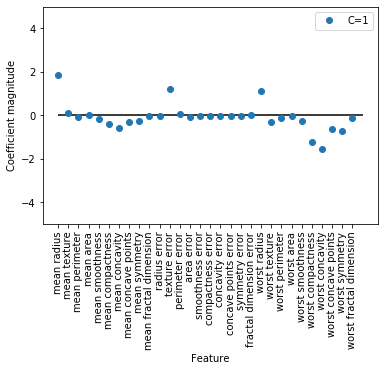

In [20]:
# We can visualize which features have which coefficients as a representation of the importance
# of those features for predicting if a tumor is malignant or benign.

# recreate and train our LogisticRegression model
# for illustration, use C=1 the default
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)

# Here, we just visualize our last model learned, the one currently stored in logreg
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [36]:
# TODO: create a visualization of the magnitudes of the coefficients for
# a logistic regression model using the best C value you found

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


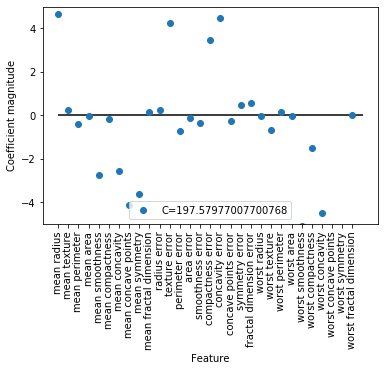

In [18]:
logreg = LogisticRegression(C=197.57977007700768)
logreg.fit(X_train, y_train)

plt.plot(logreg.coef_.T, 'o', label="C=197.57977007700768")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

#### QUESTION: What can you observe about the differences in the magnitudes of the coefficients as compared to when the default value of C is used? What is expected or unexpected about this?
Q8: I used c = 197.57977007700768. With this param., it appears that the magnitudes of the coeff.'s generally deviate more from y=0 compared to when c = 1. With c = 197.5798, the coefficient estimates are not constrained or regularized to be close to zero. Therefore, the deviating coeff.'s make sense for the specific param. c.  